In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
%load_ext autoreload
%autoreload 1
%aimport utils_analysis
ua = utils_analysis

In [3]:
res_df = pd.read_csv('experiments/mortality|n_od=500/res.csv')

In [4]:
alpha_col_str_template ='{:0.1f}'
res_df['f_u_alpha'] = res_df['f_u_alpha'].map(alpha_col_str_template.format)

In [5]:
res_df

f_o_name  f_o_rep  f_o_C  AUROC(f_o,od)  AUROC(f_o,oe)  AUROC(f_o,ud)  \
0           28       28  0.001            1.0       0.792738       0.748452   
1           28       28  0.001            1.0       0.792738       0.748452   
2           28       28  0.001            1.0       0.792738       0.748452   
3           28       28  0.001            1.0       0.792738       0.748452   
4           28       28  0.001            1.0       0.792738       0.748452   
...        ...      ...    ...            ...            ...            ...   
7315        17       17  0.010            1.0       0.790932       0.802398   
7316        17       17  0.010            1.0       0.790932       0.802398   
7317        17       17  0.010            1.0       0.790932       0.802398   
7318        17       17  0.010            1.0       0.790932       0.802398   
7319        17       17  0.010            1.0       0.790932       0.802398   

      AUROC(f_o,ue)  AUROC(f_o,e)     f_u_name f_u_alpha  f_u_C    f_u_type  \
0          0.768781      0.751189  00002_00001       1.0  0.010    standard   
1          0.768781      0.751189  00009_00000       1.0  0.001    standard   
2          0.768781      0.751189  00040_00002       1.0  0.100    standard   
3          0.768781      0.751189  00024_00000       1.0  0.001    standard   
4          0.768781      0.751189  00045_00001       1.0  0.010    standard   
...             ...           ...          ...       ...    ...         ...   
7315       0.753577      0.771759  00000_00029       0.7  0.100  engineered   
7316       0.753577      0.771759  00031_00002       1.0  0.100    standard   
7317       0.753577      0.771759  00017_00002       1.0  0.100    standard   
7318       0.753577      0.771759  00001_00000       1.0  0.001    standard   
7319       0.753577      0.771759  00039_00000       1.0  0.001    standard   

      AUROC(f_u,ud)  AUROC(f_u,ue)  AUROC(f_u,e)   RBC(ud)   RBC(ue)    RBC(e)  
0          0.996508       0.835203      0.837647  0.999952  0.924692  0.930773  
1          0.999903       0.812400      0.811542  0.999848  0.923982  0.927242  
2          0.970056       0.825218      0.824666  0.969074  0.913610  0.913395  
3          0.998056       0.811413      0.812428  0.998244  0.932828  0.940036  
4          0.999516       0.832864      0.833209  0.999315  0.912843  0.917427  
...             ...            ...           ...       ...       ...       ...  
7315       0.953106       0.818717      0.822828  0.995010  0.941917  0.939228  
7316       0.968474       0.810062      0.802173  0.969566  0.930861  0.916060  
7317       0.968611       0.805645      0.807765  0.967598  0.923102  0.920742  
7318       0.999429       0.825017      0.827115  0.999992  0.943618  0.936627  
7319       1.000000       0.819570      0.818295  1.000000  0.927727  0.918748  

[7320 rows x 18 columns]

In [6]:
res_df[['AUROC(f_o,od)',  'AUROC(f_o,oe)', 'AUROC(f_o,ud)', 'AUROC(f_o,ue)', 'AUROC(f_o,e)']].drop_duplicates()

AUROC(f_o,od)  AUROC(f_o,oe)  AUROC(f_o,ud)  AUROC(f_o,ue)  AUROC(f_o,e)
0          1.000000       0.792738       0.748452       0.768781      0.751189
183        1.000000       0.816139       0.794207       0.793448      0.789872
366        0.999336       0.786896       0.749206       0.790692      0.774177
549        0.998282       0.767475       0.815317       0.793271      0.818482
732        1.000000       0.782757       0.772548       0.752076      0.761645
915        1.000000       0.813959       0.785515       0.772631      0.770890
1098       0.998540       0.868793       0.802778       0.790482      0.792706
1281       0.998520       0.776625       0.776120       0.769211      0.798332
1464       0.997465       0.750609       0.785096       0.766660      0.777601
1647       0.996911       0.791889       0.750950       0.787086      0.729366
1830       1.000000       0.822595       0.809573       0.812705      0.788247
2013       1.000000       0.785051       0.813446       0.818591      0.801436
2196       0.997424       0.760178       0.784012       0.768864      0.765855
2379       0.998394       0.787655       0.791258       0.786571      0.807951
2562       0.994888       0.775832       0.754891       0.794447      0.761011
2745       0.998161       0.777363       0.780375       0.774878      0.805181
2928       0.997901       0.757126       0.725063       0.793238      0.745133
3111       0.998611       0.810716       0.797108       0.773127      0.783153
3294       0.998588       0.759906       0.772941       0.795593      0.787582
3477       0.999632       0.829236       0.822859       0.794702      0.802956
3660       0.997584       0.769764       0.768877       0.768320      0.767753
3843       0.997930       0.855872       0.801393       0.787411      0.793404
4026       1.000000       0.811176       0.767198       0.774342      0.770263
4209       1.000000       0.788396       0.795861       0.793692      0.815107
4392       1.000000       0.818672       0.781631       0.791479      0.805487
4575       0.998155       0.798798       0.804843       0.782765      0.761063
4758       0.995848       0.810529       0.764400       0.783448      0.798358
4941       0.997855       0.764502       0.770023       0.789143      0.803910
5124       0.998245       0.779494       0.782925       0.789673      0.782163
5307       0.998638       0.777045       0.799334       0.782780      0.803810
5490       1.000000       0.770746       0.768362       0.771098      0.784462
5673       1.000000       0.736709       0.790717       0.804194      0.767532
5856       0.998547       0.799455       0.788483       0.794003      0.802039
6039       0.998559       0.787589       0.773344       0.784259      0.773220
6222       0.998150       0.771821       0.798922       0.800406      0.799193
6405       0.998258       0.808866       0.782290       0.778845      0.786602
6588       0.997505       0.824439       0.808177       0.800282      0.809694
6771       1.000000       0.741899       0.763926       0.763404      0.752700
6954       0.997491       0.805391       0.769805       0.809206      0.799839
7137       1.000000       0.790932       0.802398       0.753577      0.771759

In [7]:
res_df.groupby(['f_o_name', 'f_u_alpha'])[['AUROC(f_u,ud)', 'AUROC(f_u,ue)', 'AUROC(f_u,e)']].max()

AUROC(f_u,ud)  AUROC(f_u,ue)  AUROC(f_u,e)
f_o_name f_u_alpha                                            
0        0.0             0.933550       0.823842      0.836320
         0.1             0.928933       0.824595      0.834892
         0.2             0.948430       0.827494      0.836376
         0.3             0.961006       0.832688      0.845604
         0.4             0.965137       0.835876      0.841204
...                           ...            ...           ...
39       0.6             0.997257       0.842136      0.830615
         0.7             0.998457       0.844058      0.832360
         0.8             0.999816       0.844918      0.835188
         0.9             0.999238       0.844845      0.833885
         1.0             1.000000       0.846773      0.835981

[440 rows x 3 columns]

In [8]:
res_df.groupby(['f_o_name', 'f_u_alpha'])[['RBC(ud)', 'RBC(ue)', 'RBC(e)']].max()

RBC(ud)   RBC(ue)    RBC(e)
f_o_name f_u_alpha                              
0        0.0        0.998729  0.976066  0.974166
         0.1        0.997949  0.975747  0.972678
         0.2        0.999538  0.974623  0.971211
         0.3        0.999902  0.971679  0.972154
         0.4        0.999824  0.969232  0.965911
...                      ...       ...       ...
39       0.6        0.999981  0.971550  0.966021
         0.7        0.999992  0.965183  0.965672
         0.8        1.000000  0.957799  0.956221
         0.9        1.000000  0.953687  0.946365
         1.0        1.000000  0.957811  0.957704

[440 rows x 3 columns]

In [9]:
#_alpha = res_df['f_u_alpha'].astype(float)
#res_df['WC_Score(ue)'] = _alpha*res_df['AUROC(f_u,ue)'] + (1-_alpha)*res_df['RBC(ue)']
#optimization_idx = res_df.groupby(['f_o_name', 'f_u_alpha'])['WC_Score(ue)'].idxmax()
#optimization_res_df = res_df.loc[optimization_idx]


engineered_res_df = res_df[res_df['f_u_type']=='engineered']

_alpha = engineered_res_df['f_u_alpha'].astype(float)
engineered_res_df['WC_Score(ue)'] = _alpha*engineered_res_df['AUROC(f_u,ue)'] + (1-_alpha)*engineered_res_df['RBC(ue)']
optimization_idx = engineered_res_df.groupby(['f_o_name', 'f_u_alpha'])['WC_Score(ue)'].idxmax()
optimization_res_df = engineered_res_df.loc[optimization_idx]


optimization_res_df = optimization_res_df.set_index(['f_o_rep', 'f_u_alpha'])
optimization_res_df

/home/eotles/venv/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


f_o_name  f_o_C  AUROC(f_o,od)  AUROC(f_o,oe)  \
f_o_rep f_u_alpha                                                  
0       0.0               0   0.10       0.998638       0.777045   
        0.1               0   0.10       0.998638       0.777045   
        0.2               0   0.10       0.998638       0.777045   
        0.3               0   0.10       0.998638       0.777045   
        0.4               0   0.10       0.998638       0.777045   
...                     ...    ...            ...            ...   
39      0.6              39   0.01       1.000000       0.813959   
        0.7              39   0.01       1.000000       0.813959   
        0.8              39   0.01       1.000000       0.813959   
        0.9              39   0.01       1.000000       0.813959   
        1.0              39   0.01       1.000000       0.813959   

                   AUROC(f_o,ud)  AUROC(f_o,ue)  AUROC(f_o,e)     f_u_name  \
f_o_rep f_u_alpha                                                            
0       0.0             0.799334       0.782780       0.80381  00000_00011   
        0.1             0.799334       0.782780       0.80381  00000_00001   
        0.2             0.799334       0.782780       0.80381  00000_00002   
        0.3             0.799334       0.782780       0.80381  00000_00014   
        0.4             0.799334       0.782780       0.80381  00000_00015   
...                          ...            ...           ...          ...   
39      0.6             0.785515       0.772631       0.77089  00000_00006   
        0.7             0.785515       0.772631       0.77089  00000_00007   
        0.8             0.785515       0.772631       0.77089  00000_00008   
        0.9             0.785515       0.772631       0.77089  00000_00009   
        1.0             0.785515       0.772631       0.77089  00000_00010   

                   f_u_C    f_u_type  AUROC(f_u,ud)  AUROC(f_u,ue)  \
f_o_rep f_u_alpha                                                    
0       0.0        0.010  engineered       0.920515       0.818868   
        0.1        0.001  engineered       0.919776       0.821456   
        0.2        0.001  engineered       0.948430       0.827494   
        0.3        0.010  engineered       0.961006       0.832688   
        0.4        0.010  engineered       0.965137       0.835876   
...                  ...         ...            ...            ...   
39      0.6        0.001  engineered       0.997257       0.842136   
        0.7        0.001  engineered       0.998457       0.844058   
        0.8        0.001  engineered       0.999816       0.844918   
        0.9        0.001  engineered       0.999238       0.844845   
        1.0        0.001  engineered       0.999143       0.844836   

                   AUROC(f_u,e)   RBC(ud)   RBC(ue)    RBC(e)  WC_Score(ue)  
f_o_rep f_u_alpha                                                            
0       0.0            0.831284  0.998291  0.976066  0.974166      0.976066  
        0.1            0.826456  0.997949  0.975747  0.969718      0.960318  
        0.2            0.836376  0.999538  0.974623  0.969985      0.945197  
        0.3            0.845604  0.999902  0.971679  0.972154      0.929981  
        0.4            0.841204  0.999824  0.969232  0.965911      0.915890  
...                         ...       ...       ...       ...           ...  
39      0.6            0.830615  0.999981  0.956091  0.947509      0.887718  
        0.7            0.830552  0.999992  0.952816  0.942737      0.876685  
        0.8            0.832918  1.000000  0.948355  0.938685      0.865606  
        0.9            0.830814  1.000000  0.949519  0.939057      0.855312  
        1.0            0.830662  0.999996  0.947987  0.937234      0.844836  

[440 rows x 17 columns]

In [10]:
optimization_res_df.groupby(['f_o_name', 'f_u_alpha'])[['AUROC(f_u,ud)', 'AUROC(f_u,ue)', 'AUROC(f_u,e)']].max()

AUROC(f_u,ud)  AUROC(f_u,ue)  AUROC(f_u,e)
f_o_name f_u_alpha                                            
0        0.0             0.920515       0.818868      0.831284
         0.1             0.919776       0.821456      0.826456
         0.2             0.948430       0.827494      0.836376
         0.3             0.961006       0.832688      0.845604
         0.4             0.965137       0.835876      0.841204
...                           ...            ...           ...
39       0.6             0.997257       0.842136      0.830615
         0.7             0.998457       0.844058      0.830552
         0.8             0.999816       0.844918      0.832918
         0.9             0.999238       0.844845      0.830814
         1.0             0.999143       0.844836      0.830662

[440 rows x 3 columns]

In [11]:
optimization_res_df.groupby(['f_o_name', 'f_u_alpha'])[['RBC(ud)', 'RBC(ue)', 'RBC(e)']].max()

RBC(ud)   RBC(ue)    RBC(e)
f_o_name f_u_alpha                              
0        0.0        0.998291  0.976066  0.974166
         0.1        0.997949  0.975747  0.969718
         0.2        0.999538  0.974623  0.969985
         0.3        0.999902  0.971679  0.972154
         0.4        0.999824  0.969232  0.965911
...                      ...       ...       ...
39       0.6        0.999981  0.956091  0.947509
         0.7        0.999992  0.952816  0.942737
         0.8        1.000000  0.948355  0.938685
         0.9        1.000000  0.949519  0.939057
         1.0        0.999996  0.947987  0.937234

[440 rows x 3 columns]

In [12]:
#selection_options_res_df = res_df[res_df['f_u_alpha']=='1.0'].copy(deep=True)
#selection_options_res_df = selection_options_res_df[selection_options_res_df['AUROC(f_u,ue)']>selection_options_res_df['AUROC(f_o,ue)']]

selection_options_res_df = res_df[res_df['f_u_type']=='standard']


selection_options_res_df = selection_options_res_df.drop(columns=['f_u_alpha'])
selection_options_res_df

f_o_name  f_o_rep  f_o_C  AUROC(f_o,od)  AUROC(f_o,oe)  AUROC(f_o,ud)  \
0           28       28  0.001            1.0       0.792738       0.748452   
1           28       28  0.001            1.0       0.792738       0.748452   
2           28       28  0.001            1.0       0.792738       0.748452   
3           28       28  0.001            1.0       0.792738       0.748452   
4           28       28  0.001            1.0       0.792738       0.748452   
...        ...      ...    ...            ...            ...            ...   
7314        17       17  0.010            1.0       0.790932       0.802398   
7316        17       17  0.010            1.0       0.790932       0.802398   
7317        17       17  0.010            1.0       0.790932       0.802398   
7318        17       17  0.010            1.0       0.790932       0.802398   
7319        17       17  0.010            1.0       0.790932       0.802398   

      AUROC(f_o,ue)  AUROC(f_o,e)     f_u_name  f_u_C  f_u_type  \
0          0.768781      0.751189  00002_00001  0.010  standard   
1          0.768781      0.751189  00009_00000  0.001  standard   
2          0.768781      0.751189  00040_00002  0.100  standard   
3          0.768781      0.751189  00024_00000  0.001  standard   
4          0.768781      0.751189  00045_00001  0.010  standard   
...             ...           ...          ...    ...       ...   
7314       0.753577      0.771759  00019_00001  0.010  standard   
7316       0.753577      0.771759  00031_00002  0.100  standard   
7317       0.753577      0.771759  00017_00002  0.100  standard   
7318       0.753577      0.771759  00001_00000  0.001  standard   
7319       0.753577      0.771759  00039_00000  0.001  standard   

      AUROC(f_u,ud)  AUROC(f_u,ue)  AUROC(f_u,e)   RBC(ud)   RBC(ue)    RBC(e)  
0          0.996508       0.835203      0.837647  0.999952  0.924692  0.930773  
1          0.999903       0.812400      0.811542  0.999848  0.923982  0.927242  
2          0.970056       0.825218      0.824666  0.969074  0.913610  0.913395  
3          0.998056       0.811413      0.812428  0.998244  0.932828  0.940036  
4          0.999516       0.832864      0.833209  0.999315  0.912843  0.917427  
...             ...            ...           ...       ...       ...       ...  
7314       0.999315       0.824815      0.812661  0.999273  0.934892  0.918589  
7316       0.968474       0.810062      0.802173  0.969566  0.930861  0.916060  
7317       0.968611       0.805645      0.807765  0.967598  0.923102  0.920742  
7318       0.999429       0.825017      0.827115  0.999992  0.943618  0.936627  
7319       1.000000       0.819570      0.818295  1.000000  0.927727  0.918748  

[6000 rows x 17 columns]

In [13]:
selection_tradeoff_res_df = ua.selection_tradeoff(selection_options_res_df, 
                                                  sx_name='AUROC(f_u,ue)', 
                                                  sy_name='RBC(ue)')
_keep_cols = [c for c in selection_tradeoff_res_df.columns if 'alpha=' not in c]
selection_tradeoff_res_df

f_o_name  f_o_rep  f_o_C  AUROC(f_o,od)  AUROC(f_o,oe)  AUROC(f_o,ud)  \
76          28       28  0.001       1.000000       0.792738       0.748452   
79          28       28  0.001       1.000000       0.792738       0.748452   
92          28       28  0.001       1.000000       0.792738       0.748452   
151         11       11  0.001       1.000000       0.816139       0.794207   
224         11       11  0.001       1.000000       0.816139       0.794207   
...        ...      ...    ...            ...            ...            ...   
5679         3        3  0.001       1.000000       0.741899       0.763926   
5829         8        8  0.100       0.997491       0.805391       0.769805   
5834         8        8  0.100       0.997491       0.805391       0.769805   
5882        17       17  0.010       1.000000       0.790932       0.802398   
5907        17       17  0.010       1.000000       0.790932       0.802398   

      AUROC(f_o,ue)  AUROC(f_o,e)     f_u_name  f_u_C  ... alpha=0.1  \
76         0.768781      0.751189  00003_00001  0.010  ...  0.923943   
79         0.768781      0.751189  00004_00000  0.001  ...  0.933337   
92         0.768781      0.751189  00005_00002  0.100  ...  0.934862   
151        0.793448      0.789872  00009_00000  0.001  ...  0.921893   
224        0.793448      0.789872  00009_00001  0.010  ...  0.916538   
...             ...           ...          ...    ...  ...       ...   
5679       0.763404      0.752700  00004_00001  0.010  ...  0.931136   
5829       0.809206      0.799839  00004_00001  0.010  ...  0.929945   
5834       0.809206      0.799839  00036_00002  0.100  ...  0.939266   
5882       0.753577      0.771759  00002_00000  0.001  ...  0.938255   
5907       0.753577      0.771759  00043_00000  0.001  ...  0.930707   

      alpha=0.2  alpha=0.3  alpha=0.4  alpha=0.5  alpha=0.6  alpha=0.7  \
76     0.914336   0.904730   0.895123   0.885517   0.875910   0.866304   
79     0.921999   0.910660   0.899322   0.887984   0.876645   0.865307   
92     0.923048   0.911233   0.899418   0.887604   0.875789   0.863974   
151    0.912362   0.902831   0.893299   0.883768   0.874237   0.864706   
224    0.907879   0.899219   0.890559   0.881899   0.873239   0.864579   
...         ...        ...        ...        ...        ...        ...   
5679   0.922435   0.913733   0.905031   0.896330   0.887628   0.878926   
5829   0.920690   0.911435   0.902180   0.892925   0.883670   0.874415   
5834   0.927744   0.916221   0.904699   0.893176   0.881654   0.870131   
5882   0.925494   0.912734   0.899974   0.887213   0.874453   0.861692   
5907   0.919795   0.908883   0.897970   0.887058   0.876145   0.865233   

      alpha=0.8  alpha=0.9  alpha=1.0  
76     0.856697   0.847090   0.837484  
79     0.853968   0.842630   0.831292  
92     0.852160   0.840345   0.828530  
151    0.855175   0.845644   0.836113  
224    0.855919   0.847259   0.838599  
...         ...        ...        ...  
5679   0.870224   0.861523   0.852821  
5829   0.865160   0.855905   0.846650  
5834   0.858609   0.847086   0.835564  
5882   0.848932   0.836171   0.823411  
5907   0.854320   0.843408   0.832495  

[125 rows x 28 columns]

In [14]:
optimization_res_df.groupby(['f_u_alpha', 'f_u_C'])[['AUROC(f_u,ud)', 'AUROC(f_u,ue)', 'AUROC(f_u,e)']].mean()

AUROC(f_u,ud)  AUROC(f_u,ue)  AUROC(f_u,e)
f_u_alpha f_u_C                                            
0.0       0.001       0.913583       0.818851      0.816840
          0.010       0.908466       0.819210      0.815776
          0.100       0.900534       0.822507      0.835207
0.1       0.001       0.902559       0.821048      0.820948
          0.010       0.921123       0.819729      0.817583
          0.100       0.895598       0.817065      0.813814
0.2       0.001       0.914270       0.818945      0.817134
          0.010       0.927682       0.823595      0.822996
          0.100       0.900512       0.826882      0.819428
0.3       0.001       0.903554       0.823034      0.814701
          0.010       0.944107       0.826965      0.826983
          0.100       0.900491       0.818192      0.834166
0.4       0.001       0.918866       0.820473      0.819367
          0.010       0.945345       0.831443      0.829638
          0.100       0.925386       0.826580      0.821500
0.5       0.001       0.931467       0.827935      0.823967
          0.010       0.952722       0.832403      0.829841
          0.100       0.914791       0.822350      0.829230
0.6       0.001       0.948986       0.830712      0.832689
          0.010       0.967307       0.837090      0.835293
          0.100       0.905637       0.833146      0.831640
0.7       0.001       0.974524       0.839152      0.837847
          0.010       0.976080       0.839210      0.836404
          0.100       0.932602       0.835680      0.834512
0.8       0.001       0.984909       0.845311      0.835623
          0.010       0.978503       0.838704      0.837888
          0.100       0.941263       0.838045      0.836555
0.9       0.001       0.996264       0.845210      0.841446
          0.010       0.984658       0.841677      0.838653
          0.100       0.941109       0.834462      0.841537
1.0       0.001       0.993639       0.843633      0.839994
          0.010       0.988780       0.841591      0.839484
          0.100       0.934407       0.830094      0.839093

In [15]:
optimization_res_df.groupby(['f_u_alpha', 'f_u_C'])[['RBC(ud)', 'RBC(ue)', 'RBC(e)']].mean()

RBC(ud)   RBC(ue)    RBC(e)
f_u_alpha f_u_C                              
0.0       0.001  0.997171  0.974665  0.973539
          0.010  0.996753  0.973539  0.971408
          0.100  0.994385  0.968007  0.969808
0.1       0.001  0.997255  0.976802  0.975193
          0.010  0.997911  0.973007  0.971440
          0.100  0.995995  0.972662  0.971552
0.2       0.001  0.997690  0.974656  0.972594
          0.010  0.998332  0.971978  0.971537
          0.100  0.996115  0.969245  0.964290
0.3       0.001  0.997592  0.976355  0.973703
          0.010  0.999161  0.969758  0.968637
          0.100  0.996318  0.976105  0.974227
0.4       0.001  0.998227  0.973355  0.971246
          0.010  0.999042  0.967847  0.966656
          0.100  0.997353  0.968759  0.965776
0.5       0.001  0.998599  0.971661  0.970023
          0.010  0.999107  0.965725  0.963716
          0.100  0.997854  0.969377  0.968341
0.6       0.001  0.998865  0.964668  0.964751
          0.010  0.999269  0.959714  0.958086
          0.100  0.996735  0.968582  0.964475
0.7       0.001  0.998995  0.956846  0.953773
          0.010  0.999428  0.954089  0.952448
          0.100  0.995379  0.954517  0.952785
0.8       0.001  0.999716  0.953362  0.947944
          0.010  0.999406  0.950979  0.949330
          0.100  0.993961  0.946364  0.943137
0.9       0.001  0.999954  0.948026  0.943821
          0.010  0.999284  0.944149  0.942290
          0.100  0.990706  0.937388  0.937393
1.0       0.001  0.999715  0.943166  0.939097
          0.010  0.999268  0.938657  0.937336
          0.100  0.982391  0.926060  0.926396

In [16]:
selection_options_res_df.groupby(['f_u_C'])[['AUROC(f_u,ud)', 'AUROC(f_u,ue)', 'AUROC(f_u,e)']].mean()

AUROC(f_u,ud)  AUROC(f_u,ue)  AUROC(f_u,e)
f_u_C                                            
0.001       0.995601       0.828572      0.827398
0.010       0.994135       0.831273      0.830360
0.100       0.958086       0.821564      0.819244

In [17]:
selection_options_res_df.groupby(['f_u_C'])[['RBC(ud)', 'RBC(ue)', 'RBC(e)']].mean()

RBC(ud)   RBC(ue)    RBC(e)
f_u_C                              
0.001  0.996109  0.931227  0.929416
0.010  0.995153  0.933772  0.932435
0.100  0.963632  0.928426  0.926180

# Centrality

AUROC(f_o,e)  AUROC(f_u,e)       RBC(e)
count   6000.000000   6000.000000  6000.000000
mean       0.784028      0.825667     0.929344
std        0.020585      0.011865     0.013621
min        0.729366      0.783492     0.872258
2.5%       0.744739      0.803206     0.900897
50%        0.787092      0.825618     0.929996
97.5%      0.815191      0.848350     0.954404
max        0.818482      0.862198     0.974389

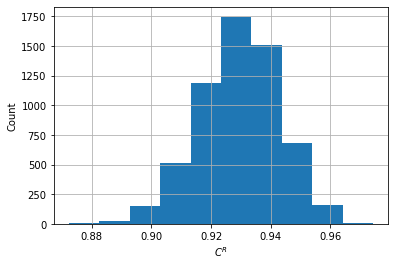

In [18]:
display(selection_options_res_df.describe(percentiles=[0.025, 0.5, 0.975])[['AUROC(f_o,e)', 'AUROC(f_u,e)', 'RBC(e)']])
selection_options_res_df['RBC(e)'].hist()
plt.xlabel(r'$C^R$')
plt.ylabel(r'Count')
plt.show()

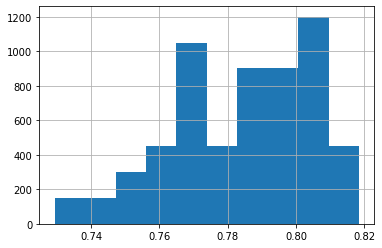

In [19]:
selection_options_res_df['AUROC(f_o,e)'].hist()

AUROC(f_o,e)  AUROC(f_u,e)      RBC(e)
count  1.500000e+02    150.000000  150.000000
mean   8.038098e-01      0.835608    0.938819
std    2.227885e-16      0.007539    0.010014
min    8.038098e-01      0.818601    0.916058
2.5%   8.038098e-01      0.820862    0.919339
50%    8.038098e-01      0.835542    0.938533
97.5%  8.038098e-01      0.848744    0.957533
max    8.038098e-01      0.853904    0.961526

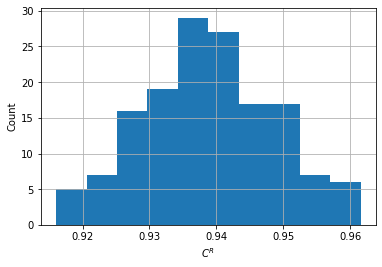

In [20]:
for_selection = selection_options_res_df[selection_options_res_df['f_o_rep']==0]
display(for_selection.describe(percentiles=[0.025, 0.5, 0.975])[['AUROC(f_o,e)', 'AUROC(f_u,e)', 'RBC(e)']])
for_selection['RBC(e)'].hist()
plt.ylabel(r'Count')
plt.xlabel(r'$C^R$')
plt.show()

AUROC(f_o,e)  AUROC(f_u,e)  RBC(e)
count           0.0           0.0     0.0
mean            NaN           NaN     NaN
std             NaN           NaN     NaN
min             NaN           NaN     NaN
2.5%            NaN           NaN     NaN
50%             NaN           NaN     NaN
97.5%           NaN           NaN     NaN
max             NaN           NaN     NaN

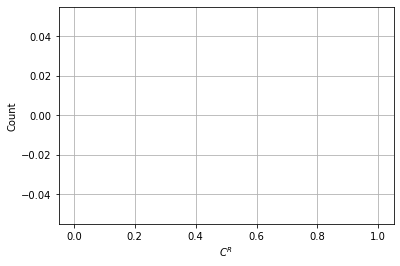

In [21]:
_ = selection_options_res_df[(0.650<=selection_options_res_df['AUROC(f_o,e)']) & (selection_options_res_df['AUROC(f_o,e)']<=0.655)]
display(_.describe(percentiles=[0.025, 0.5, 0.975])[['AUROC(f_o,e)', 'AUROC(f_u,e)', 'RBC(e)']])
_['RBC(e)'].hist()
plt.ylabel(r'Count')
plt.xlabel(r'$C^R$')
plt.show()

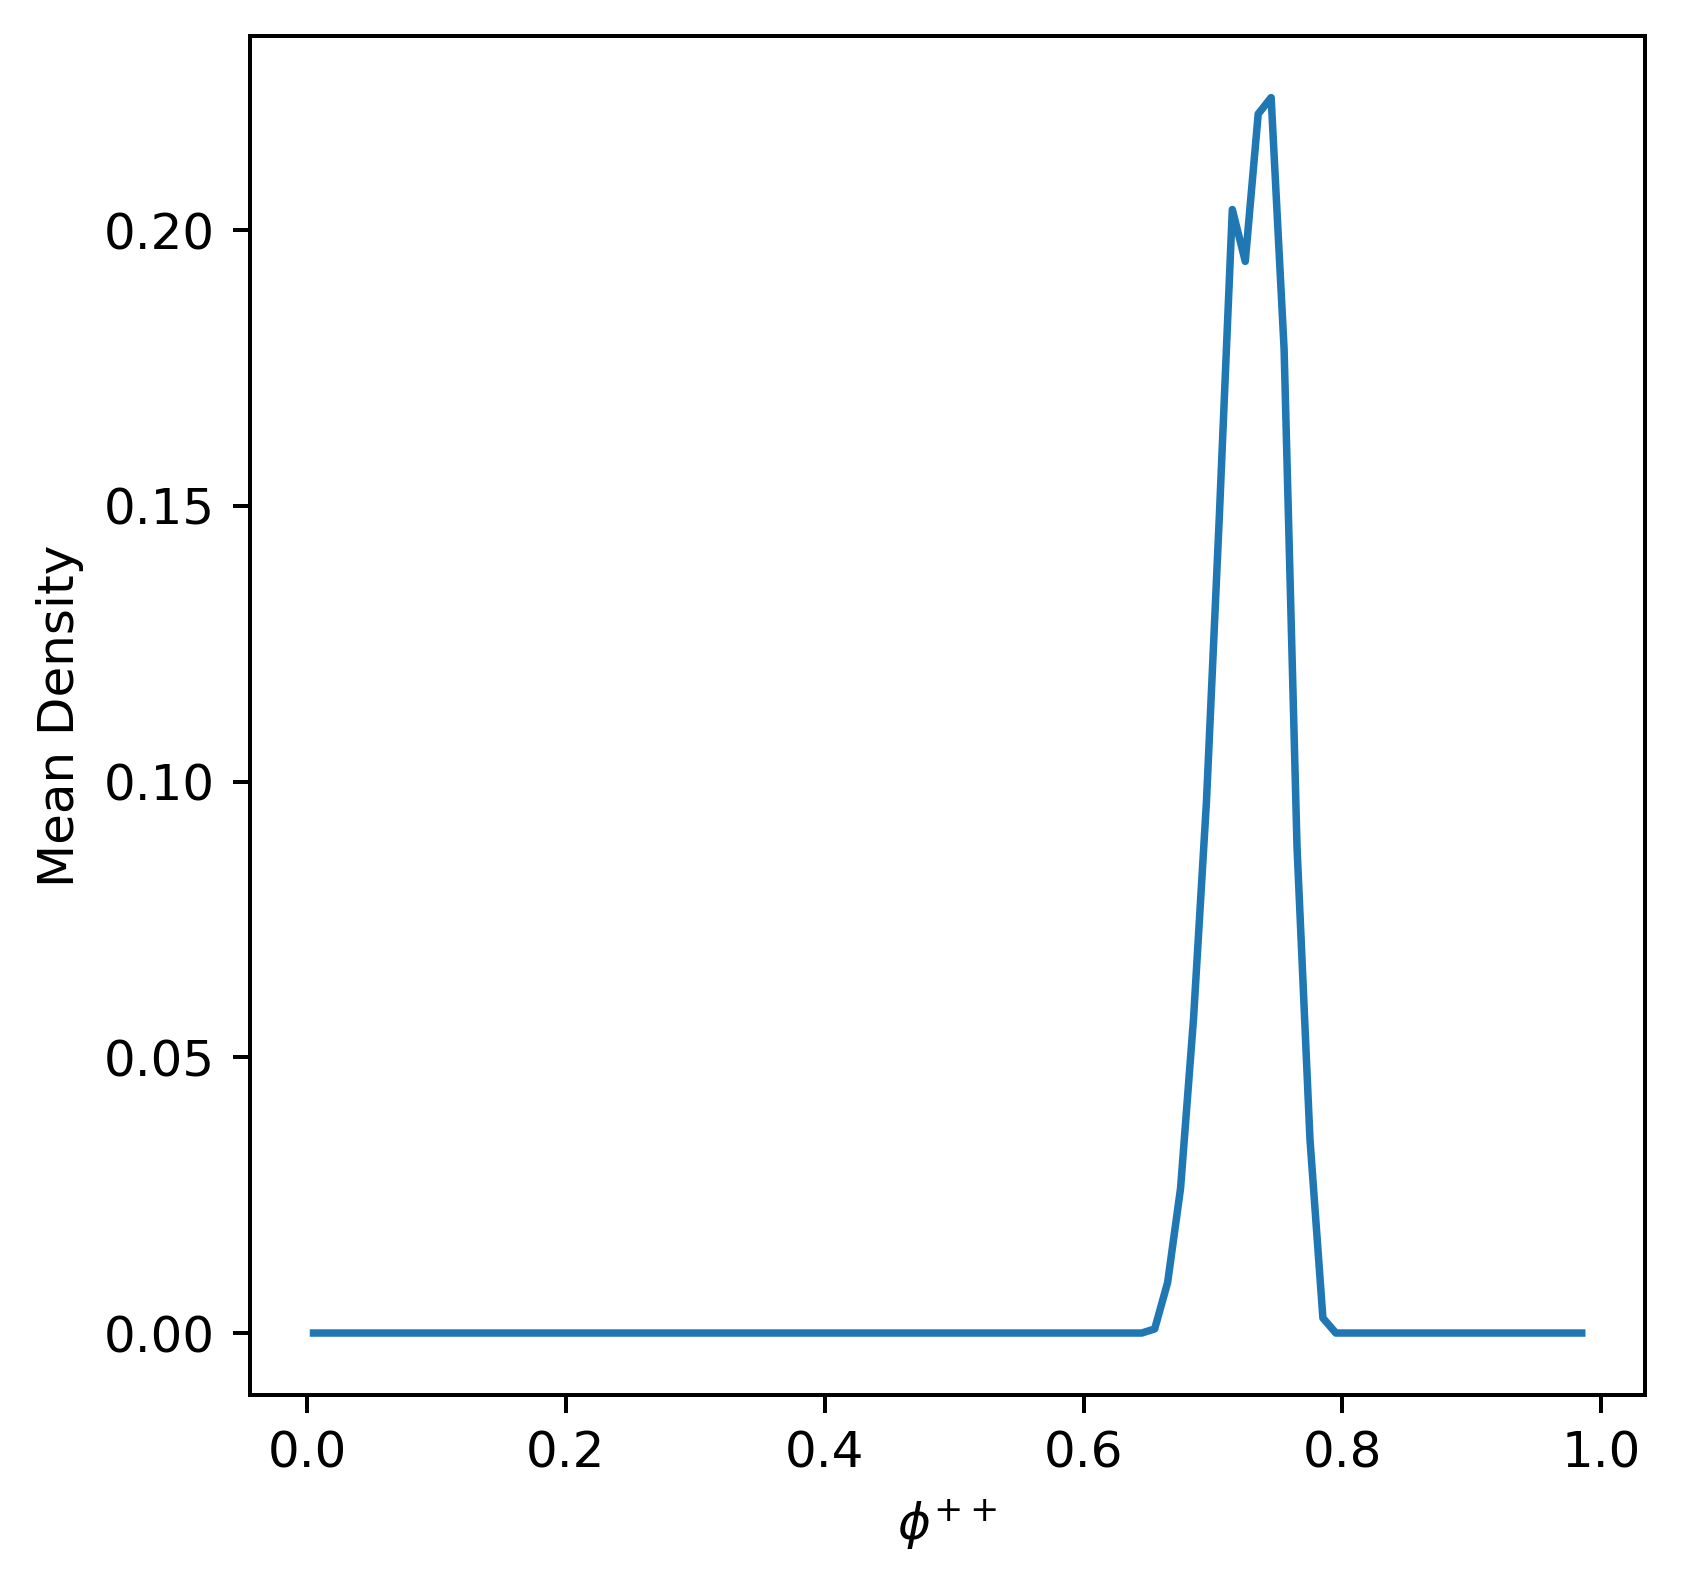

In [22]:
_ = selection_options_res_df.copy(deep=True)
_['AUROC(f_o,e)_bin'] = pd.qcut(selection_options_res_df['AUROC(f_o,e)'], 
                                selection_options_res_df['AUROC(f_o,e)'].nunique())

fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi=360)
bins = np.arange(0.0, 1.0, 0.01)

all_hist_counts = []
for AUROC_f_o_bin in _['AUROC(f_o,e)_bin'].unique():
    __ = _[_['AUROC(f_o,e)_bin']==AUROC_f_o_bin]
    phi_plus_plus = __['RBC(e)']*__['AUROC(f_o,e)']
    hist_counts, hist_bins = np.histogram(phi_plus_plus, bins=bins)
    hist_counts= hist_counts
    all_hist_counts.append(hist_counts)
    #ax.hist(phi_plus_plus, bins=bins, alpha=0.25, color='blue')


all_hist_counts = np.vstack(all_hist_counts)
all_hist_counts.shape

bin_centers = (hist_bins[1:] +hist_bins[:-1])/2
ax.plot(bin_centers, 
         (all_hist_counts/101).mean(axis=0))


plt.ylabel(r'Mean Density')
plt.xlabel(r'$\phi^{++}$')

plt.show()

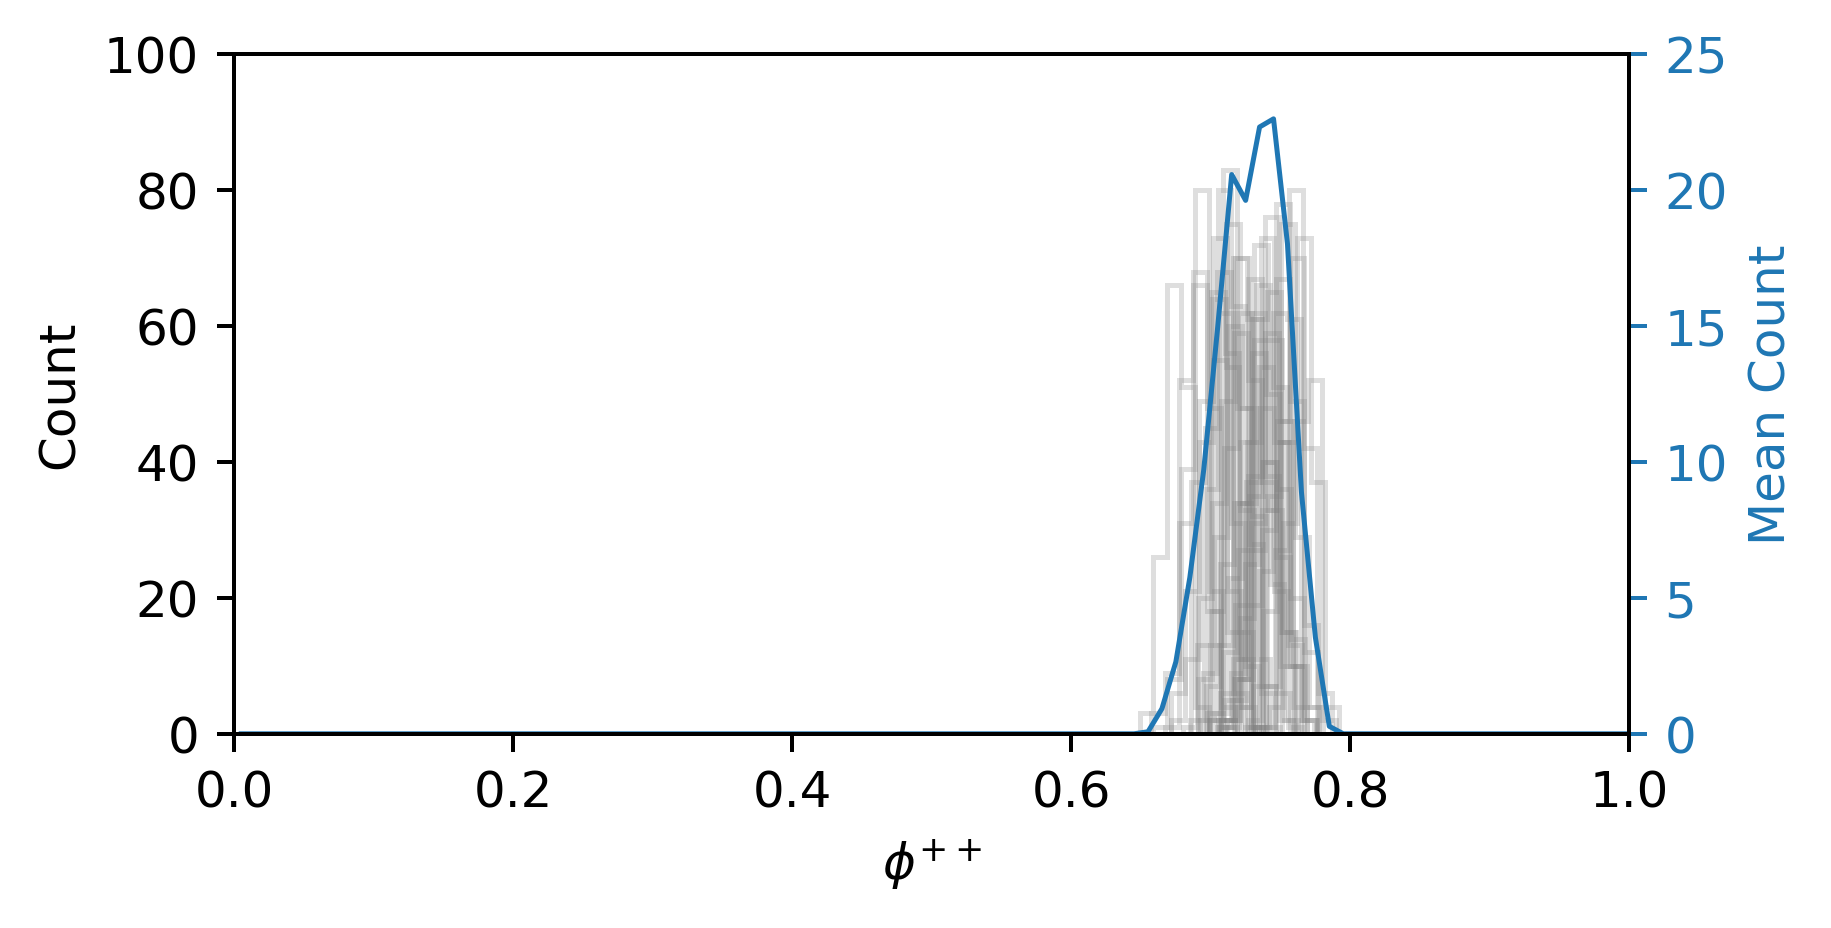

In [23]:
_ = selection_options_res_df.copy(deep=True)
_['AUROC(f_o,e)_bin'] = pd.qcut(selection_options_res_df['AUROC(f_o,e)'], 
                                selection_options_res_df['AUROC(f_o,e)'].nunique())

fig, ax = plt.subplots(1, 1, figsize=(5,2.5), dpi=360)
bins = np.arange(0.0, 1.02, 0.01)

all_hist_counts = []
for AUROC_f_o_bin in _['AUROC(f_o,e)_bin'].unique():
    __ = _[_['AUROC(f_o,e)_bin']==AUROC_f_o_bin]
    phi_plus_plus = __['RBC(e)']*__['AUROC(f_o,e)']
    hist_counts, hist_bins = np.histogram(phi_plus_plus, bins=bins)
    hist_counts= hist_counts
    all_hist_counts.append(hist_counts)
    ax.hist(phi_plus_plus, bins=bins+np.random.uniform(-0.01, 0.01)
            , alpha=0.25, color='tab:gray', histtype='step', density=False)


all_hist_counts = np.vstack(all_hist_counts)
all_hist_counts.shape

bin_centers = (hist_bins[1:] +hist_bins[:-1])/2

ax2 = ax.twinx()
ax2.plot(bin_centers, 
         (all_hist_counts).mean(axis=0), 
         color='tab:blue',
         lw=1
        )


ax.set_xlim(0, 1)
ax2.set_xlim(0, 1)

ax.set_ylim(0, 100)
ax2.set_ylim(0, 25)

ax.set_xlabel(r'$\phi^{++}$')
ax.set_ylabel('Count')
ax2.set_ylabel('Mean Count', color='tab:blue')
ax2.tick_params(axis='y', colors='tab:blue')

plt.show()

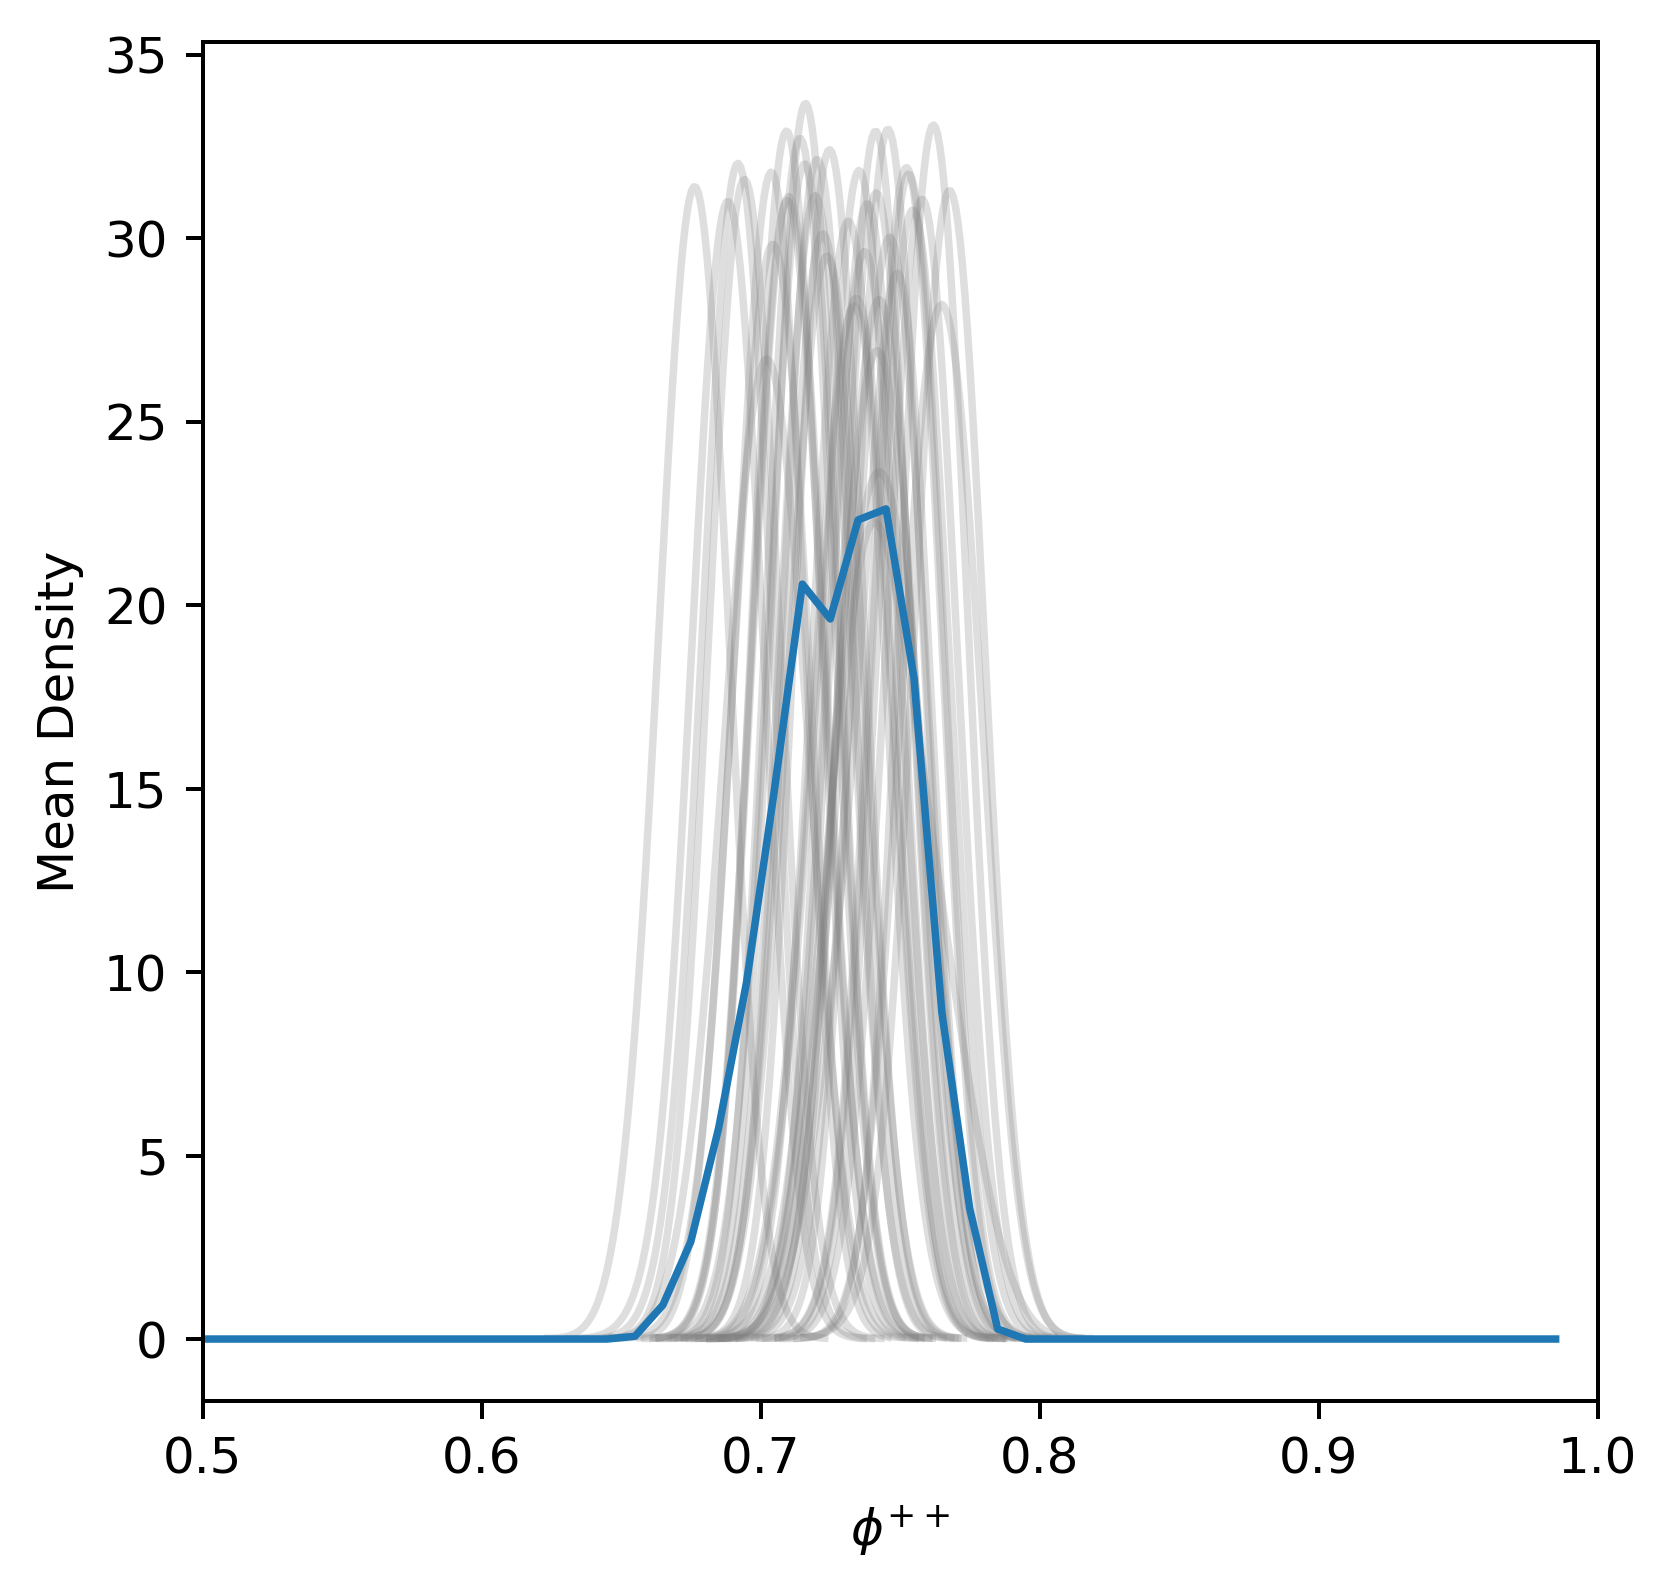

In [24]:
import seaborn as sns


_ = selection_options_res_df.copy(deep=True)
_['AUROC(f_o,e)_bin'] = pd.qcut(selection_options_res_df['AUROC(f_o,e)'], 
                                selection_options_res_df['AUROC(f_o,e)'].nunique())

fig, ax = plt.subplots(1, 1, figsize=(5,5), dpi=360)
bins = np.arange(0.0, 1.0, 0.01)

all_hist_counts = []
for AUROC_f_o_bin in _['AUROC(f_o,e)_bin'].unique():
    __ = _[_['AUROC(f_o,e)_bin']==AUROC_f_o_bin]
    phi_plus_plus = __['RBC(e)']*__['AUROC(f_o,e)']
    hist_counts, hist_bins = np.histogram(phi_plus_plus, bins=bins)
    hist_counts= hist_counts
    all_hist_counts.append(hist_counts)
    sns.kdeplot(phi_plus_plus, bw=0.01, color='tab:gray', alpha=0.25)


all_hist_counts = np.vstack(all_hist_counts)
all_hist_counts.shape

bin_centers = (hist_bins[1:] +hist_bins[:-1])/2
ax.plot(bin_centers, 
         (all_hist_counts).mean(axis=0))


ax.set_xlim(0.5, 1)

plt.ylabel(r'Mean Density')
plt.xlabel(r'$\phi^{++}$')

plt.show()

In [25]:
#bins = np.arange(0.45, 0.65, 0.005)

all_hist_counts = []
for AUROC_f_o_bin in _['AUROC(f_o,e)_bin'].unique():
    __ = _[_['AUROC(f_o,e)_bin']==AUROC_f_o_bin]
    phi_plus_plus = __['RBC(e)']*__['AUROC(f_o,e)']
    hist_counts, hist_bins = np.histogram(phi_plus_plus)
    hist_counts= hist_counts
    all_hist_counts.append(hist_counts)
    #ax.hist(phi_plus_plus, bins=bins, alpha=0.25, color='blue')


all_hist_counts = np.vstack(all_hist_counts)
all_hist_counts.shape

all_hist_counts

array([[ 2,  5, 20, 25, 16, 32, 27, 16,  4,  3],
       [ 3,  9, 11, 15, 17, 31, 30, 18,  8,  8],
       [ 4,  7,  7, 29, 18, 22, 33, 15,  9,  6],
       [ 1,  0,  1, 10, 13, 26, 41, 33, 18,  7],
       [ 7, 15, 19, 12, 14, 23, 25, 22,  9,  4],
       [ 1,  1,  8, 18, 21, 30, 38, 19,  7,  7],
       [ 2,  9, 17, 20, 24, 27, 26, 12,  9,  4],
       [ 1,  2,  4,  8, 28, 33, 35, 20, 15,  4],
       [ 3,  7, 13, 12, 34, 23, 18, 21, 12,  7],
       [ 2,  5,  9, 18, 16, 36, 27, 24,  9,  4],
       [ 4,  2, 12, 11, 11, 19, 37, 41, 10,  3],
       [ 2, 12, 12, 21, 23, 26, 22, 20,  6,  6],
       [ 1,  5,  5,  8, 19, 15, 27, 33, 21, 16],
       [ 6,  7,  9, 17, 19, 36, 31, 10,  8,  7],
       [ 1,  3,  4,  6, 15, 19, 27, 32, 28, 15],
       [ 1,  0,  3, 16, 17, 26, 22, 31, 18, 16],
       [ 2,  1,  4, 11, 34, 21, 40, 20, 14,  3],
       [ 1,  6, 13, 18, 21, 27, 27, 19, 10,  8],
       [ 1,  3,  3, 12, 20, 30, 29, 25, 19,  8],
       [ 2,  3,  8, 25, 18, 28, 31, 24,  9,  2],
       [ 5,  8, 18, 

In [26]:
stats.entropy(all_hist_counts, axis=1)

array([2.02880181, 2.13049951, 2.0973006 , 1.84816883, 2.19154501,
       1.97031214, 2.11496154, 1.92549371, 2.13400218, 2.0427394 ,
       1.95976534, 2.13593799, 2.06421036, 2.09730892, 2.01083337,
       2.00145502, 1.91162188, 2.11971879, 2.01687217, 2.00392737,
       2.09570026, 1.95994067, 2.06198688, 2.11196614, 2.15333597,
       2.04614444, 1.99695469, 2.03031239, 2.1682814 , 2.14853745,
       2.09457447, 2.01449962, 2.04564723, 2.11850597, 2.09866255,
       2.12341632, 2.14961858, 1.92388401, 2.0659404 , 2.07659784])

In [27]:
stats.entropy(np.ones(shape=10))

2.3025850929940455

(array([1., 1., 2., 3., 6., 5., 4., 9., 7., 2.]),
 array([1.84816883, 1.88250645, 1.91684407, 1.95118169, 1.9855193 ,
        2.01985692, 2.05419454, 2.08853216, 2.12286978, 2.15720739,
        2.19154501]),
 <a list of 10 Patch objects>)

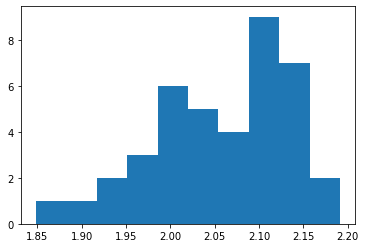

In [28]:
plt.hist(stats.entropy(all_hist_counts, axis=1))

In [29]:
_

f_o_name  f_o_rep  f_o_C  AUROC(f_o,od)  AUROC(f_o,oe)  AUROC(f_o,ud)  \
0           28       28  0.001            1.0       0.792738       0.748452   
1           28       28  0.001            1.0       0.792738       0.748452   
2           28       28  0.001            1.0       0.792738       0.748452   
3           28       28  0.001            1.0       0.792738       0.748452   
4           28       28  0.001            1.0       0.792738       0.748452   
...        ...      ...    ...            ...            ...            ...   
7314        17       17  0.010            1.0       0.790932       0.802398   
7316        17       17  0.010            1.0       0.790932       0.802398   
7317        17       17  0.010            1.0       0.790932       0.802398   
7318        17       17  0.010            1.0       0.790932       0.802398   
7319        17       17  0.010            1.0       0.790932       0.802398   

      AUROC(f_o,ue)  AUROC(f_o,e)     f_u_name  f_u_C  f_u_type  \
0          0.768781      0.751189  00002_00001  0.010  standard   
1          0.768781      0.751189  00009_00000  0.001  standard   
2          0.768781      0.751189  00040_00002  0.100  standard   
3          0.768781      0.751189  00024_00000  0.001  standard   
4          0.768781      0.751189  00045_00001  0.010  standard   
...             ...           ...          ...    ...       ...   
7314       0.753577      0.771759  00019_00001  0.010  standard   
7316       0.753577      0.771759  00031_00002  0.100  standard   
7317       0.753577      0.771759  00017_00002  0.100  standard   
7318       0.753577      0.771759  00001_00000  0.001  standard   
7319       0.753577      0.771759  00039_00000  0.001  standard   

      AUROC(f_u,ud)  AUROC(f_u,ue)  AUROC(f_u,e)   RBC(ud)   RBC(ue)  \
0          0.996508       0.835203      0.837647  0.999952  0.924692   
1          0.999903       0.812400      0.811542  0.999848  0.923982   
2          0.970056       0.825218      0.824666  0.969074  0.913610   
3          0.998056       0.811413      0.812428  0.998244  0.932828   
4          0.999516       0.832864      0.833209  0.999315  0.912843   
...             ...            ...           ...       ...       ...   
7314       0.999315       0.824815      0.812661  0.999273  0.934892   
7316       0.968474       0.810062      0.802173  0.969566  0.930861   
7317       0.968611       0.805645      0.807765  0.967598  0.923102   
7318       0.999429       0.825017      0.827115  0.999992  0.943618   
7319       1.000000       0.819570      0.818295  1.000000  0.927727   

        RBC(e)  AUROC(f_o,e)_bin  
0     0.930773  (0.7509, 0.7526]  
1     0.927242  (0.7509, 0.7526]  
2     0.913395  (0.7509, 0.7526]  
3     0.940036  (0.7509, 0.7526]  
4     0.917427  (0.7509, 0.7526]  
...        ...               ...  
7314  0.918589  (0.7715, 0.7727]  
7316  0.916060  (0.7715, 0.7727]  
7317  0.920742  (0.7715, 0.7727]  
7318  0.936627  (0.7715, 0.7727]  
7319  0.918748  (0.7715, 0.7727]  

[6000 rows x 18 columns]

In [30]:
selection_options_res_df

f_o_name  f_o_rep  f_o_C  AUROC(f_o,od)  AUROC(f_o,oe)  AUROC(f_o,ud)  \
0           28       28  0.001            1.0       0.792738       0.748452   
1           28       28  0.001            1.0       0.792738       0.748452   
2           28       28  0.001            1.0       0.792738       0.748452   
3           28       28  0.001            1.0       0.792738       0.748452   
4           28       28  0.001            1.0       0.792738       0.748452   
...        ...      ...    ...            ...            ...            ...   
7314        17       17  0.010            1.0       0.790932       0.802398   
7316        17       17  0.010            1.0       0.790932       0.802398   
7317        17       17  0.010            1.0       0.790932       0.802398   
7318        17       17  0.010            1.0       0.790932       0.802398   
7319        17       17  0.010            1.0       0.790932       0.802398   

      AUROC(f_o,ue)  AUROC(f_o,e)     f_u_name  f_u_C  f_u_type  \
0          0.768781      0.751189  00002_00001  0.010  standard   
1          0.768781      0.751189  00009_00000  0.001  standard   
2          0.768781      0.751189  00040_00002  0.100  standard   
3          0.768781      0.751189  00024_00000  0.001  standard   
4          0.768781      0.751189  00045_00001  0.010  standard   
...             ...           ...          ...    ...       ...   
7314       0.753577      0.771759  00019_00001  0.010  standard   
7316       0.753577      0.771759  00031_00002  0.100  standard   
7317       0.753577      0.771759  00017_00002  0.100  standard   
7318       0.753577      0.771759  00001_00000  0.001  standard   
7319       0.753577      0.771759  00039_00000  0.001  standard   

      AUROC(f_u,ud)  AUROC(f_u,ue)  AUROC(f_u,e)   RBC(ud)   RBC(ue)    RBC(e)  
0          0.996508       0.835203      0.837647  0.999952  0.924692  0.930773  
1          0.999903       0.812400      0.811542  0.999848  0.923982  0.927242  
2          0.970056       0.825218      0.824666  0.969074  0.913610  0.913395  
3          0.998056       0.811413      0.812428  0.998244  0.932828  0.940036  
4          0.999516       0.832864      0.833209  0.999315  0.912843  0.917427  
...             ...            ...           ...       ...       ...       ...  
7314       0.999315       0.824815      0.812661  0.999273  0.934892  0.918589  
7316       0.968474       0.810062      0.802173  0.969566  0.930861  0.916060  
7317       0.968611       0.805645      0.807765  0.967598  0.923102  0.920742  
7318       0.999429       0.825017      0.827115  0.999992  0.943618  0.936627  
7319       1.000000       0.819570      0.818295  1.000000  0.927727  0.918748  

[6000 rows x 17 columns]

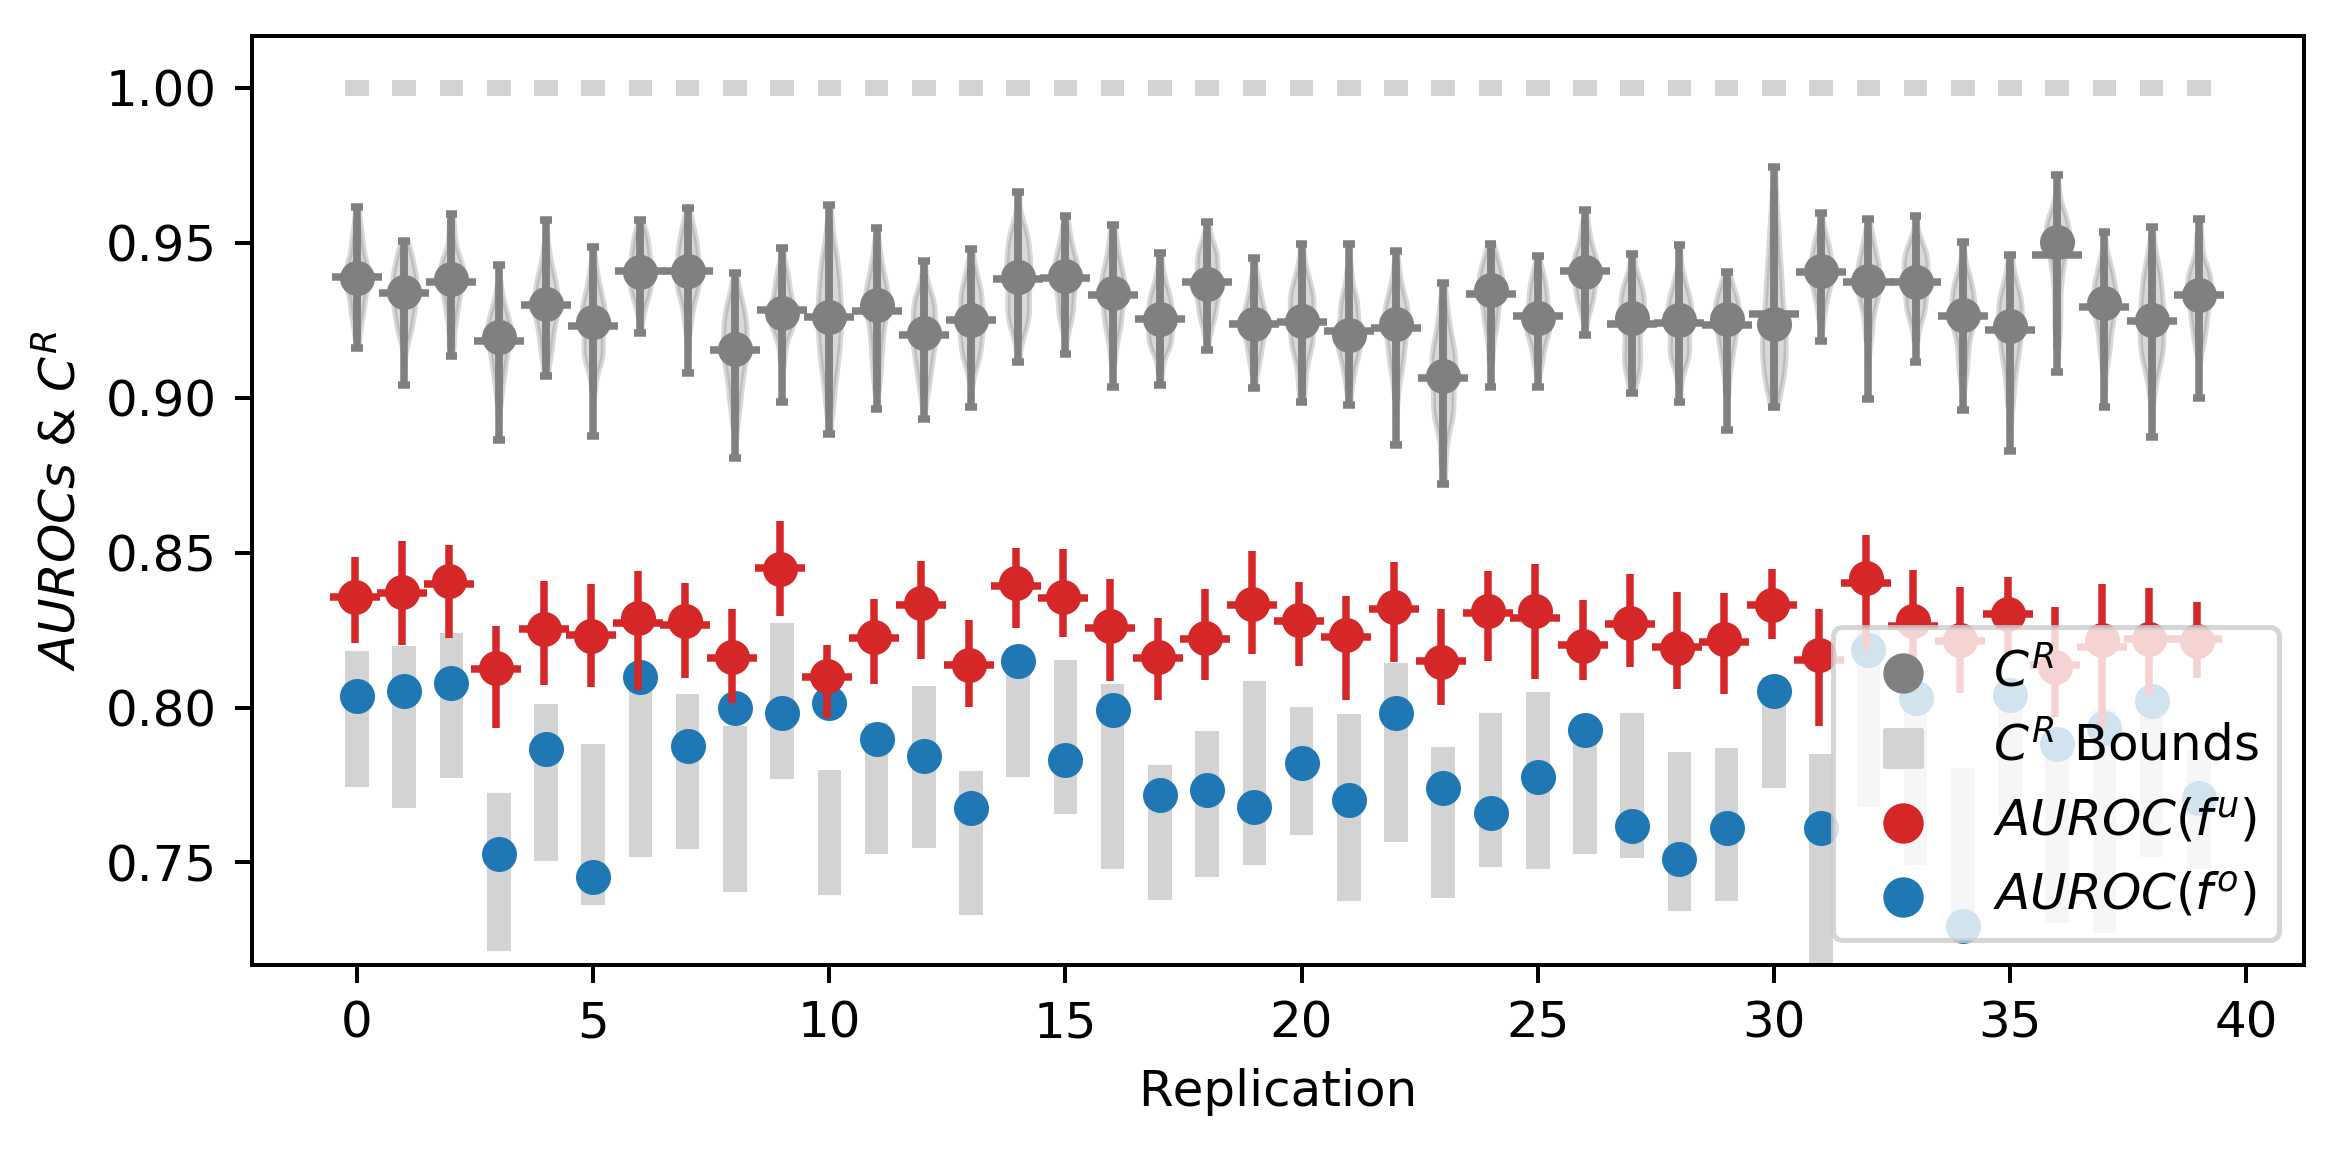

In [31]:
lb=0.025
center=0.5
ub=0.975
percentiles = [lb, center, ub]
str_lb, str_center, str_ub = pd.io.formats.format.format_percentiles(percentiles)

_ = selection_options_res_df.copy(deep=True)
_ = _[['f_o_rep', 'RBC(e)', 'AUROC(f_o,e)', 'AUROC(f_u,e)']]
_ = _.groupby(by='f_o_rep')
_ = _.describe(percentiles=percentiles)
_ = _.reset_index()
_


fig, ax = plt.subplots(1, 1, figsize=(10*.66,5*.66), dpi=360)

rbc_color = 'gray'
rbc_bounds_color = 'lightgray'
auroc_f_o_color = 'tab:red'
auroc_f_u_color = 'tab:blue'

column='RBC(e)'
ua.ci_plot(_, ax=ax, x='f_o_rep', y_center=(column, str_center), 
           y_lb=(column, str_lb), 
           y_ub=(column, str_ub),
           y_dash=(column, 'mean'), 
           color_value=rbc_color,
      )
vpdata = selection_options_res_df[['f_o_name', 'f_u_name', 'RBC(e)']].set_index(['f_u_name', 'f_o_name']).unstack().values
vp_parts = ax.violinplot(vpdata, positions=[i for i in range(40)], showmeans = True, showextrema = True, showmedians = True)

for partname in ('cbars','cmins','cmaxes','cmeans','cmedians'):
    vp = vp_parts[partname]
    vp.set_edgecolor(rbc_color)
    #vp.set_linewidth(1)
    
for pc in vp_parts['bodies']:
    pc.set_color(rbc_color)
    #pc.set_edgecolor(rbc_color)
#    #pc.set_alpha(1)



column='AUROC(f_u,e)'
ua.ci_plot(_, ax=ax, x='f_o_rep', y_center=(column, str_center), 
           y_lb=(column, str_lb), 
           y_ub=(column, str_ub),
           y_dash=(column, 'mean'), 
           color_value=auroc_f_o_color,
        x_eps=-0.05
      )


auroc_f_o = _[('AUROC(f_o,e)', 'min')]
min_auroc_f_u = _[('AUROC(f_u,e)', 'min')]
max_auroc_f_u = _[('AUROC(f_u,e)', 'max')]
min_lb = (auroc_f_o+min_auroc_f_u-1)/(auroc_f_o)
max_lb = (auroc_f_o+max_auroc_f_u-1)/(auroc_f_o)

ax.bar(_.index, max_lb-min_lb, bottom=min_lb, width=0.5, color=rbc_bounds_color, zorder=-1)
ax.bar(_.index, 0.005, bottom=1-0.0025, width=0.5, color=rbc_bounds_color, zorder=-1)
ax.scatter(_.index, auroc_f_o, color=auroc_f_u_color, zorder=1)

ax.set_ylabel(r'$AUROCs$ & $C^R$')
#ax.get_xaxis().set_ticks([])
ax.set_xlabel(r'Replication')

        
rbc_marker = ax.scatter([], [], color=rbc_color, marker='o', s=50)
rbc_bounds_marker = ax.scatter([], [], color=rbc_bounds_color, marker='s', s=50)
#black_vline = ax.scatter([], [], color='k', marker='|', s=200)
#black_hline = ax.scatter([], [], color='k', marker='_', s=100)
auroc_f_u_marker = ax.scatter([], [], color=auroc_f_o_color, marker='o', s=50)
auroc_f_o_marker = ax.scatter([], [], color=auroc_f_u_color, marker='o', s=50)

ax.legend([rbc_marker, rbc_bounds_marker, auroc_f_u_marker, auroc_f_o_marker], 
          [r'$C^R$', r'$C^R$ Bounds', '$AUROC(f^u)$', '$AUROC(f^o)$'],
          loc='lower right'
         )

fig.tight_layout()
plt.show()

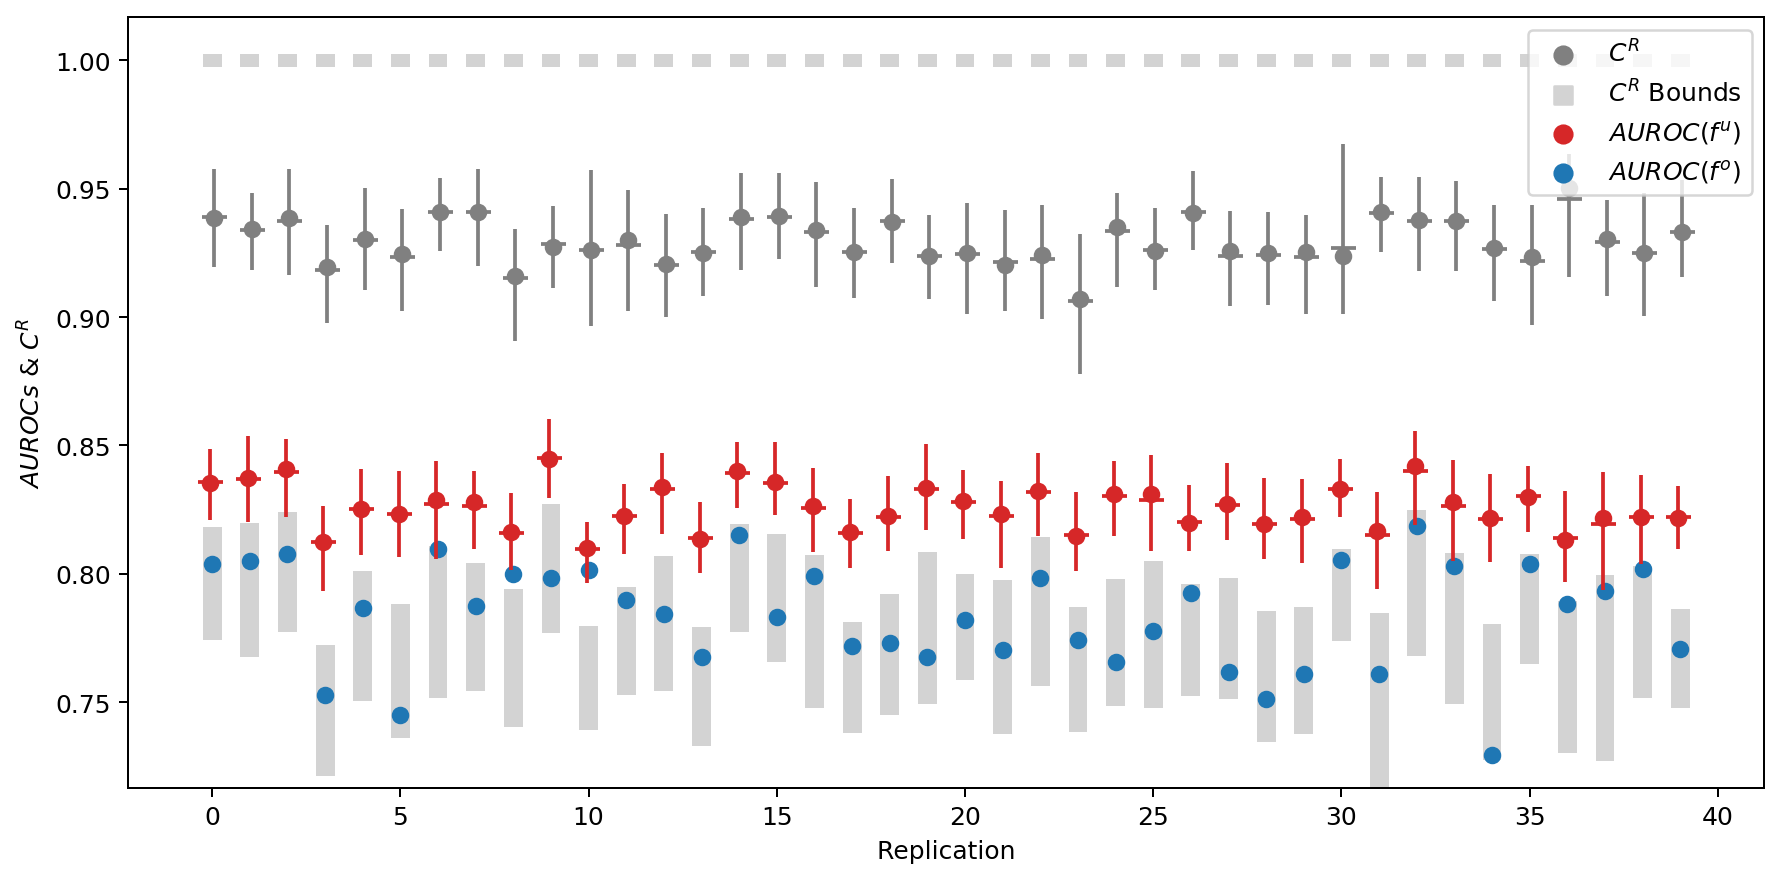

In [32]:
lb=0.025
center=0.5
ub=0.975
percentiles = [lb, center, ub]
str_lb, str_center, str_ub = pd.io.formats.format.format_percentiles(percentiles)

_ = selection_options_res_df.copy(deep=True)
_ = _[['f_o_rep', 'RBC(e)', 'AUROC(f_o,e)', 'AUROC(f_u,e)']]
_ = _.groupby(by='f_o_rep')
_ = _.describe(percentiles=percentiles)
_ = _.reset_index()
_


fig, ax = plt.subplots(1, 1, figsize=(10,5), dpi=180)

rbc_color = 'gray'
rbc_bounds_color = 'lightgray'
auroc_f_o_color = 'tab:red'
auroc_f_u_color = 'tab:blue'

column='RBC(e)'
ua.ci_plot(_, ax=ax, x='f_o_rep', y_center=(column, str_center), 
           y_lb=(column, str_lb), 
           y_ub=(column, str_ub),
           y_dash=(column, 'mean'), 
           color_value=rbc_color,
            x_eps=0.05
      )

column='AUROC(f_u,e)'
ua.ci_plot(_, ax=ax, x='f_o_rep', y_center=(column, str_center), 
           y_lb=(column, str_lb), 
           y_ub=(column, str_ub),
           y_dash=(column, 'mean'), 
           color_value=auroc_f_o_color,
        x_eps=-0.05
      )


auroc_f_o = _[('AUROC(f_o,e)', 'min')]
min_auroc_f_u = _[('AUROC(f_u,e)', 'min')]
max_auroc_f_u = _[('AUROC(f_u,e)', 'max')]
min_lb = (auroc_f_o+min_auroc_f_u-1)/(auroc_f_o)
max_lb = (auroc_f_o+max_auroc_f_u-1)/(auroc_f_o)

ax.bar(_.index, max_lb-min_lb, bottom=min_lb, width=0.5, color=rbc_bounds_color, zorder=-1)
ax.bar(_.index, 0.005, bottom=1-0.0025, width=0.5, color=rbc_bounds_color, zorder=-1)
ax.scatter(_.index, auroc_f_o, color=auroc_f_u_color, zorder=1)

ax.set_ylabel(r'$AUROCs$ & $C^R$')
#ax.get_xaxis().set_ticks([])
ax.set_xlabel(r'Replication')

        
rbc_marker = ax.scatter([], [], color=rbc_color, marker='o', s=50)
rbc_bounds_marker = ax.scatter([], [], color=rbc_bounds_color, marker='s', s=50)
#black_vline = ax.scatter([], [], color='k', marker='|', s=200)
#black_hline = ax.scatter([], [], color='k', marker='_', s=100)
auroc_f_u_marker = ax.scatter([], [], color=auroc_f_o_color, marker='o', s=50)
auroc_f_o_marker = ax.scatter([], [], color=auroc_f_u_color, marker='o', s=50)

ax.legend([rbc_marker, rbc_bounds_marker, auroc_f_u_marker, auroc_f_o_marker], 
          [r'$C^R$', r'$C^R$ Bounds', '$AUROC(f^u)$', '$AUROC(f^o)$'],
          loc='upper right'
         )

fig.tight_layout()
plt.show()

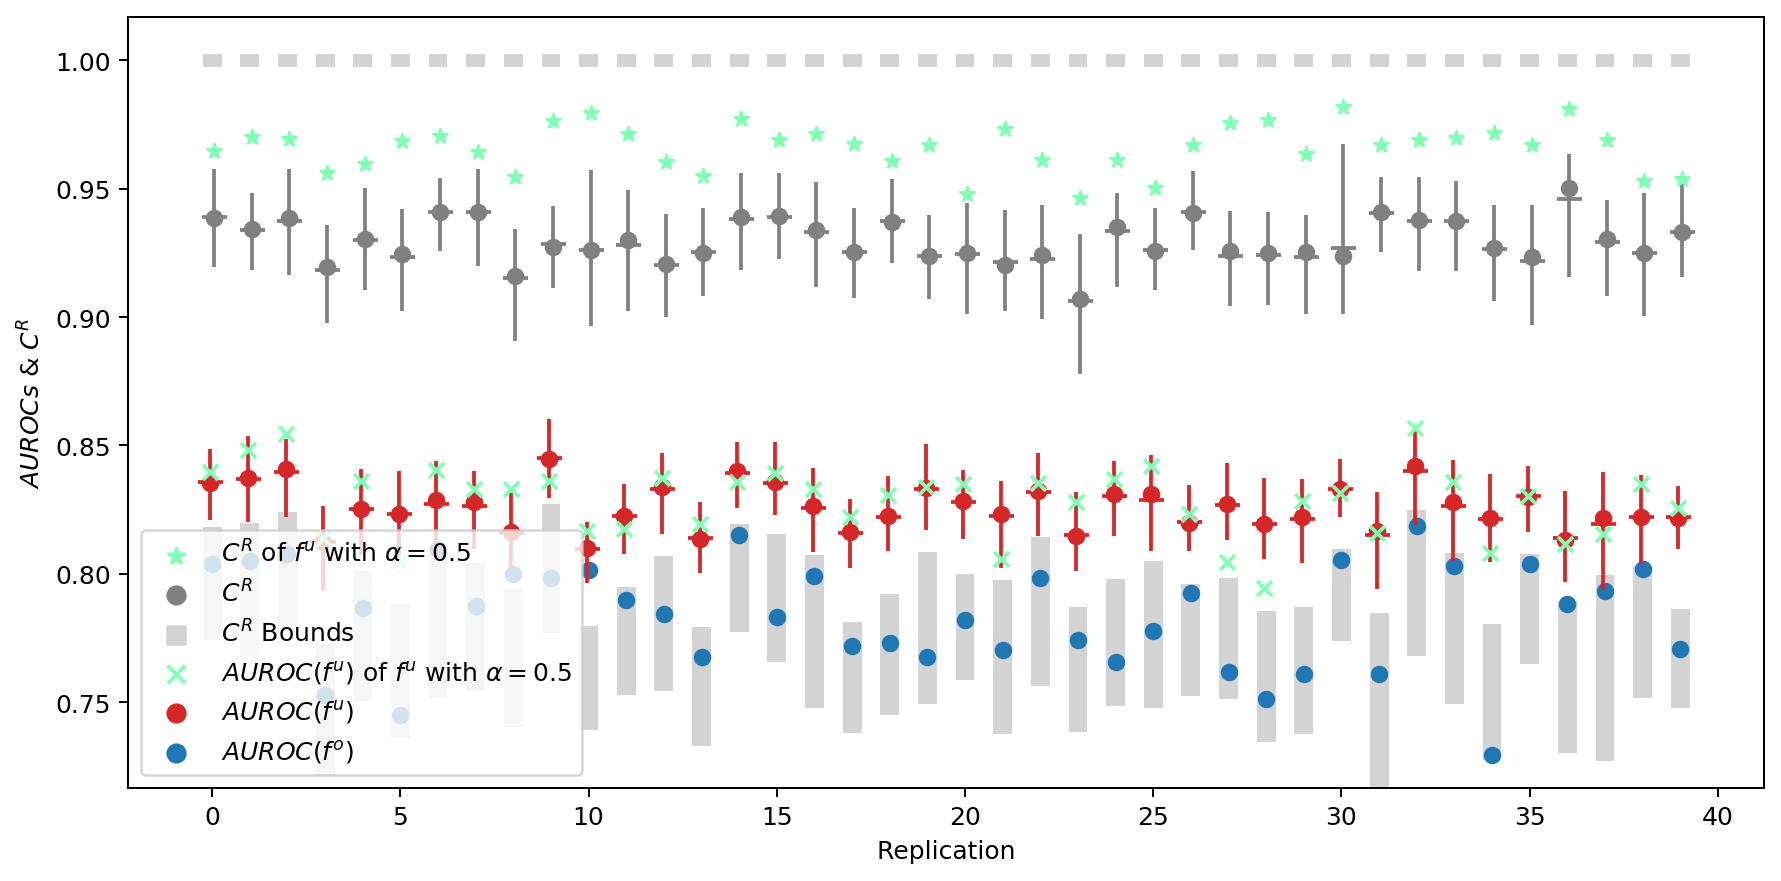

In [33]:
lb=0.025
center=0.5
ub=0.975
percentiles = [lb, center, ub]
str_lb, str_center, str_ub = pd.io.formats.format.format_percentiles(percentiles)

_ = selection_options_res_df.copy(deep=True)
_ = _[['f_o_rep', 'RBC(e)', 'AUROC(f_o,e)', 'AUROC(f_u,e)']]
_ = _.groupby(by='f_o_rep')
_ = _.describe(percentiles=percentiles)
_ = _.reset_index()
_


fig, ax = plt.subplots(1, 1, figsize=(10,5), dpi=180)

rbc_color = 'gray'
rbc_bounds_color = 'lightgray'
auroc_f_o_color = 'tab:red'
auroc_f_u_color = 'tab:blue'

column='RBC(e)'
ua.ci_plot(_, ax=ax, x='f_o_rep', y_center=(column, str_center), 
           y_lb=(column, str_lb), 
           y_ub=(column, str_ub),
           y_dash=(column, 'mean'), 
           color_value=rbc_color,
            x_eps=0.05
      )

column='AUROC(f_u,e)'
ua.ci_plot(_, ax=ax, x='f_o_rep', y_center=(column, str_center), 
           y_lb=(column, str_lb), 
           y_ub=(column, str_ub),
           y_dash=(column, 'mean'), 
           color_value=auroc_f_o_color,
        x_eps=-0.05
      )


auroc_f_o = _[('AUROC(f_o,e)', 'min')]
min_auroc_f_u = _[('AUROC(f_u,e)', 'min')]
max_auroc_f_u = _[('AUROC(f_u,e)', 'max')]
min_lb = (auroc_f_o+min_auroc_f_u-1)/(auroc_f_o)
max_lb = (auroc_f_o+max_auroc_f_u-1)/(auroc_f_o)

ax.bar(_.index, max_lb-min_lb, bottom=min_lb, width=0.5, color=rbc_bounds_color, zorder=-1)
ax.bar(_.index, 0.005, bottom=1-0.0025, width=0.5, color=rbc_bounds_color, zorder=-1)
ax.scatter(_.index, auroc_f_o, color=auroc_f_u_color, zorder=1)

ax.set_ylabel(r'$AUROCs$ & $C^R$')
#ax.get_xaxis().set_ticks([])
ax.set_xlabel(r'Replication')



_ordf =  optimization_res_df.reset_index()
_ordf = _ordf[_ordf['f_u_alpha']=='0.5']
_ordf

opt_color = ua.cmap(ua.norm(float(0.5)))
ax.scatter(_ordf['f_o_rep']+0.05, _ordf['RBC(e)'], marker='*', color=opt_color, zorder=3)
ax.scatter(_ordf['f_o_rep']-0.05, _ordf['AUROC(f_u,e)'], marker='x', color=opt_color, zorder=3)




        
rbc_marker = ax.scatter([], [], color=rbc_color, marker='o', s=50)
rbc_bounds_marker = ax.scatter([], [], color=rbc_bounds_color, marker='s', s=50)
#black_vline = ax.scatter([], [], color='k', marker='|', s=200)
#black_hline = ax.scatter([], [], color='k', marker='_', s=100)
auroc_f_u_marker = ax.scatter([], [], color=auroc_f_o_color, marker='o', s=50)
auroc_f_o_marker = ax.scatter([], [], color=auroc_f_u_color, marker='o', s=50)

opt_rbc_marker = ax.scatter([], [], color=opt_color, marker='*', s=50)
opt_auroc_marker = ax.scatter([], [], color=opt_color, marker='x', s=50)


ax.legend([opt_rbc_marker, rbc_marker, rbc_bounds_marker, 
           opt_auroc_marker, auroc_f_u_marker, auroc_f_o_marker], 
          [r'$C^R$ of $f^u$ with $\alpha=0.5$', r'$C^R$', r'$C^R$ Bounds', 
           r'$AUROC(f^u)$ of $f^u$ with $\alpha=0.5$', '$AUROC(f^u)$', '$AUROC(f^o)$'],
          loc='lower left'
         )

fig.tight_layout()
plt.show()

# trade-off plot

f_o_name  f_o_C  AUROC(f_o,od)  AUROC(f_o,oe)  AUROC(f_o,ud)  \
count      11.0   11.0   1.100000e+01   1.100000e+01   1.100000e+01   
mean        1.0    0.1   9.981614e-01   7.773629e-01   7.803752e-01   
std         0.0    0.0   1.164412e-16   1.164412e-16   1.164412e-16   
min         1.0    0.1   9.981614e-01   7.773629e-01   7.803752e-01   
25%         1.0    0.1   9.981614e-01   7.773629e-01   7.803752e-01   
50%         1.0    0.1   9.981614e-01   7.773629e-01   7.803752e-01   
75%         1.0    0.1   9.981614e-01   7.773629e-01   7.803752e-01   
max         1.0    0.1   9.981614e-01   7.773629e-01   7.803752e-01   

       AUROC(f_o,ue)  AUROC(f_o,e)      f_u_C  AUROC(f_u,ud)  AUROC(f_u,ue)  \
count      11.000000     11.000000  11.000000      11.000000      11.000000   
mean        0.774878      0.805181   0.004273       0.968952       0.834002   
std         0.000000      0.000000   0.004541       0.020607       0.010298   
min         0.774878      0.805181   0.001000       0.938265       0.816921   
25%         0.774878      0.805181   0.001000       0.955518       0.826921   
50%         0.774878      0.805181   0.001000       0.966009       0.832853   
75%         0.774878      0.805181   0.010000       0.985702       0.843184   
max         0.774878      0.805181   0.010000       0.998664       0.845350   

       AUROC(f_u,e)    RBC(ud)    RBC(ue)     RBC(e)  WC_Score(ue)  
count     11.000000  11.000000  11.000000  11.000000     11.000000  
mean       0.848074   0.999483   0.965162   0.963235      0.904929  
std        0.005774   0.000484   0.008939   0.009990      0.043023  
min        0.838804   0.998550   0.947579   0.945535      0.843235  
25%        0.843705   0.999307   0.958852   0.954444      0.871981  
50%        0.848405   0.999600   0.969486   0.966686      0.901735  
75%        0.852946   0.999841   0.972599   0.970872      0.936300  
max        0.854563   0.999984   0.974736   0.975091      0.973278

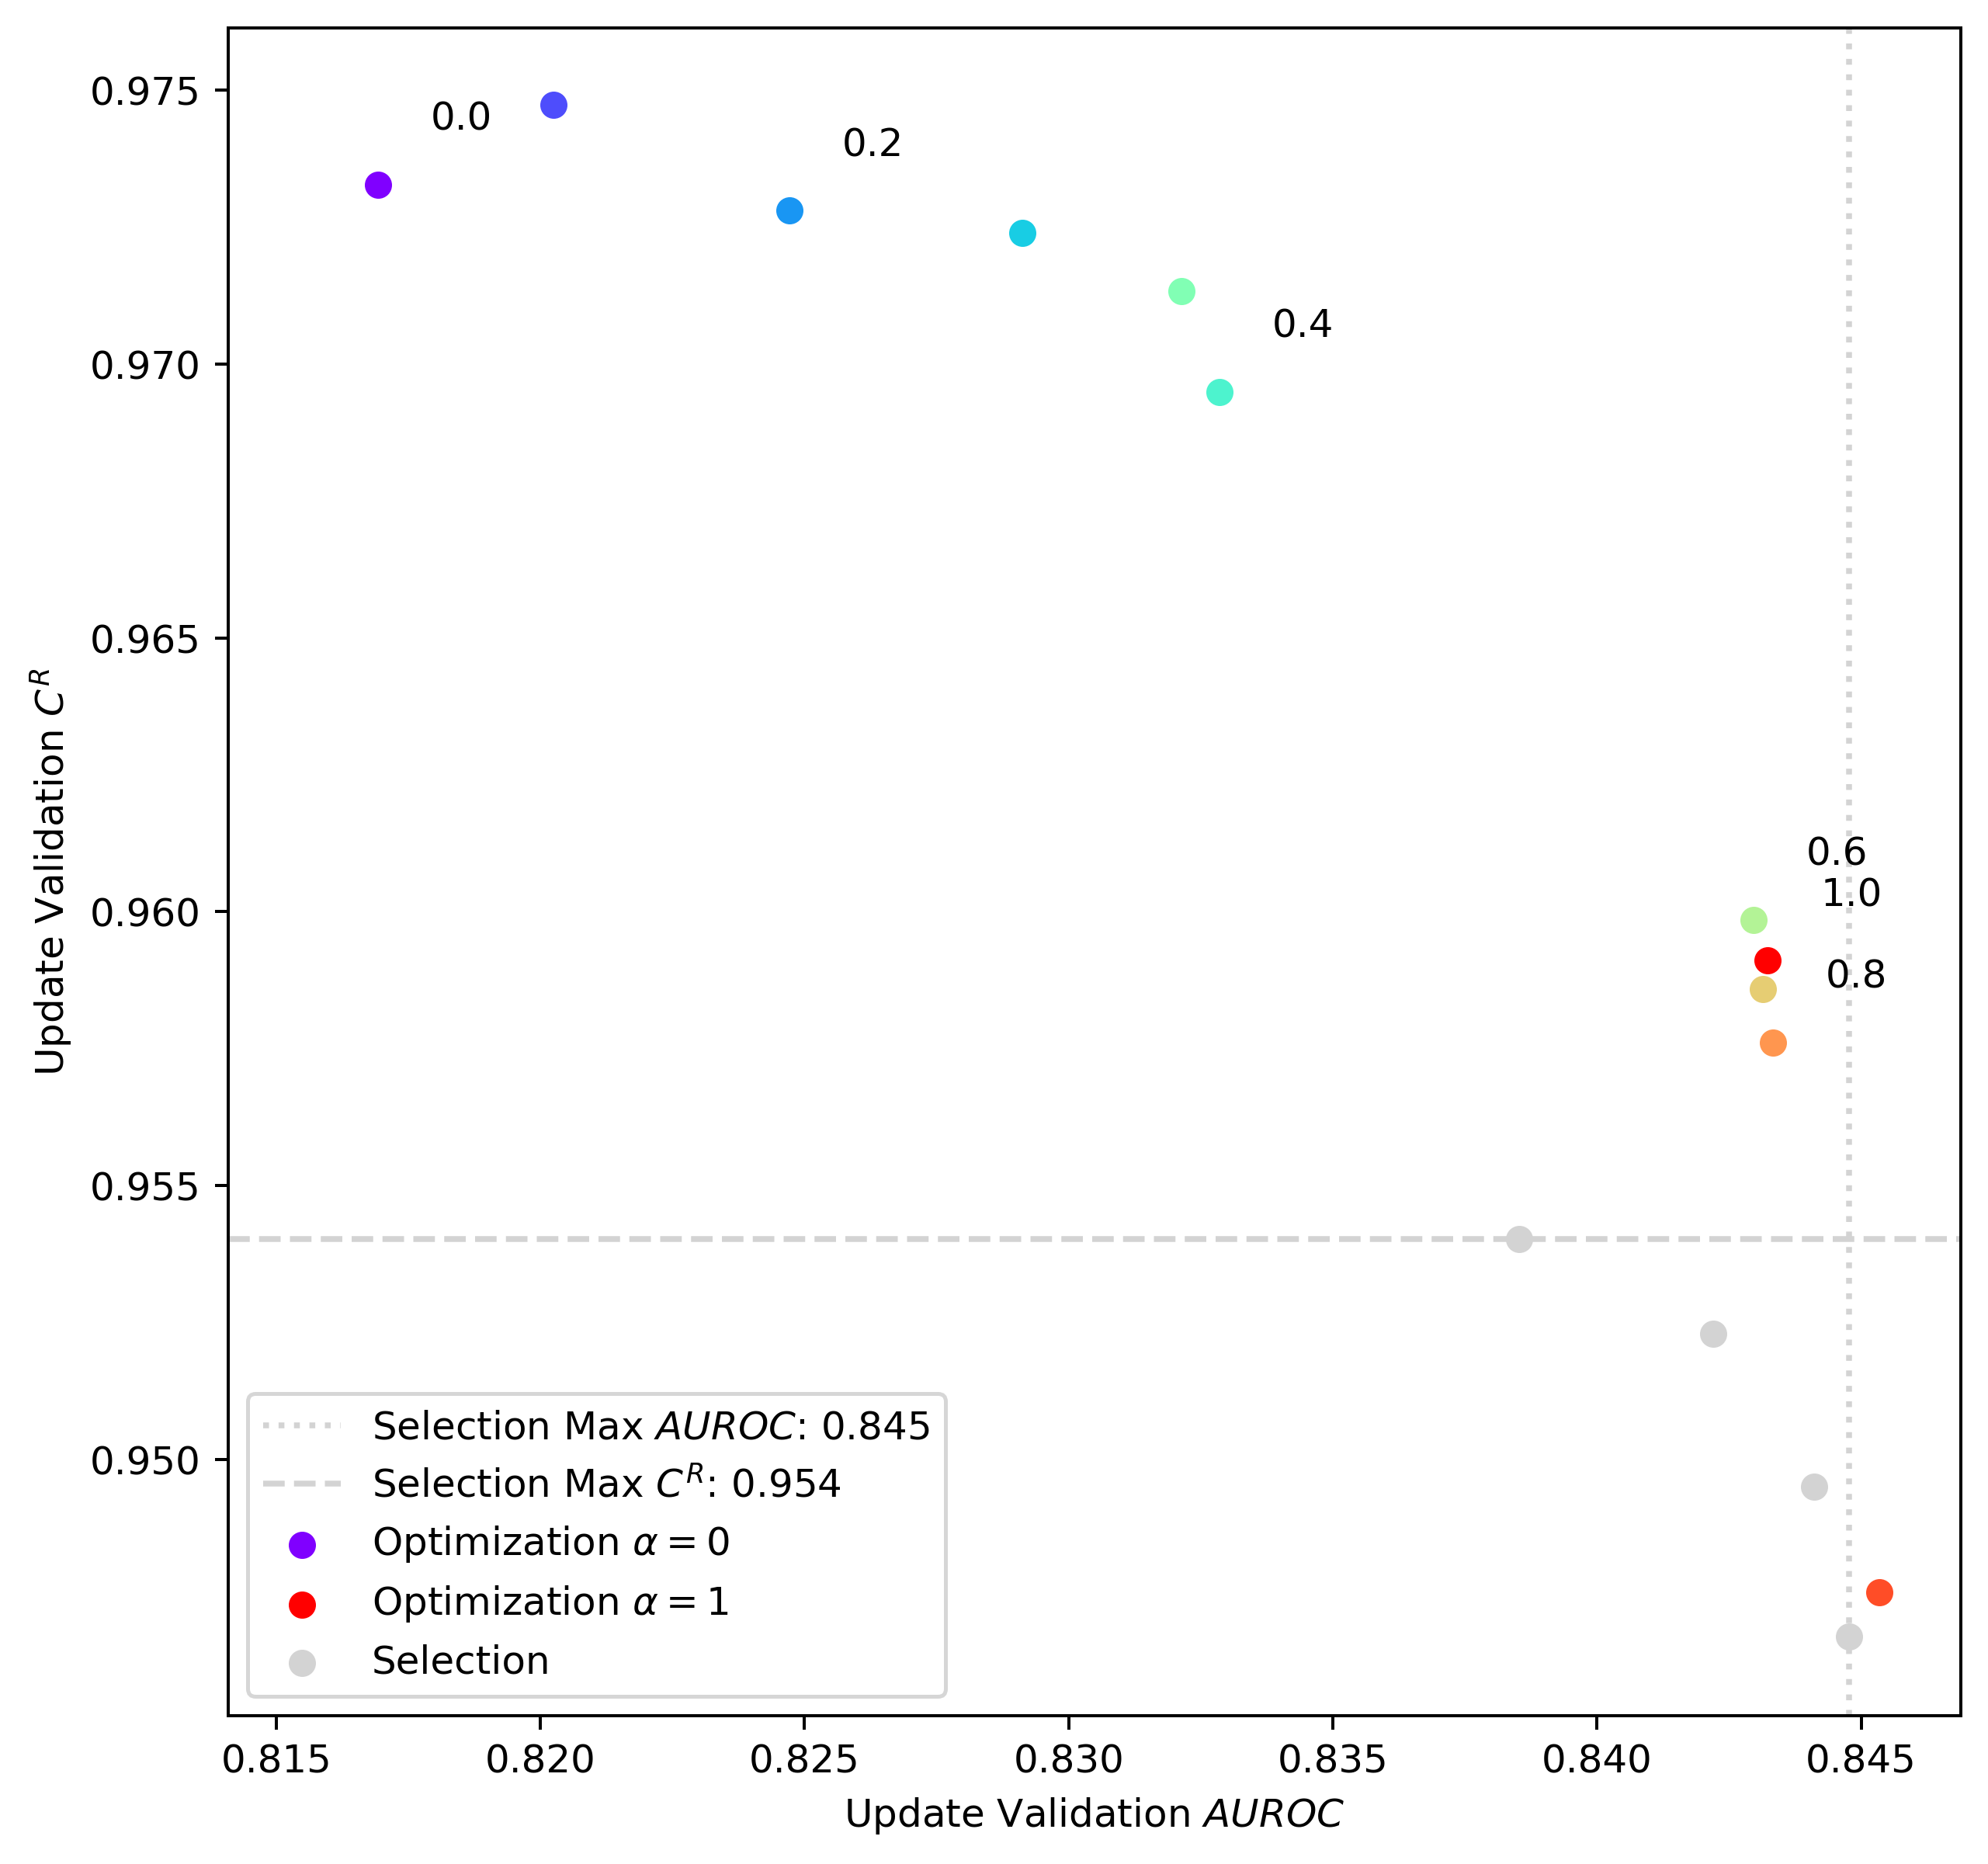

In [34]:
f_o_rep = 1
for_optimization = optimization_res_df.loc[f_o_rep]
for_selection = selection_tradeoff_res_df[selection_tradeoff_res_df['f_o_rep']==f_o_rep]


display(for_optimization.describe())

fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi=360)

for alpha, auroc, rbc in zip(for_optimization.index, for_optimization['AUROC(f_u,ue)'],  for_optimization['RBC(ue)']):
    alpha = float(alpha)
    color = ua.cmap(ua.norm(float(alpha)))
    if alpha in [0.0, 1.0]:
        ax.scatter(auroc, rbc, color=color, zorder=1,
                   label=r'Optimization $\alpha=${:}'.format(int(alpha)))
    else:
        ax.scatter(auroc, rbc, color=color, zorder=1)
    if (alpha*10)%2 == 0:
        ax.annotate(alpha, (auroc+0.001, rbc+0.001), zorder=2)


selection_color = 'lightgray'

max_auroc_idx = for_selection['alpha=1.0'].idxmax()
max_auroc_model = for_selection.loc[max_auroc_idx]
max_auroc = max_auroc_model['AUROC(f_u,ue)']
ax.axvline(max_auroc, color=selection_color, ls=':', zorder=-1,
           label=r'Selection Max $AUROC$: {:0.3f}'.format(max_auroc))
ax.set_xlabel(r'Update Validation $AUROC$')

max_rbc_idx = for_selection['alpha=0.0'].idxmax()
max_rbc = for_selection.loc[max_rbc_idx]['RBC(ue)']
ax.axhline(max_rbc, color=selection_color, ls='--', zorder=-1,
           label=r'Selection Max $C^R$: {:0.3f}'.format(max_rbc))
ax.set_ylabel(r'Update Validation $C^R$')

ax.scatter(for_selection['AUROC(f_u,ue)'], for_selection['RBC(ue)'], color=selection_color, label='Selection', zorder=-1)

ax.legend(loc='lower left')

plt.show()

In [35]:
for_selection

f_o_name  f_o_rep  f_o_C  AUROC(f_o,od)  AUROC(f_o,oe)  AUROC(f_o,ud)  \
2327         1        1    0.1       0.998161       0.777363       0.780375   
2329         1        1    0.1       0.998161       0.777363       0.780375   
2352         1        1    0.1       0.998161       0.777363       0.780375   
2379         1        1    0.1       0.998161       0.777363       0.780375   

      AUROC(f_o,ue)  AUROC(f_o,e)     f_u_name  f_u_C  ... alpha=0.1  \
2327       0.774878      0.805181  00027_00001  0.010  ...  0.942474   
2329       0.774878      0.805181  00004_00000  0.001  ...  0.936567   
2352       0.774878      0.805181  00005_00001  0.010  ...  0.938961   
2379       0.774878      0.805181  00004_00001  0.010  ...  0.941292   

      alpha=0.2  alpha=0.3  alpha=0.4  alpha=0.5  alpha=0.6  alpha=0.7  \
2327   0.930925   0.919375   0.907826   0.896277   0.884728   0.873178   
2329   0.926367   0.916168   0.905968   0.895769   0.885570   0.875370   
2352   0.928422   0.917883   0.907343   0.896804   0.886265   0.875726   
2379   0.930281   0.919270   0.908259   0.897249   0.886238   0.875227   

      alpha=0.8  alpha=0.9  alpha=1.0  
2327   0.861629   0.850080   0.838530  
2329   0.865171   0.854971   0.844772  
2352   0.865187   0.854648   0.844109  
2379   0.864216   0.853205   0.842194  

[4 rows x 28 columns]

In [36]:
for_selection[['RBC(ue)', 'RBC(e)', 'alpha=0.0']]

RBC(ue)    RBC(e)  alpha=0.0
2327  0.954023  0.946169   0.954023
2329  0.946766  0.945969   0.946766
2352  0.949500  0.947960   0.949500
2379  0.952303  0.950653   0.952303

0.848404541460703 0.9702154826042012


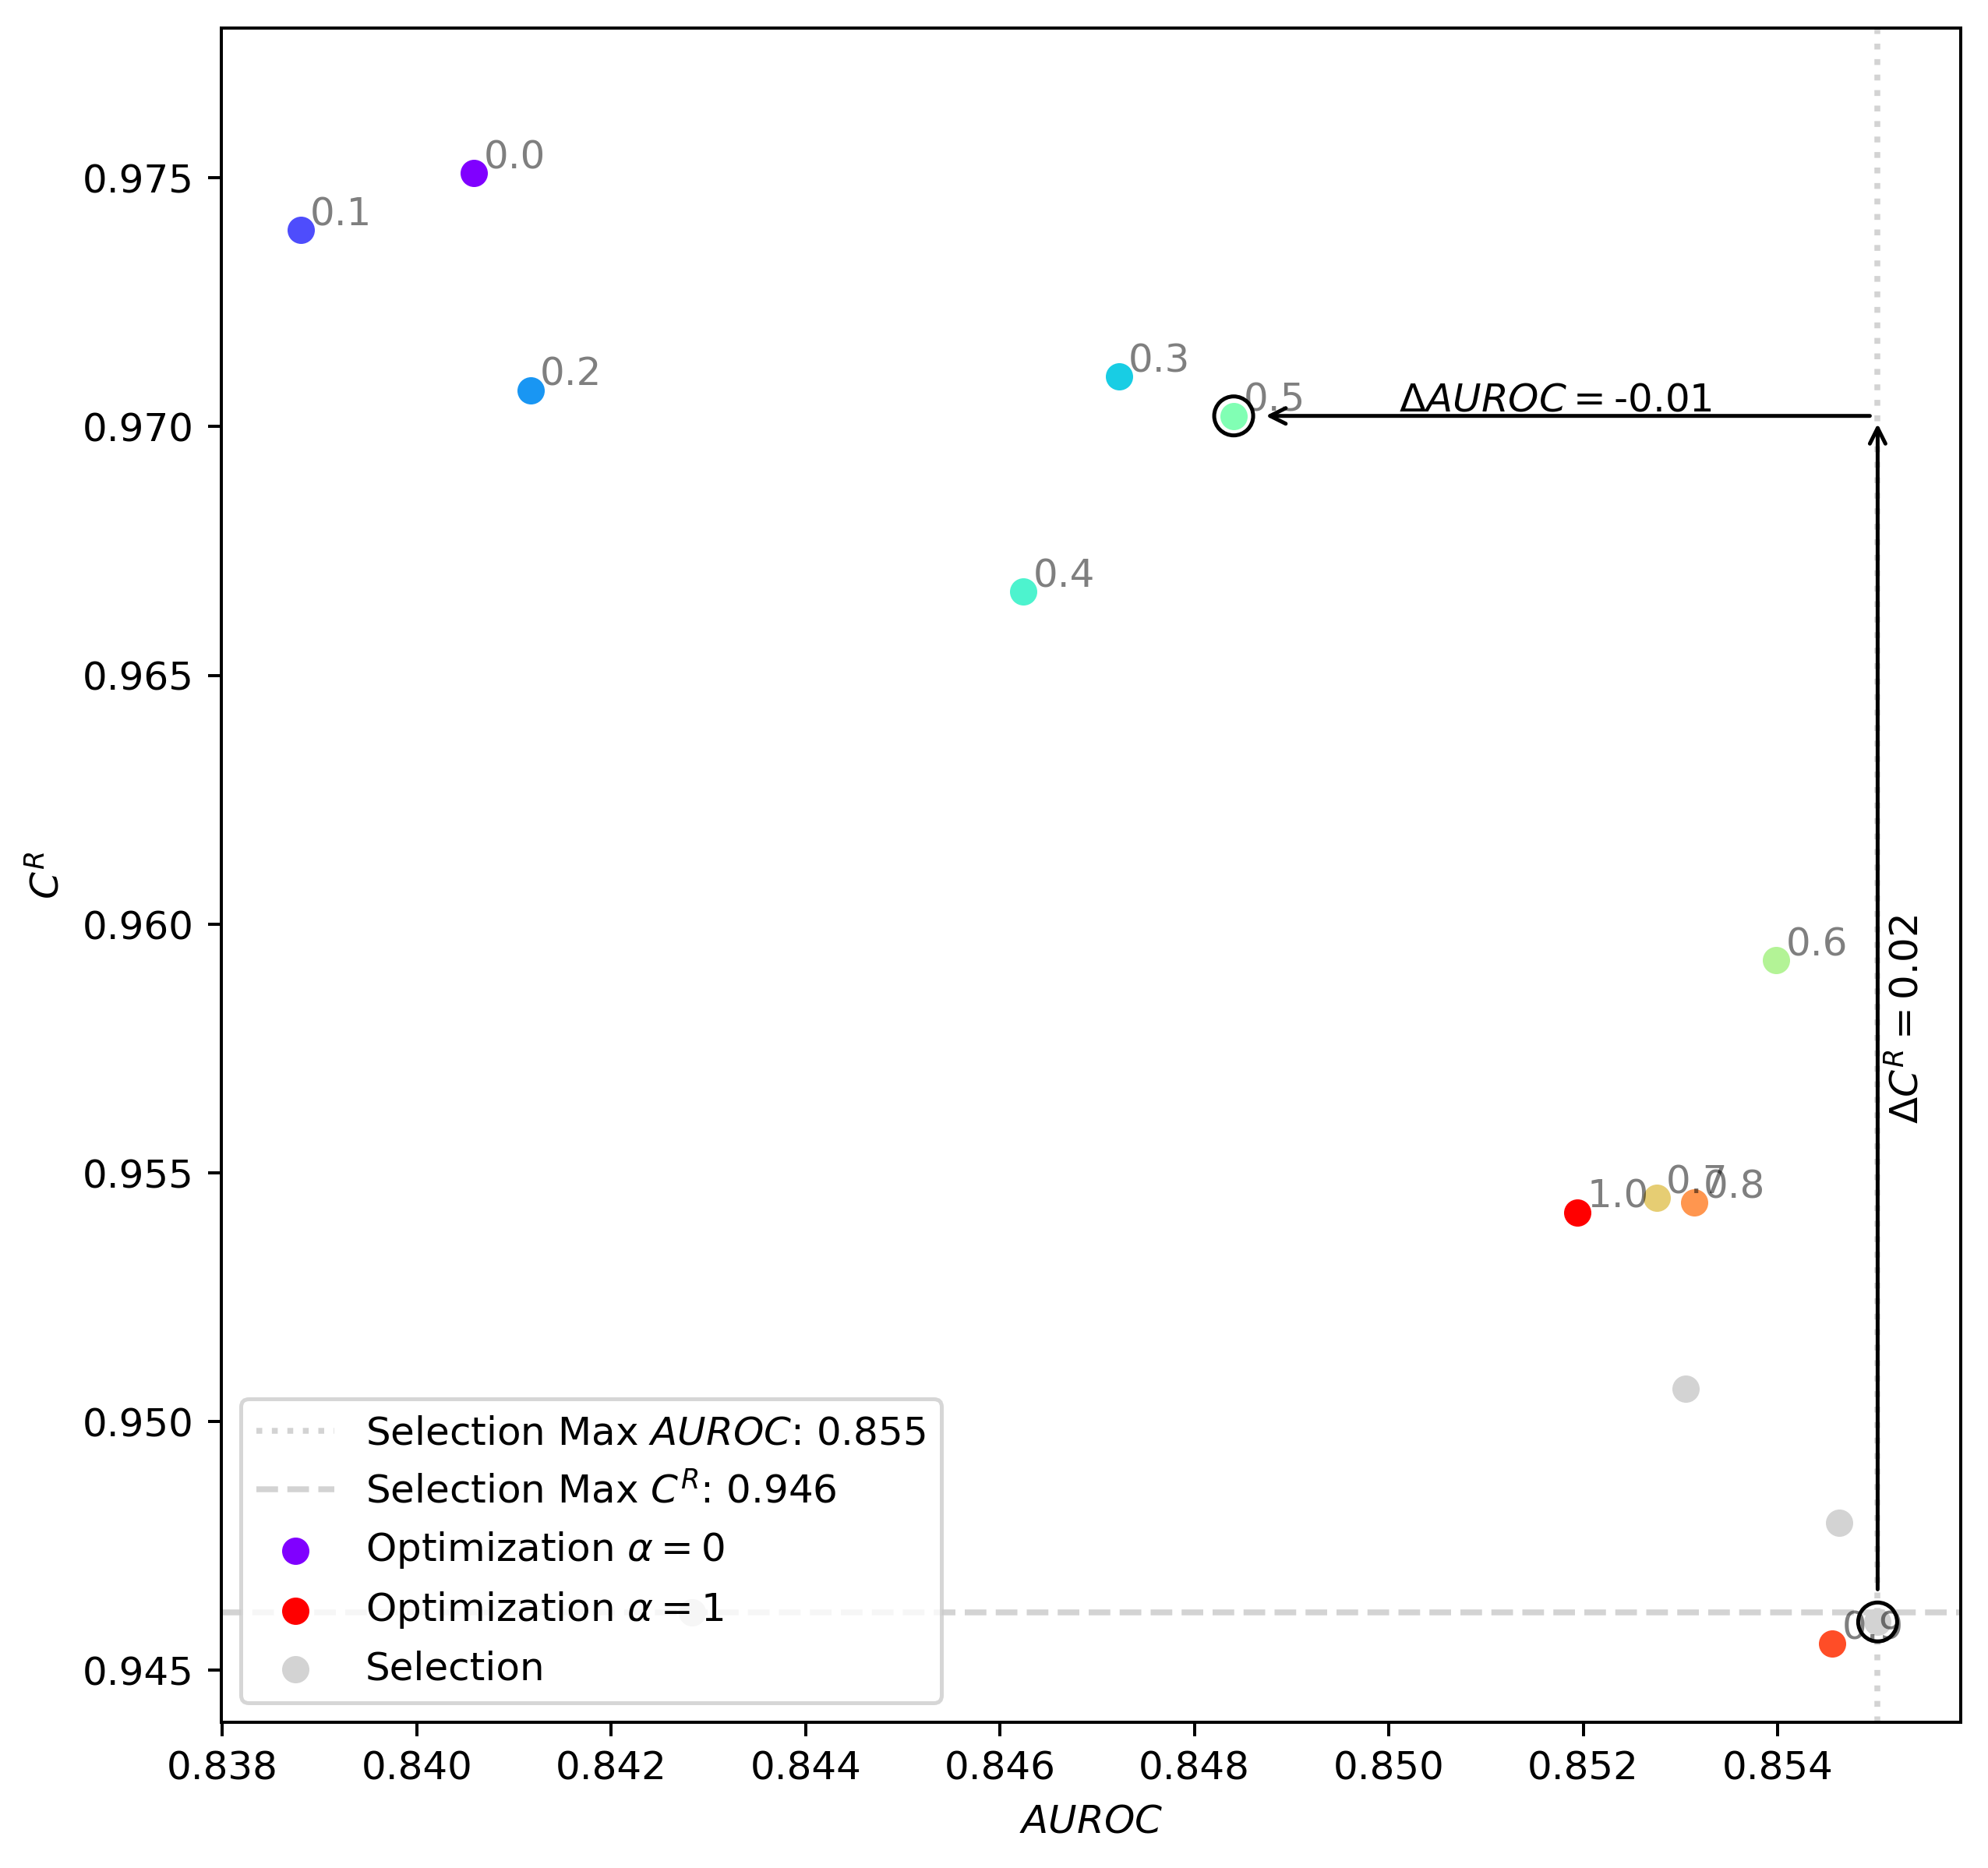

In [37]:
f_o_rep = 1
for_optimization = optimization_res_df.loc[f_o_rep]
for_selection = selection_tradeoff_res_df[selection_tradeoff_res_df['f_o_rep']==f_o_rep]


ex_opt_alpha = 0.5

fig, ax = plt.subplots(1, 1, figsize=(8,8), dpi=360)

for alpha, auroc, rbc in zip(for_optimization.index, for_optimization['AUROC(f_u,e)'],  for_optimization['RBC(e)']):
    alpha = float(alpha)
    color = ua.cmap(ua.norm(float(alpha)))
    if alpha in [0.0, 1.0]:
        ax.scatter(auroc, rbc, color=color, zorder=1,
                   label=r'Optimization $\alpha=${:}'.format(int(alpha)))
    else:
        ax.scatter(auroc, rbc, color=color, zorder=1)
    #if (alpha*10)%2 == 0:
    if (alpha*10)%1 == 0:
        text = ax.annotate(alpha, (auroc+0.0001, rbc+0.0001), zorder=2)
        text.set_alpha(0.5)
        
    if alpha==ex_opt_alpha:
        ex_opt_auroc = auroc
        ex_opt_rbc = rbc
        ax.scatter(auroc, rbc, s=100, facecolors='none', edgecolors='k') 
        print(auroc, rbc)
        


selection_color = 'lightgray'

max_auroc_idx = for_selection['alpha=1.0'].idxmax()
max_auroc_model = for_selection.loc[max_auroc_idx]
max_auroc = max_auroc_model['AUROC(f_u,e)']
ax.axvline(max_auroc, color=selection_color, ls=':', zorder=-1,
           label=r'Selection Max $AUROC$: {:0.3f}'.format(max_auroc))
ax.set_xlabel(r'$AUROC$')

ax.scatter(max_auroc_model['AUROC(f_u,e)'], max_auroc_model['RBC(e)'], s=100, facecolors='none', edgecolors='k')



#max_rbc_idx = for_selection['alpha=0.0'].idxmax()
#max_rbc = for_selection.loc[max_rbc_idx]['RBC(ue)']
#ax.axhline(max_rbc, color=selection_color, ls='--', zorder=-1,
#           label=r'Selection Max $C^R$: {:0.3f}'.format(max_rbc))
#ax.set_ylabel(r'Update Validation $C^R$')


max_rbc_idx = for_selection['alpha=0.0'].idxmax()
max_rbc_model = for_selection.loc[max_rbc_idx]
max_rbc = max_rbc_model['RBC(e)']
ax.axhline(max_rbc, color=selection_color, ls='--', zorder=-1,
           label=r'Selection Max $C^R$: {:0.3f}'.format(max_rbc))
ax.set_ylabel(r'$C^R$')

ax.scatter(for_selection['AUROC(f_u,e)'], for_selection['RBC(e)'], color=selection_color, label='Selection', zorder=-1)

#ax.annotate(s='', [ex_opt_auroc+0.001, max_auroc_model['AUROC(f_u,e)']-0.001], [ex_opt_rbc, ex_opt_rbc], color='k')
ax.annotate(s='', 
            xy=(ex_opt_auroc+0.00025, ex_opt_rbc), 
            xytext=(max_auroc_model['AUROC(f_u,e)'], ex_opt_rbc), 
            arrowprops=dict(arrowstyle='->'))

ax.annotate(r'$\Delta AUROC=${:0.2f}'.format(ex_opt_auroc-max_auroc_model['AUROC(f_u,e)']), 
            ((ex_opt_auroc+max_auroc_model['AUROC(f_u,e)'])/2, ex_opt_rbc+0.0001),
           ha='center')



ax.annotate(s='', 
            xy=(max_auroc_model['AUROC(f_u,e)'], ex_opt_rbc), 
            xytext=(max_auroc_model['AUROC(f_u,e)'], max_auroc_model['RBC(e)']+0.0005), 
            arrowprops=dict(arrowstyle='->'))


ax.annotate(r'$\Delta C^R=${:0.2f}'.format(ex_opt_rbc-max_auroc_model['RBC(e)']), 
            (max_auroc_model['AUROC(f_u,e)']+0.0001, (max_auroc_model['RBC(e)'] + ex_opt_rbc)/2),
            va='center',
            rotation=90
           )


ax.legend(loc='lower left')

plt.show()

# optimization alpha=1.0 as baseline

In [38]:
optimization_baseline = optimization_res_df.copy(deep=True)
optimization_baseline = optimization_baseline.reset_index()
optimization_baseline = optimization_baseline[optimization_baseline['f_u_alpha']=='1.0']
optimization_baseline = optimization_baseline.drop(columns=['f_u_alpha'])
optimization_baseline = optimization_baseline.set_index('f_o_rep')
optimization_baseline

f_o_name  f_o_C  AUROC(f_o,od)  AUROC(f_o,oe)  AUROC(f_o,ud)  \
f_o_rep                                                                 
0               0  0.100       0.998638       0.777045       0.799334   
1               1  0.100       0.998161       0.777363       0.780375   
2               2  0.100       0.998394       0.787655       0.791258   
3               3  0.001       1.000000       0.741899       0.763926   
4               4  0.100       0.998258       0.808866       0.782290   
5               5  0.100       0.997901       0.757126       0.725063   
6               6  0.100       0.997505       0.824439       0.808177   
7               7  0.100       0.998588       0.759906       0.772941   
8               8  0.100       0.997491       0.805391       0.769805   
9               9  0.100       0.998520       0.776625       0.776120   
10             10  0.001       1.000000       0.785051       0.813446   
11             11  0.001       1.000000       0.816139       0.794207   
12             12  0.001       1.000000       0.770746       0.768362   
13             13  0.010       1.000000       0.736709       0.790717   
14             14  0.001       1.000000       0.788396       0.795861   
15             15  0.100       0.998611       0.810716       0.797108   
16             16  0.100       0.998150       0.771821       0.798922   
17             17  0.010       1.000000       0.790932       0.802398   
18             18  0.100       0.998559       0.787589       0.773344   
19             19  0.100       0.997584       0.769764       0.768877   
20             20  0.100       0.998245       0.779494       0.782925   
21             21  0.001       1.000000       0.811176       0.767198   
22             22  0.100       0.995848       0.810529       0.764400   
23             23  0.100       0.999336       0.786896       0.749206   
24             24  0.100       0.997424       0.760178       0.784012   
25             25  0.100       0.997465       0.750609       0.785096   
26             26  0.100       0.998540       0.868793       0.802778   
27             27  0.001       1.000000       0.782757       0.772548   
28             28  0.001       1.000000       0.792738       0.748452   
29             29  0.100       0.994888       0.775832       0.754891   
30             30  0.001       1.000000       0.818672       0.781631   
31             31  0.100       0.998155       0.798798       0.804843   
32             32  0.100       0.998282       0.767475       0.815317   
33             33  0.100       0.999632       0.829236       0.822859   
34             34  0.100       0.996911       0.791889       0.750950   
35             35  0.100       0.997855       0.764502       0.770023   
36             36  0.001       1.000000       0.822595       0.809573   
37             37  0.100       0.997930       0.855872       0.801393   
38             38  0.100       0.998547       0.799455       0.788483   
39             39  0.010       1.000000       0.813959       0.785515   

         AUROC(f_o,ue)  AUROC(f_o,e)     f_u_name  f_u_C    f_u_type  \
f_o_rep                                                                
0             0.782780      0.803810  00000_00010  0.001  engineered   
1             0.774878      0.805181  00000_00010  0.001  engineered   
2             0.786571      0.807951  00000_00021  0.010  engineered   
3             0.763404      0.752700  00000_00010  0.001  engineered   
4             0.778845      0.786602  00000_00010  0.001  engineered   
5             0.793238      0.745133  00000_00021  0.010  engineered   
6             0.800282      0.809694  00000_00010  0.001  engineered   
7             0.795593      0.787582  00000_00010  0.001  engineered   
8             0.809206      0.799839  00000_00021  0.010  engineered   
9             0.769211      0.798332  00000_00021  0.010  engineered   
10            0.818591      0.801436  00000_00021  0.010  engineered   
11    

In [39]:
comparison_res_df = optimization_res_df.join(optimization_baseline, 
                                             lsuffix='_optimization', rsuffix='_selection')

for c in ['RBC(e)', 'AUROC(f_u,e)']:
    comparison_res_df['Δ{}'.format(c)] = \
    comparison_res_df['{}_optimization'.format(c)] - comparison_res_df['{}_selection'.format(c)]

comparison_res_df

f_o_name_optimization  f_o_C_optimization  \
f_o_rep f_u_alpha                                              
0       0.0                            0                0.10   
        0.1                            0                0.10   
        0.2                            0                0.10   
        0.3                            0                0.10   
        0.4                            0                0.10   
...                                  ...                 ...   
39      0.6                           39                0.01   
        0.7                           39                0.01   
        0.8                           39                0.01   
        0.9                           39                0.01   
        1.0                           39                0.01   

                   AUROC(f_o,od)_optimization  AUROC(f_o,oe)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.998638                    0.777045   
        0.1                          0.998638                    0.777045   
        0.2                          0.998638                    0.777045   
        0.3                          0.998638                    0.777045   
        0.4                          0.998638                    0.777045   
...                                       ...                         ...   
39      0.6                          1.000000                    0.813959   
        0.7                          1.000000                    0.813959   
        0.8                          1.000000                    0.813959   
        0.9                          1.000000                    0.813959   
        1.0                          1.000000                    0.813959   

                   AUROC(f_o,ud)_optimization  AUROC(f_o,ue)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.799334                    0.782780   
        0.1                          0.799334                    0.782780   
        0.2                          0.799334                    0.782780   
        0.3                          0.799334                    0.782780   
        0.4                          0.799334                    0.782780   
...                                       ...                         ...   
39      0.6                          0.785515                    0.772631   
        0.7                          0.785515                    0.772631   
        0.8                          0.785515                    0.772631   
        0.9                          0.785515                    0.772631   
        1.0                          0.785515                    0.772631   

                   AUROC(f_o,e)_optimization f_u_name_optimization  \
f_o_rep f_u_alpha                                                    
0       0.0                          0.80381           00000_00011   
        0.1                          0.80381           00000_00001   
        0.2                          0.80381           00000_00002   
        0.3                          0.80381           00000_00014   
        0.4                          0.80381           00000_00015   
...                                      ...                   ...   
39      0.6                          0.77089           00000_00006   
        0.7                          0.77089           00000_00007   
        0.8                          0.77089           00000_00008   
        0.9                          0.77089           00000_00009   
        1.0                          0.77089           00000_00010   

                   f_u_C_optimization f_u_type_optimization  ...  \
f_o_rep f_u_alpha                                            ...   
0       0.0                     0.010            engineered  ...   
        0.1                     0.001            engineered  ...   

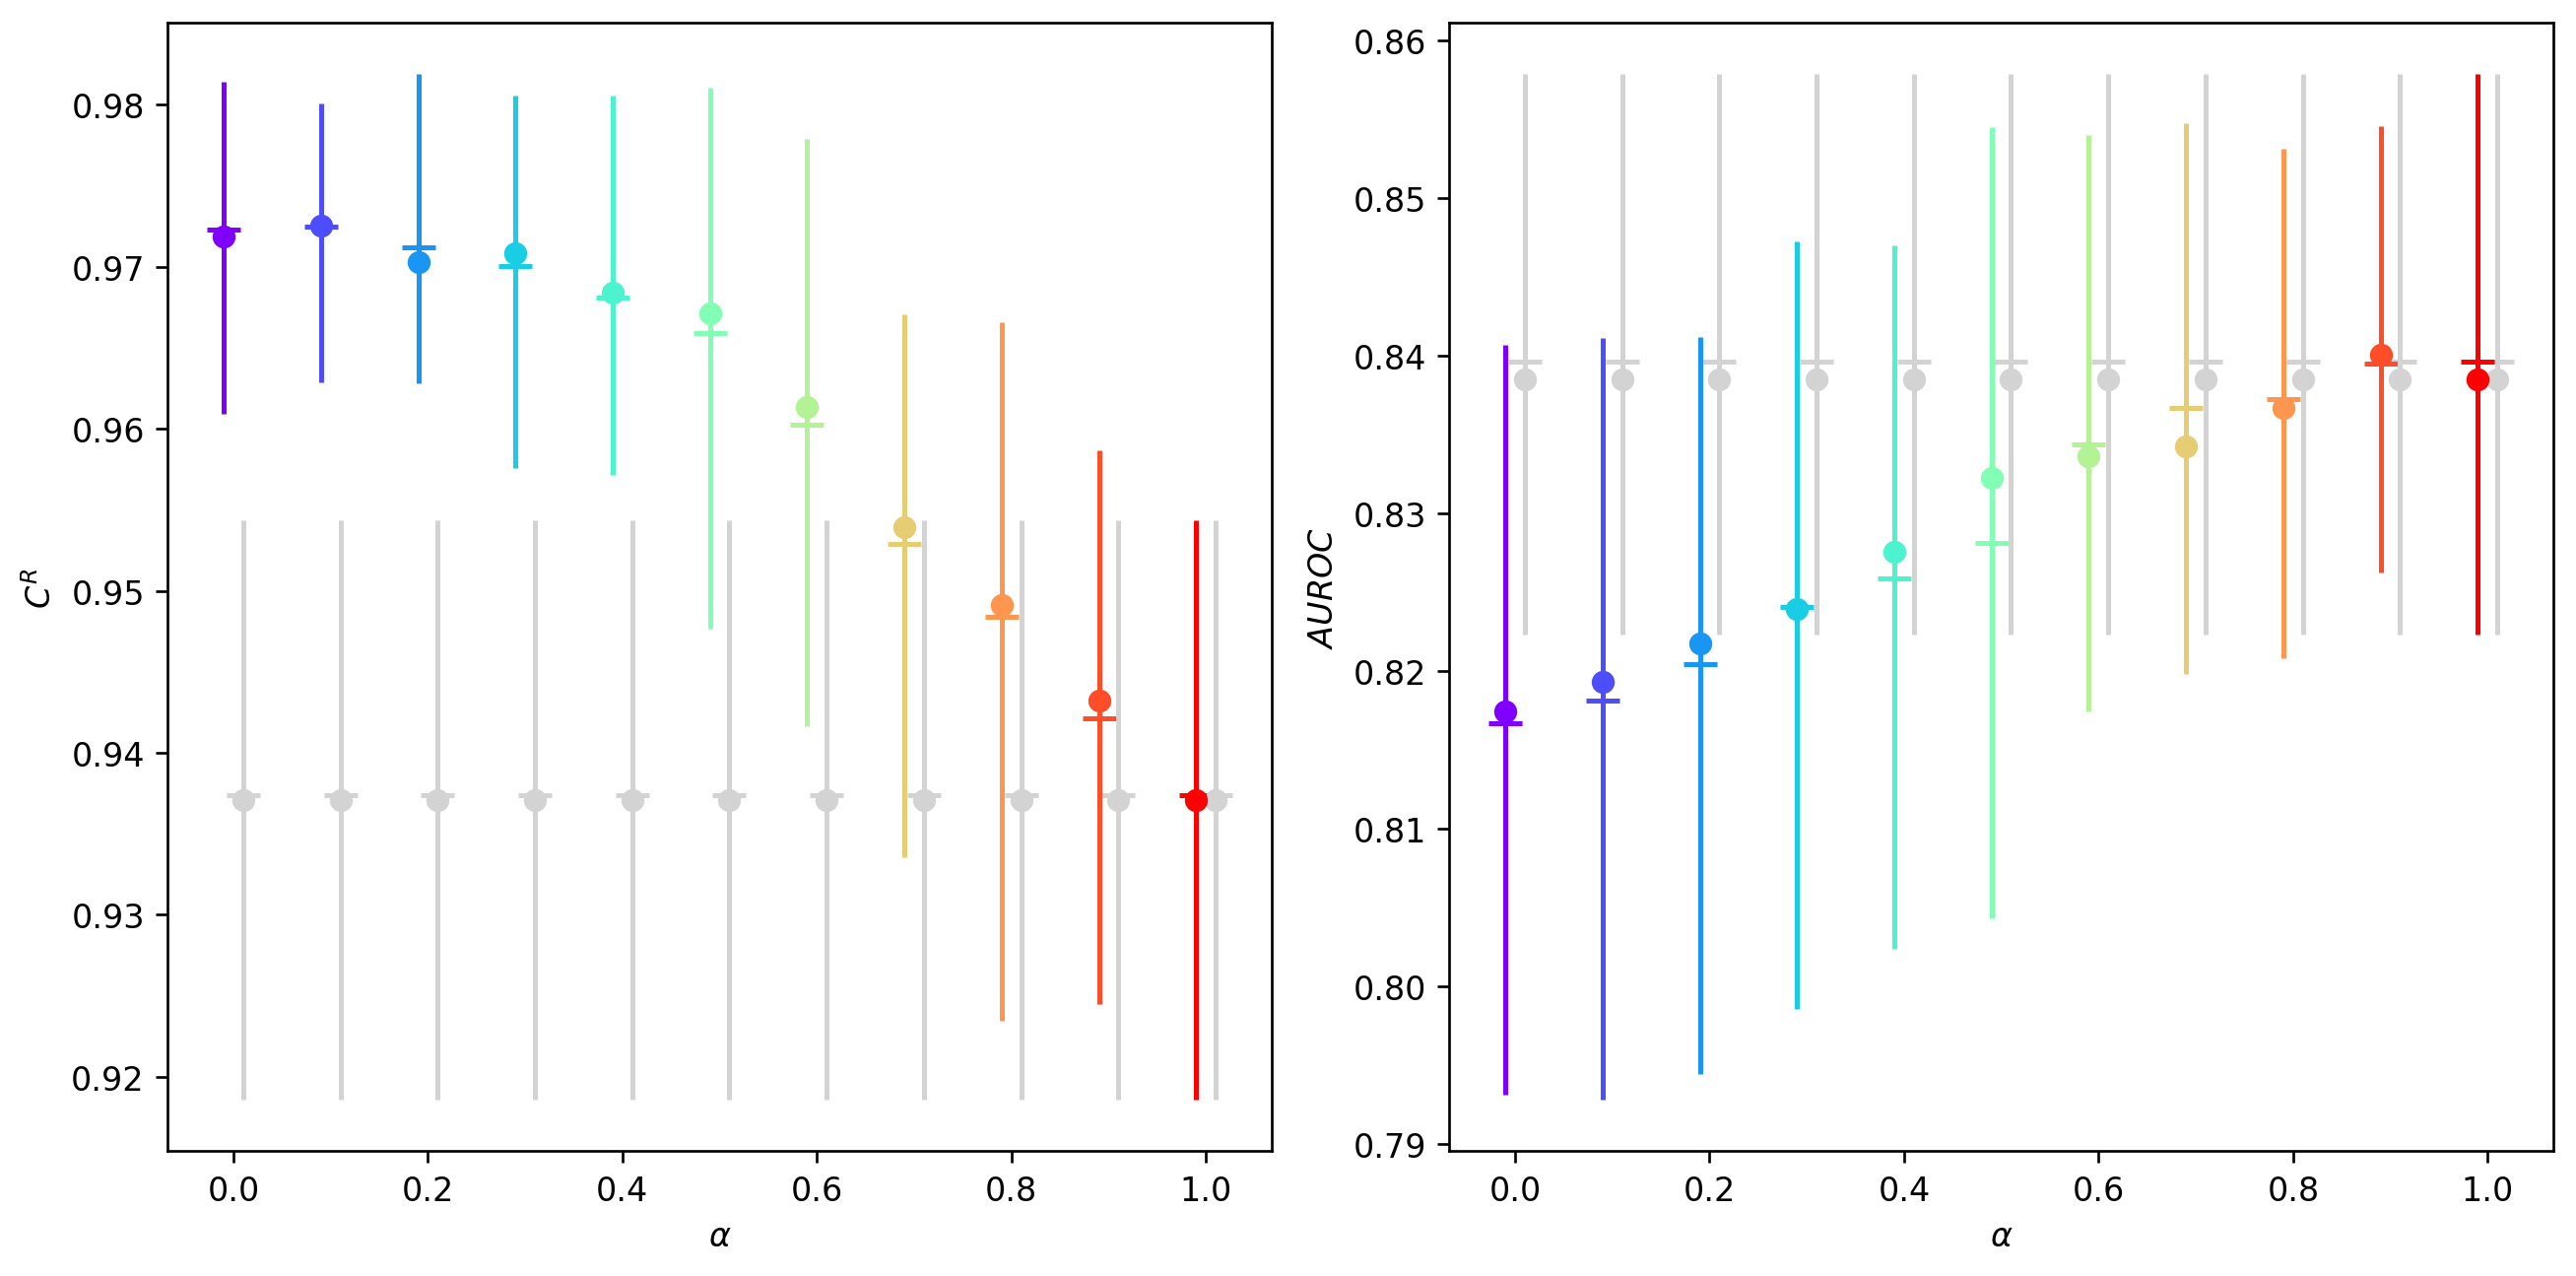

f_u_alpha            0.0        0.1        0.2        0.3        0.4  \
ΔRBC(e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
        mean    0.034913   0.035122   0.033848   0.032682   0.030743   
        std     0.011820   0.010900   0.011497   0.011326   0.010977   
        min     0.015770   0.012998   0.014388   0.011439   0.012481   
        2.5%    0.016016   0.017730   0.015695   0.014552   0.013022   
        50%     0.034589   0.037014   0.035117   0.031305   0.031058   
        97.5%   0.054876   0.053411   0.055033   0.053641   0.049600   
        max     0.061463   0.058009   0.061011   0.062799   0.060909   

f_u_alpha            0.5        0.6        0.7        0.8        0.9   1.0  
ΔRBC(e) count  40.000000  40.000000  40.000000  40.000000  40.000000  40.0  
        mean    0.028552   0.022871   0.015543   0.011038   0.004746   0.0  
        std     0.010350   0.012822   0.011939   0.008577   0.007683   0.0  
        min     0.010332   0.002634  -0.004786  -0.001898  -0.018666   0.0  
        2.5%    0.015315   0.005006   0.000157  -0.000342  -0.009986   0.0  
        50%     0.028593   0.020305   0.013184   0.010396   0.005420   0.0  
        97.5%   0.052906   0.051371   0.045776   0.024014   0.019142   0.0  
        max     0.059791   0.059512   0.059455   0.039904   0.021695   0.0

f_u_alpha                  0.0        0.1        0.2        0.3        0.4  \
ΔAUROC(f_u,e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
              mean   -0.022916  -0.021499  -0.019189  -0.015538  -0.013737   
              std     0.011274   0.011652   0.010408   0.010765   0.010176   
              min    -0.046117  -0.060541  -0.044206  -0.039686  -0.039413   
              2.5%   -0.042986  -0.042246  -0.043621  -0.039208  -0.037064   
              50%    -0.021132  -0.019748  -0.018383  -0.016229  -0.012377   
              97.5%  -0.005261  -0.004387  -0.001448   0.005083   0.000692   
              max    -0.002551  -0.001746  -0.000650   0.005946   0.001879   

f_u_alpha                  0.5        0.6        0.7        0.8        0.9  \
ΔAUROC(f_u,e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
              mean   -0.011466  -0.005262  -0.002899  -0.002385  -0.000130   
              std     0.011193   0.007042   0.006323   0.005419   0.003490   
              min    -0.042426  -0.025975  -0.016916  -0.016148  -0.008731   
              2.5%   -0.035721  -0.019300  -0.013677  -0.014070  -0.005875   
              50%    -0.009048  -0.004132  -0.002364  -0.001315  -0.000124   
              97.5%   0.004022   0.007095   0.007881   0.003861   0.005905   
              max     0.004922   0.009512   0.012092   0.009004   0.006733   

f_u_alpha             1.0  
ΔAUROC(f_u,e) count  40.0  
              mean    0.0  
              std     0.0  
              min     0.0  
              2.5%    0.0  
              50%     0.0  
              97.5%   0.0  
              max     0.0

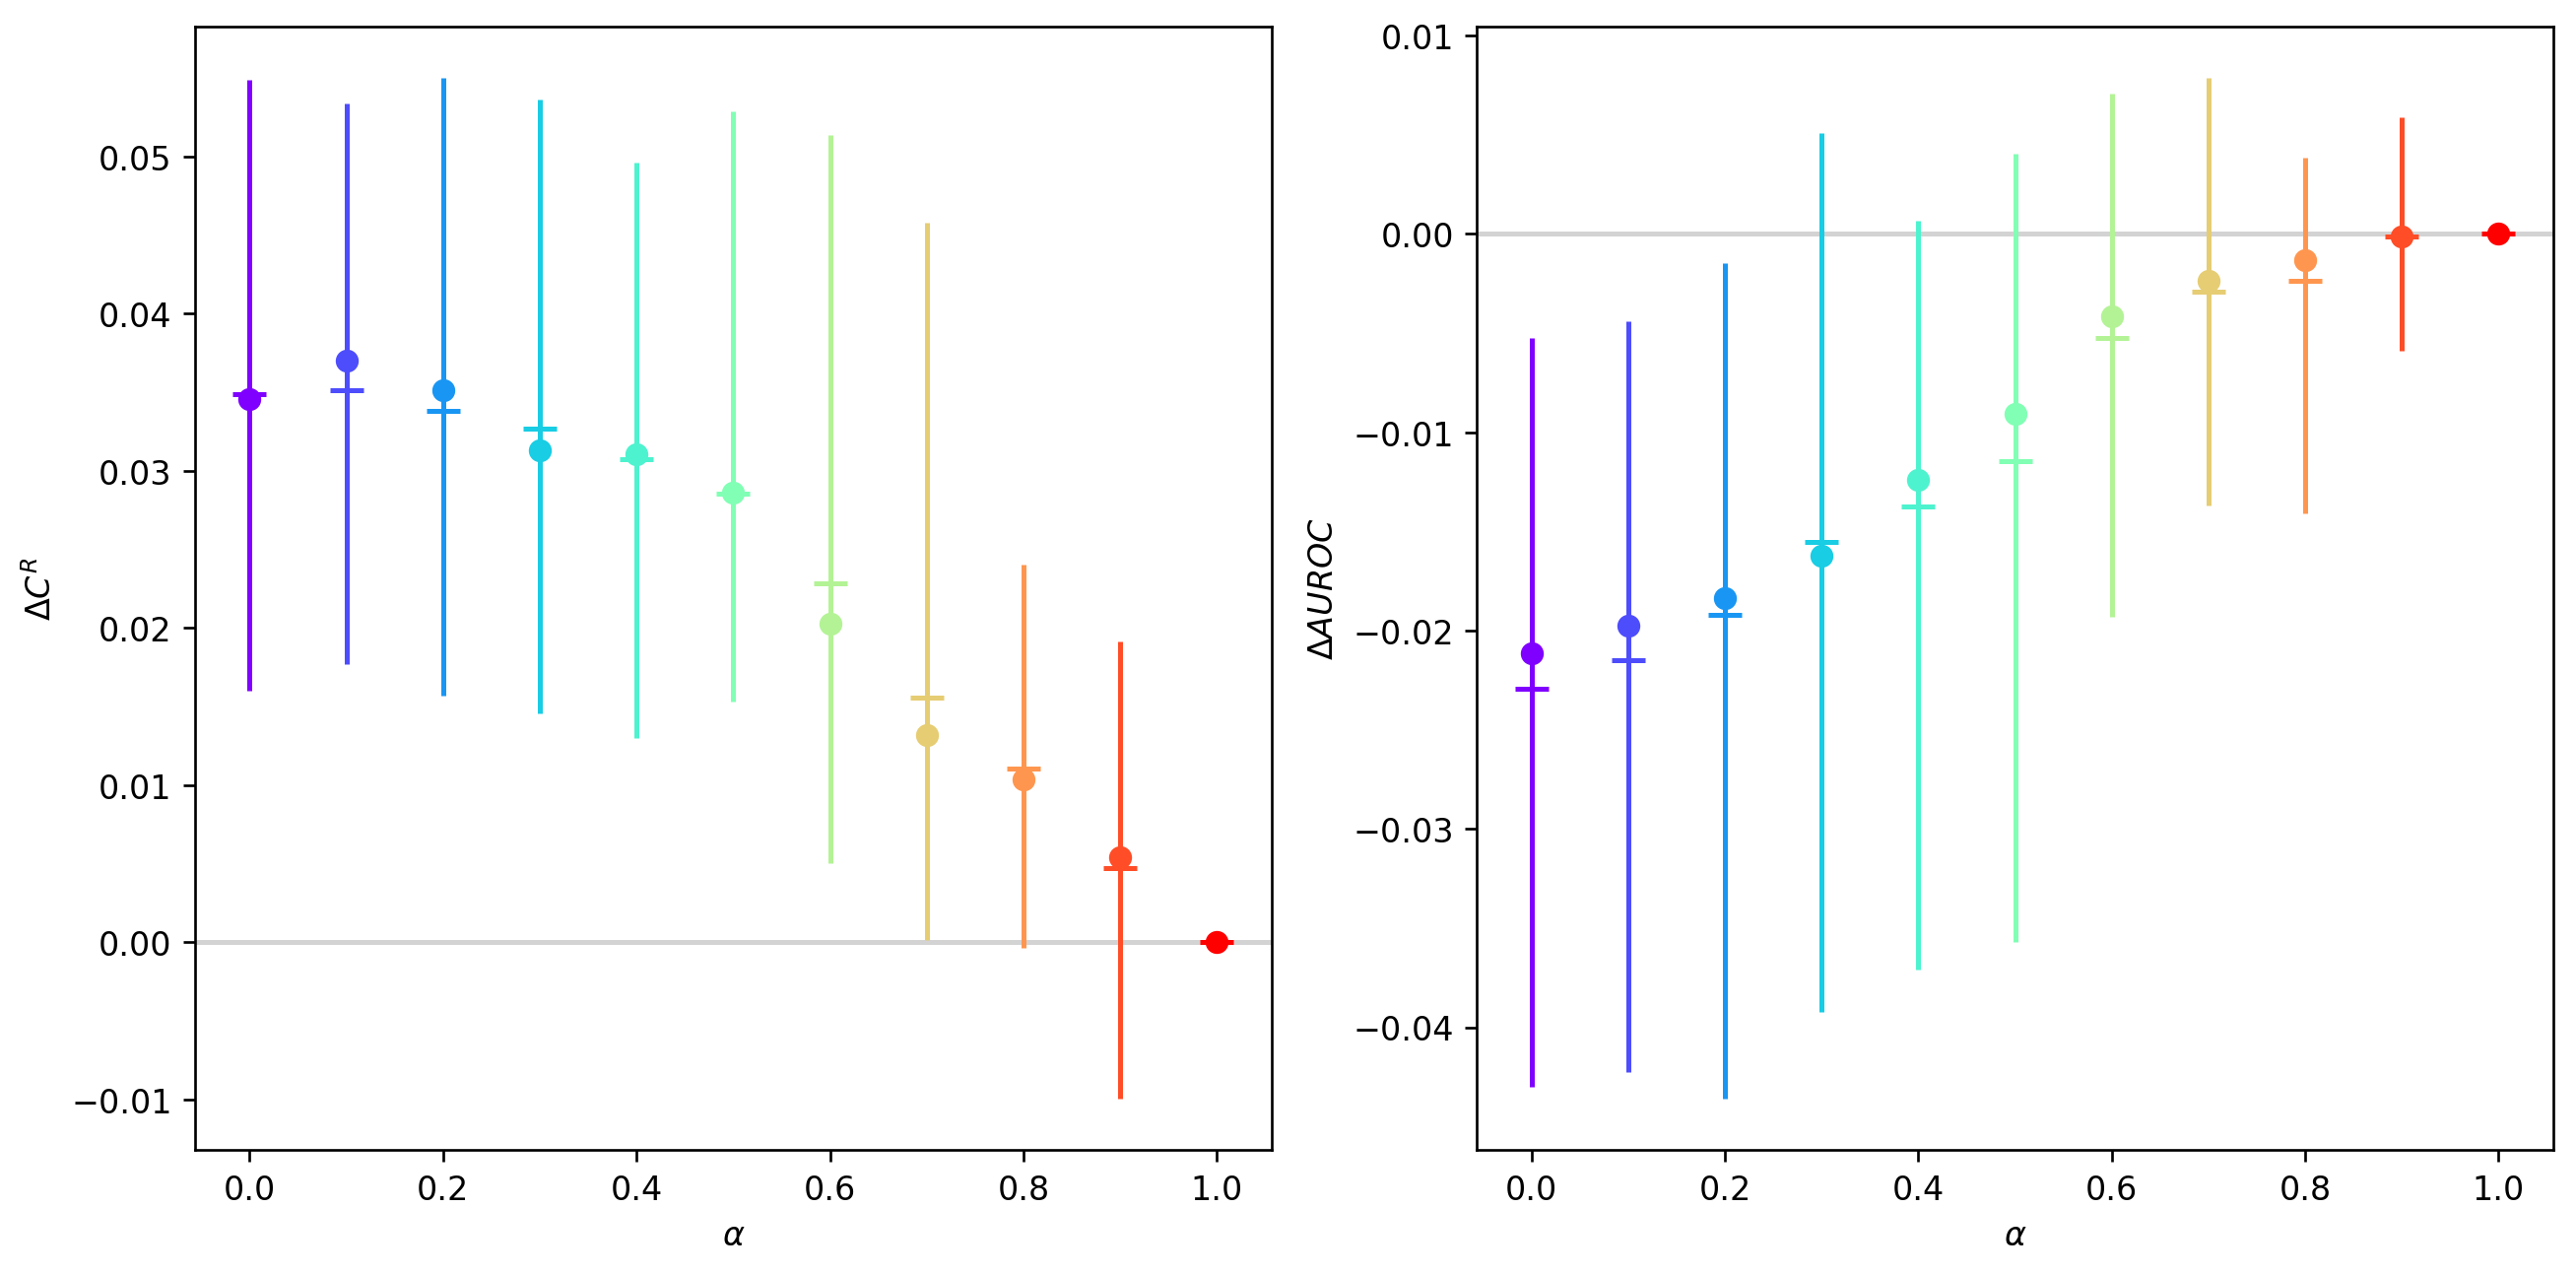

f_u_alpha                        0.0        0.1        0.2        0.3  \
RBC(e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                    mean    0.972274   0.972483   0.971209   0.970043   
                    std     0.006370   0.005455   0.005952   0.006829   
                    min     0.958983   0.962189   0.960454   0.953558   
                    2.5%    0.960949   0.962837   0.962830   0.957563   
                    50%     0.971895   0.972553   0.970272   0.970855   
                    97.5%   0.981397   0.980106   0.981901   0.980536   
                    max     0.983391   0.982538   0.982939   0.984727   

f_u_alpha                        0.4        0.5        0.6        0.7  \
RBC(e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                    mean    0.968104   0.965913   0.960232   0.952904   
                    std     0.006106   0.008962   0.010536   0.009718   
                    min     0.956265   0.946390   0.935005   0.929268   
                    2.5%    0.957163   0.947677   0.941661   0.933554   
                    50%     0.968415   0.967139   0.961325   0.953904   
                    97.5%   0.980548   0.981029   0.977891   0.967046   
                    max     0.982837   0.981719   0.981440   0.981383   

f_u_alpha                        0.8        0.9        1.0  
RBC(e)_optimization count  40.000000  40.000000  40.000000  
                    mean    0.948399   0.942107   0.937361  
                    std     0.011584   0.010002   0.010671  
                    min     0.922875   0.923155   0.912852  
                    2.5%    0.923441   0.924508   0.918569  
                    50%     0.949123   0.943198   0.937066  
                    97.5%   0.966580   0.958684   0.954322  
                    max     0.968048   0.959288   0.958901

f_u_alpha                              0.0        0.1        0.2        0.3  \
AUROC(f_u,e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                          mean    0.816714   0.818132   0.820441   0.824092   
                          std     0.014069   0.014573   0.013384   0.013818   
                          min     0.791153   0.778986   0.792824   0.797835   
                          2.5%    0.793164   0.792804   0.794458   0.798550   
                          50%     0.817473   0.819301   0.821742   0.823979   
                          97.5%   0.840683   0.841165   0.841222   0.847303   
                          max     0.844287   0.842456   0.843249   0.850453   

f_u_alpha                              0.4        0.5        0.6        0.7  \
AUROC(f_u,e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                          mean    0.825893   0.828164   0.834368   0.836731   
                          std     0.013587   0.013846   0.010328   0.010220   
                          min     0.797617   0.794605   0.811353   0.819706   
                          2.5%    0.802376   0.804327   0.817457   0.819844   
                          50%     0.827582   0.832292   0.833631   0.834283   
                          97.5%   0.847008   0.854510   0.853997   0.854773   
                          max     0.848892   0.856890   0.854516   0.856216   

f_u_alpha                              0.8        0.9        1.0  
AUROC(f_u,e)_optimization count  40.000000  40.000000  40.000000  
                          mean    0.837245   0.839500   0.839630  
                          std     0.009713   0.008958   0.008799  
                          min     0.818429   0.817770   0.818552  
                          2.5%    0.820821   0.826270   0.822317  
                          50%     0.836734   0.840112   0.838511  
                          97.5%   0.853165   0.854573   0.857899  
                          max     0.854179   0.854940   0.861862

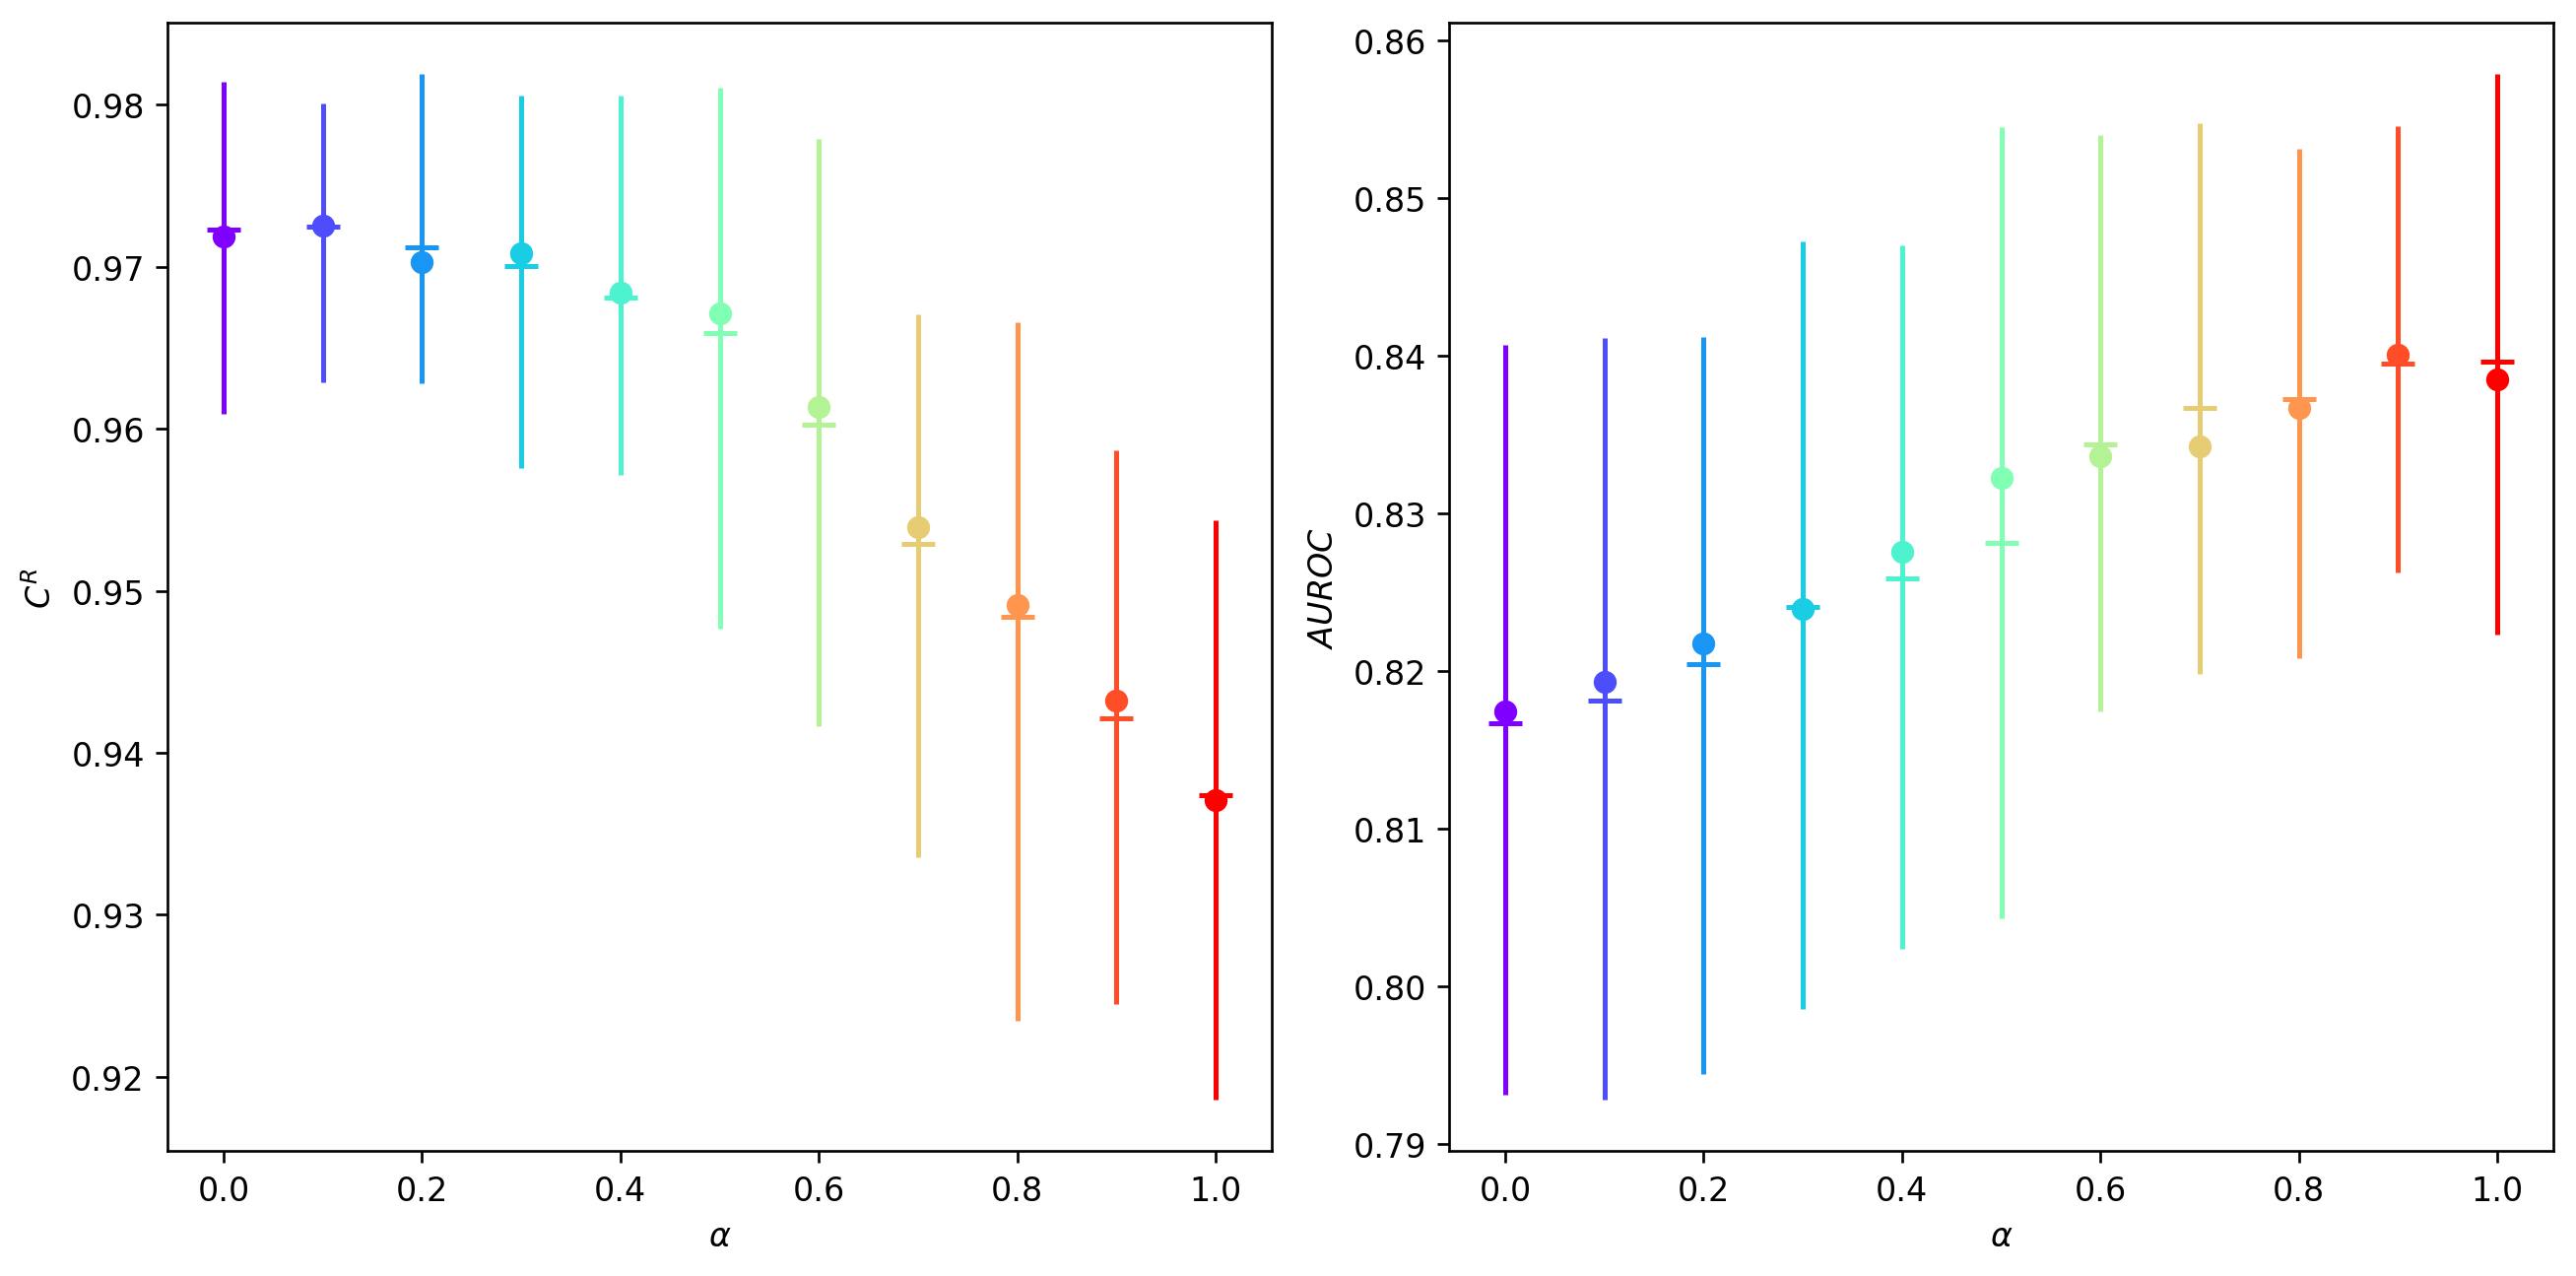

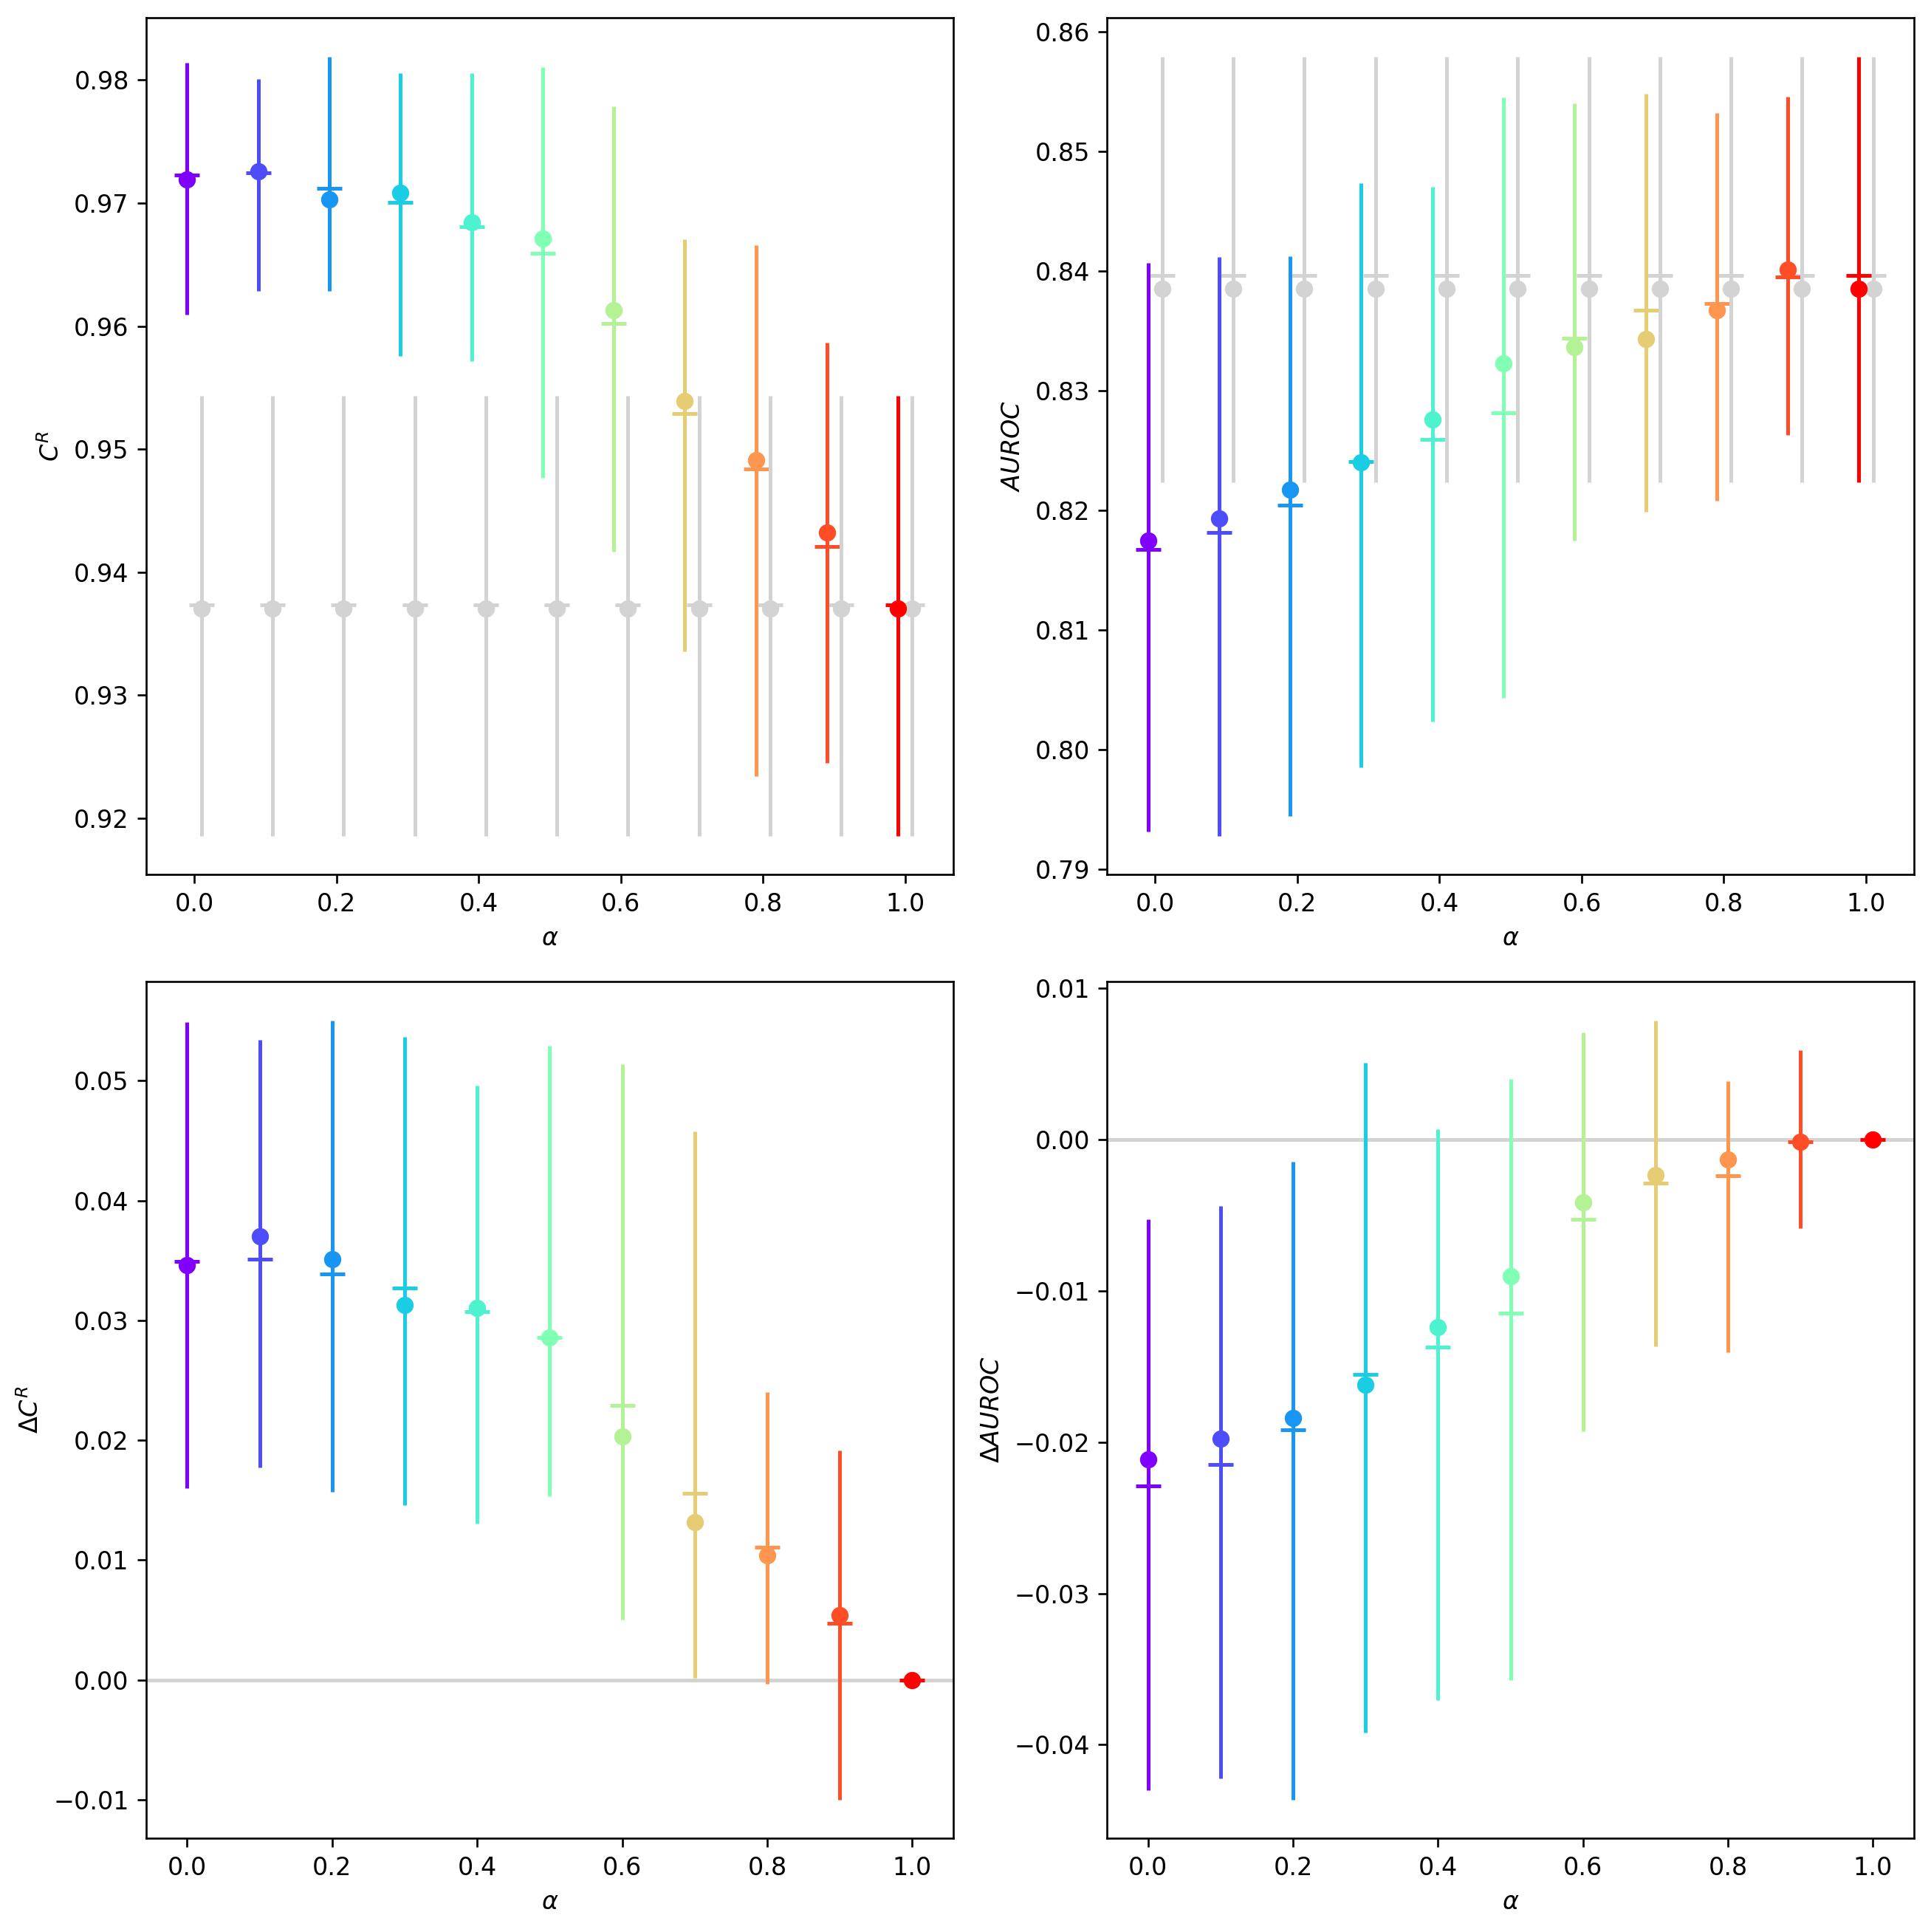

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(5.5*2,5.5*1), dpi=240)
for ax, column, display_name in zip(axs, 
                                    ['RBC(e)', 'AUROC(f_u,e)'], 
                                    [r'$C^R$', r'$AUROC$']):
    optimization_column = '{}_optimization'.format(column)
    selection_column = '{}_selection'.format(column)
    ua.get_ci_df(comparison_res_df, column=selection_column, ax=ax, x_eps=0.01, color_value=None, display_df=False)
    ua.get_ci_df(comparison_res_df, column=optimization_column, ax=ax, x_eps=-0.01, display_df=False)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()



fig, axs = plt.subplots(1, 2, figsize=(5.5*2,5.5*1), dpi=240)
for ax, column, display_name in zip(axs, 
                                    ['ΔRBC(e)', 'ΔAUROC(f_u,e)'], 
                                    [r'$\Delta C^R$', r'$\Delta AUROC$']):
    ua.get_ci_df(comparison_res_df, column=column, ax=ax)
    ax.set_ylabel(display_name)
    ax.axhline(0, color='lightgray', zorder=-1)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()



fig, axs = plt.subplots(1, 2, figsize=(5.5*2,5.5*1), dpi=240)
for ax, column, display_name in zip(axs, ['RBC(e)_optimization', 'AUROC(f_u,e)_optimization'], 
                                    [r'$C^R$', r'$AUROC$']):
    ua.get_ci_df(comparison_res_df, column=column, ax=ax)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()



fig, axs = plt.subplots(2, 2, figsize=(5.5*2,5.5*2), dpi=240)
for ax, column, display_name in zip(axs[0], 
                                    ['RBC(e)', 'AUROC(f_u,e)'], 
                                    [r'$C^R$', r'$AUROC$']):
    
    optimization_column = '{}_optimization'.format(column)
    selection_column = '{}_selection'.format(column)
    ua.get_ci_df(comparison_res_df, column=selection_column, ax=ax, x_eps=0.01, color_value=None, display_df=False)
    ua.get_ci_df(comparison_res_df, column=optimization_column, ax=ax, x_eps=-0.01, display_df=False)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')


for ax, column, display_name in zip(axs[1], ['ΔRBC(e)', 'ΔAUROC(f_u,e)'], [r'$\Delta C^R$', r'$\Delta AUROC$']):
    ua.get_ci_df(comparison_res_df, column=column, ax=ax, display_df=False)
    ax.axhline(0, color='lightgray', zorder=-1)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()

# compare selection (best AUROC) vs. optimized for same original and same alpha

In [41]:
ueAUROC_idxmax = selection_tradeoff_res_df.groupby('f_o_rep')['AUROC(f_u,ue)'].idxmax(axis=0)
ueAUROC_selection_res_df = selection_tradeoff_res_df.loc[ueAUROC_idxmax].copy(deep=True)
ueAUROC_selection_res_df = ueAUROC_selection_res_df[_keep_cols]
ueAUROC_selection_res_df = ueAUROC_selection_res_df.reset_index(drop=True)
ueAUROC_selection_res_df = ueAUROC_selection_res_df.sort_values(by=['f_o_rep'])
ueAUROC_selection_res_df = ueAUROC_selection_res_df.set_index(['f_o_rep'])
ueAUROC_selection_res_df

f_o_name  f_o_C  AUROC(f_o,od)  AUROC(f_o,oe)  AUROC(f_o,ud)  \
f_o_rep                                                                 
0               0  0.100       0.998638       0.777045       0.799334   
1               1  0.100       0.998161       0.777363       0.780375   
2               2  0.100       0.998394       0.787655       0.791258   
3               3  0.001       1.000000       0.741899       0.763926   
4               4  0.100       0.998258       0.808866       0.782290   
5               5  0.100       0.997901       0.757126       0.725063   
6               6  0.100       0.997505       0.824439       0.808177   
7               7  0.100       0.998588       0.759906       0.772941   
8               8  0.100       0.997491       0.805391       0.769805   
9               9  0.100       0.998520       0.776625       0.776120   
10             10  0.001       1.000000       0.785051       0.813446   
11             11  0.001       1.000000       0.816139       0.794207   
12             12  0.001       1.000000       0.770746       0.768362   
13             13  0.010       1.000000       0.736709       0.790717   
14             14  0.001       1.000000       0.788396       0.795861   
15             15  0.100       0.998611       0.810716       0.797108   
16             16  0.100       0.998150       0.771821       0.798922   
17             17  0.010       1.000000       0.790932       0.802398   
18             18  0.100       0.998559       0.787589       0.773344   
19             19  0.100       0.997584       0.769764       0.768877   
20             20  0.100       0.998245       0.779494       0.782925   
21             21  0.001       1.000000       0.811176       0.767198   
22             22  0.100       0.995848       0.810529       0.764400   
23             23  0.100       0.999336       0.786896       0.749206   
24             24  0.100       0.997424       0.760178       0.784012   
25             25  0.100       0.997465       0.750609       0.785096   
26             26  0.100       0.998540       0.868793       0.802778   
27             27  0.001       1.000000       0.782757       0.772548   
28             28  0.001       1.000000       0.792738       0.748452   
29             29  0.100       0.994888       0.775832       0.754891   
30             30  0.001       1.000000       0.818672       0.781631   
31             31  0.100       0.998155       0.798798       0.804843   
32             32  0.100       0.998282       0.767475       0.815317   
33             33  0.100       0.999632       0.829236       0.822859   
34             34  0.100       0.996911       0.791889       0.750950   
35             35  0.100       0.997855       0.764502       0.770023   
36             36  0.001       1.000000       0.822595       0.809573   
37             37  0.100       0.997930       0.855872       0.801393   
38             38  0.100       0.998547       0.799455       0.788483   
39             39  0.010       1.000000       0.813959       0.785515   

         AUROC(f_o,ue)  AUROC(f_o,e)     f_u_name  f_u_C  f_u_type  \
f_o_rep                                                              
0             0.782780      0.803810  00002_00000  0.001  standard   
1             0.774878      0.805181  00004_00000  0.001  standard   
2             0.786571      0.807951  00001_00001  0.010  standard   
3             0.763404      0.752700  00004_00001  0.010  standard   
4             0.778845      0.786602  00003_00000  0.001  standard   
5             0.793238      0.745133  00007_00001  0.010  standard   
6             0.800282      0.809694  00002_00000  0.001  standard   
7             0.795593      0.787582  00001_00000  0.001  standard   
8             0.809206      0.799839  00004_00001  0.010  standard   
9             0.769211      0.798332  00003_00002  0.100  standard   
10            0.818591      0.801436  00003_00001  0.010  standard   
11            0.793448      0.78

In [42]:
comparison_res_df = optimization_res_df.join(ueAUROC_selection_res_df, 
                                             lsuffix='_optimization', rsuffix='_selection')

for c in ['RBC(e)', 'AUROC(f_u,e)']:
    comparison_res_df['Δ{}'.format(c)] = \
    comparison_res_df['{}_optimization'.format(c)] - comparison_res_df['{}_selection'.format(c)]

comparison_res_df

f_o_name_optimization  f_o_C_optimization  \
f_o_rep f_u_alpha                                              
0       0.0                            0                0.10   
        0.1                            0                0.10   
        0.2                            0                0.10   
        0.3                            0                0.10   
        0.4                            0                0.10   
...                                  ...                 ...   
39      0.6                           39                0.01   
        0.7                           39                0.01   
        0.8                           39                0.01   
        0.9                           39                0.01   
        1.0                           39                0.01   

                   AUROC(f_o,od)_optimization  AUROC(f_o,oe)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.998638                    0.777045   
        0.1                          0.998638                    0.777045   
        0.2                          0.998638                    0.777045   
        0.3                          0.998638                    0.777045   
        0.4                          0.998638                    0.777045   
...                                       ...                         ...   
39      0.6                          1.000000                    0.813959   
        0.7                          1.000000                    0.813959   
        0.8                          1.000000                    0.813959   
        0.9                          1.000000                    0.813959   
        1.0                          1.000000                    0.813959   

                   AUROC(f_o,ud)_optimization  AUROC(f_o,ue)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.799334                    0.782780   
        0.1                          0.799334                    0.782780   
        0.2                          0.799334                    0.782780   
        0.3                          0.799334                    0.782780   
        0.4                          0.799334                    0.782780   
...                                       ...                         ...   
39      0.6                          0.785515                    0.772631   
        0.7                          0.785515                    0.772631   
        0.8                          0.785515                    0.772631   
        0.9                          0.785515                    0.772631   
        1.0                          0.785515                    0.772631   

                   AUROC(f_o,e)_optimization f_u_name_optimization  \
f_o_rep f_u_alpha                                                    
0       0.0                          0.80381           00000_00011   
        0.1                          0.80381           00000_00001   
        0.2                          0.80381           00000_00002   
        0.3                          0.80381           00000_00014   
        0.4                          0.80381           00000_00015   
...                                      ...                   ...   
39      0.6                          0.77089           00000_00006   
        0.7                          0.77089           00000_00007   
        0.8                          0.77089           00000_00008   
        0.9                          0.77089           00000_00009   
        1.0                          0.77089           00000_00010   

                   f_u_C_optimization f_u_type_optimization  ...  \
f_o_rep f_u_alpha                                            ...   
0       0.0                     0.010            engineered  ...   
        0.1                     0.001            engineered  ...   

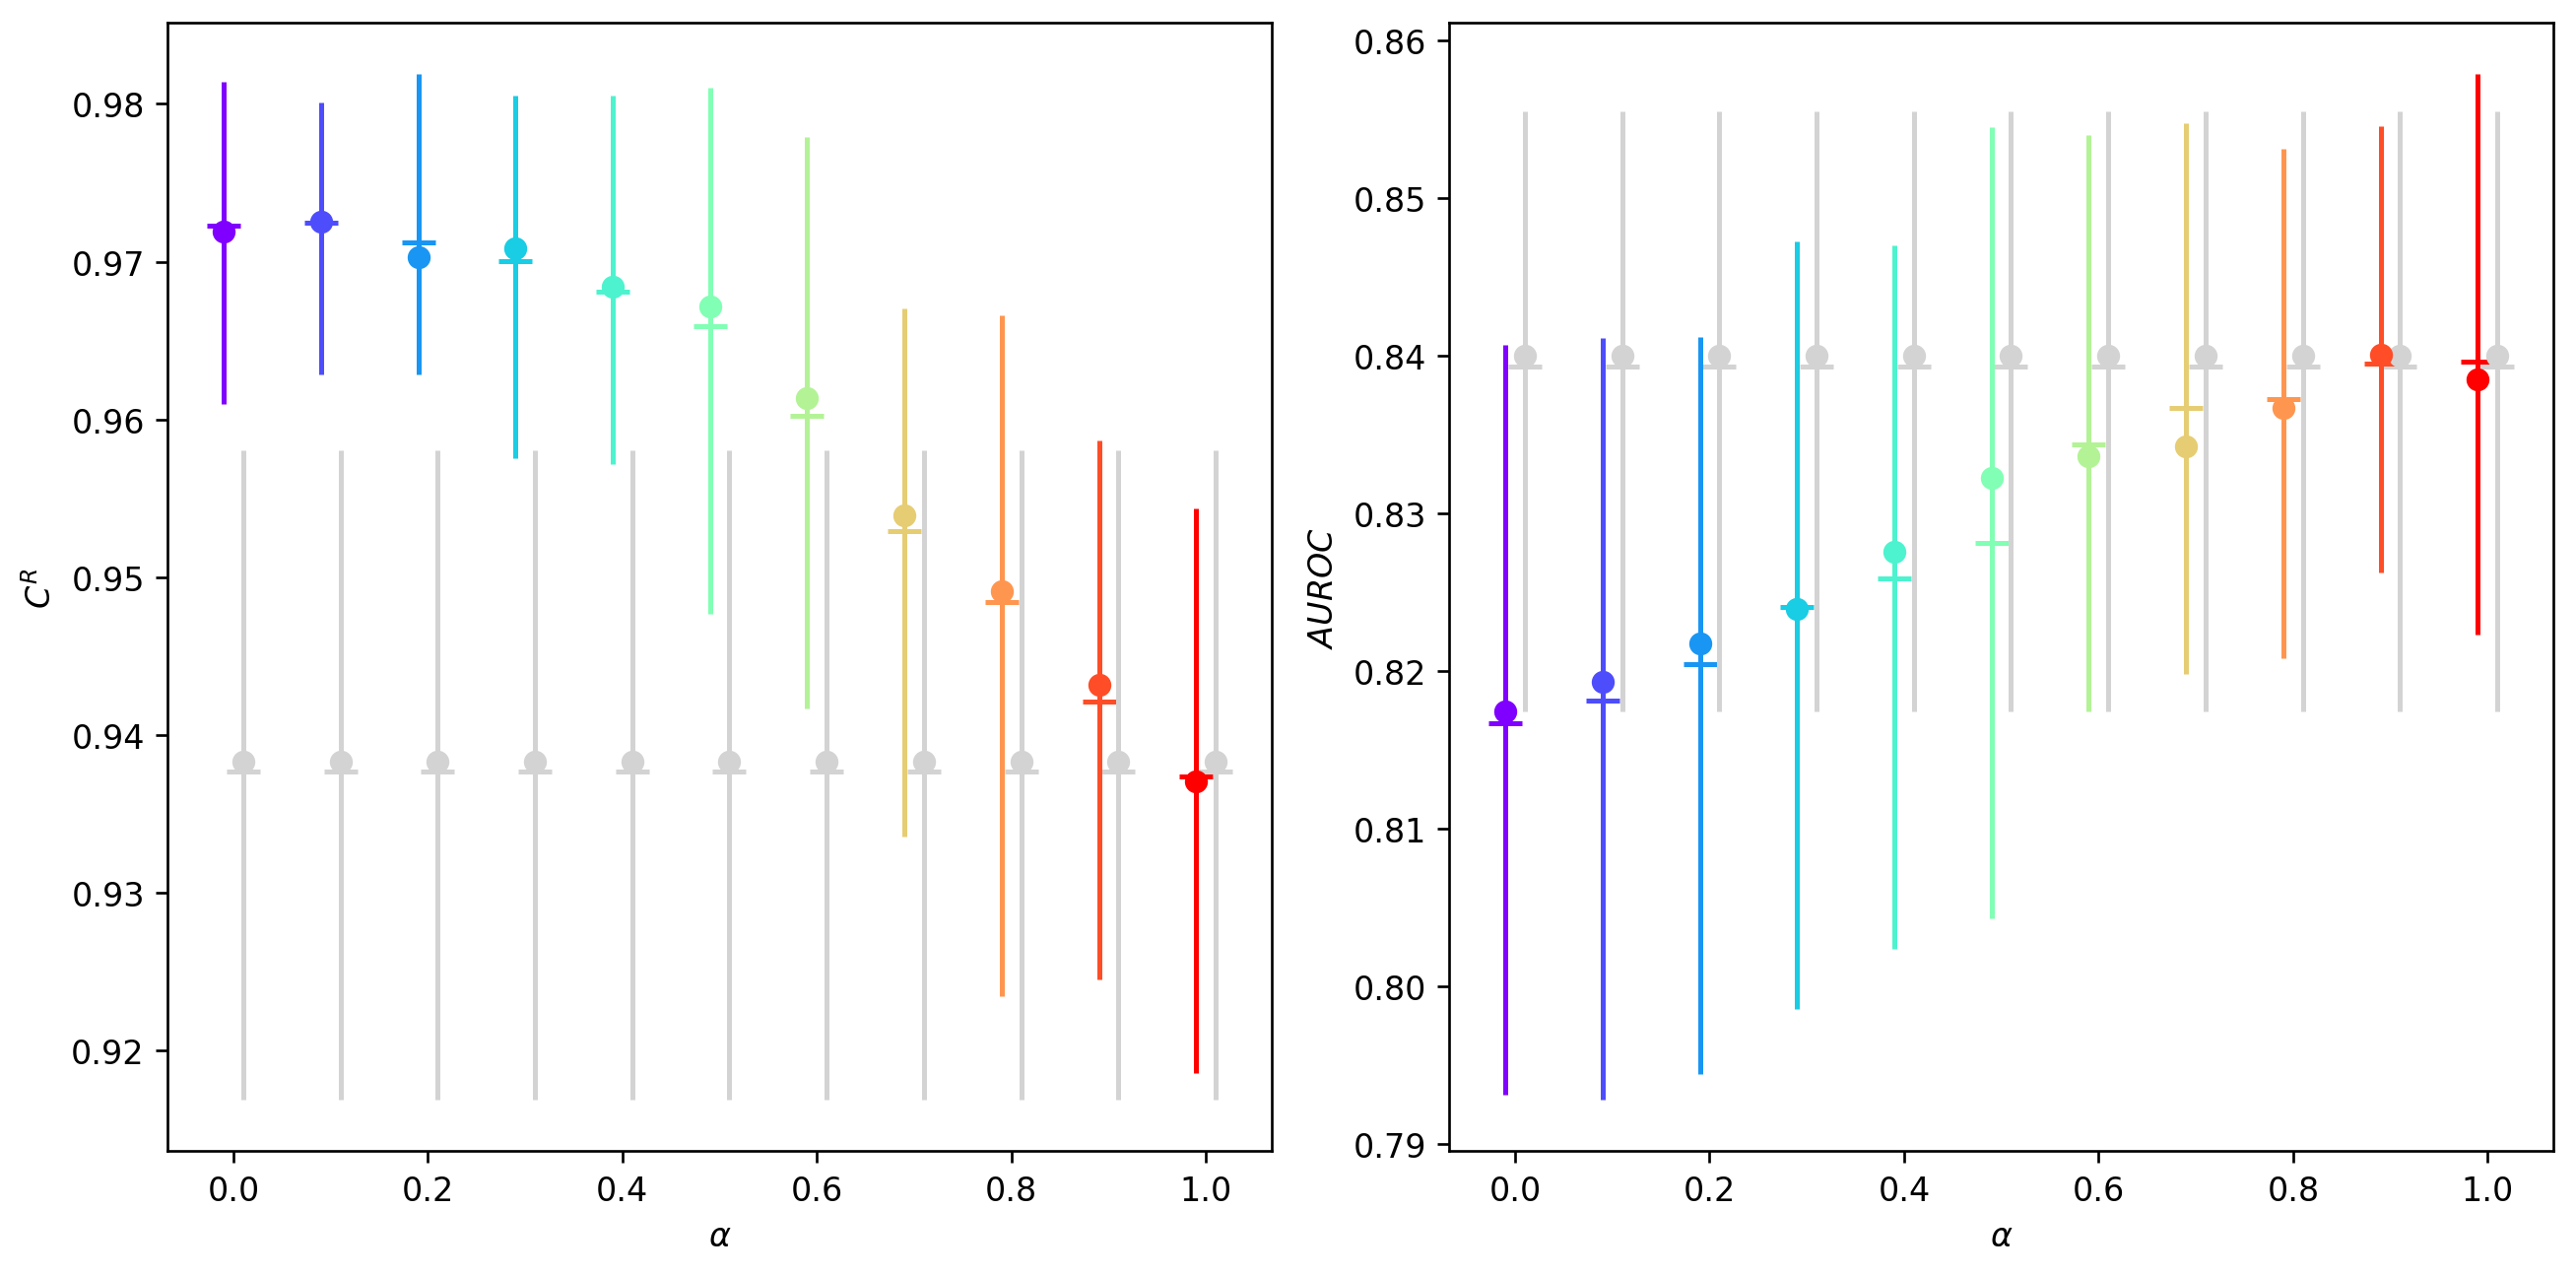

f_u_alpha            0.0        0.1        0.2        0.3        0.4  \
ΔRBC(e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
        mean    0.034581   0.034791   0.033517   0.032351   0.030412   
        std     0.014453   0.013281   0.013810   0.014047   0.014020   
        min     0.006562   0.003790   0.005181   0.009697   0.003892   
        2.5%    0.016776   0.014493   0.008042   0.012387   0.008156   
        50%     0.030587   0.032638   0.030765   0.028486   0.028129   
        97.5%   0.062676   0.061396   0.062882   0.062978   0.058066   
        max     0.066492   0.063038   0.066040   0.067828   0.065938   

f_u_alpha            0.5        0.6        0.7        0.8        0.9  \
ΔRBC(e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
        mean    0.028221   0.022539   0.015212   0.010707   0.004414   
        std     0.013918   0.013327   0.012554   0.011102   0.006912   
        min     0.006236  -0.002592  -0.008539  -0.009642  -0.010846   
        2.5%    0.008378   0.006212  -0.005599  -0.002523  -0.010818   
        50%     0.024729   0.020478   0.012535   0.008430   0.004879   
        97.5%   0.058492   0.052703   0.040430   0.038621   0.016243   
        max     0.064820   0.064541   0.064484   0.041142   0.016729   

f_u_alpha            1.0  
ΔRBC(e) count  40.000000  
        mean   -0.000331  
        std     0.009023  
        min    -0.018041  
        2.5%   -0.016826  
        50%    -0.000366  
        97.5%   0.016780  
        max     0.022814

f_u_alpha                  0.0        0.1        0.2        0.3        0.4  \
ΔAUROC(f_u,e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
              mean   -0.022650  -0.021232  -0.018923  -0.015272  -0.013471   
              std     0.011025   0.011561   0.010195   0.009592   0.009500   
              min    -0.045804  -0.057708  -0.044500  -0.039490  -0.039707   
              2.5%   -0.044132  -0.042462  -0.040865  -0.039375  -0.036766   
              50%    -0.021293  -0.017785  -0.018474  -0.014217  -0.010260   
              97.5%  -0.004240  -0.006641  -0.000421   0.000334  -0.001199   
              max    -0.002211  -0.000708  -0.000045   0.000405  -0.000072   

f_u_alpha                  0.5        0.6        0.7        0.8        0.9  \
ΔAUROC(f_u,e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
              mean   -0.011199  -0.004996  -0.002633  -0.002119   0.000136   
              std     0.010418   0.007170   0.006006   0.005600   0.004389   
              min    -0.042720  -0.027159  -0.018575  -0.016442  -0.006512   
              2.5%   -0.035422  -0.017391  -0.015052  -0.015629  -0.006348   
              50%    -0.007806  -0.003511  -0.002418  -0.001891  -0.000724   
              97.5%   0.004167   0.004888   0.007974   0.008089   0.010904   
              max     0.006770   0.007337   0.008269   0.009106   0.011393   

f_u_alpha                  1.0  
ΔAUROC(f_u,e) count  40.000000  
              mean    0.000266  
              std     0.005247  
              min    -0.008839  
              2.5%   -0.007541  
              50%     0.000010  
              97.5%   0.010737  
              max     0.014065

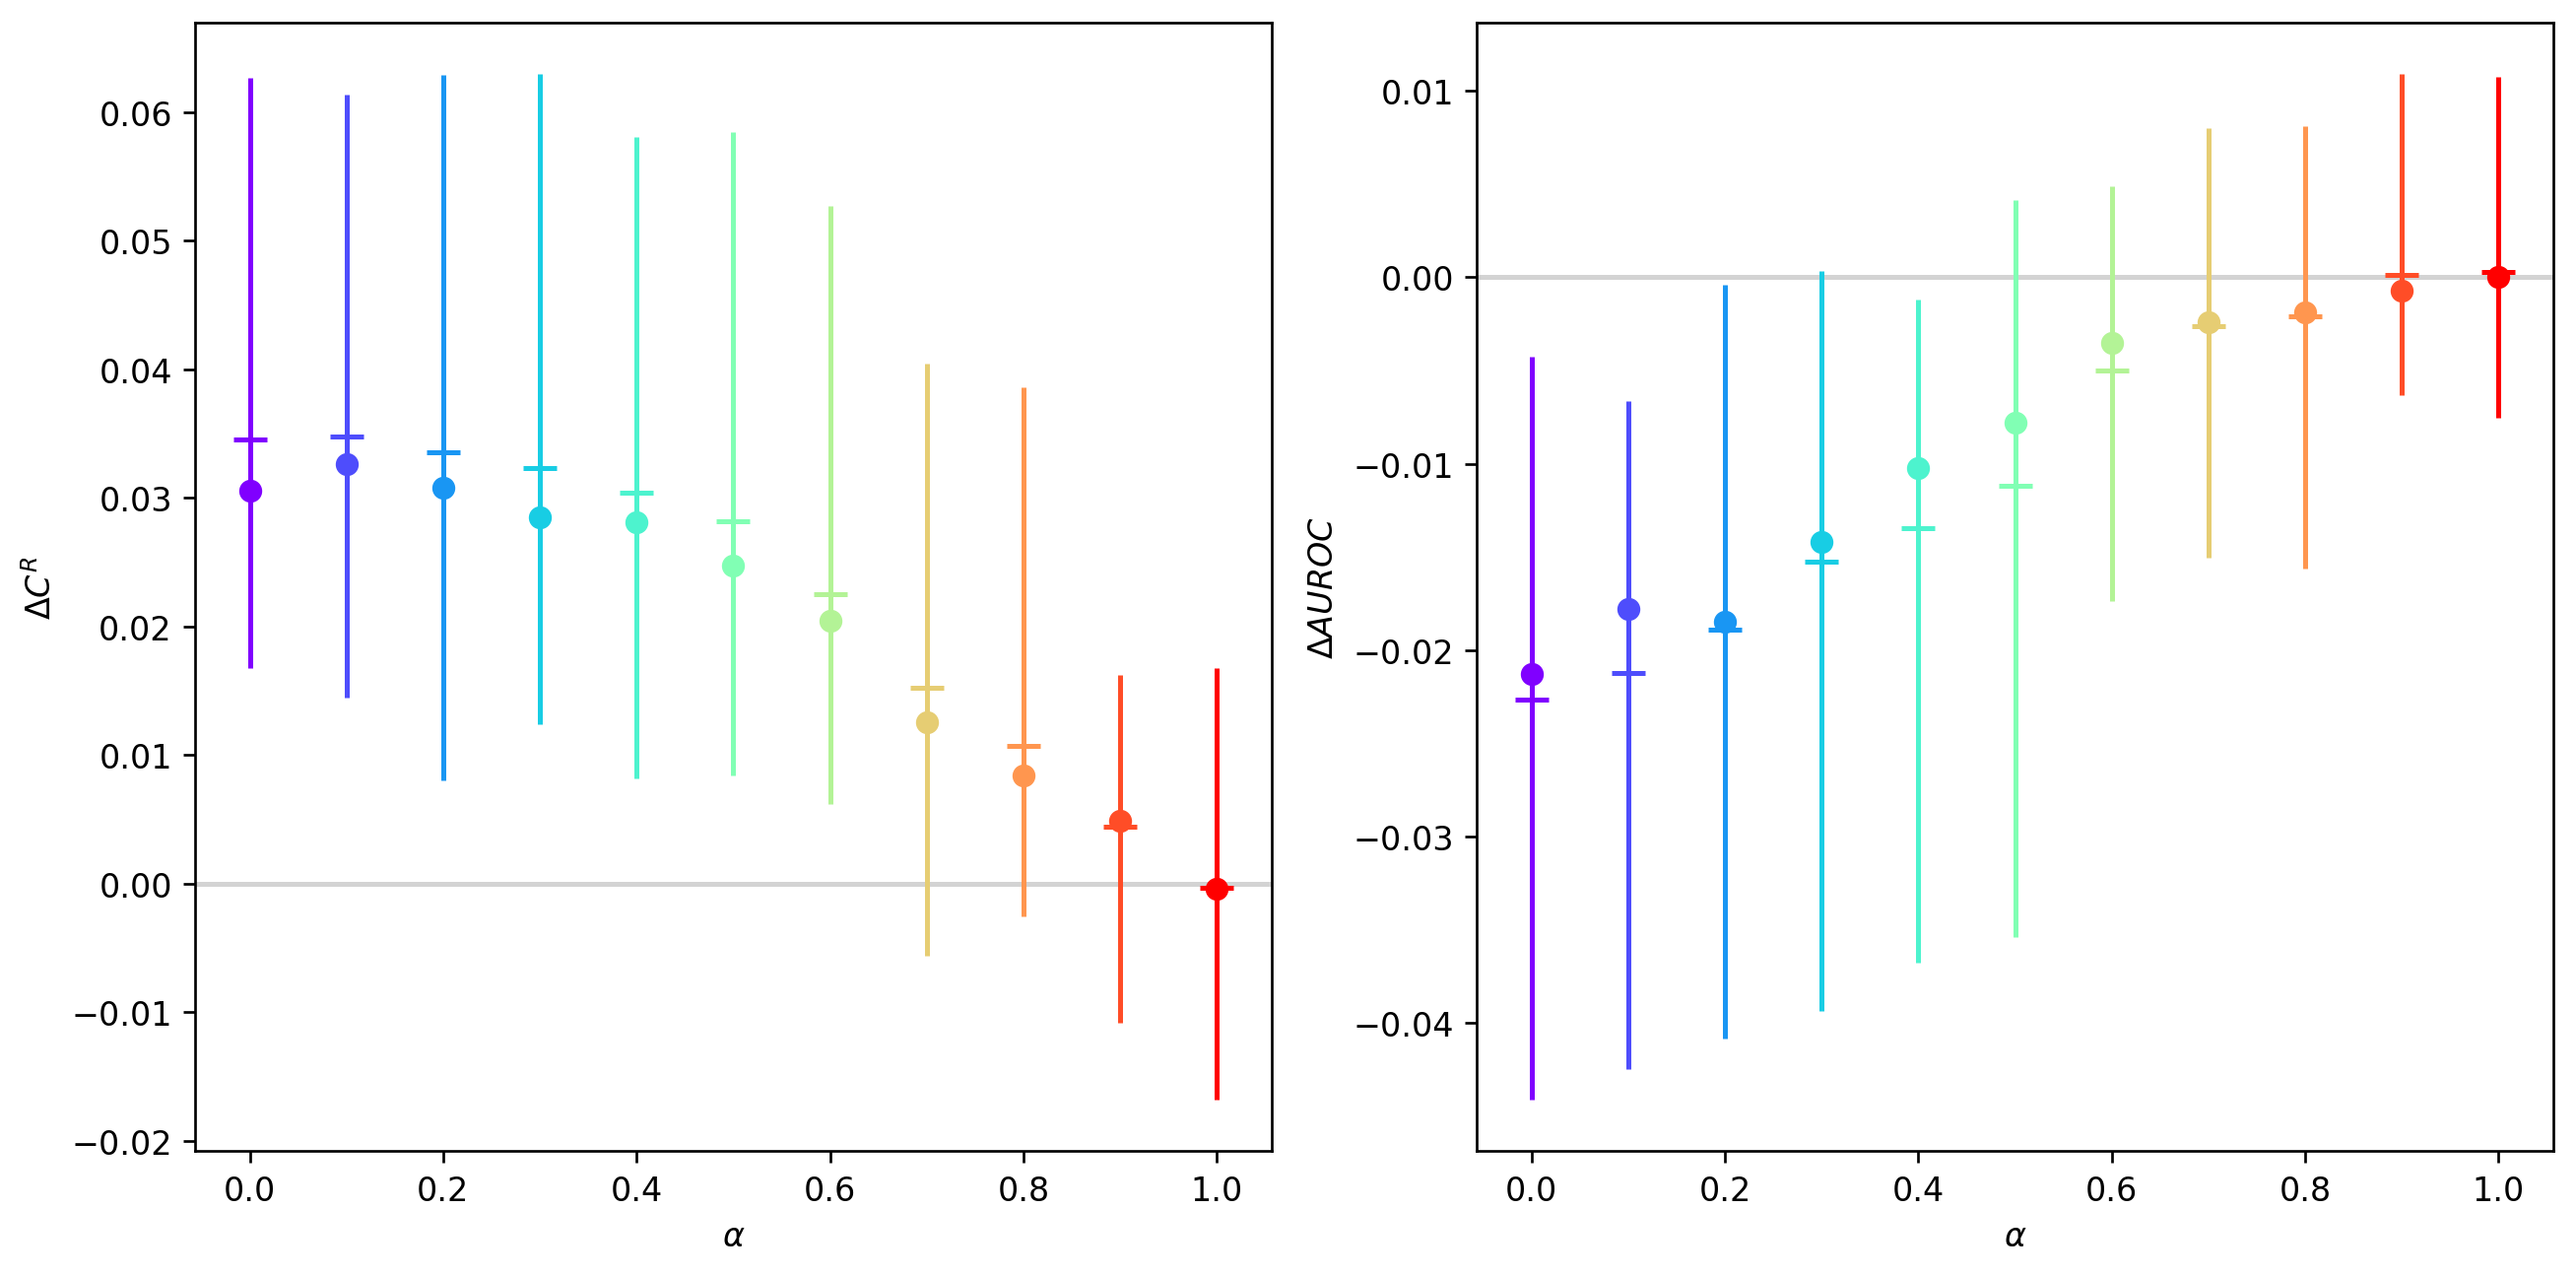

f_u_alpha                        0.0        0.1        0.2        0.3  \
RBC(e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                    mean    0.972274   0.972483   0.971209   0.970043   
                    std     0.006370   0.005455   0.005952   0.006829   
                    min     0.958983   0.962189   0.960454   0.953558   
                    2.5%    0.960949   0.962837   0.962830   0.957563   
                    50%     0.971895   0.972553   0.970272   0.970855   
                    97.5%   0.981397   0.980106   0.981901   0.980536   
                    max     0.983391   0.982538   0.982939   0.984727   

f_u_alpha                        0.4        0.5        0.6        0.7  \
RBC(e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                    mean    0.968104   0.965913   0.960232   0.952904   
                    std     0.006106   0.008962   0.010536   0.009718   
                    min     0.956265   0.946390   0.935005   0.929268   
                    2.5%    0.957163   0.947677   0.941661   0.933554   
                    50%     0.968415   0.967139   0.961325   0.953904   
                    97.5%   0.980548   0.981029   0.977891   0.967046   
                    max     0.982837   0.981719   0.981440   0.981383   

f_u_alpha                        0.8        0.9        1.0  
RBC(e)_optimization count  40.000000  40.000000  40.000000  
                    mean    0.948399   0.942107   0.937361  
                    std     0.011584   0.010002   0.010671  
                    min     0.922875   0.923155   0.912852  
                    2.5%    0.923441   0.924508   0.918569  
                    50%     0.949123   0.943198   0.937066  
                    97.5%   0.966580   0.958684   0.954322  
                    max     0.968048   0.959288   0.958901

f_u_alpha                              0.0        0.1        0.2        0.3  \
AUROC(f_u,e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                          mean    0.816714   0.818132   0.820441   0.824092   
                          std     0.014069   0.014573   0.013384   0.013818   
                          min     0.791153   0.778986   0.792824   0.797835   
                          2.5%    0.793164   0.792804   0.794458   0.798550   
                          50%     0.817473   0.819301   0.821742   0.823979   
                          97.5%   0.840683   0.841165   0.841222   0.847303   
                          max     0.844287   0.842456   0.843249   0.850453   

f_u_alpha                              0.4        0.5        0.6        0.7  \
AUROC(f_u,e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                          mean    0.825893   0.828164   0.834368   0.836731   
                          std     0.013587   0.013846   0.010328   0.010220   
                          min     0.797617   0.794605   0.811353   0.819706   
                          2.5%    0.802376   0.804327   0.817457   0.819844   
                          50%     0.827582   0.832292   0.833631   0.834283   
                          97.5%   0.847008   0.854510   0.853997   0.854773   
                          max     0.848892   0.856890   0.854516   0.856216   

f_u_alpha                              0.8        0.9        1.0  
AUROC(f_u,e)_optimization count  40.000000  40.000000  40.000000  
                          mean    0.837245   0.839500   0.839630  
                          std     0.009713   0.008958   0.008799  
                          min     0.818429   0.817770   0.818552  
                          2.5%    0.820821   0.826270   0.822317  
                          50%     0.836734   0.840112   0.838511  
                          97.5%   0.853165   0.854573   0.857899  
                          max     0.854179   0.854940   0.861862

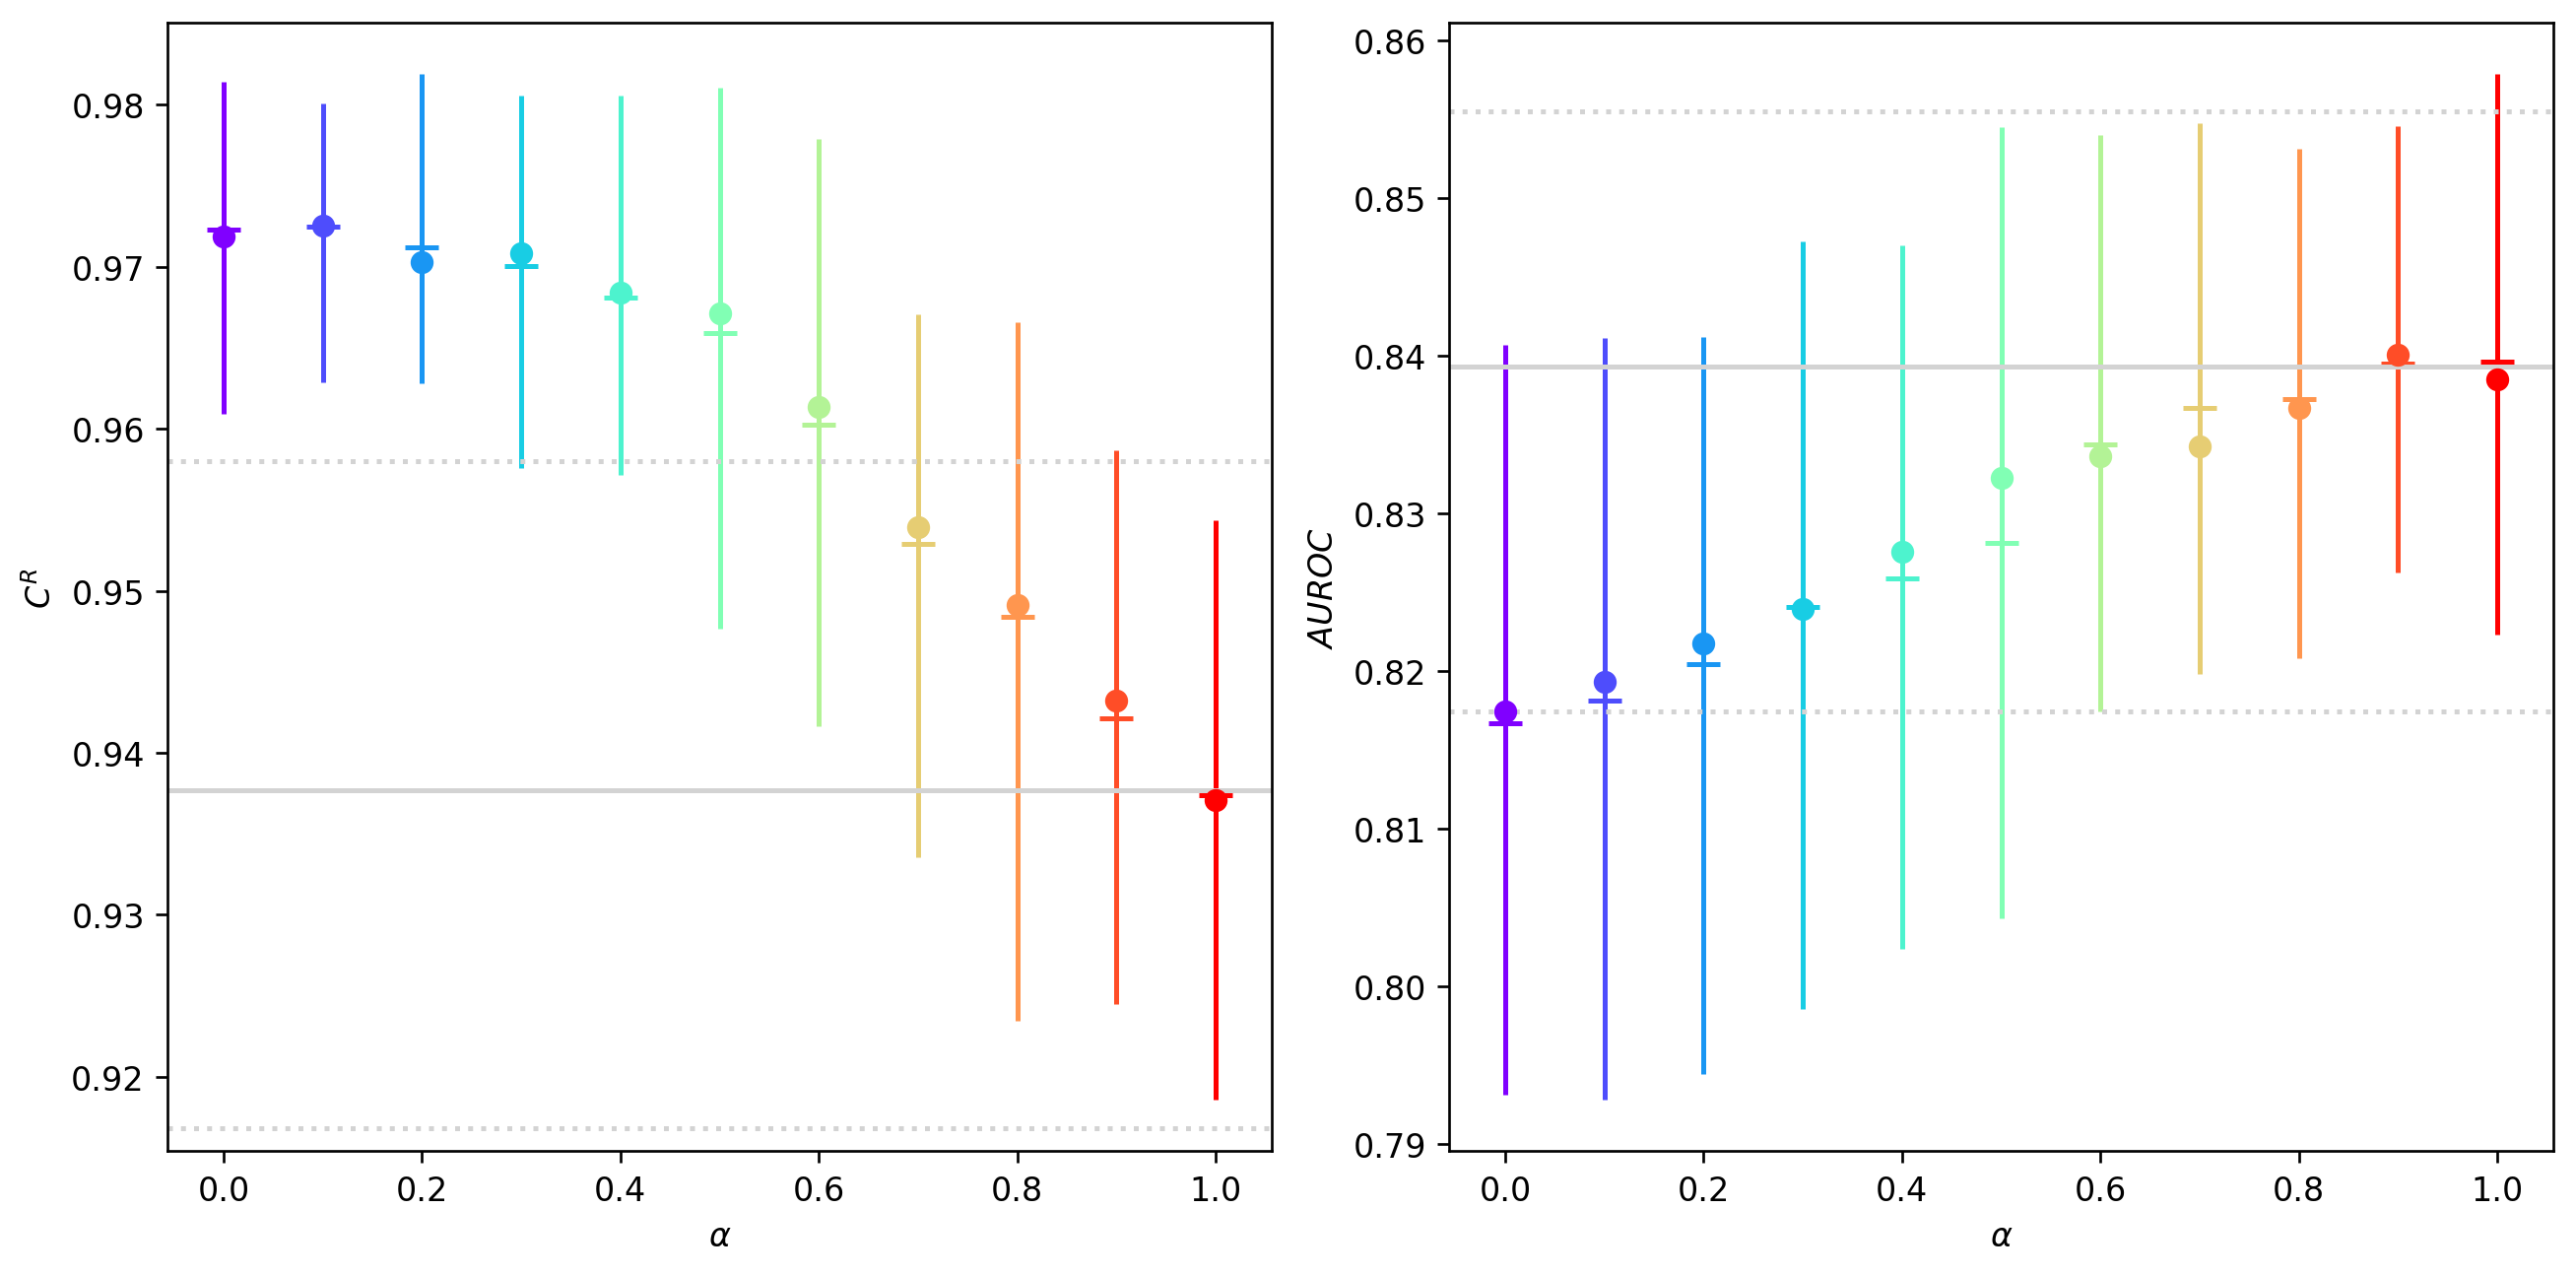

f_u_alpha                     0.0        0.1        0.2        0.3        0.4  \
RBC(e)_selection count  40.000000  40.000000  40.000000  40.000000  40.000000   
                 mean    0.937692   0.937692   0.937692   0.937692   0.937692   
                 std     0.011499   0.011499   0.011499   0.011499   0.011499   
                 min     0.914823   0.914823   0.914823   0.914823   0.914823   
                 2.5%    0.916847   0.916847   0.916847   0.916847   0.916847   
                 50%     0.938292   0.938292   0.938292   0.938292   0.938292   
                 97.5%   0.958017   0.958017   0.958017   0.958017   0.958017   
                 max     0.960691   0.960691   0.960691   0.960691   0.960691   

f_u_alpha                     0.5        0.6        0.7        0.8        0.9  \
RBC(e)_selection count  40.000000  40.000000  40.000000  40.000000  40.000000   
                 mean    0.937692   0.937692   0.937692   0.937692   0.937692   
                 std     0.011499   0.011499   0.011499   0.011499   0.011499   
                 min     0.914823   0.914823   0.914823   0.914823   0.914823   
                 2.5%    0.916847   0.916847   0.916847   0.916847   0.916847   
                 50%     0.938292   0.938292   0.938292   0.938292   0.938292   
                 97.5%   0.958017   0.958017   0.958017   0.958017   0.958017   
                 max     0.960691   0.960691   0.960691   0.960691   0.960691   

f_u_alpha                     1.0  
RBC(e)_selection count  40.000000  
                 mean    0.937692  
                 std     0.011499  
                 min     0.914823  
                 2.5%    0.916847  
                 50%     0.938292  
                 97.5%   0.958017  
                 max     0.960691

f_u_alpha                        0.0        0.1        0.2        0.3  \
RBC(e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                    mean    0.972274   0.972483   0.971209   0.970043   
                    std     0.006370   0.005455   0.005952   0.006829   
                    min     0.958983   0.962189   0.960454   0.953558   
                    2.5%    0.960949   0.962837   0.962830   0.957563   
                    50%     0.971895   0.972553   0.970272   0.970855   
                    97.5%   0.981397   0.980106   0.981901   0.980536   
                    max     0.983391   0.982538   0.982939   0.984727   

f_u_alpha                        0.4        0.5        0.6        0.7  \
RBC(e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                    mean    0.968104   0.965913   0.960232   0.952904   
                    std     0.006106   0.008962   0.010536   0.009718   
                    min     0.956265   0.946390   0.935005   0.929268   
                    2.5%    0.957163   0.947677   0.941661   0.933554   
                    50%     0.968415   0.967139   0.961325   0.953904   
                    97.5%   0.980548   0.981029   0.977891   0.967046   
                    max     0.982837   0.981719   0.981440   0.981383   

f_u_alpha                        0.8        0.9        1.0  
RBC(e)_optimization count  40.000000  40.000000  40.000000  
                    mean    0.948399   0.942107   0.937361  
                    std     0.011584   0.010002   0.010671  
                    min     0.922875   0.923155   0.912852  
                    2.5%    0.923441   0.924508   0.918569  
                    50%     0.949123   0.943198   0.937066  
                    97.5%   0.966580   0.958684   0.954322  
                    max     0.968048   0.959288   0.958901

f_u_alpha                           0.0        0.1        0.2        0.3  \
AUROC(f_u,e)_selection count  40.000000  40.000000  40.000000  40.000000   
                       mean    0.839364   0.839364   0.839364   0.839364   
                       std     0.009733   0.009733   0.009733   0.009733   
                       min     0.815357   0.815357   0.815357   0.815357   
                       2.5%    0.817459   0.817459   0.817459   0.817459   
                       50%     0.840017   0.840017   0.840017   0.840017   
                       97.5%   0.855520   0.855520   0.855520   0.855520   
                       max     0.857958   0.857958   0.857958   0.857958   

f_u_alpha                           0.4        0.5        0.6        0.7  \
AUROC(f_u,e)_selection count  40.000000  40.000000  40.000000  40.000000   
                       mean    0.839364   0.839364   0.839364   0.839364   
                       std     0.009733   0.009733   0.009733   0.009733   
                       min     0.815357   0.815357   0.815357   0.815357   
                       2.5%    0.817459   0.817459   0.817459   0.817459   
                       50%     0.840017   0.840017   0.840017   0.840017   
                       97.5%   0.855520   0.855520   0.855520   0.855520   
                       max     0.857958   0.857958   0.857958   0.857958   

f_u_alpha                           0.8        0.9        1.0  
AUROC(f_u,e)_selection count  40.000000  40.000000  40.000000  
                       mean    0.839364   0.839364   0.839364  
                       std     0.009733   0.009733   0.009733  
                       min     0.815357   0.815357   0.815357  
                       2.5%    0.817459   0.817459   0.817459  
                       50%     0.840017   0.840017   0.840017  
                       97.5%   0.855520   0.855520   0.855520  
                       max     0.857958   0.857958   0.857958

f_u_alpha                              0.0        0.1        0.2        0.3  \
AUROC(f_u,e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                          mean    0.816714   0.818132   0.820441   0.824092   
                          std     0.014069   0.014573   0.013384   0.013818   
                          min     0.791153   0.778986   0.792824   0.797835   
                          2.5%    0.793164   0.792804   0.794458   0.798550   
                          50%     0.817473   0.819301   0.821742   0.823979   
                          97.5%   0.840683   0.841165   0.841222   0.847303   
                          max     0.844287   0.842456   0.843249   0.850453   

f_u_alpha                              0.4        0.5        0.6        0.7  \
AUROC(f_u,e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                          mean    0.825893   0.828164   0.834368   0.836731   
                          std     0.013587   0.013846   0.010328   0.010220   
                          min     0.797617   0.794605   0.811353   0.819706   
                          2.5%    0.802376   0.804327   0.817457   0.819844   
                          50%     0.827582   0.832292   0.833631   0.834283   
                          97.5%   0.847008   0.854510   0.853997   0.854773   
                          max     0.848892   0.856890   0.854516   0.856216   

f_u_alpha                              0.8        0.9        1.0  
AUROC(f_u,e)_optimization count  40.000000  40.000000  40.000000  
                          mean    0.837245   0.839500   0.839630  
                          std     0.009713   0.008958   0.008799  
                          min     0.818429   0.817770   0.818552  
                          2.5%    0.820821   0.826270   0.822317  
                          50%     0.836734   0.840112   0.838511  
                          97.5%   0.853165   0.854573   0.857899  
                          max     0.854179   0.854940   0.861862

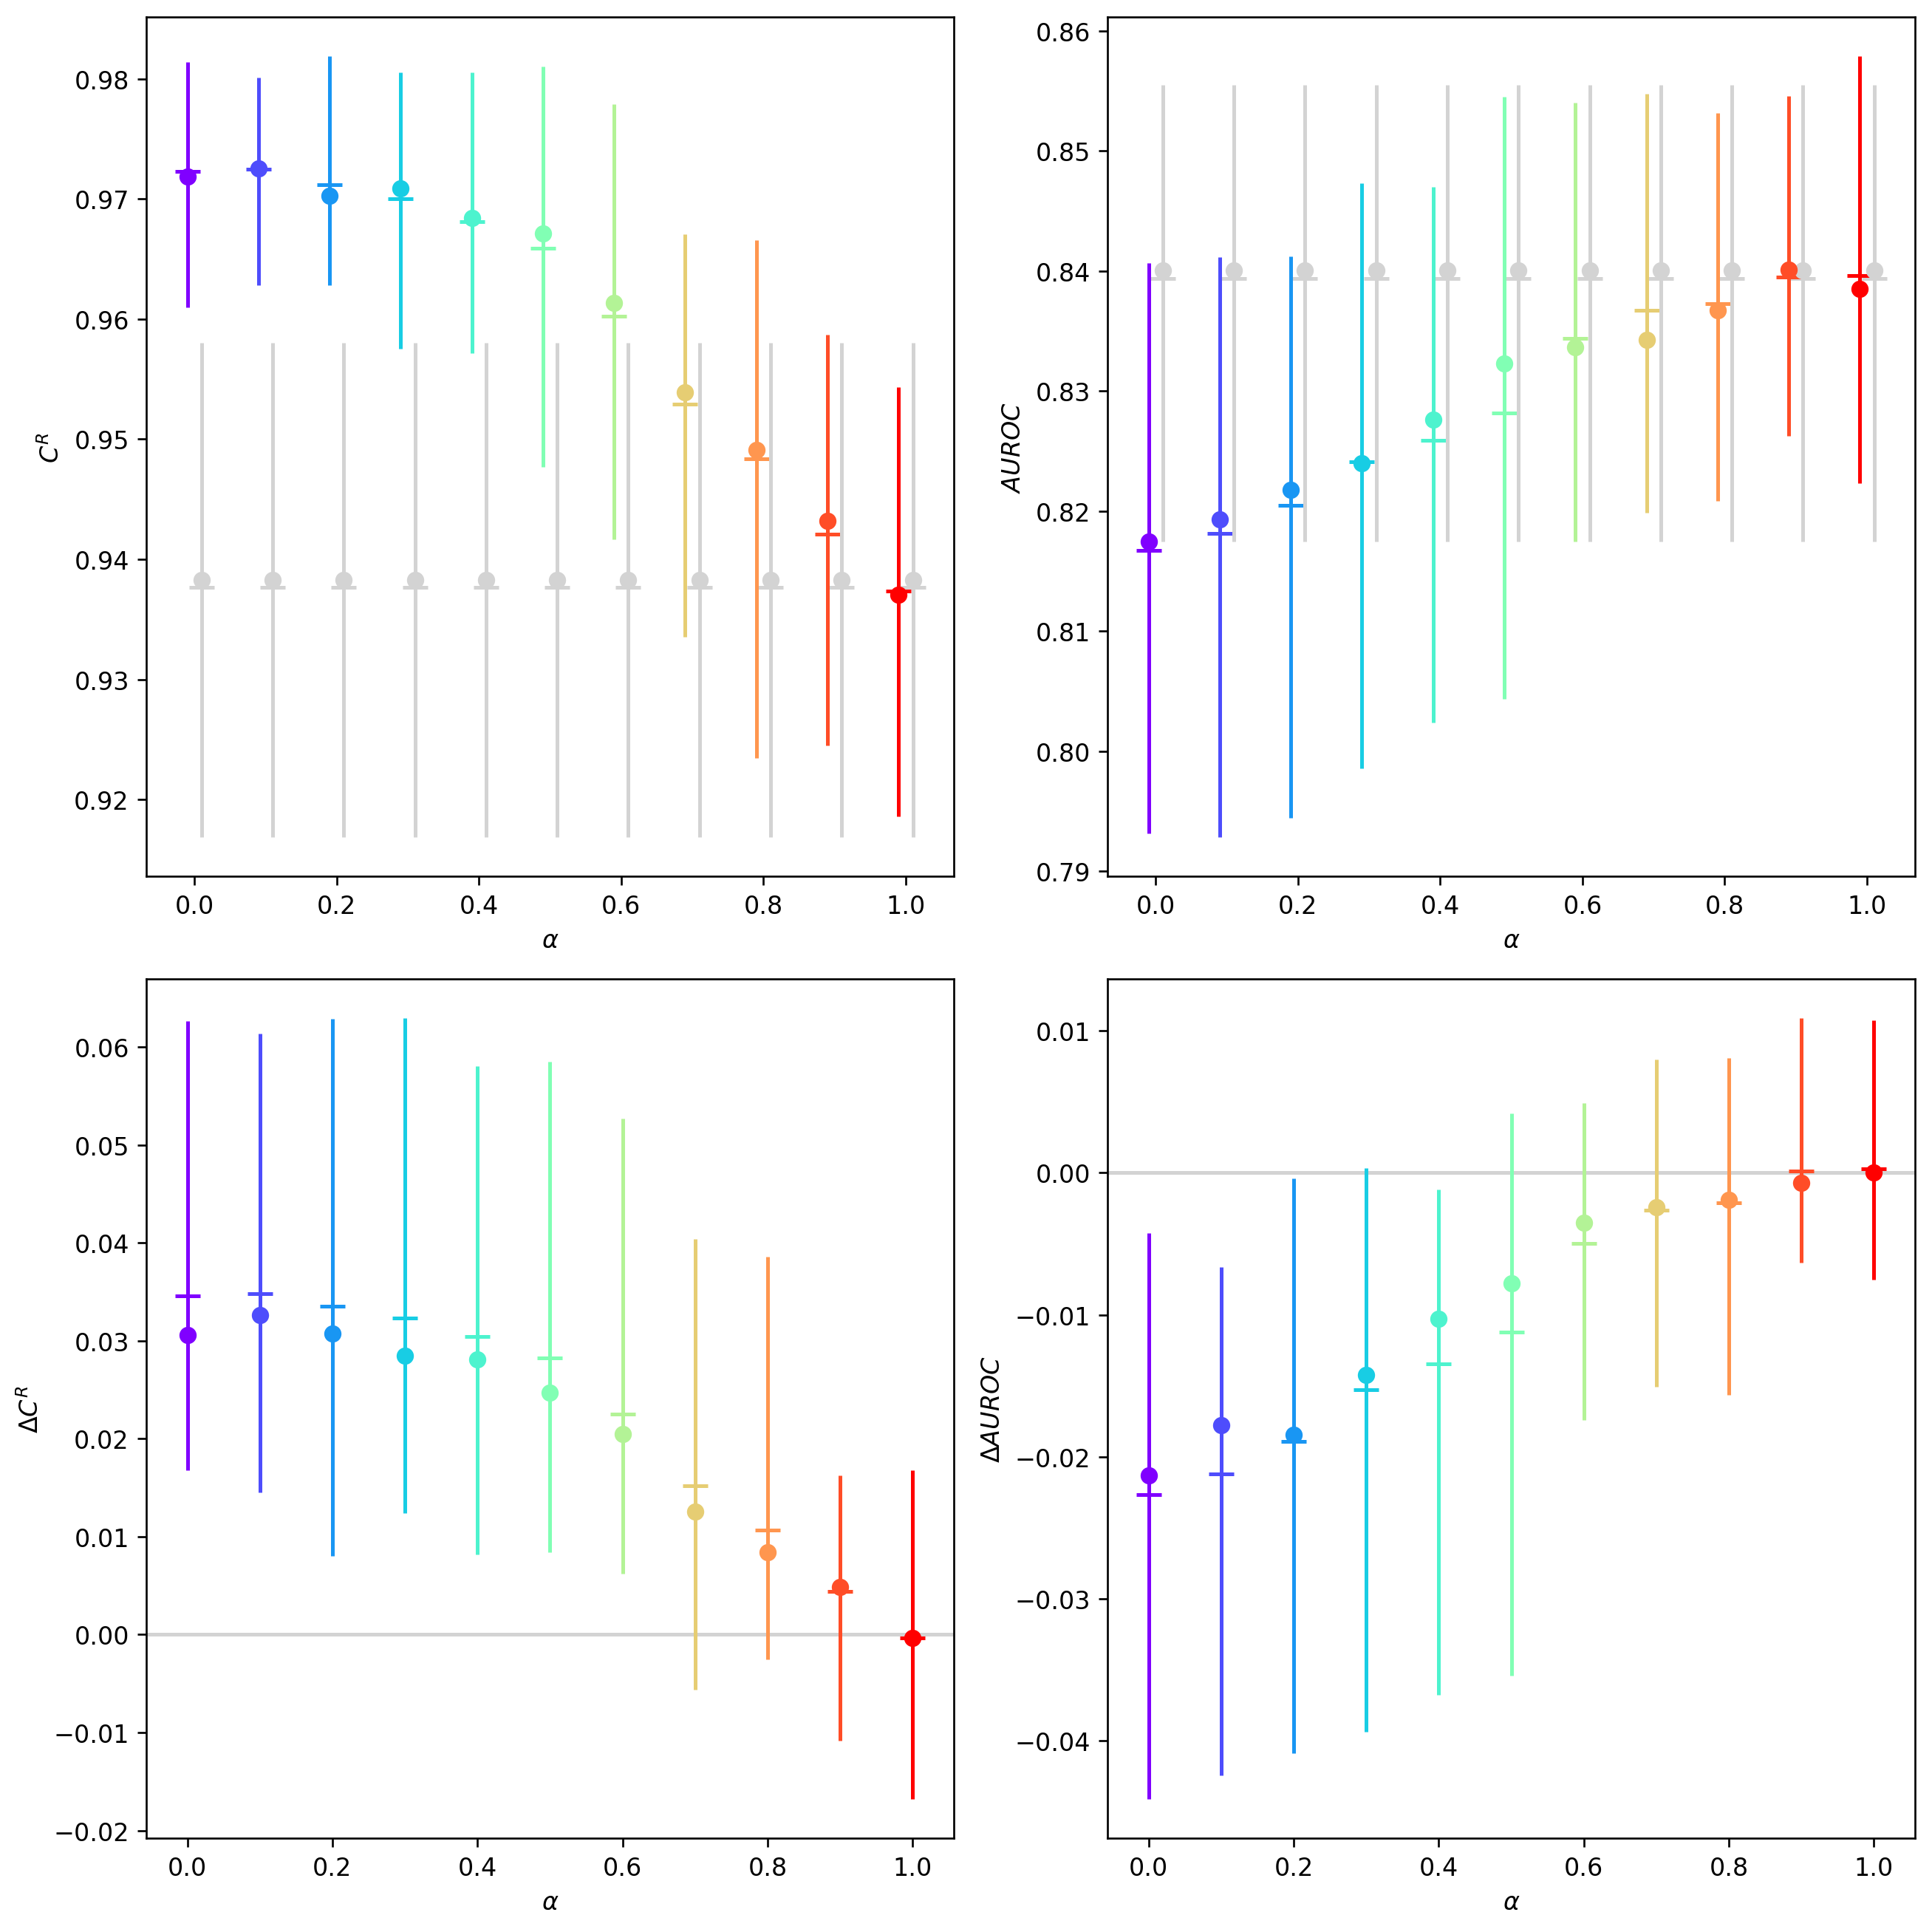

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(5.5*2,5.5*1), dpi=240)
for ax, column, display_name in zip(axs, ['RBC(e)', 'AUROC(f_u,e)'], [r'$C^R$', r'$AUROC$']):
    optimization_column = '{}_optimization'.format(column)
    selection_column = '{}_selection'.format(column)
    ua.get_ci_df(comparison_res_df, column=selection_column, ax=ax, x_eps=0.01, color_value=None, display_df=False)
    ua.get_ci_df(comparison_res_df, column=optimization_column, ax=ax, x_eps=-0.01, display_df=False)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(5.5*2,5.5*1), dpi=240)
for ax, column, display_name in zip(axs, ['ΔRBC(e)', 'ΔAUROC(f_u,e)'], [r'$\Delta C^R$', r'$\Delta AUROC$']):
    ua.get_ci_df(comparison_res_df, column=column, ax=ax)
    ax.set_ylabel(display_name)
    ax.axhline(0, color='lightgray', zorder=-1)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(5.5*2,5.5*1), dpi=240)
for ax, column, display_name in zip(axs, ['RBC(e)_optimization', 'AUROC(f_u,e)_optimization'], [r'$C^R$', r'$AUROC$']):
    ua.get_ci_df(comparison_res_df, column=column, ax=ax)
    selection_col_summary = ueAUROC_selection_res_df[column.replace('_optimization', '')].describe(percentiles=[0.025, 0.5, 0.975])
    ax.axhline(selection_col_summary['mean'], color='lightgray')
    ax.axhline(selection_col_summary['2.5%'] , color='lightgray', ls=':')
    ax.axhline(selection_col_summary['97.5%'] , color='lightgray', ls=':')
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()



fig, axs = plt.subplots(2, 2, figsize=(5.5*2,5.5*2), dpi=240)
for ax, column, display_name in zip(axs[0], 
                                    ['RBC(e)', 'AUROC(f_u,e)'], 
                                    [r'$C^R$', r'$AUROC$']):
    
    optimization_column = '{}_optimization'.format(column)
    selection_column = '{}_selection'.format(column)
    ua.get_ci_df(comparison_res_df, column=selection_column, ax=ax, x_eps=0.01, color_value=None, display_df=True)
    ua.get_ci_df(comparison_res_df, column=optimization_column, ax=ax, x_eps=-0.01, display_df=True)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')


for ax, column, display_name in zip(axs[1], ['ΔRBC(e)', 'ΔAUROC(f_u,e)'], [r'$\Delta C^R$', r'$\Delta AUROC$']):
    ua.get_ci_df(comparison_res_df, column=column, ax=ax, display_df=False)
    ax.axhline(0, color='lightgray', zorder=-1)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()

# compare selection (best C^R) vs. optimized for same original and same alpha

In [44]:
ueRBC_idxmax = selection_tradeoff_res_df.groupby('f_o_rep')['RBC(ue)'].idxmax(axis=0)
ueRBC_selection_res_df = selection_tradeoff_res_df.loc[ueRBC_idxmax].copy(deep=True)
ueRBC_selection_res_df = ueRBC_selection_res_df[_keep_cols]
ueRBC_selection_res_df = ueRBC_selection_res_df.reset_index(drop=True)
ueRBC_selection_res_df = ueRBC_selection_res_df.sort_values(by=['f_o_rep'])
ueRBC_selection_res_df = ueRBC_selection_res_df.set_index(['f_o_rep'])
ueRBC_selection_res_df

f_o_name  f_o_C  AUROC(f_o,od)  AUROC(f_o,oe)  AUROC(f_o,ud)  \
f_o_rep                                                                 
0               0  0.100       0.998638       0.777045       0.799334   
1               1  0.100       0.998161       0.777363       0.780375   
2               2  0.100       0.998394       0.787655       0.791258   
3               3  0.001       1.000000       0.741899       0.763926   
4               4  0.100       0.998258       0.808866       0.782290   
5               5  0.100       0.997901       0.757126       0.725063   
6               6  0.100       0.997505       0.824439       0.808177   
7               7  0.100       0.998588       0.759906       0.772941   
8               8  0.100       0.997491       0.805391       0.769805   
9               9  0.100       0.998520       0.776625       0.776120   
10             10  0.001       1.000000       0.785051       0.813446   
11             11  0.001       1.000000       0.816139       0.794207   
12             12  0.001       1.000000       0.770746       0.768362   
13             13  0.010       1.000000       0.736709       0.790717   
14             14  0.001       1.000000       0.788396       0.795861   
15             15  0.100       0.998611       0.810716       0.797108   
16             16  0.100       0.998150       0.771821       0.798922   
17             17  0.010       1.000000       0.790932       0.802398   
18             18  0.100       0.998559       0.787589       0.773344   
19             19  0.100       0.997584       0.769764       0.768877   
20             20  0.100       0.998245       0.779494       0.782925   
21             21  0.001       1.000000       0.811176       0.767198   
22             22  0.100       0.995848       0.810529       0.764400   
23             23  0.100       0.999336       0.786896       0.749206   
24             24  0.100       0.997424       0.760178       0.784012   
25             25  0.100       0.997465       0.750609       0.785096   
26             26  0.100       0.998540       0.868793       0.802778   
27             27  0.001       1.000000       0.782757       0.772548   
28             28  0.001       1.000000       0.792738       0.748452   
29             29  0.100       0.994888       0.775832       0.754891   
30             30  0.001       1.000000       0.818672       0.781631   
31             31  0.100       0.998155       0.798798       0.804843   
32             32  0.100       0.998282       0.767475       0.815317   
33             33  0.100       0.999632       0.829236       0.822859   
34             34  0.100       0.996911       0.791889       0.750950   
35             35  0.100       0.997855       0.764502       0.770023   
36             36  0.001       1.000000       0.822595       0.809573   
37             37  0.100       0.997930       0.855872       0.801393   
38             38  0.100       0.998547       0.799455       0.788483   
39             39  0.010       1.000000       0.813959       0.785515   

         AUROC(f_o,ue)  AUROC(f_o,e)     f_u_name  f_u_C  f_u_type  \
f_o_rep                                                              
0             0.782780      0.803810  00008_00001  0.010  standard   
1             0.774878      0.805181  00027_00001  0.010  standard   
2             0.786571      0.807951  00021_00002  0.100  standard   
3             0.763404      0.752700  00035_00000  0.001  standard   
4             0.778845      0.786602  00004_00002  0.100  standard   
5             0.793238      0.745133  00013_00000  0.001  standard   
6             0.800282      0.809694  00006_00001  0.010  standard   
7             0.795593      0.787582  00016_00001  0.010  standard   
8             0.809206      0.799839  00036_00002  0.100  standard   
9             0.769211      0.798332  00003_00002  0.100  standard   
10            0.818591      0.801436  00024_00000  0.001  standard   
11            0.793448      0.78

In [45]:
comparison_res_df = optimization_res_df.join(ueRBC_selection_res_df, 
                                             lsuffix='_optimization', rsuffix='_selection')

for c in ['RBC(e)', 'AUROC(f_u,e)']:
    comparison_res_df['Δ{}'.format(c)] = \
    comparison_res_df['{}_optimization'.format(c)] - comparison_res_df['{}_selection'.format(c)]

comparison_res_df

f_o_name_optimization  f_o_C_optimization  \
f_o_rep f_u_alpha                                              
0       0.0                            0                0.10   
        0.1                            0                0.10   
        0.2                            0                0.10   
        0.3                            0                0.10   
        0.4                            0                0.10   
...                                  ...                 ...   
39      0.6                           39                0.01   
        0.7                           39                0.01   
        0.8                           39                0.01   
        0.9                           39                0.01   
        1.0                           39                0.01   

                   AUROC(f_o,od)_optimization  AUROC(f_o,oe)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.998638                    0.777045   
        0.1                          0.998638                    0.777045   
        0.2                          0.998638                    0.777045   
        0.3                          0.998638                    0.777045   
        0.4                          0.998638                    0.777045   
...                                       ...                         ...   
39      0.6                          1.000000                    0.813959   
        0.7                          1.000000                    0.813959   
        0.8                          1.000000                    0.813959   
        0.9                          1.000000                    0.813959   
        1.0                          1.000000                    0.813959   

                   AUROC(f_o,ud)_optimization  AUROC(f_o,ue)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.799334                    0.782780   
        0.1                          0.799334                    0.782780   
        0.2                          0.799334                    0.782780   
        0.3                          0.799334                    0.782780   
        0.4                          0.799334                    0.782780   
...                                       ...                         ...   
39      0.6                          0.785515                    0.772631   
        0.7                          0.785515                    0.772631   
        0.8                          0.785515                    0.772631   
        0.9                          0.785515                    0.772631   
        1.0                          0.785515                    0.772631   

                   AUROC(f_o,e)_optimization f_u_name_optimization  \
f_o_rep f_u_alpha                                                    
0       0.0                          0.80381           00000_00011   
        0.1                          0.80381           00000_00001   
        0.2                          0.80381           00000_00002   
        0.3                          0.80381           00000_00014   
        0.4                          0.80381           00000_00015   
...                                      ...                   ...   
39      0.6                          0.77089           00000_00006   
        0.7                          0.77089           00000_00007   
        0.8                          0.77089           00000_00008   
        0.9                          0.77089           00000_00009   
        1.0                          0.77089           00000_00010   

                   f_u_C_optimization f_u_type_optimization  ...  \
f_o_rep f_u_alpha                                            ...   
0       0.0                     0.010            engineered  ...   
        0.1                     0.001            engineered  ...   

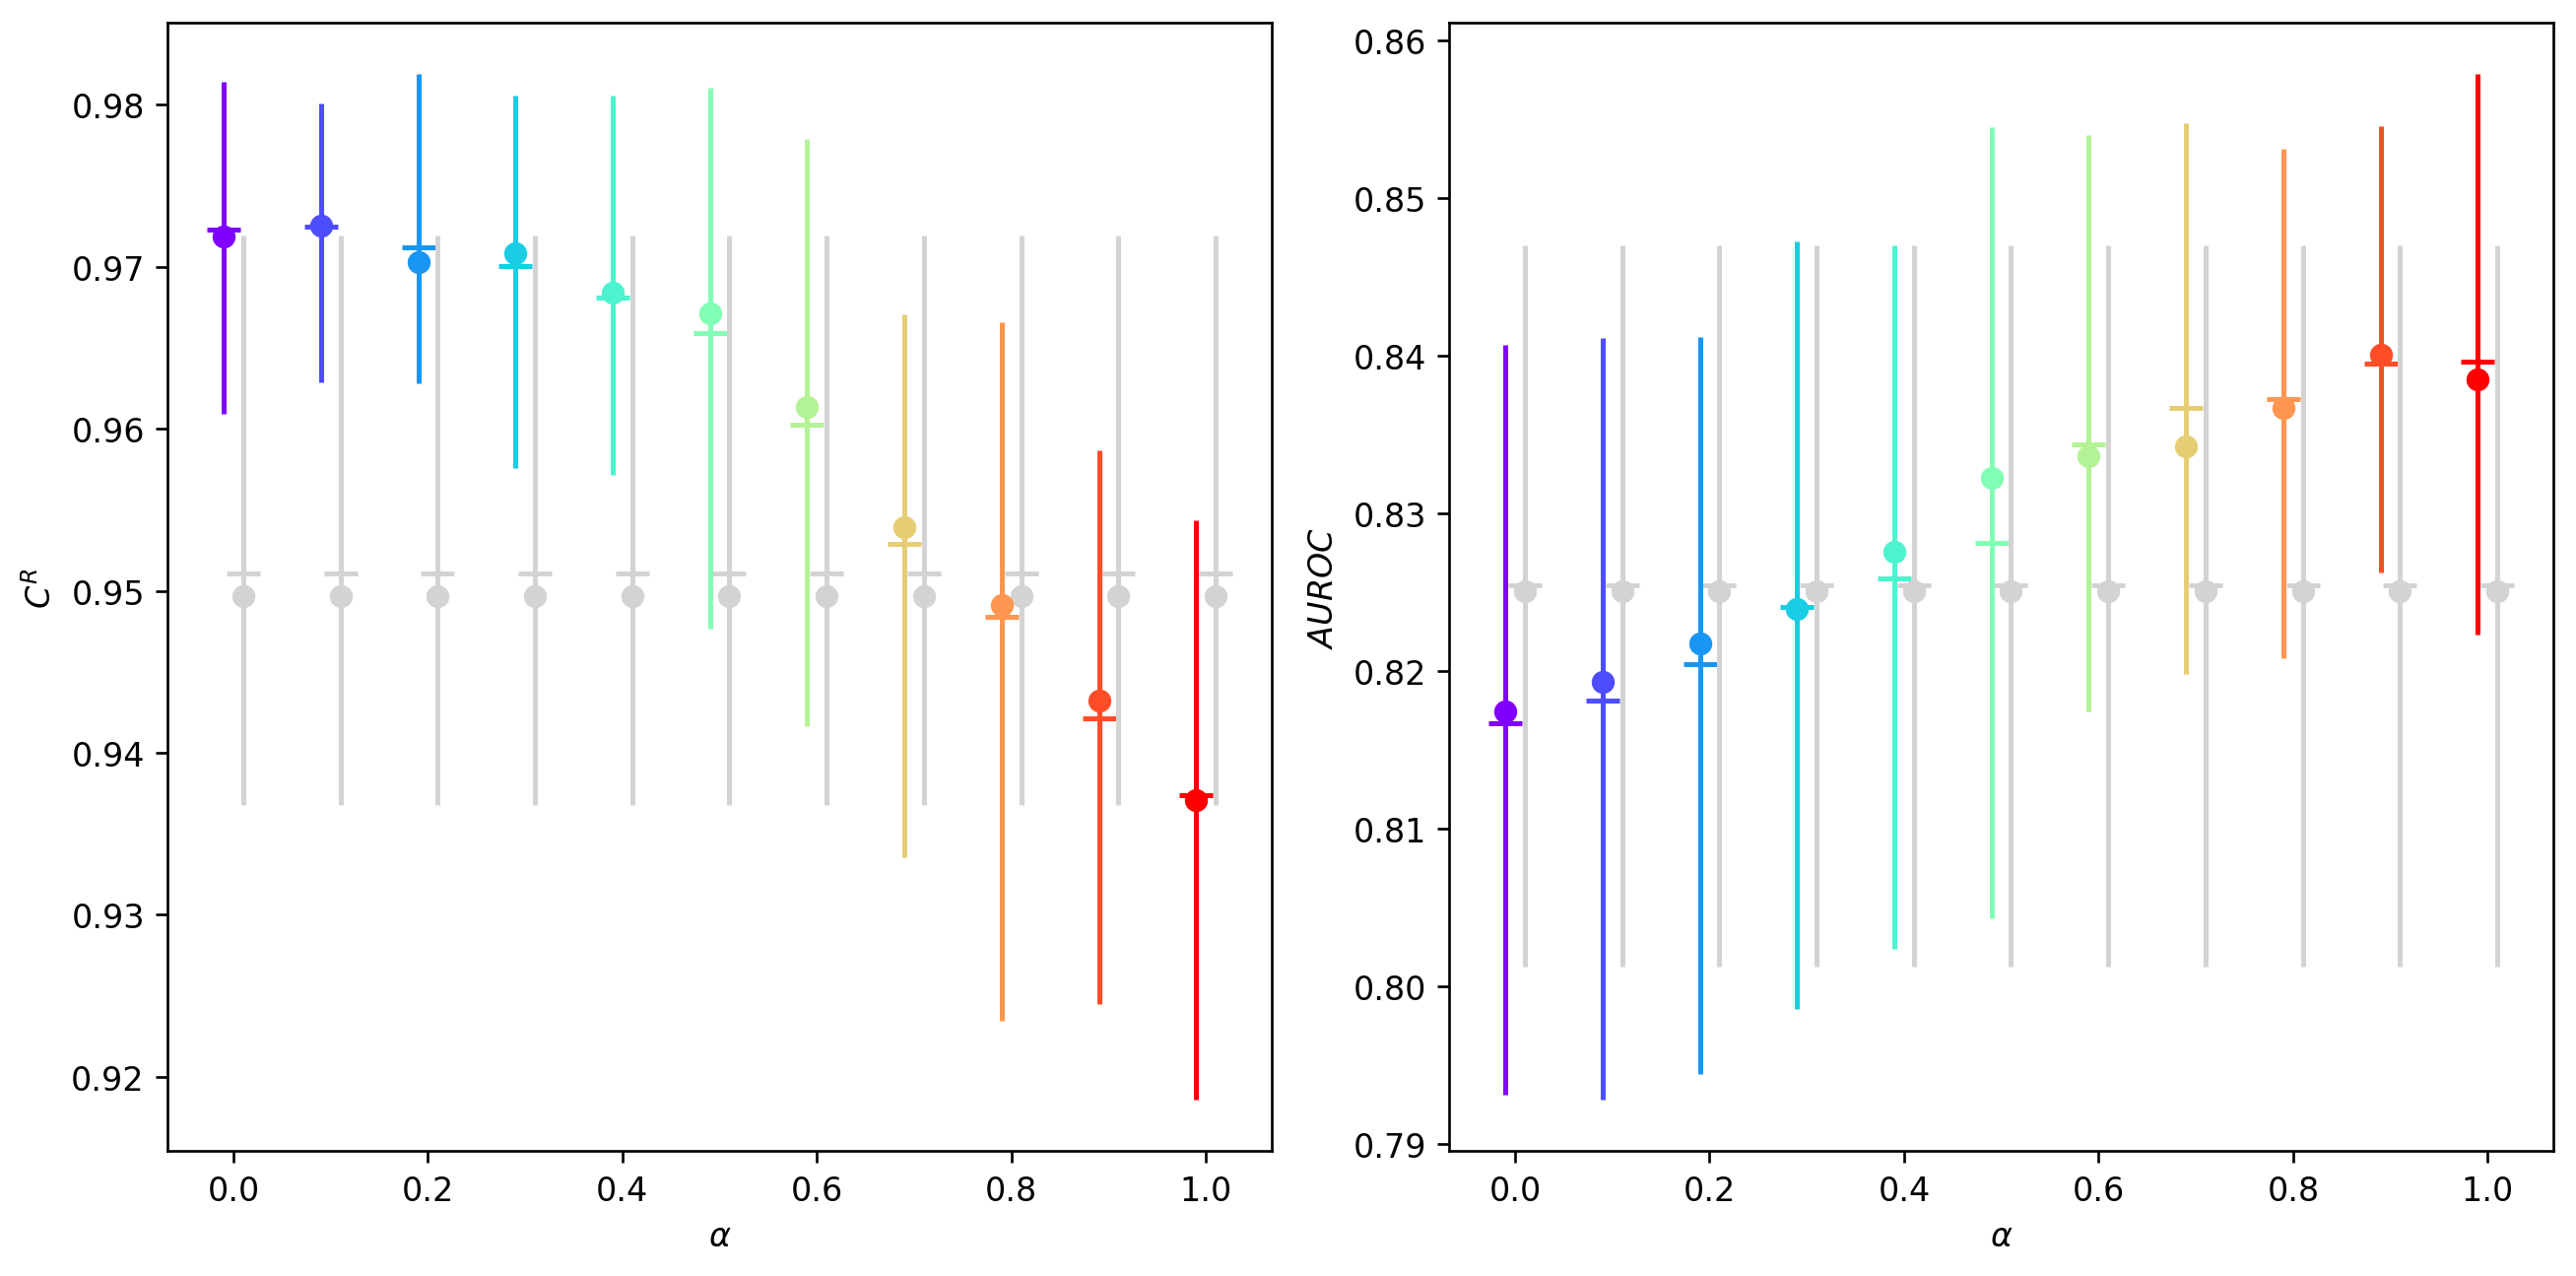

f_u_alpha            0.0        0.1        0.2        0.3        0.4  \
ΔRBC(e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
        mean    0.021199   0.021408   0.020134   0.018968   0.017029   
        std     0.009349   0.008566   0.008849   0.008447   0.007816   
        min     0.006608   0.004398   0.004522   0.003455   0.001173   
        2.5%    0.007156   0.005520   0.005757   0.004601   0.004305   
        50%     0.019819   0.022401   0.019976   0.017953   0.015598   
        97.5%   0.036151   0.034405   0.036423   0.035636   0.029509   
        max     0.046861   0.038244   0.036806   0.041098   0.030315   

f_u_alpha            0.5        0.6        0.7        0.8        0.9  \
ΔRBC(e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
        mean    0.014838   0.009157   0.001829  -0.002676  -0.008968   
        std     0.009266   0.008508   0.008723   0.012998   0.011962   
        min    -0.002961  -0.009079  -0.021015  -0.051514  -0.047683   
        2.5%   -0.002021  -0.003466  -0.014030  -0.028167  -0.030587   
        50%     0.014050   0.008000   0.002080   0.000658  -0.009431   
        97.5%   0.031066   0.026061   0.014178   0.013949   0.004733   
        max     0.034725   0.033589   0.021388   0.017988   0.016230   

f_u_alpha            1.0  
ΔRBC(e) count  40.000000  
        mean   -0.013714  
        std     0.012013  
        min    -0.052461  
        2.5%   -0.036123  
        50%    -0.011235  
        97.5%   0.003450  
        max     0.008036

f_u_alpha                  0.0        0.1        0.2        0.3        0.4  \
ΔAUROC(f_u,e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
              mean   -0.008733  -0.007315  -0.005006  -0.001355   0.000446   
              std     0.012173   0.012743   0.012235   0.011331   0.011198   
              min    -0.040700  -0.051118  -0.034182  -0.034269  -0.031586   
              2.5%   -0.033449  -0.036591  -0.030621  -0.021056  -0.021202   
              50%    -0.005575  -0.004688  -0.002738   0.002746   0.002680   
              97.5%   0.010118   0.006352   0.013543   0.014647   0.016747   
              max     0.010797   0.007792   0.016668   0.015134   0.019775   

f_u_alpha                  0.5        0.6        0.7        0.8        0.9  \
ΔAUROC(f_u,e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
              mean    0.002718   0.008921   0.011284   0.011798   0.014053   
              std     0.012515   0.010112   0.009617   0.008557   0.008637   
              min    -0.030131  -0.010548  -0.006605  -0.002288  -0.002135   
              2.5%   -0.025092  -0.008828  -0.002796  -0.001001   0.000552   
              50%     0.004733   0.008261   0.010213   0.010687   0.011909   
              97.5%   0.021474   0.027390   0.027650   0.027071   0.028554   
              max     0.027265   0.029644   0.031488   0.030038   0.029451   

f_u_alpha                  1.0  
ΔAUROC(f_u,e) count  40.000000  
              mean    0.014183  
              std     0.009382  
              min    -0.001354  
              2.5%   -0.000770  
              50%     0.013723  
              97.5%   0.031859  
              max     0.032275

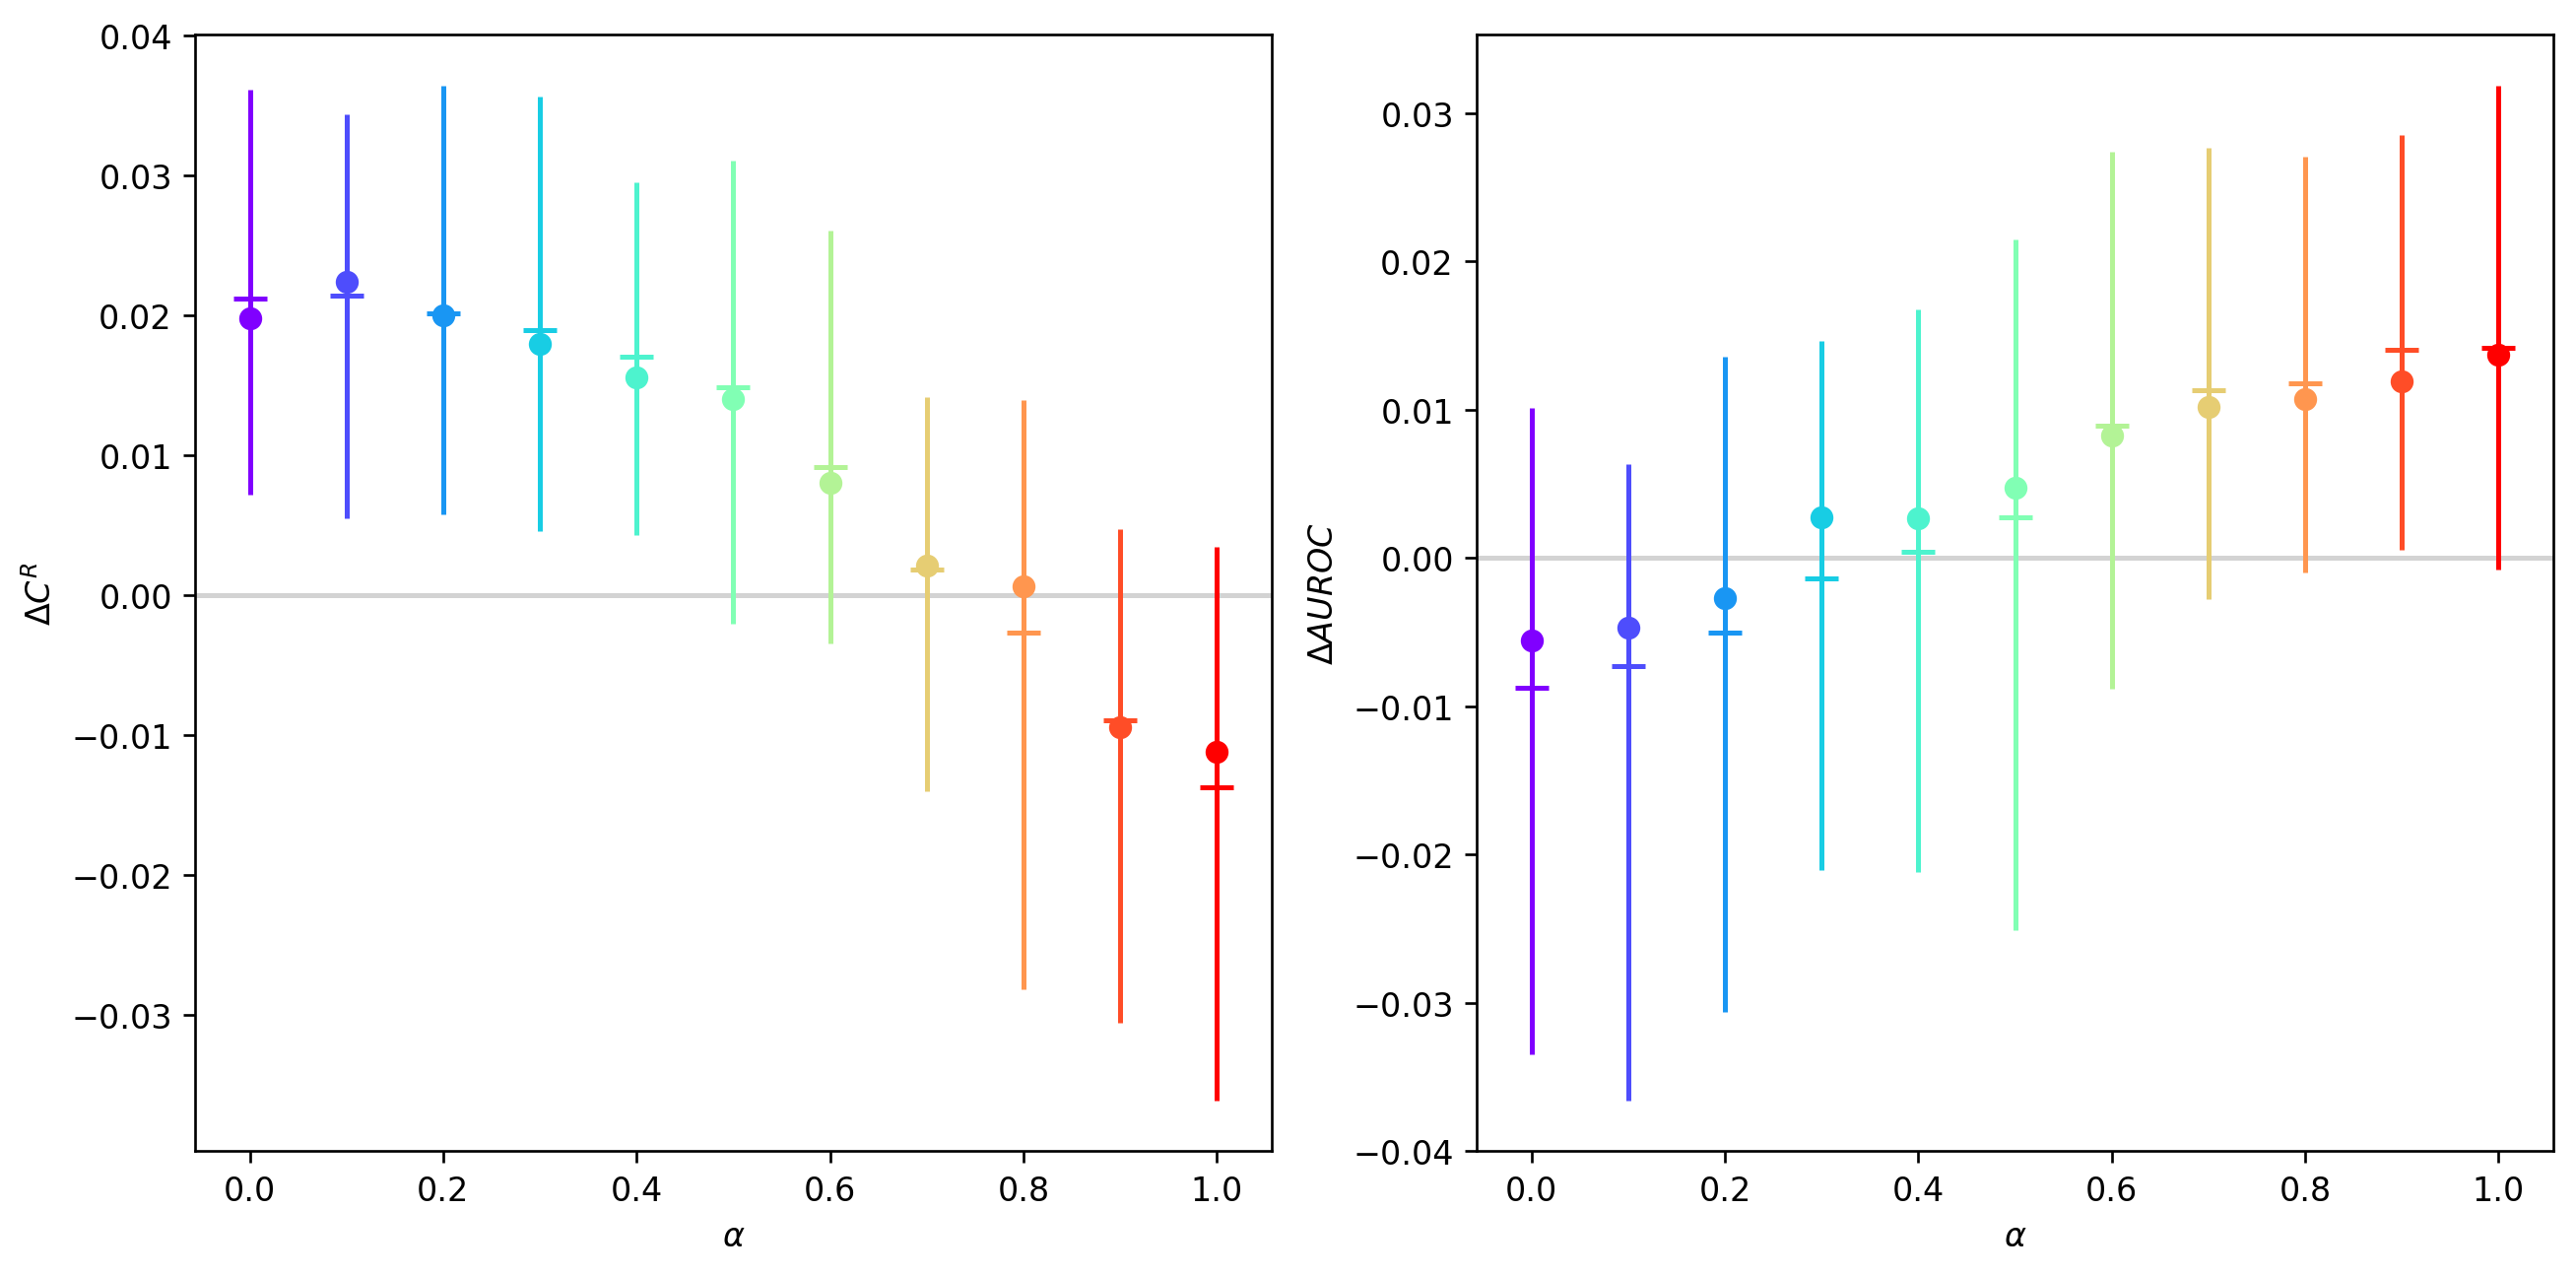

f_u_alpha                        0.0        0.1        0.2        0.3  \
RBC(e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                    mean    0.972274   0.972483   0.971209   0.970043   
                    std     0.006370   0.005455   0.005952   0.006829   
                    min     0.958983   0.962189   0.960454   0.953558   
                    2.5%    0.960949   0.962837   0.962830   0.957563   
                    50%     0.971895   0.972553   0.970272   0.970855   
                    97.5%   0.981397   0.980106   0.981901   0.980536   
                    max     0.983391   0.982538   0.982939   0.984727   

f_u_alpha                        0.4        0.5        0.6        0.7  \
RBC(e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                    mean    0.968104   0.965913   0.960232   0.952904   
                    std     0.006106   0.008962   0.010536   0.009718   
                    min     0.956265   0.946390   0.935005   0.929268   
                    2.5%    0.957163   0.947677   0.941661   0.933554   
                    50%     0.968415   0.967139   0.961325   0.953904   
                    97.5%   0.980548   0.981029   0.977891   0.967046   
                    max     0.982837   0.981719   0.981440   0.981383   

f_u_alpha                        0.8        0.9        1.0  
RBC(e)_optimization count  40.000000  40.000000  40.000000  
                    mean    0.948399   0.942107   0.937361  
                    std     0.011584   0.010002   0.010671  
                    min     0.922875   0.923155   0.912852  
                    2.5%    0.923441   0.924508   0.918569  
                    50%     0.949123   0.943198   0.937066  
                    97.5%   0.966580   0.958684   0.954322  
                    max     0.968048   0.959288   0.958901

f_u_alpha                              0.0        0.1        0.2        0.3  \
AUROC(f_u,e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                          mean    0.816714   0.818132   0.820441   0.824092   
                          std     0.014069   0.014573   0.013384   0.013818   
                          min     0.791153   0.778986   0.792824   0.797835   
                          2.5%    0.793164   0.792804   0.794458   0.798550   
                          50%     0.817473   0.819301   0.821742   0.823979   
                          97.5%   0.840683   0.841165   0.841222   0.847303   
                          max     0.844287   0.842456   0.843249   0.850453   

f_u_alpha                              0.4        0.5        0.6        0.7  \
AUROC(f_u,e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                          mean    0.825893   0.828164   0.834368   0.836731   
                          std     0.013587   0.013846   0.010328   0.010220   
                          min     0.797617   0.794605   0.811353   0.819706   
                          2.5%    0.802376   0.804327   0.817457   0.819844   
                          50%     0.827582   0.832292   0.833631   0.834283   
                          97.5%   0.847008   0.854510   0.853997   0.854773   
                          max     0.848892   0.856890   0.854516   0.856216   

f_u_alpha                              0.8        0.9        1.0  
AUROC(f_u,e)_optimization count  40.000000  40.000000  40.000000  
                          mean    0.837245   0.839500   0.839630  
                          std     0.009713   0.008958   0.008799  
                          min     0.818429   0.817770   0.818552  
                          2.5%    0.820821   0.826270   0.822317  
                          50%     0.836734   0.840112   0.838511  
                          97.5%   0.853165   0.854573   0.857899  
                          max     0.854179   0.854940   0.861862

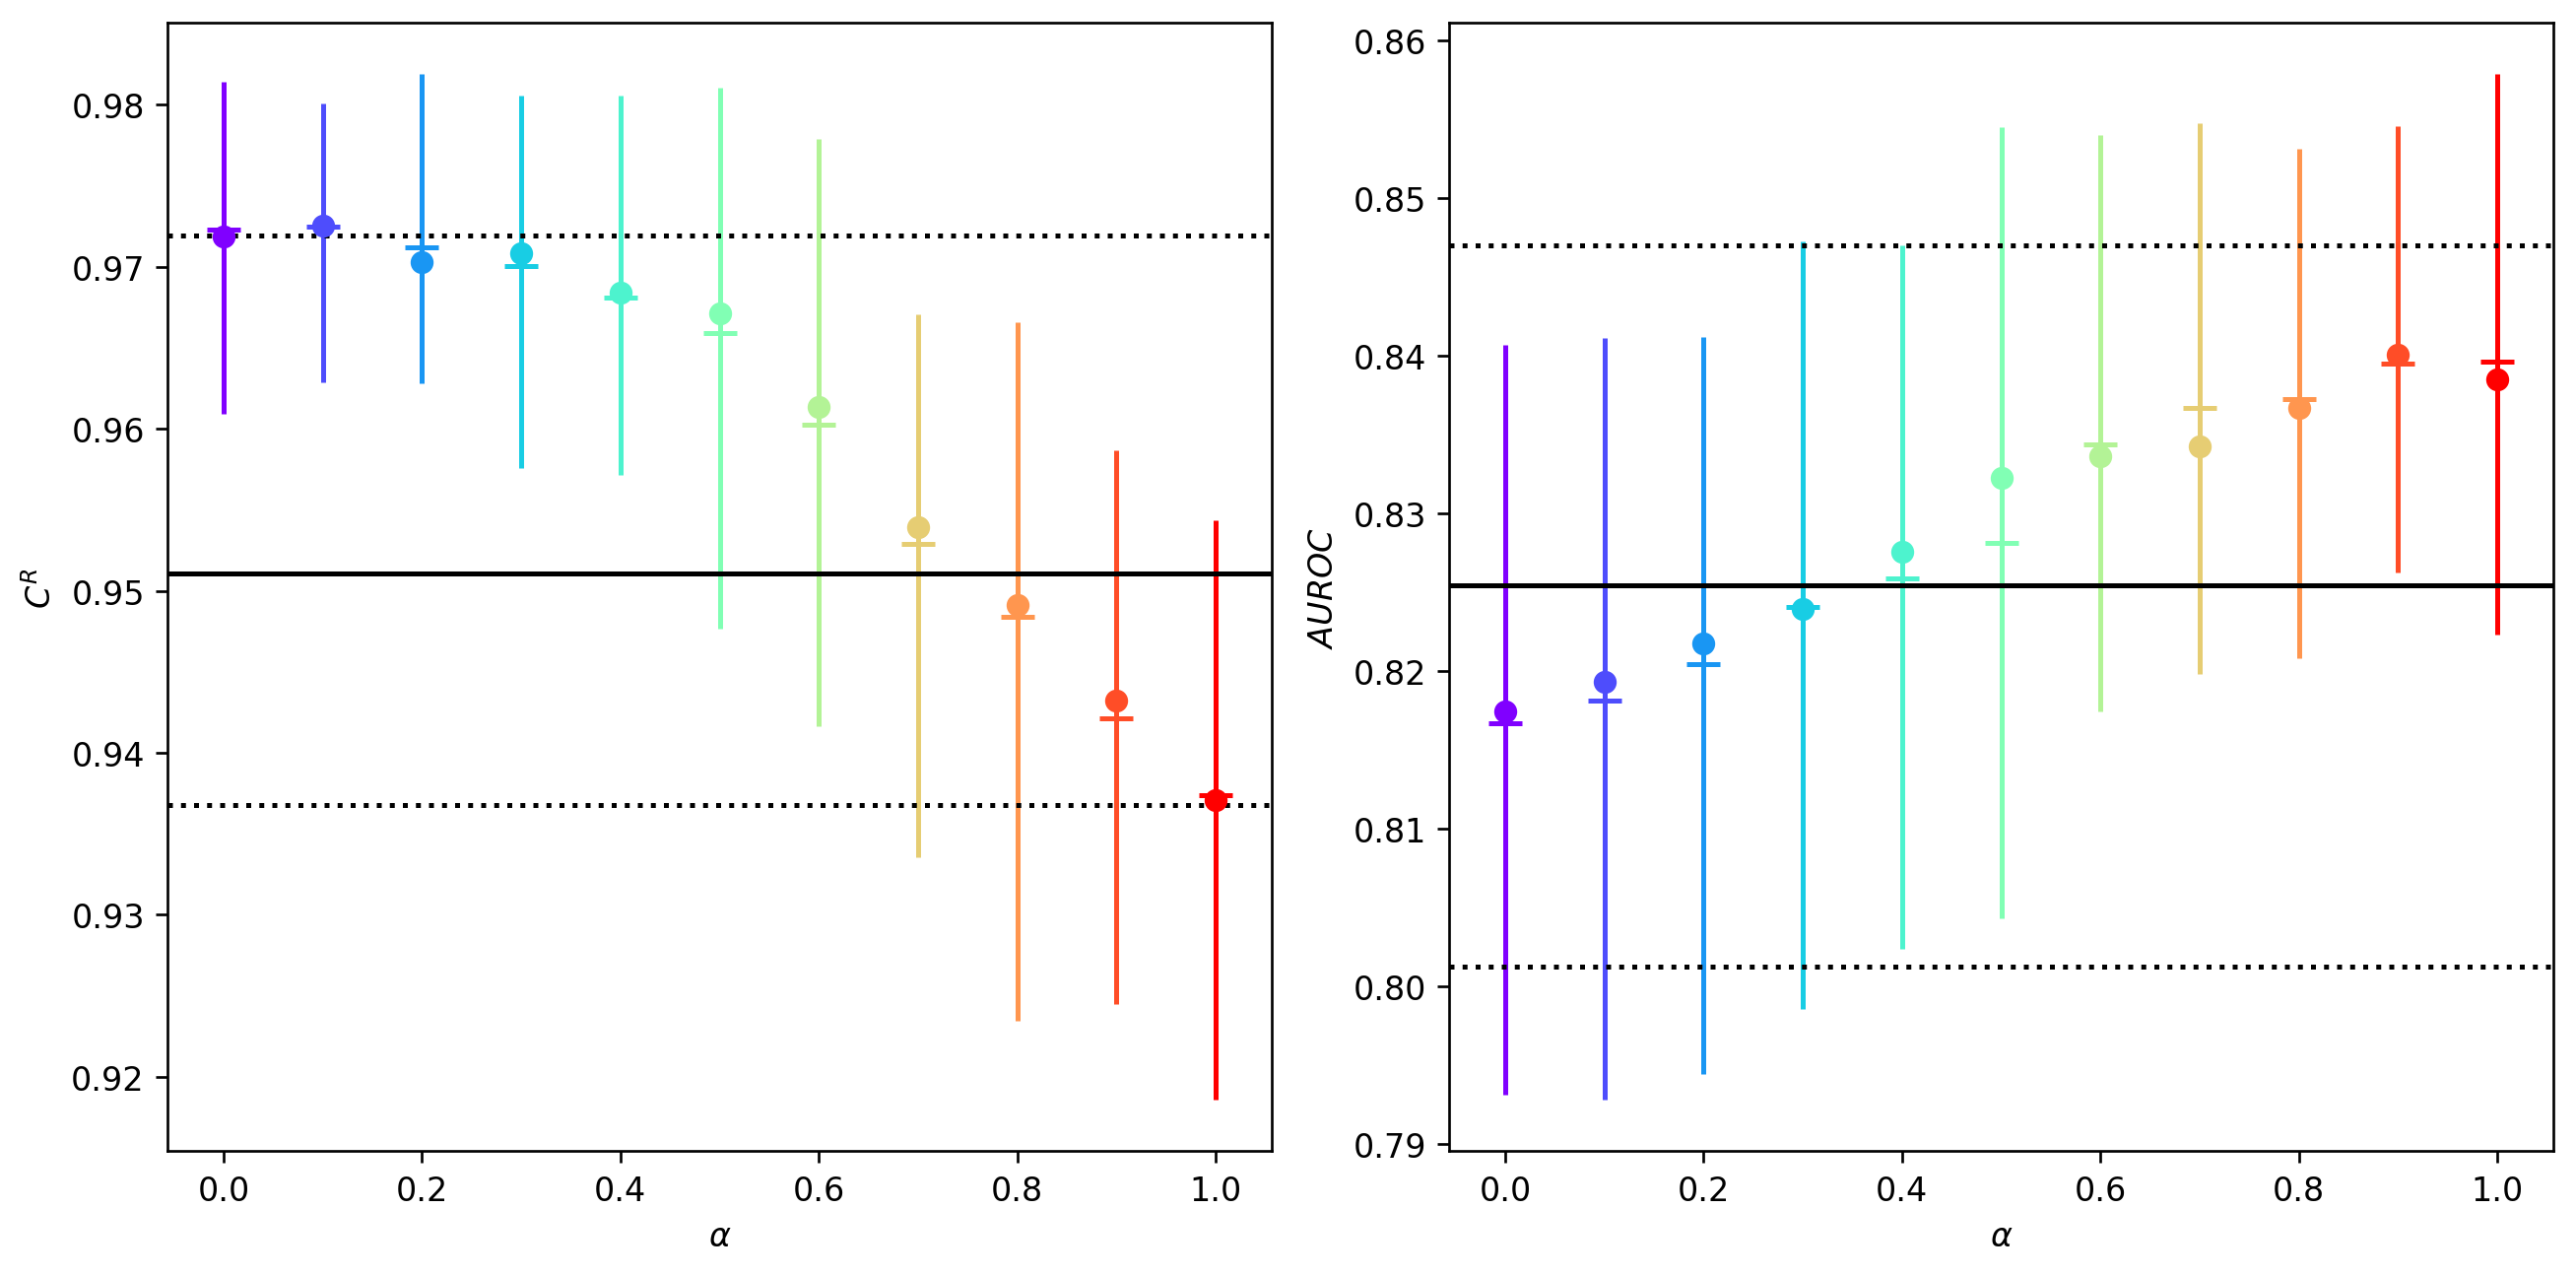

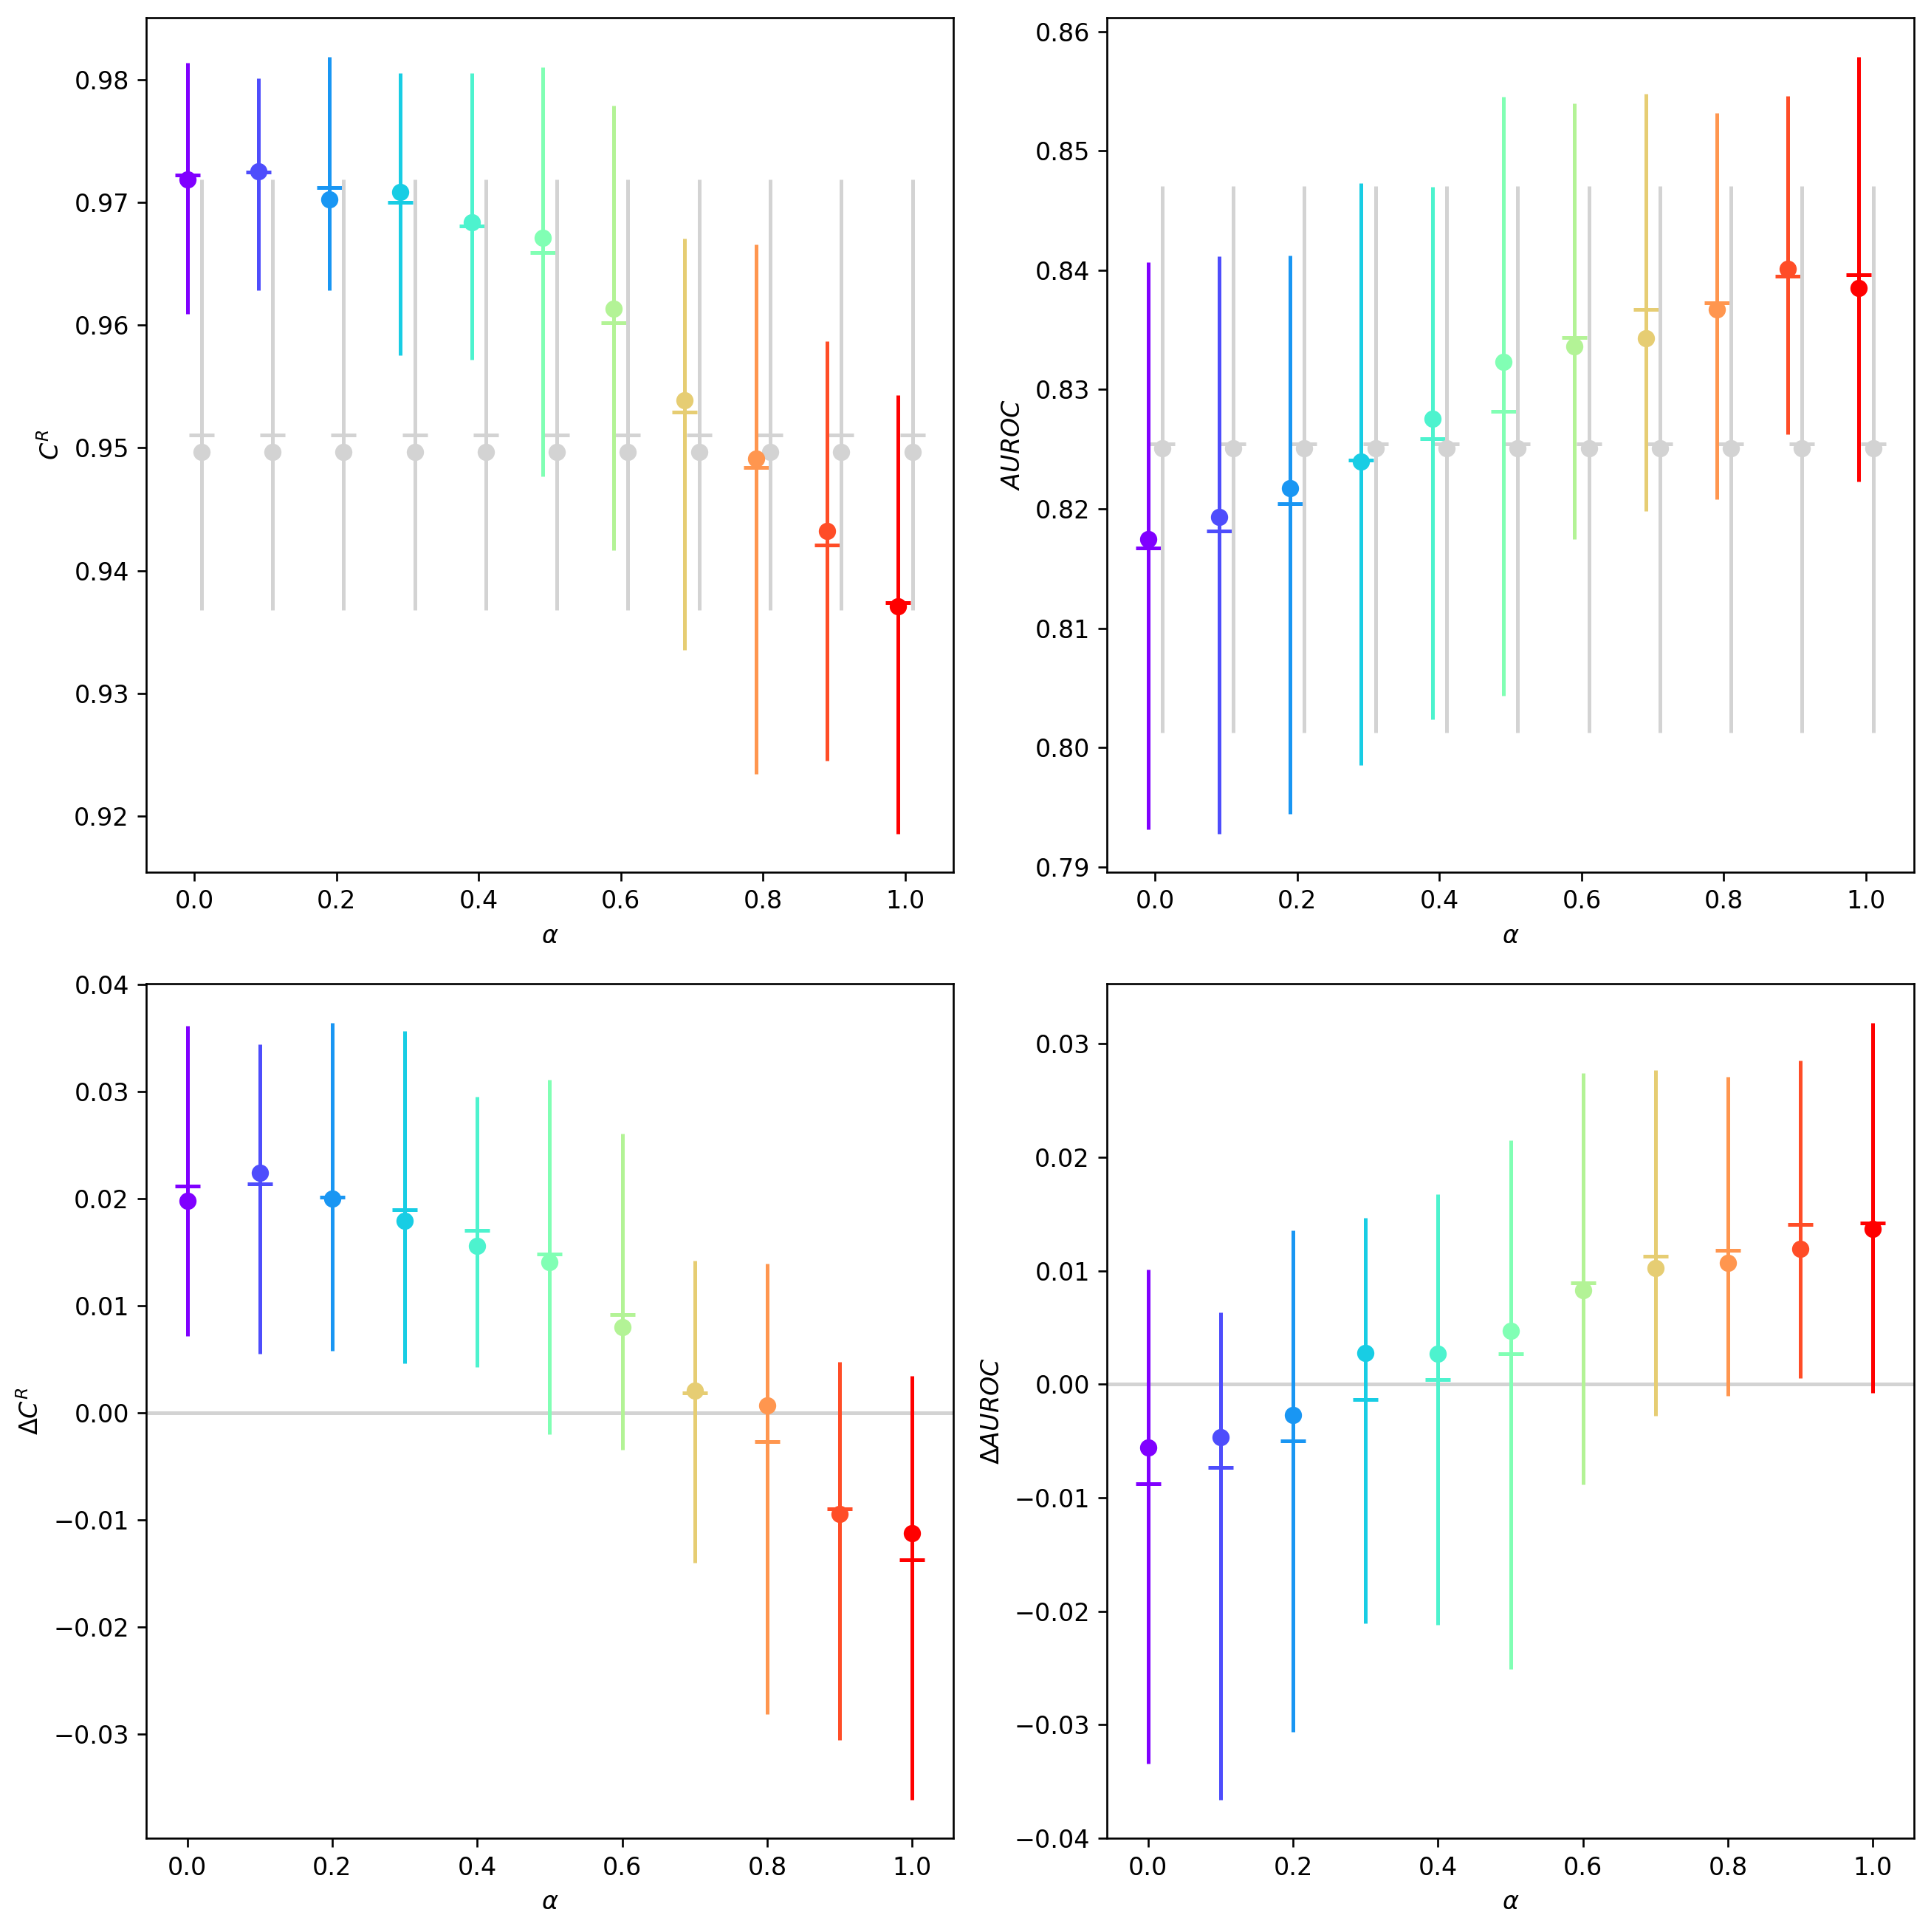

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(5.5*2,5.5*1), dpi=240)
for ax, column, display_name in zip(axs, ['RBC(e)', 'AUROC(f_u,e)'], [r'$C^R$', r'$AUROC$']):
    optimization_column = '{}_optimization'.format(column)
    selection_column = '{}_selection'.format(column)
    ua.get_ci_df(comparison_res_df, column=selection_column, ax=ax, x_eps=0.01, color_value=None, display_df=False)
    ua.get_ci_df(comparison_res_df, column=optimization_column, ax=ax, x_eps=-0.01, display_df=False)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(5.5*2,5.5*1), dpi=240)
for ax, column, display_name in zip(axs, ['ΔRBC(e)', 'ΔAUROC(f_u,e)'], [r'$\Delta C^R$', r'$\Delta AUROC$']):
    ua.get_ci_df(comparison_res_df, column=column, ax=ax)
    ax.set_ylabel(display_name)
    ax.axhline(0, color='lightgray', zorder=-1)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(5.5*2,5.5*1), dpi=240)
for ax, column, display_name in zip(axs, ['RBC(e)_optimization', 'AUROC(f_u,e)_optimization'], [r'$C^R$', r'$AUROC$']):
    ua.get_ci_df(comparison_res_df, column=column, ax=ax)
    selection_col_summary = ueRBC_selection_res_df[column.replace('_optimization', '')].describe(percentiles=[0.025, 0.5, 0.975])
    ax.axhline(selection_col_summary['mean'], color='black')
    ax.axhline(selection_col_summary['2.5%'] , color='black', ls=':')
    ax.axhline(selection_col_summary['97.5%'] , color='black', ls=':')
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()


fig, axs = plt.subplots(2, 2, figsize=(5.5*2,5.5*2), dpi=240)
for ax, column, display_name in zip(axs[0], 
                                    ['RBC(e)', 'AUROC(f_u,e)'], 
                                    [r'$C^R$', r'$AUROC$']):
    
    optimization_column = '{}_optimization'.format(column)
    selection_column = '{}_selection'.format(column)
    ua.get_ci_df(comparison_res_df, column=selection_column, ax=ax, x_eps=0.01, color_value=None, display_df=False)
    ua.get_ci_df(comparison_res_df, column=optimization_column, ax=ax, x_eps=-0.01, display_df=False)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')


for ax, column, display_name in zip(axs[1], ['ΔRBC(e)', 'ΔAUROC(f_u,e)'], [r'$\Delta C^R$', r'$\Delta AUROC$']):
    ua.get_ci_df(comparison_res_df, column=column, ax=ax, display_df=False)
    ax.axhline(0, color='lightgray', zorder=-1)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()

# compare selection vs. optimized for same original and same alpha

In [47]:
alpha_selection_res_dfs = []
for alpha in np.arange(0.0, 1.1, 0.1):
    alpha_idxmax = selection_tradeoff_res_df.groupby('f_o_rep')['alpha={:0.1f}'.format(alpha)].idxmax(axis=0)
    alpha_selection_res_df = selection_tradeoff_res_df.loc[alpha_idxmax].copy(deep=True)
    
    alpha_selection_res_df = alpha_selection_res_df[_keep_cols]
    alpha_selection_res_df['f_u_alpha'] = alpha_col_str_template.format(alpha)
    
    alpha_selection_res_dfs.append(alpha_selection_res_df)
    
selection_res_df = pd.concat(alpha_selection_res_dfs)
selection_res_df = selection_res_df.reset_index(drop=True)
selection_res_df = selection_res_df.sort_values(by=['f_o_rep', 'f_u_alpha'])
selection_res_df = selection_res_df.set_index(['f_o_rep', 'f_u_alpha'])
selection_res_df

f_o_name  f_o_C  AUROC(f_o,od)  AUROC(f_o,oe)  \
f_o_rep f_u_alpha                                                  
0       0.0               0   0.10       0.998638       0.777045   
        0.1               0   0.10       0.998638       0.777045   
        0.2               0   0.10       0.998638       0.777045   
        0.3               0   0.10       0.998638       0.777045   
        0.4               0   0.10       0.998638       0.777045   
...                     ...    ...            ...            ...   
39      0.6              39   0.01       1.000000       0.813959   
        0.7              39   0.01       1.000000       0.813959   
        0.8              39   0.01       1.000000       0.813959   
        0.9              39   0.01       1.000000       0.813959   
        1.0              39   0.01       1.000000       0.813959   

                   AUROC(f_o,ud)  AUROC(f_o,ue)  AUROC(f_o,e)     f_u_name  \
f_o_rep f_u_alpha                                                            
0       0.0             0.799334       0.782780       0.80381  00008_00001   
        0.1             0.799334       0.782780       0.80381  00008_00001   
        0.2             0.799334       0.782780       0.80381  00008_00001   
        0.3             0.799334       0.782780       0.80381  00008_00001   
        0.4             0.799334       0.782780       0.80381  00001_00000   
...                          ...            ...           ...          ...   
39      0.6             0.785515       0.772631       0.77089  00002_00000   
        0.7             0.785515       0.772631       0.77089  00002_00000   
        0.8             0.785515       0.772631       0.77089  00002_00000   
        0.9             0.785515       0.772631       0.77089  00002_00000   
        1.0             0.785515       0.772631       0.77089  00002_00000   

                   f_u_C  f_u_type  AUROC(f_u,ud)  AUROC(f_u,ue)  \
f_o_rep f_u_alpha                                                  
0       0.0        0.010  standard       0.968715       0.836676   
        0.1        0.010  standard       0.968715       0.836676   
        0.2        0.010  standard       0.968715       0.836676   
        0.3        0.010  standard       0.968715       0.836676   
        0.4        0.001  standard       0.990892       0.852973   
...                  ...       ...            ...            ...   
39      0.6        0.001  standard       0.999276       0.846773   
        0.7        0.001  standard       0.999276       0.846773   
        0.8        0.001  standard       0.999276       0.846773   
        0.9        0.001  standard       0.999276       0.846773   
        1.0        0.001  standard       0.999276       0.846773   

                   AUROC(f_u,e)   RBC(ud)   RBC(ue)    RBC(e)  
f_o_rep f_u_alpha                                              
0       0.0            0.841298  0.972344  0.965916  0.961526  
        0.1            0.841298  0.972344  0.965916  0.961526  
        0.2            0.841298  0.972344  0.965916  0.961526  
        0.3            0.841298  0.972344  0.965916  0.961526  
        0.4            0.850794  0.999754  0.956713  0.950784  
...                         ...       ...       ...       ...  
39      0.6            0.831793  0.999998  0.950665  0.938858  
        0.7            0.831793  0.999998  0.950665  0.938858  
        0.8            0.831793  0.999998  0.950665  0.938858  
        0.9            0.831793  0.999998  0.950665  0.938858  
        1.0            0.831793  0.999998  0.950665  0.938858  

[440 rows x 16 columns]

In [48]:
comparison_res_df = optimization_res_df.join(selection_res_df, 
                                             lsuffix='_optimization', rsuffix='_selection')
comparison_res_df

f_o_name_optimization  f_o_C_optimization  \
f_o_rep f_u_alpha                                              
0       0.0                            0                0.10   
        0.1                            0                0.10   
        0.2                            0                0.10   
        0.3                            0                0.10   
        0.4                            0                0.10   
...                                  ...                 ...   
39      0.6                           39                0.01   
        0.7                           39                0.01   
        0.8                           39                0.01   
        0.9                           39                0.01   
        1.0                           39                0.01   

                   AUROC(f_o,od)_optimization  AUROC(f_o,oe)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.998638                    0.777045   
        0.1                          0.998638                    0.777045   
        0.2                          0.998638                    0.777045   
        0.3                          0.998638                    0.777045   
        0.4                          0.998638                    0.777045   
...                                       ...                         ...   
39      0.6                          1.000000                    0.813959   
        0.7                          1.000000                    0.813959   
        0.8                          1.000000                    0.813959   
        0.9                          1.000000                    0.813959   
        1.0                          1.000000                    0.813959   

                   AUROC(f_o,ud)_optimization  AUROC(f_o,ue)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.799334                    0.782780   
        0.1                          0.799334                    0.782780   
        0.2                          0.799334                    0.782780   
        0.3                          0.799334                    0.782780   
        0.4                          0.799334                    0.782780   
...                                       ...                         ...   
39      0.6                          0.785515                    0.772631   
        0.7                          0.785515                    0.772631   
        0.8                          0.785515                    0.772631   
        0.9                          0.785515                    0.772631   
        1.0                          0.785515                    0.772631   

                   AUROC(f_o,e)_optimization f_u_name_optimization  \
f_o_rep f_u_alpha                                                    
0       0.0                          0.80381           00000_00011   
        0.1                          0.80381           00000_00001   
        0.2                          0.80381           00000_00002   
        0.3                          0.80381           00000_00014   
        0.4                          0.80381           00000_00015   
...                                      ...                   ...   
39      0.6                          0.77089           00000_00006   
        0.7                          0.77089           00000_00007   
        0.8                          0.77089           00000_00008   
        0.9                          0.77089           00000_00009   
        1.0                          0.77089           00000_00010   

                   f_u_C_optimization f_u_type_optimization  ...  \
f_o_rep f_u_alpha                                            ...   
0       0.0                     0.010            engineered  ...   
        0.1                     0.001            engineered  ...   

In [49]:
for c in ['RBC(e)', 'AUROC(f_u,e)']:
    comparison_res_df['Δ{}'.format(c)] = comparison_res_df['{}_optimization'.format(c)] - comparison_res_df['{}_selection'.format(c)]
comparison_res_df

f_o_name_optimization  f_o_C_optimization  \
f_o_rep f_u_alpha                                              
0       0.0                            0                0.10   
        0.1                            0                0.10   
        0.2                            0                0.10   
        0.3                            0                0.10   
        0.4                            0                0.10   
...                                  ...                 ...   
39      0.6                           39                0.01   
        0.7                           39                0.01   
        0.8                           39                0.01   
        0.9                           39                0.01   
        1.0                           39                0.01   

                   AUROC(f_o,od)_optimization  AUROC(f_o,oe)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.998638                    0.777045   
        0.1                          0.998638                    0.777045   
        0.2                          0.998638                    0.777045   
        0.3                          0.998638                    0.777045   
        0.4                          0.998638                    0.777045   
...                                       ...                         ...   
39      0.6                          1.000000                    0.813959   
        0.7                          1.000000                    0.813959   
        0.8                          1.000000                    0.813959   
        0.9                          1.000000                    0.813959   
        1.0                          1.000000                    0.813959   

                   AUROC(f_o,ud)_optimization  AUROC(f_o,ue)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.799334                    0.782780   
        0.1                          0.799334                    0.782780   
        0.2                          0.799334                    0.782780   
        0.3                          0.799334                    0.782780   
        0.4                          0.799334                    0.782780   
...                                       ...                         ...   
39      0.6                          0.785515                    0.772631   
        0.7                          0.785515                    0.772631   
        0.8                          0.785515                    0.772631   
        0.9                          0.785515                    0.772631   
        1.0                          0.785515                    0.772631   

                   AUROC(f_o,e)_optimization f_u_name_optimization  \
f_o_rep f_u_alpha                                                    
0       0.0                          0.80381           00000_00011   
        0.1                          0.80381           00000_00001   
        0.2                          0.80381           00000_00002   
        0.3                          0.80381           00000_00014   
        0.4                          0.80381           00000_00015   
...                                      ...                   ...   
39      0.6                          0.77089           00000_00006   
        0.7                          0.77089           00000_00007   
        0.8                          0.77089           00000_00008   
        0.9                          0.77089           00000_00009   
        1.0                          0.77089           00000_00010   

                   f_u_C_optimization f_u_type_optimization  ...  \
f_o_rep f_u_alpha                                            ...   
0       0.0                     0.010            engineered  ...   
        0.1                     0.001            engineered  ...   

f_u_alpha                     0.0        0.1        0.2        0.3        0.4  \
RBC(e)_selection count  40.000000  40.000000  40.000000  40.000000  40.000000   
                 mean    0.951075   0.950914   0.950601   0.949637   0.948635   
                 std     0.009207   0.009007   0.009251   0.009594   0.008711   
                 min     0.933175   0.933175   0.933175   0.931706   0.931706   
                 2.5%    0.936797   0.936797   0.936797   0.933139   0.933139   
                 50%     0.949637   0.949076   0.948266   0.947486   0.947486   
                 97.5%   0.971908   0.971908   0.971908   0.971858   0.962913   
                 max     0.974389   0.974389   0.974389   0.972411   0.972411   

f_u_alpha                     0.5        0.6        0.7        0.8        0.9  \
RBC(e)_selection count  40.000000  40.000000  40.000000  40.000000  40.000000   
                 mean    0.947171   0.944846   0.943239   0.941575   0.939328   
                 std     0.009403   0.009605   0.010328   0.010557   0.011623   
                 min     0.928469   0.923509   0.923509   0.920395   0.914823   
                 2.5%    0.931625   0.925595   0.925595   0.923431   0.916847   
                 50%     0.944931   0.944459   0.943728   0.943442   0.940536   
                 97.5%   0.962913   0.960741   0.960741   0.958017   0.958017   
                 max     0.972411   0.962670   0.962670   0.960691   0.960691   

f_u_alpha                     1.0  
RBC(e)_selection count  40.000000  
                 mean    0.937692  
                 std     0.011499  
                 min     0.914823  
                 2.5%    0.916847  
                 50%     0.938292  
                 97.5%   0.958017  
                 max     0.960691

f_u_alpha                        0.0        0.1        0.2        0.3  \
RBC(e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                    mean    0.972274   0.972483   0.971209   0.970043   
                    std     0.006370   0.005455   0.005952   0.006829   
                    min     0.958983   0.962189   0.960454   0.953558   
                    2.5%    0.960949   0.962837   0.962830   0.957563   
                    50%     0.971895   0.972553   0.970272   0.970855   
                    97.5%   0.981397   0.980106   0.981901   0.980536   
                    max     0.983391   0.982538   0.982939   0.984727   

f_u_alpha                        0.4        0.5        0.6        0.7  \
RBC(e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                    mean    0.968104   0.965913   0.960232   0.952904   
                    std     0.006106   0.008962   0.010536   0.009718   
                    min     0.956265   0.946390   0.935005   0.929268   
                    2.5%    0.957163   0.947677   0.941661   0.933554   
                    50%     0.968415   0.967139   0.961325   0.953904   
                    97.5%   0.980548   0.981029   0.977891   0.967046   
                    max     0.982837   0.981719   0.981440   0.981383   

f_u_alpha                        0.8        0.9        1.0  
RBC(e)_optimization count  40.000000  40.000000  40.000000  
                    mean    0.948399   0.942107   0.937361  
                    std     0.011584   0.010002   0.010671  
                    min     0.922875   0.923155   0.912852  
                    2.5%    0.923441   0.924508   0.918569  
                    50%     0.949123   0.943198   0.937066  
                    97.5%   0.966580   0.958684   0.954322  
                    max     0.968048   0.959288   0.958901

f_u_alpha                           0.0        0.1        0.2        0.3  \
AUROC(f_u,e)_selection count  40.000000  40.000000  40.000000  40.000000   
                       mean    0.825447   0.830443   0.833060   0.834326   
                       std     0.012391   0.014468   0.012185   0.011575   
                       min     0.799431   0.799431   0.809983   0.809983   
                       2.5%    0.801241   0.801241   0.811646   0.816941   
                       50%     0.825095   0.829661   0.830167   0.834422   
                       97.5%   0.847050   0.854236   0.854236   0.854236   
                       max     0.851210   0.857958   0.857958   0.857958   

f_u_alpha                           0.4        0.5        0.6        0.7  \
AUROC(f_u,e)_selection count  40.000000  40.000000  40.000000  40.000000   
                       mean    0.835965   0.837440   0.838585   0.839434   
                       std     0.011722   0.011517   0.010509   0.010277   
                       min     0.813724   0.813724   0.813724   0.813724   
                       2.5%    0.817034   0.817034   0.820042   0.820042   
                       50%     0.836208   0.838415   0.838415   0.840017   
                       97.5%   0.854236   0.855520   0.855520   0.855520   
                       max     0.857958   0.857958   0.857958   0.857958   

f_u_alpha                           0.8        0.9        1.0  
AUROC(f_u,e)_selection count  40.000000  40.000000  40.000000  
                       mean    0.840367   0.839609   0.839364  
                       std     0.009174   0.009966   0.009733  
                       min     0.820204   0.815357   0.815357  
                       2.5%    0.822163   0.817459   0.817459  
                       50%     0.840017   0.839188   0.840017  
                       97.5%   0.855520   0.855520   0.855520  
                       max     0.857958   0.857958   0.857958

f_u_alpha                              0.0        0.1        0.2        0.3  \
AUROC(f_u,e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                          mean    0.816714   0.818132   0.820441   0.824092   
                          std     0.014069   0.014573   0.013384   0.013818   
                          min     0.791153   0.778986   0.792824   0.797835   
                          2.5%    0.793164   0.792804   0.794458   0.798550   
                          50%     0.817473   0.819301   0.821742   0.823979   
                          97.5%   0.840683   0.841165   0.841222   0.847303   
                          max     0.844287   0.842456   0.843249   0.850453   

f_u_alpha                              0.4        0.5        0.6        0.7  \
AUROC(f_u,e)_optimization count  40.000000  40.000000  40.000000  40.000000   
                          mean    0.825893   0.828164   0.834368   0.836731   
                          std     0.013587   0.013846   0.010328   0.010220   
                          min     0.797617   0.794605   0.811353   0.819706   
                          2.5%    0.802376   0.804327   0.817457   0.819844   
                          50%     0.827582   0.832292   0.833631   0.834283   
                          97.5%   0.847008   0.854510   0.853997   0.854773   
                          max     0.848892   0.856890   0.854516   0.856216   

f_u_alpha                              0.8        0.9        1.0  
AUROC(f_u,e)_optimization count  40.000000  40.000000  40.000000  
                          mean    0.837245   0.839500   0.839630  
                          std     0.009713   0.008958   0.008799  
                          min     0.818429   0.817770   0.818552  
                          2.5%    0.820821   0.826270   0.822317  
                          50%     0.836734   0.840112   0.838511  
                          97.5%   0.853165   0.854573   0.857899  
                          max     0.854179   0.854940   0.861862

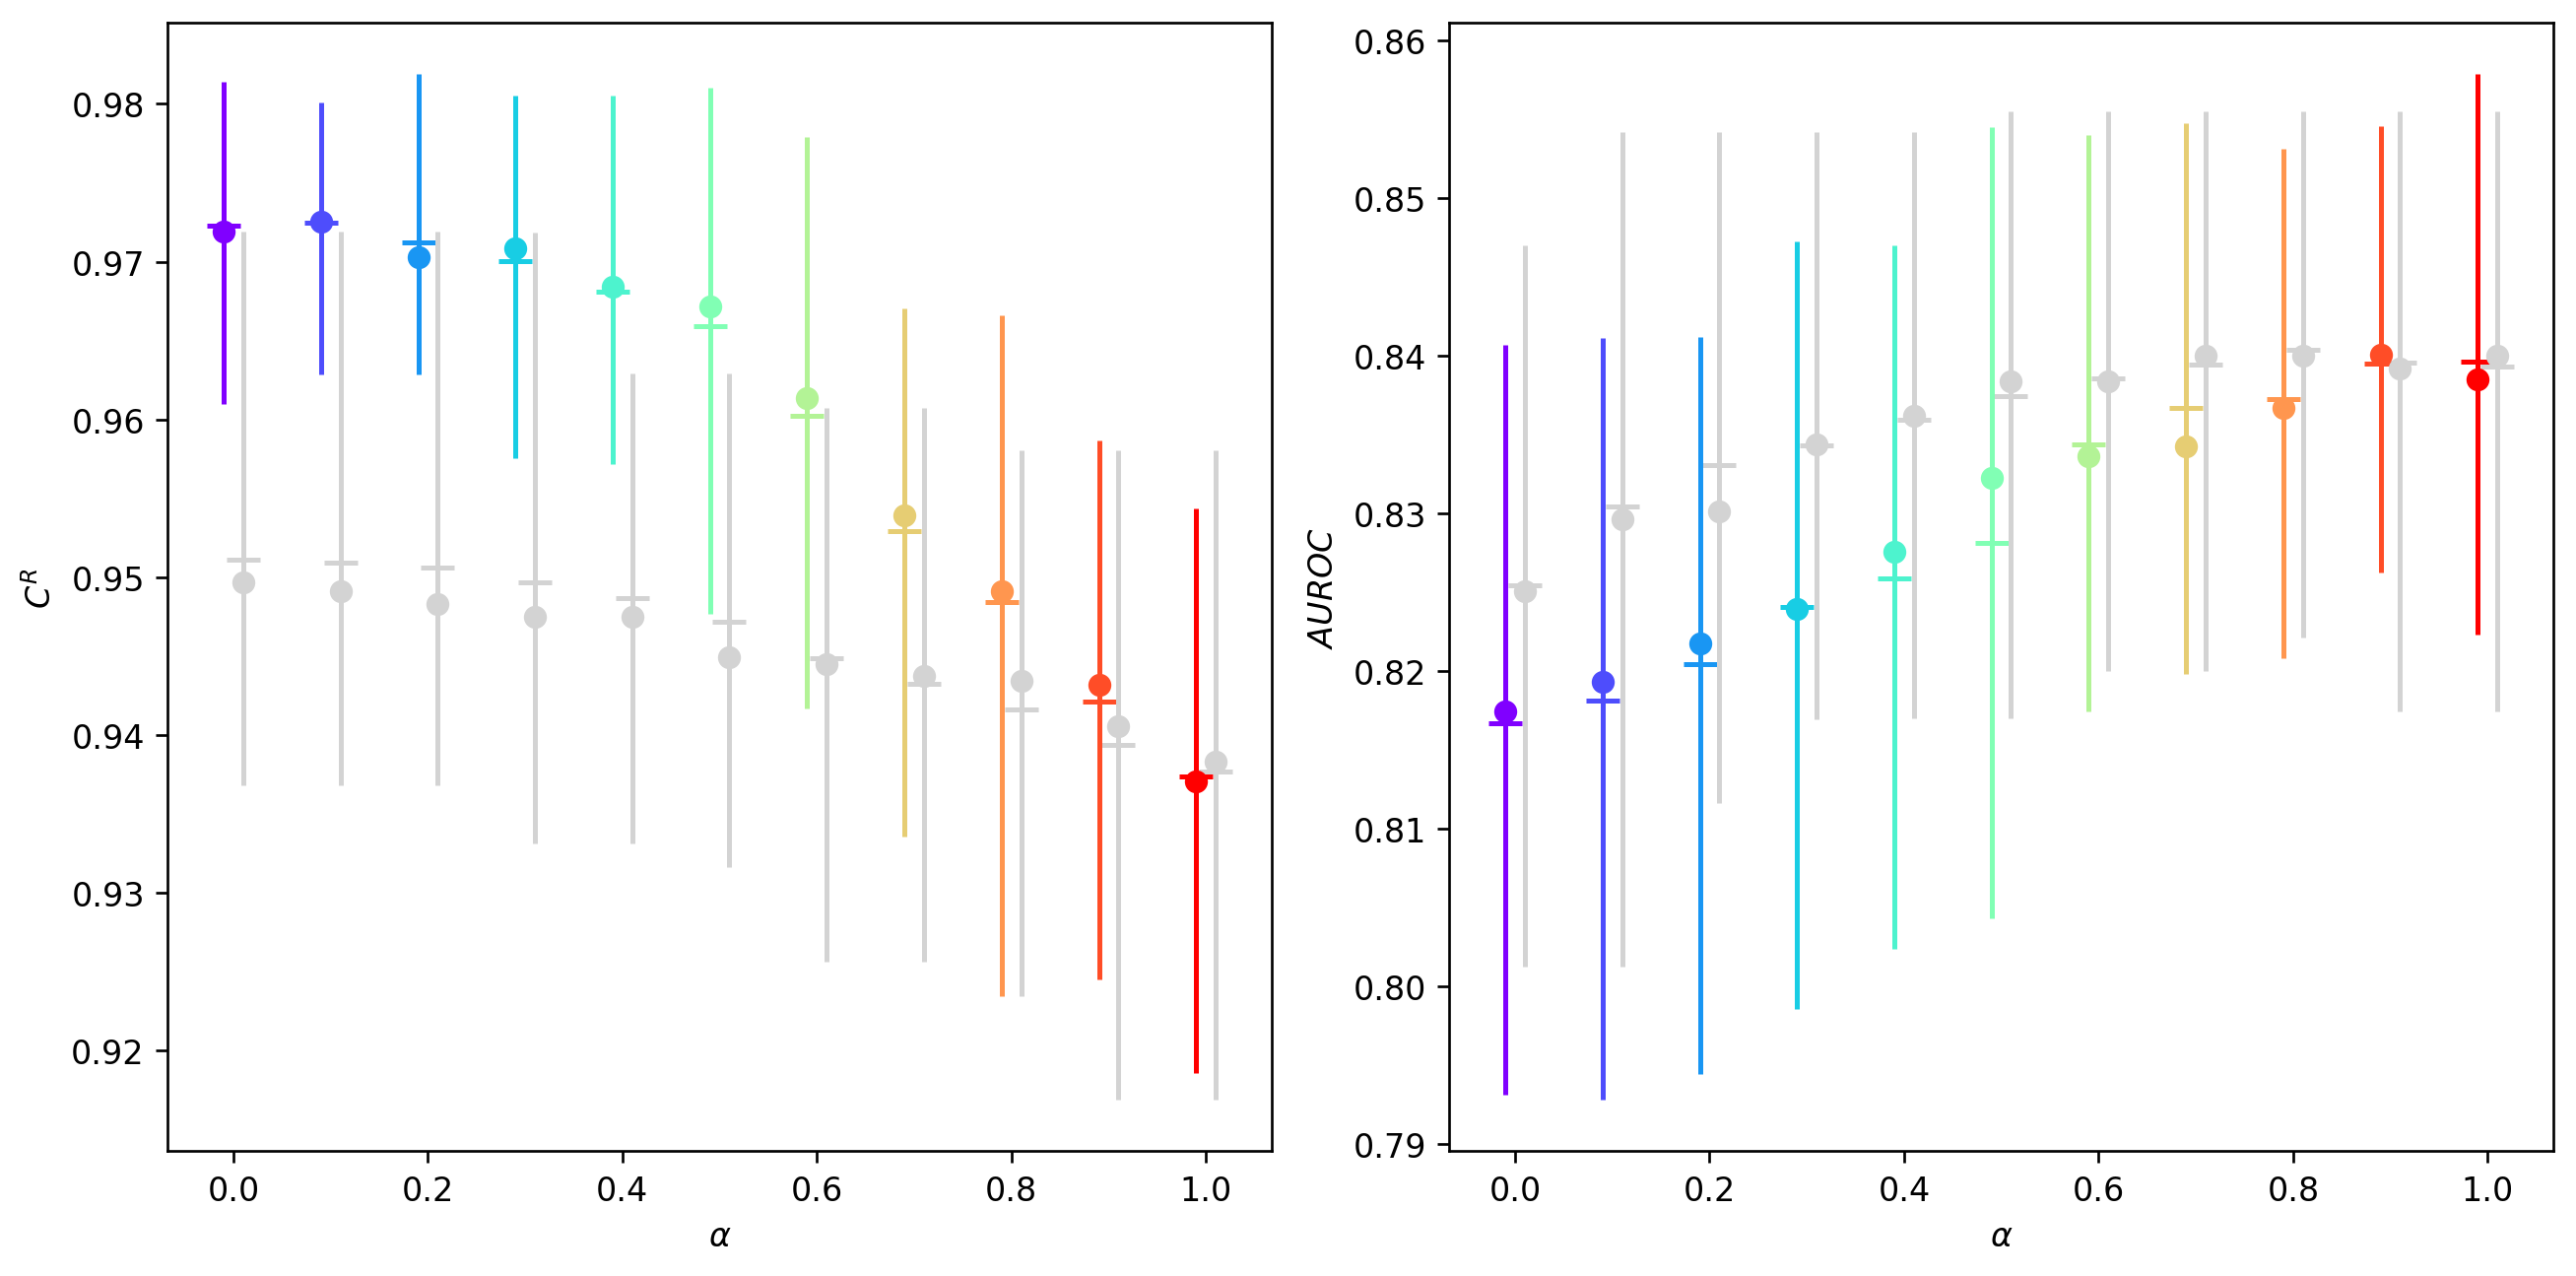

f_u_alpha            0.0        0.1        0.2        0.3        0.4  \
ΔRBC(e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
        mean    0.021199   0.021569   0.020608   0.020406   0.019469   
        std     0.009349   0.008356   0.008695   0.008899   0.007732   
        min     0.006608   0.004398   0.005181   0.006625   0.003892   
        2.5%    0.007156   0.005520   0.007018   0.009242   0.007426   
        50%     0.019819   0.022217   0.020366   0.018099   0.020153   
        97.5%   0.036151   0.034405   0.036870   0.041167   0.036511   
        max     0.046861   0.038244   0.039399   0.043881   0.036900   

f_u_alpha            0.5        0.6        0.7        0.8        0.9  \
ΔRBC(e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
        mean    0.018742   0.015386   0.009665   0.006824   0.002779   
        std     0.009871   0.009409   0.010958   0.010087   0.007127   
        min     0.003208  -0.002592  -0.008539  -0.011437  -0.010846   
        2.5%    0.005035   0.001144  -0.005672  -0.009686  -0.010818   
        50%     0.015599   0.013188   0.007662   0.005738   0.002567   
        97.5%   0.035376   0.033711   0.035076   0.029901   0.016243   
        max     0.044684   0.038459   0.047071   0.038557   0.016729   

f_u_alpha            1.0  
ΔRBC(e) count  40.000000  
        mean   -0.000331  
        std     0.009023  
        min    -0.018041  
        2.5%   -0.016826  
        50%    -0.000366  
        97.5%   0.016780  
        max     0.022814

f_u_alpha                  0.0        0.1        0.2        0.3        0.4  \
ΔAUROC(f_u,e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
              mean   -0.008733  -0.012312  -0.012619  -0.010234  -0.010071   
              std     0.012173   0.013261   0.011393   0.011122   0.009529   
              min    -0.040700  -0.051118  -0.034182  -0.034208  -0.036875   
              2.5%   -0.033449  -0.036591  -0.030621  -0.029737  -0.031660   
              50%    -0.005575  -0.011432  -0.011064  -0.011182  -0.009110   
              97.5%   0.010118   0.005922   0.008174   0.008515   0.005530   
              max     0.010797   0.007792   0.013463   0.014634   0.011191   

f_u_alpha                  0.5        0.6        0.7        0.8        0.9  \
ΔAUROC(f_u,e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
              mean   -0.009275  -0.004218  -0.002703  -0.003122  -0.000109   
              std     0.010536   0.007498   0.005438   0.004461   0.003966   
              min    -0.031065  -0.028020  -0.018575  -0.016442  -0.006512   
              2.5%   -0.030096  -0.020479  -0.015712  -0.014090  -0.005507   
              50%    -0.007656  -0.003511  -0.002133  -0.003008  -0.000530   
              97.5%   0.010985   0.006965   0.006684   0.005044   0.008912   
              max     0.014233   0.010886   0.010005   0.007857   0.011393   

f_u_alpha                  1.0  
ΔAUROC(f_u,e) count  40.000000  
              mean    0.000266  
              std     0.005247  
              min    -0.008839  
              2.5%   -0.007541  
              50%     0.000010  
              97.5%   0.010737  
              max     0.014065

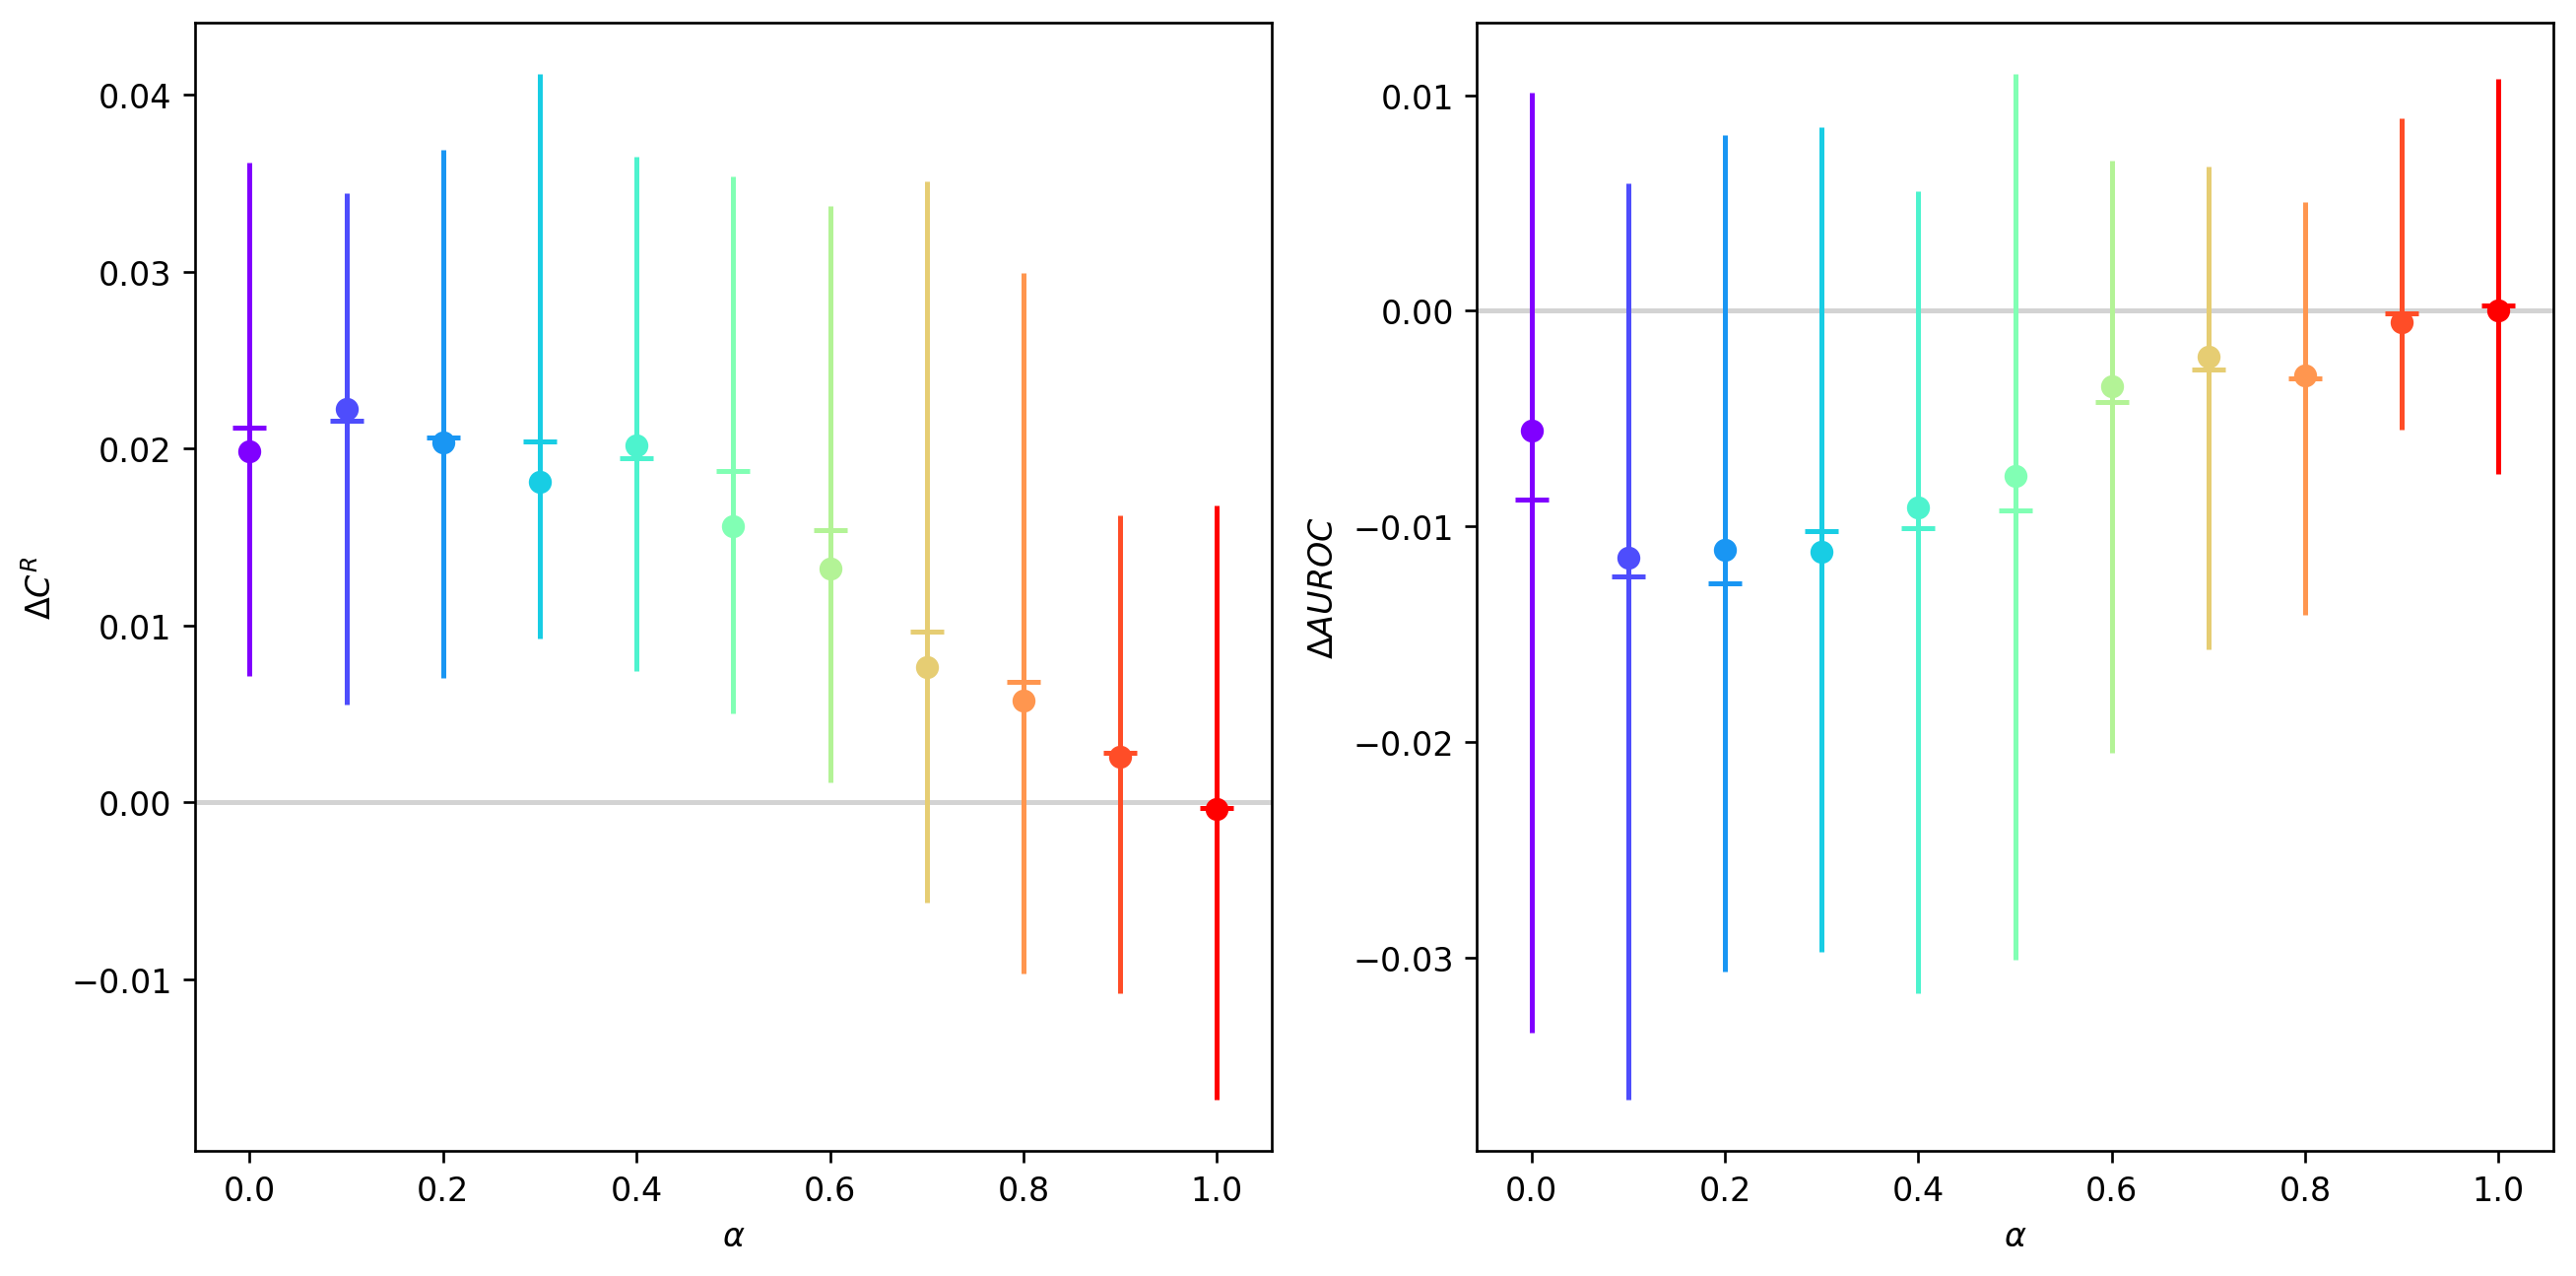

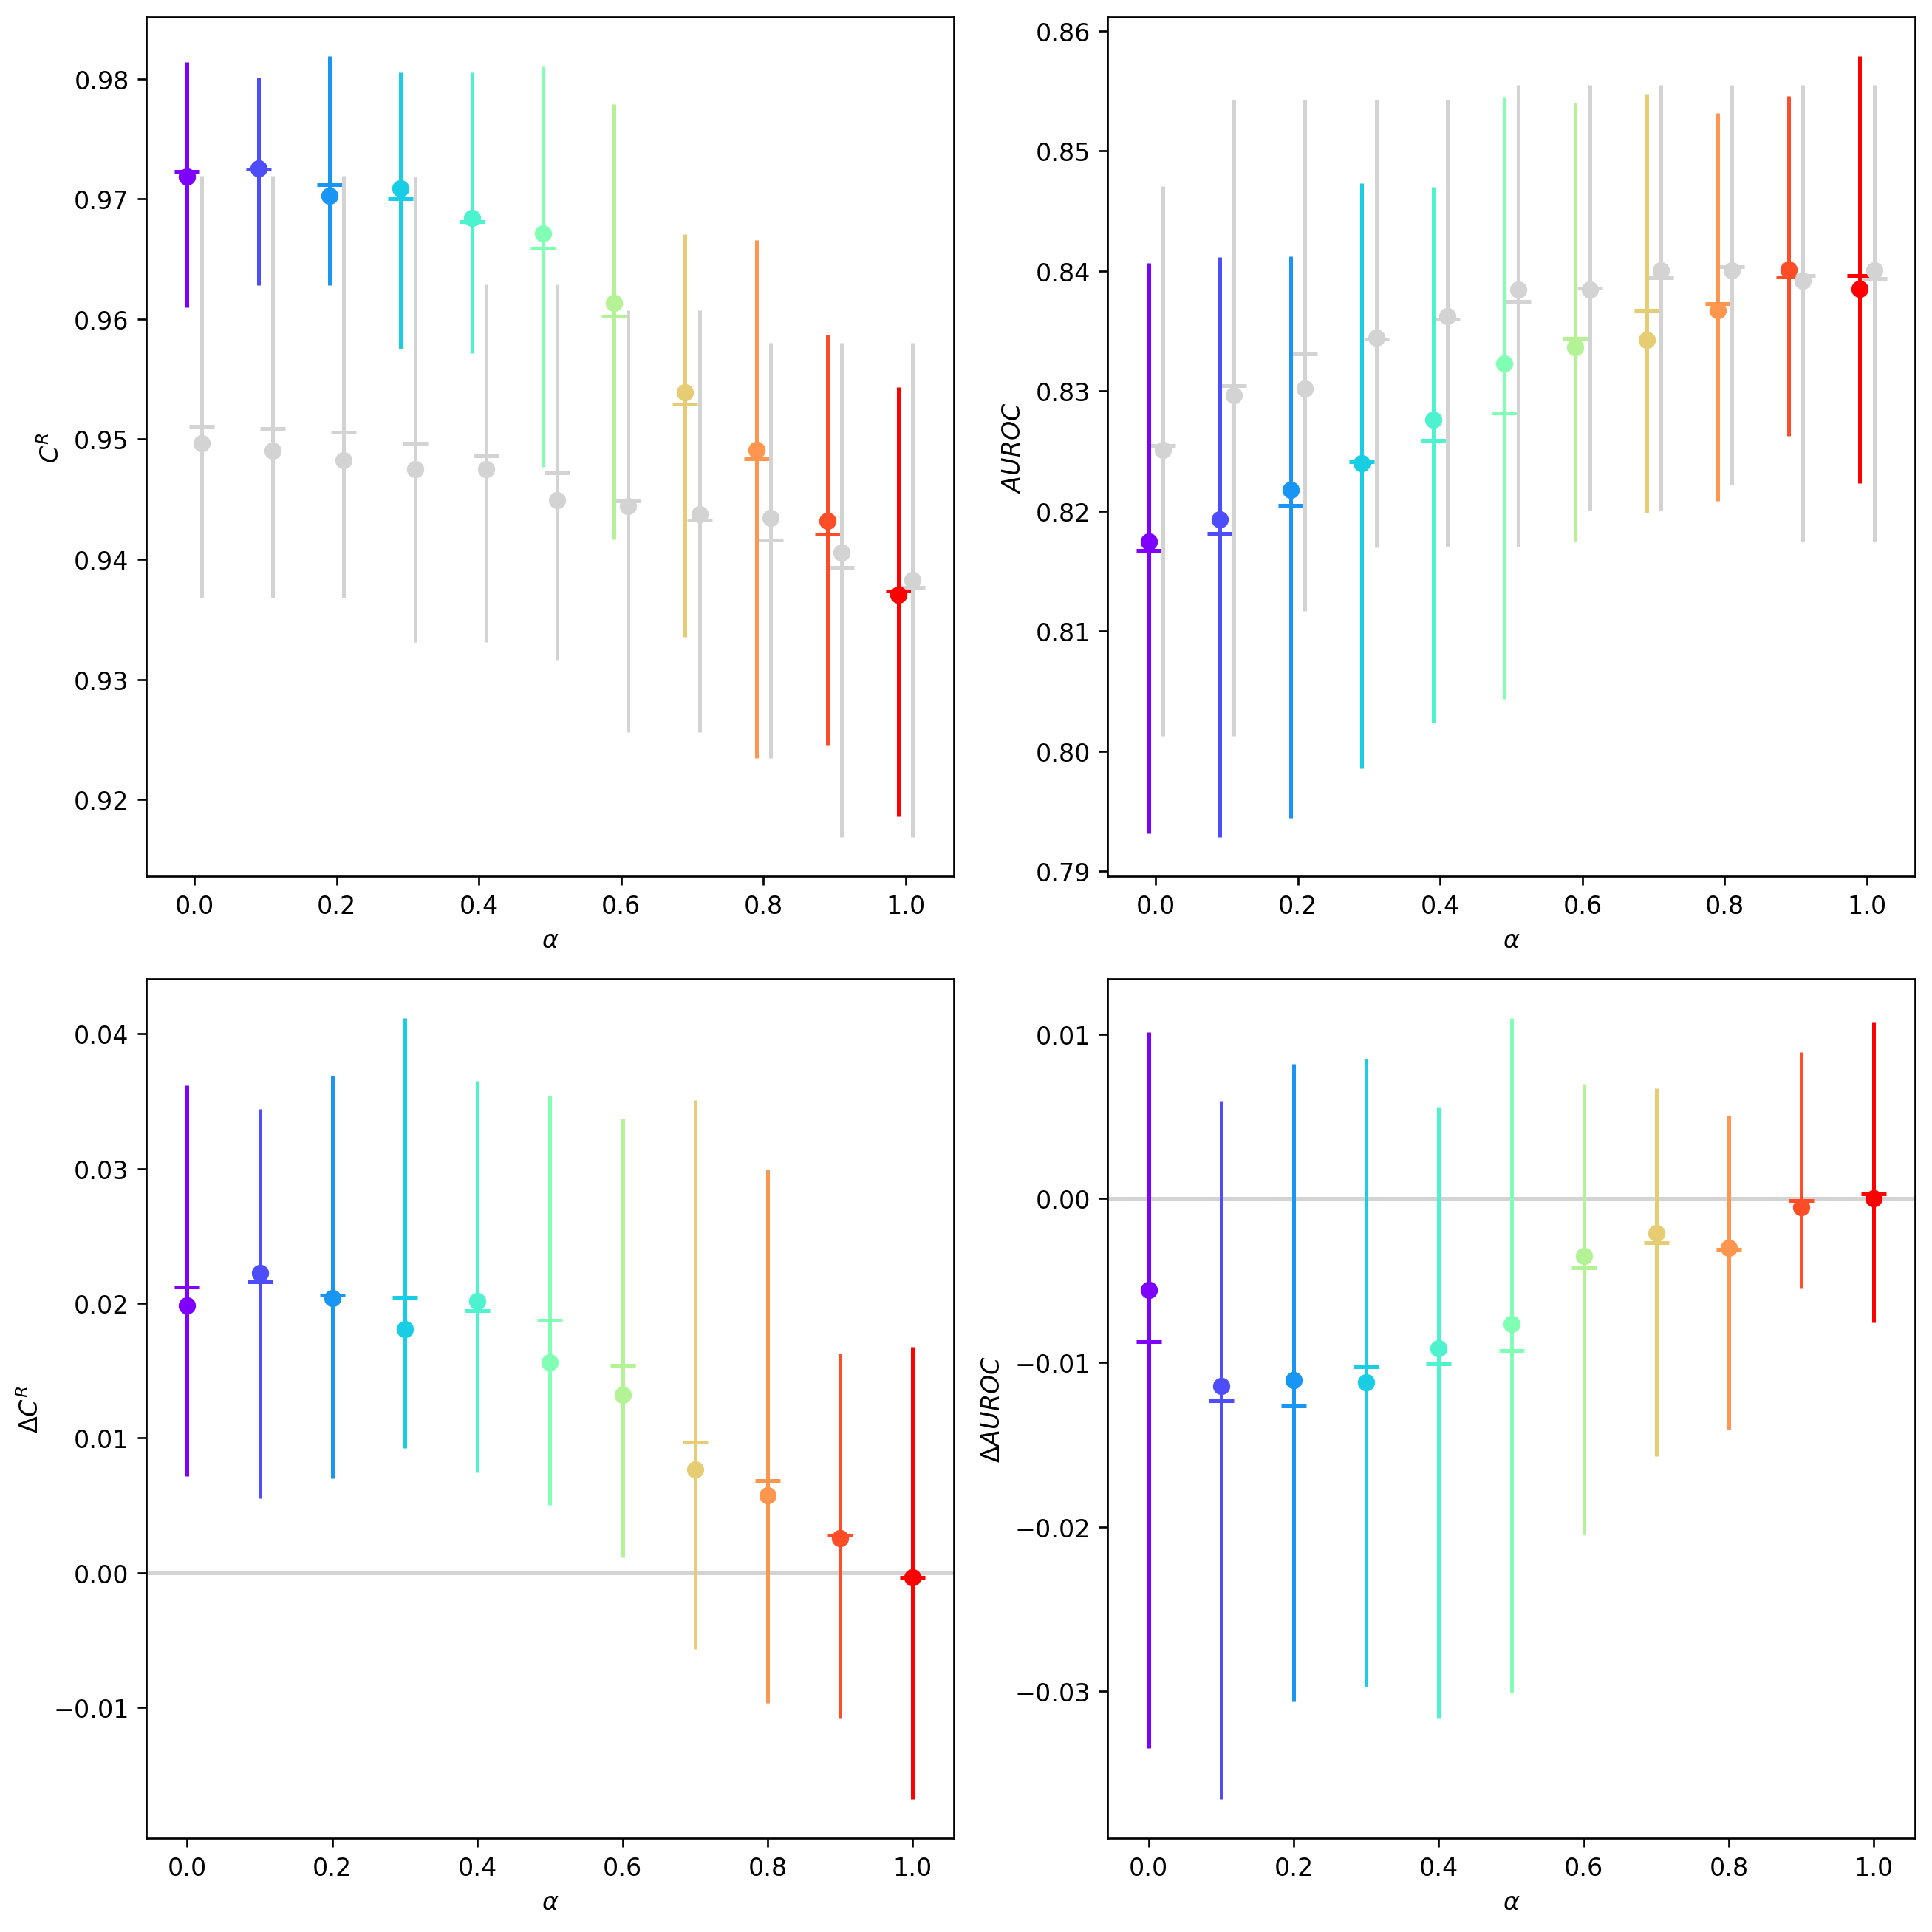

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(5.5*2,5.5*1), dpi=240)
for ax, column, display_name in zip(axs, ['RBC(e)', 'AUROC(f_u,e)'], [r'$C^R$', r'$AUROC$']):
    optimization_column = '{}_optimization'.format(column)
    selection_column = '{}_selection'.format(column)
    ua.get_ci_df(comparison_res_df, column=selection_column, ax=ax, x_eps=0.01, color_value=None, display_df=True)
    ua.get_ci_df(comparison_res_df, column=optimization_column, ax=ax, x_eps=-0.01, display_df=True)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()



fig, axs = plt.subplots(1, 2, figsize=(5.5*2,5.5*1), dpi=240)
for ax, column, display_name in zip(axs, ['ΔRBC(e)', 'ΔAUROC(f_u,e)'], [r'$\Delta C^R$', r'$\Delta AUROC$']):
    ua.get_ci_df(comparison_res_df, column=column, ax=ax)
    ax.set_ylabel(display_name)
    ax.axhline(0, color='lightgray', zorder=-1)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()


fig, axs = plt.subplots(2, 2, figsize=(5.5*2,5.5*2), dpi=240)
for ax, column, display_name in zip(axs[0], 
                                    ['RBC(e)', 'AUROC(f_u,e)'], 
                                    [r'$C^R$', r'$AUROC$']):
    
    optimization_column = '{}_optimization'.format(column)
    selection_column = '{}_selection'.format(column)
    ua.get_ci_df(comparison_res_df, column=selection_column, ax=ax, x_eps=0.01, color_value=None, display_df=False)
    ua.get_ci_df(comparison_res_df, column=optimization_column, ax=ax, x_eps=-0.01, display_df=False)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')


for ax, column, display_name in zip(axs[1], ['ΔRBC(e)', 'ΔAUROC(f_u,e)'], [r'$\Delta C^R$', r'$\Delta AUROC$']):
    ua.get_ci_df(comparison_res_df, column=column, ax=ax, display_df=False)
    ax.axhline(0, color='lightgray', zorder=-1)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()

# Bi-Level Comparison - Ignore Optimization if No Bigger Selection AUROC

In [51]:
sel_res = []
sel_res_idx = []

for idx, row in optimization_res_df.iterrows():
    f_o_rep, f_u_alpha = idx
    f_u_auroc = row['AUROC(f_u,ue)']
    
    fosor = selection_options_res_df[selection_options_res_df['f_o_rep']==f_o_rep]
    fosor_auroc = fosor[fosor['AUROC(f_u,ue)']>=f_u_auroc]
    
    if len(fosor_auroc)>1:
        sel_idx = fosor_auroc['RBC(ue)'].idxmax()
        sel = fosor.loc[sel_idx]

        sel_res.append(sel)
        sel_res_idx.append(idx)


        
    else:
        sel_idx = fosor['AUROC(f_u,ue)'].idxmax()
        sel = fosor.loc[sel_idx]
    
    #sel_res.append(sel)
    #sel_res_idx.append(idx)
    
selection_res_df = pd.DataFrame(sel_res, index=pd.MultiIndex.from_tuples(sel_res_idx, names=['f_o_rep', 'f_u_alpha']))
selection_res_df = selection_res_df.drop(columns='f_o_rep')
selection_res_df

f_o_name  f_o_C  AUROC(f_o,od)  AUROC(f_o,oe)  \
f_o_rep f_u_alpha                                                  
0       0.0               0   0.10       0.998638       0.777045   
        0.1               0   0.10       0.998638       0.777045   
        0.2               0   0.10       0.998638       0.777045   
        0.3               0   0.10       0.998638       0.777045   
        0.4               0   0.10       0.998638       0.777045   
...                     ...    ...            ...            ...   
39      0.6              39   0.01       1.000000       0.813959   
        0.7              39   0.01       1.000000       0.813959   
        0.8              39   0.01       1.000000       0.813959   
        0.9              39   0.01       1.000000       0.813959   
        1.0              39   0.01       1.000000       0.813959   

                   AUROC(f_o,ud)  AUROC(f_o,ue)  AUROC(f_o,e)     f_u_name  \
f_o_rep f_u_alpha                                                            
0       0.0             0.799334       0.782780       0.80381  00008_00001   
        0.1             0.799334       0.782780       0.80381  00008_00001   
        0.2             0.799334       0.782780       0.80381  00008_00001   
        0.3             0.799334       0.782780       0.80381  00008_00001   
        0.4             0.799334       0.782780       0.80381  00008_00001   
...                          ...            ...           ...          ...   
39      0.6             0.785515       0.772631       0.77089  00005_00001   
        0.7             0.785515       0.772631       0.77089  00015_00000   
        0.8             0.785515       0.772631       0.77089  00002_00000   
        0.9             0.785515       0.772631       0.77089  00002_00000   
        1.0             0.785515       0.772631       0.77089  00002_00000   

                   f_u_C  f_u_type  AUROC(f_u,ud)  AUROC(f_u,ue)  \
f_o_rep f_u_alpha                                                  
0       0.0        0.010  standard       0.968715       0.836676   
        0.1        0.010  standard       0.968715       0.836676   
        0.2        0.010  standard       0.968715       0.836676   
        0.3        0.010  standard       0.968715       0.836676   
        0.4        0.010  standard       0.968715       0.836676   
...                  ...       ...            ...            ...   
39      0.6        0.010  standard       0.990885       0.842738   
        0.7        0.001  standard       0.999768       0.844671   
        0.8        0.001  standard       0.999276       0.846773   
        0.9        0.001  standard       0.999276       0.846773   
        1.0        0.001  standard       0.999276       0.846773   

                   AUROC(f_u,e)   RBC(ud)   RBC(ue)    RBC(e)  
f_o_rep f_u_alpha                                              
0       0.0            0.841298  0.972344  0.965916  0.961526  
        0.1            0.841298  0.972344  0.965916  0.961526  
        0.2            0.841298  0.972344  0.965916  0.961526  
        0.3            0.841298  0.972344  0.965916  0.961526  
        0.4            0.841298  0.972344  0.965916  0.961526  
...                         ...       ...       ...       ...  
39      0.6            0.834196  0.999796  0.954040  0.946972  
        0.7            0.825803  0.999716  0.951426  0.937520  
        0.8            0.831793  0.999998  0.950665  0.938858  
        0.9            0.831793  0.999998  0.950665  0.938858  
        1.0            0.831793  0.999998  0.950665  0.938858  

[418 rows x 16 columns]

In [52]:
comparison_res_df = optimization_res_df.join(selection_res_df, 
                                             lsuffix='_optimization', rsuffix='_selection')
comparison_res_df

f_o_name_optimization  f_o_C_optimization  \
f_o_rep f_u_alpha                                              
0       0.0                            0                0.10   
        0.1                            0                0.10   
        0.2                            0                0.10   
        0.3                            0                0.10   
        0.4                            0                0.10   
...                                  ...                 ...   
39      0.6                           39                0.01   
        0.7                           39                0.01   
        0.8                           39                0.01   
        0.9                           39                0.01   
        1.0                           39                0.01   

                   AUROC(f_o,od)_optimization  AUROC(f_o,oe)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.998638                    0.777045   
        0.1                          0.998638                    0.777045   
        0.2                          0.998638                    0.777045   
        0.3                          0.998638                    0.777045   
        0.4                          0.998638                    0.777045   
...                                       ...                         ...   
39      0.6                          1.000000                    0.813959   
        0.7                          1.000000                    0.813959   
        0.8                          1.000000                    0.813959   
        0.9                          1.000000                    0.813959   
        1.0                          1.000000                    0.813959   

                   AUROC(f_o,ud)_optimization  AUROC(f_o,ue)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.799334                    0.782780   
        0.1                          0.799334                    0.782780   
        0.2                          0.799334                    0.782780   
        0.3                          0.799334                    0.782780   
        0.4                          0.799334                    0.782780   
...                                       ...                         ...   
39      0.6                          0.785515                    0.772631   
        0.7                          0.785515                    0.772631   
        0.8                          0.785515                    0.772631   
        0.9                          0.785515                    0.772631   
        1.0                          0.785515                    0.772631   

                   AUROC(f_o,e)_optimization f_u_name_optimization  \
f_o_rep f_u_alpha                                                    
0       0.0                          0.80381           00000_00011   
        0.1                          0.80381           00000_00001   
        0.2                          0.80381           00000_00002   
        0.3                          0.80381           00000_00014   
        0.4                          0.80381           00000_00015   
...                                      ...                   ...   
39      0.6                          0.77089           00000_00006   
        0.7                          0.77089           00000_00007   
        0.8                          0.77089           00000_00008   
        0.9                          0.77089           00000_00009   
        1.0                          0.77089           00000_00010   

                   f_u_C_optimization f_u_type_optimization  ...  \
f_o_rep f_u_alpha                                            ...   
0       0.0                     0.010            engineered  ...   
        0.1                     0.001            engineered  ...   

In [53]:
for c in ['RBC(e)', 'AUROC(f_u,e)']:
    comparison_res_df['Δ{}'.format(c)] = comparison_res_df['{}_optimization'.format(c)] - comparison_res_df['{}_selection'.format(c)]
comparison_res_df

f_o_name_optimization  f_o_C_optimization  \
f_o_rep f_u_alpha                                              
0       0.0                            0                0.10   
        0.1                            0                0.10   
        0.2                            0                0.10   
        0.3                            0                0.10   
        0.4                            0                0.10   
...                                  ...                 ...   
39      0.6                           39                0.01   
        0.7                           39                0.01   
        0.8                           39                0.01   
        0.9                           39                0.01   
        1.0                           39                0.01   

                   AUROC(f_o,od)_optimization  AUROC(f_o,oe)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.998638                    0.777045   
        0.1                          0.998638                    0.777045   
        0.2                          0.998638                    0.777045   
        0.3                          0.998638                    0.777045   
        0.4                          0.998638                    0.777045   
...                                       ...                         ...   
39      0.6                          1.000000                    0.813959   
        0.7                          1.000000                    0.813959   
        0.8                          1.000000                    0.813959   
        0.9                          1.000000                    0.813959   
        1.0                          1.000000                    0.813959   

                   AUROC(f_o,ud)_optimization  AUROC(f_o,ue)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.799334                    0.782780   
        0.1                          0.799334                    0.782780   
        0.2                          0.799334                    0.782780   
        0.3                          0.799334                    0.782780   
        0.4                          0.799334                    0.782780   
...                                       ...                         ...   
39      0.6                          0.785515                    0.772631   
        0.7                          0.785515                    0.772631   
        0.8                          0.785515                    0.772631   
        0.9                          0.785515                    0.772631   
        1.0                          0.785515                    0.772631   

                   AUROC(f_o,e)_optimization f_u_name_optimization  \
f_o_rep f_u_alpha                                                    
0       0.0                          0.80381           00000_00011   
        0.1                          0.80381           00000_00001   
        0.2                          0.80381           00000_00002   
        0.3                          0.80381           00000_00014   
        0.4                          0.80381           00000_00015   
...                                      ...                   ...   
39      0.6                          0.77089           00000_00006   
        0.7                          0.77089           00000_00007   
        0.8                          0.77089           00000_00008   
        0.9                          0.77089           00000_00009   
        1.0                          0.77089           00000_00010   

                   f_u_C_optimization f_u_type_optimization  ...  \
f_o_rep f_u_alpha                                            ...   
0       0.0                     0.010            engineered  ...   
        0.1                     0.001            engineered  ...   

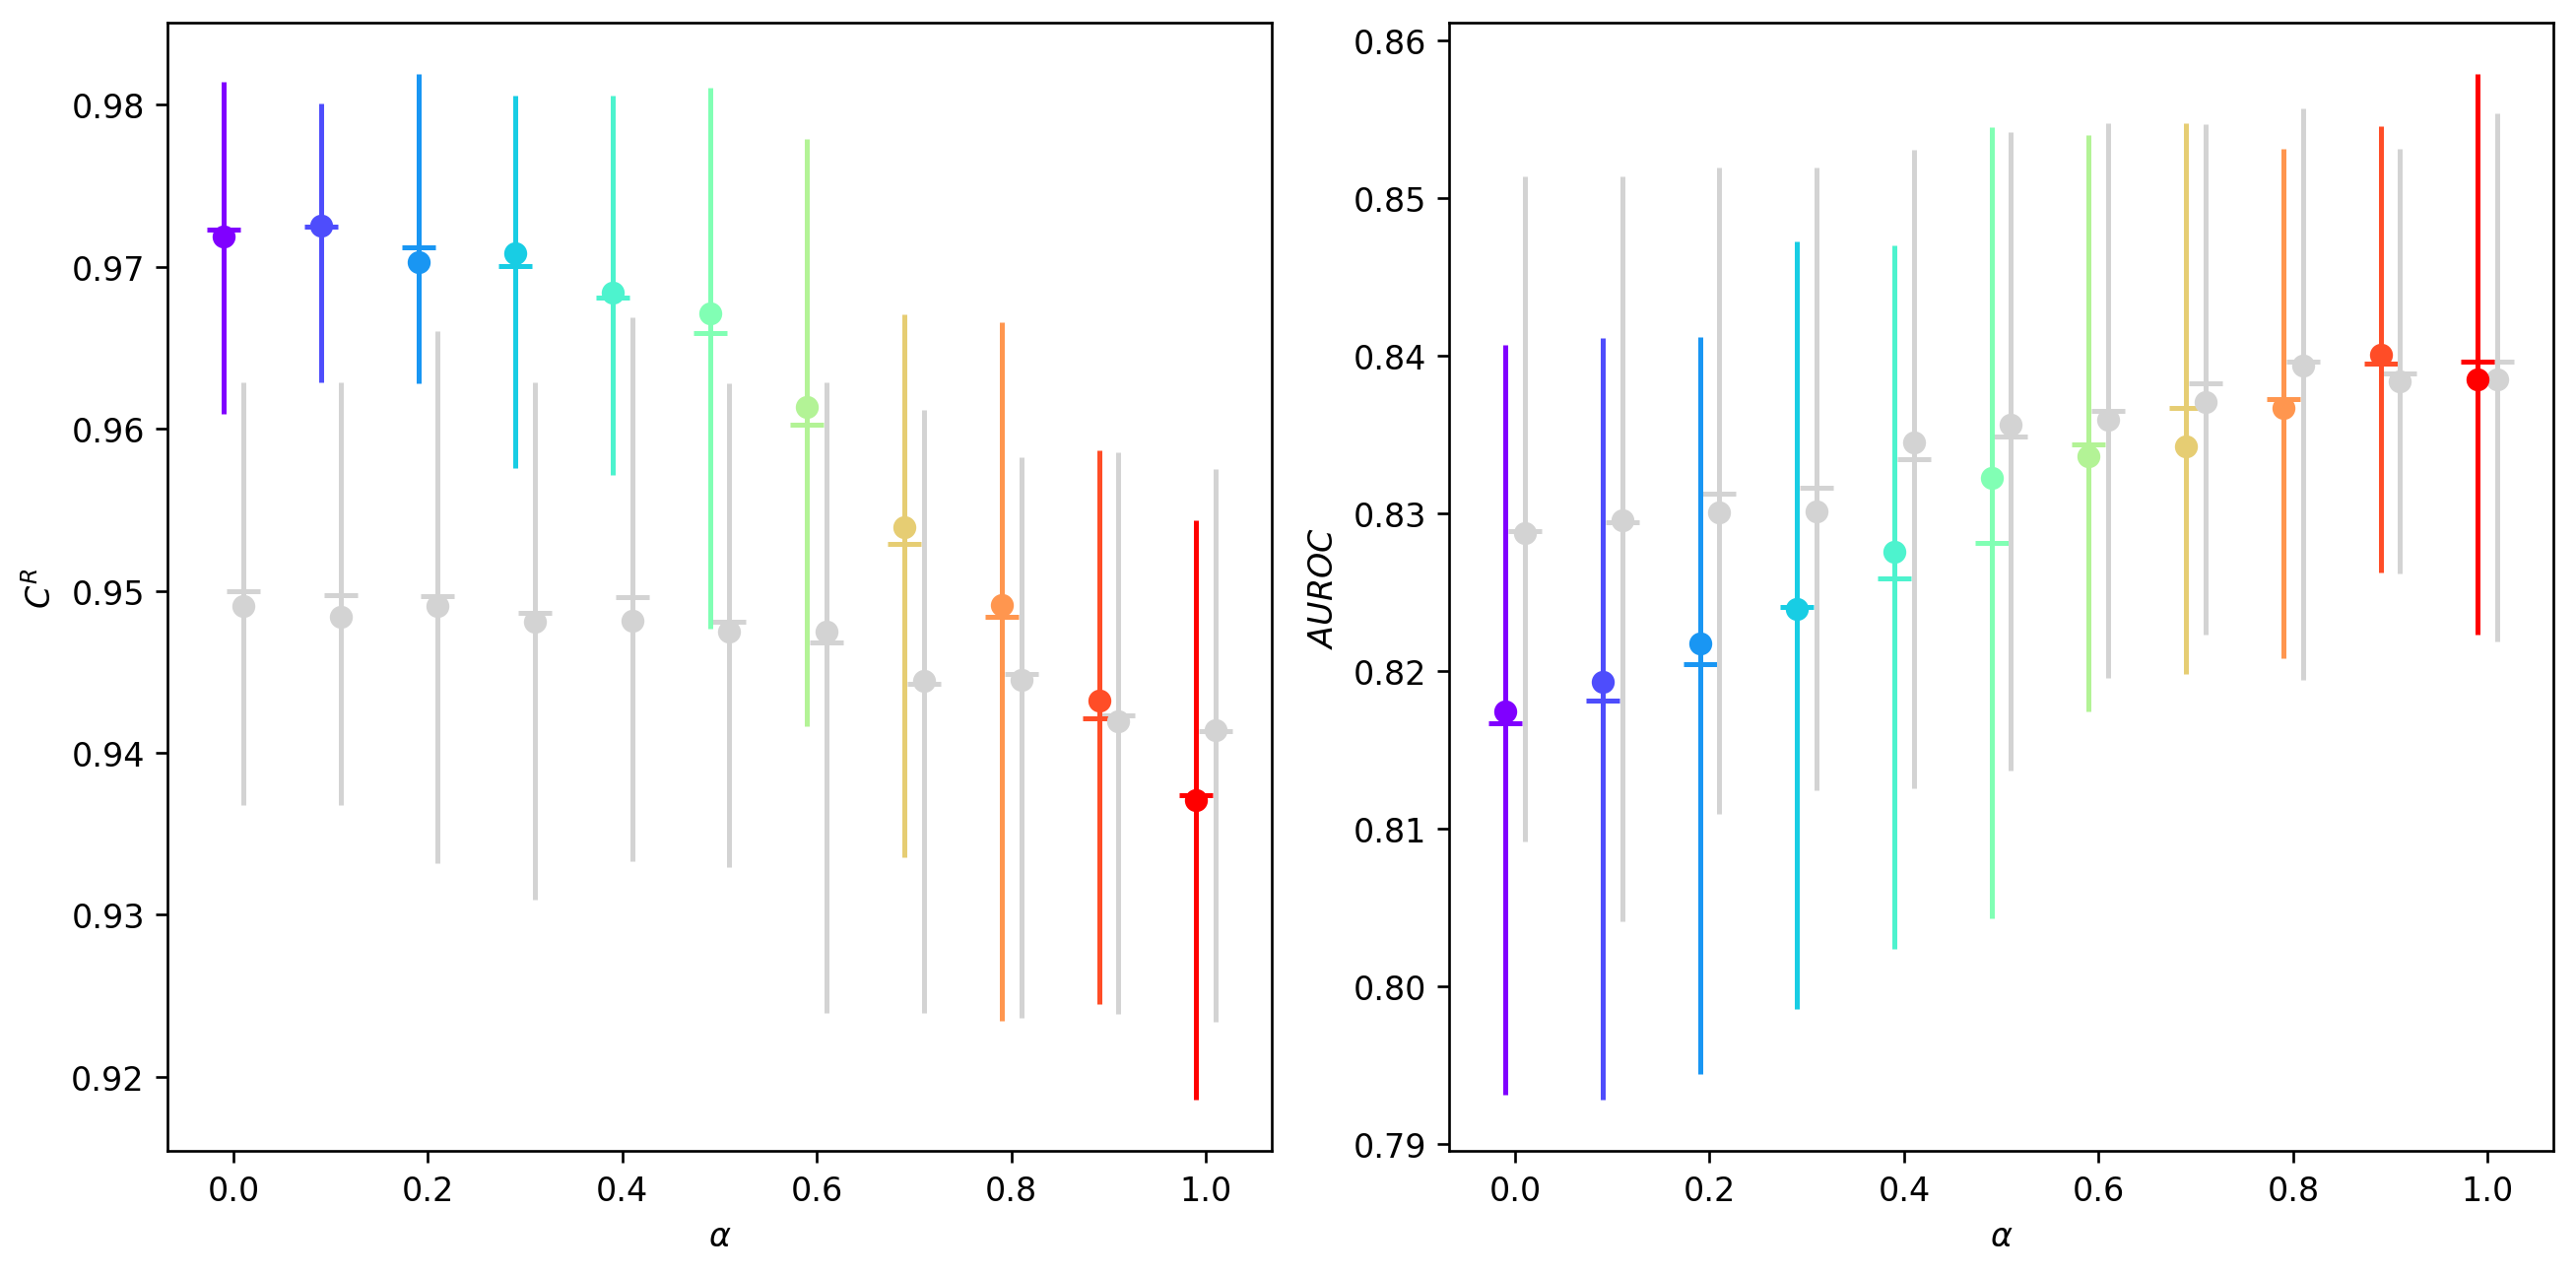

f_u_alpha            0.0        0.1        0.2        0.3        0.4  \
ΔRBC(e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
        mean    0.022301   0.022731   0.021532   0.021385   0.018497   
        std     0.008738   0.007770   0.008199   0.008000   0.007284   
        min     0.006608   0.004398   0.005181   0.009551   0.003892   
        2.5%    0.007156   0.008097   0.007313   0.009694   0.004373   
        50%     0.021778   0.023367   0.020629   0.019366   0.019355   
        97.5%   0.037484   0.036075   0.036822   0.037609   0.030327   
        max     0.046861   0.038244   0.037467   0.041098   0.030813   

f_u_alpha            0.5        0.6        0.7        0.8        0.9  \
ΔRBC(e) count  40.000000  39.000000  38.000000  37.000000  32.000000   
        mean    0.017811   0.013607   0.009033   0.004740   0.000051   
        std     0.007938   0.008059   0.007879   0.007299   0.007242   
        min     0.003208  -0.002592  -0.008539  -0.009642  -0.016008   
        2.5%    0.005035   0.000380  -0.005885  -0.007438  -0.014583   
        50%     0.017332   0.012474   0.007556   0.002871  -0.000158   
        97.5%   0.033740   0.033833   0.026981   0.018746   0.014237   
        max     0.034725   0.038459   0.034769   0.020768   0.016230   

f_u_alpha            1.0  
ΔRBC(e) count  32.000000  
        mean   -0.004505  
        std     0.008770  
        min    -0.026151  
        2.5%   -0.020715  
        50%    -0.005388  
        97.5%   0.010258  
        max     0.011740

f_u_alpha                  0.0        0.1        0.2        0.3        0.4  \
ΔAUROC(f_u,e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
              mean   -0.012169  -0.011311  -0.010803  -0.007539  -0.007541   
              std     0.012014   0.011660   0.009995   0.009693   0.008269   
              min    -0.040700  -0.051118  -0.034182  -0.034269  -0.031586   
              2.5%   -0.033449  -0.036591  -0.030621  -0.021056  -0.023212   
              50%    -0.010784  -0.009562  -0.008801  -0.006939  -0.007252   
              97.5%   0.010118   0.006352   0.003270   0.008364   0.005484   
              max     0.010797   0.007792   0.005361   0.008618   0.009349   

f_u_alpha                  0.5        0.6        0.7        0.8        0.9  \
ΔAUROC(f_u,e) count  40.000000  39.000000  38.000000  37.000000  32.000000   
              mean   -0.006724  -0.001999  -0.002184  -0.002031  -0.000552   
              std     0.008403   0.005269   0.003592   0.004149   0.003288   
              min    -0.030131  -0.013096  -0.011684  -0.013777  -0.006039   
              2.5%   -0.025092  -0.012689  -0.007385  -0.008292  -0.005956   
              50%    -0.005567  -0.002437  -0.002133  -0.002288  -0.001030   
              97.5%   0.005619   0.006892   0.004480   0.005595   0.006495   
              max     0.007305   0.007410   0.004750   0.006206   0.007521   

f_u_alpha                  1.0  
ΔAUROC(f_u,e) count  32.000000  
              mean   -0.000280  
              std     0.005112  
              min    -0.013361  
              2.5%   -0.008825  
              50%    -0.000479  
              97.5%   0.010654  
              max     0.010660

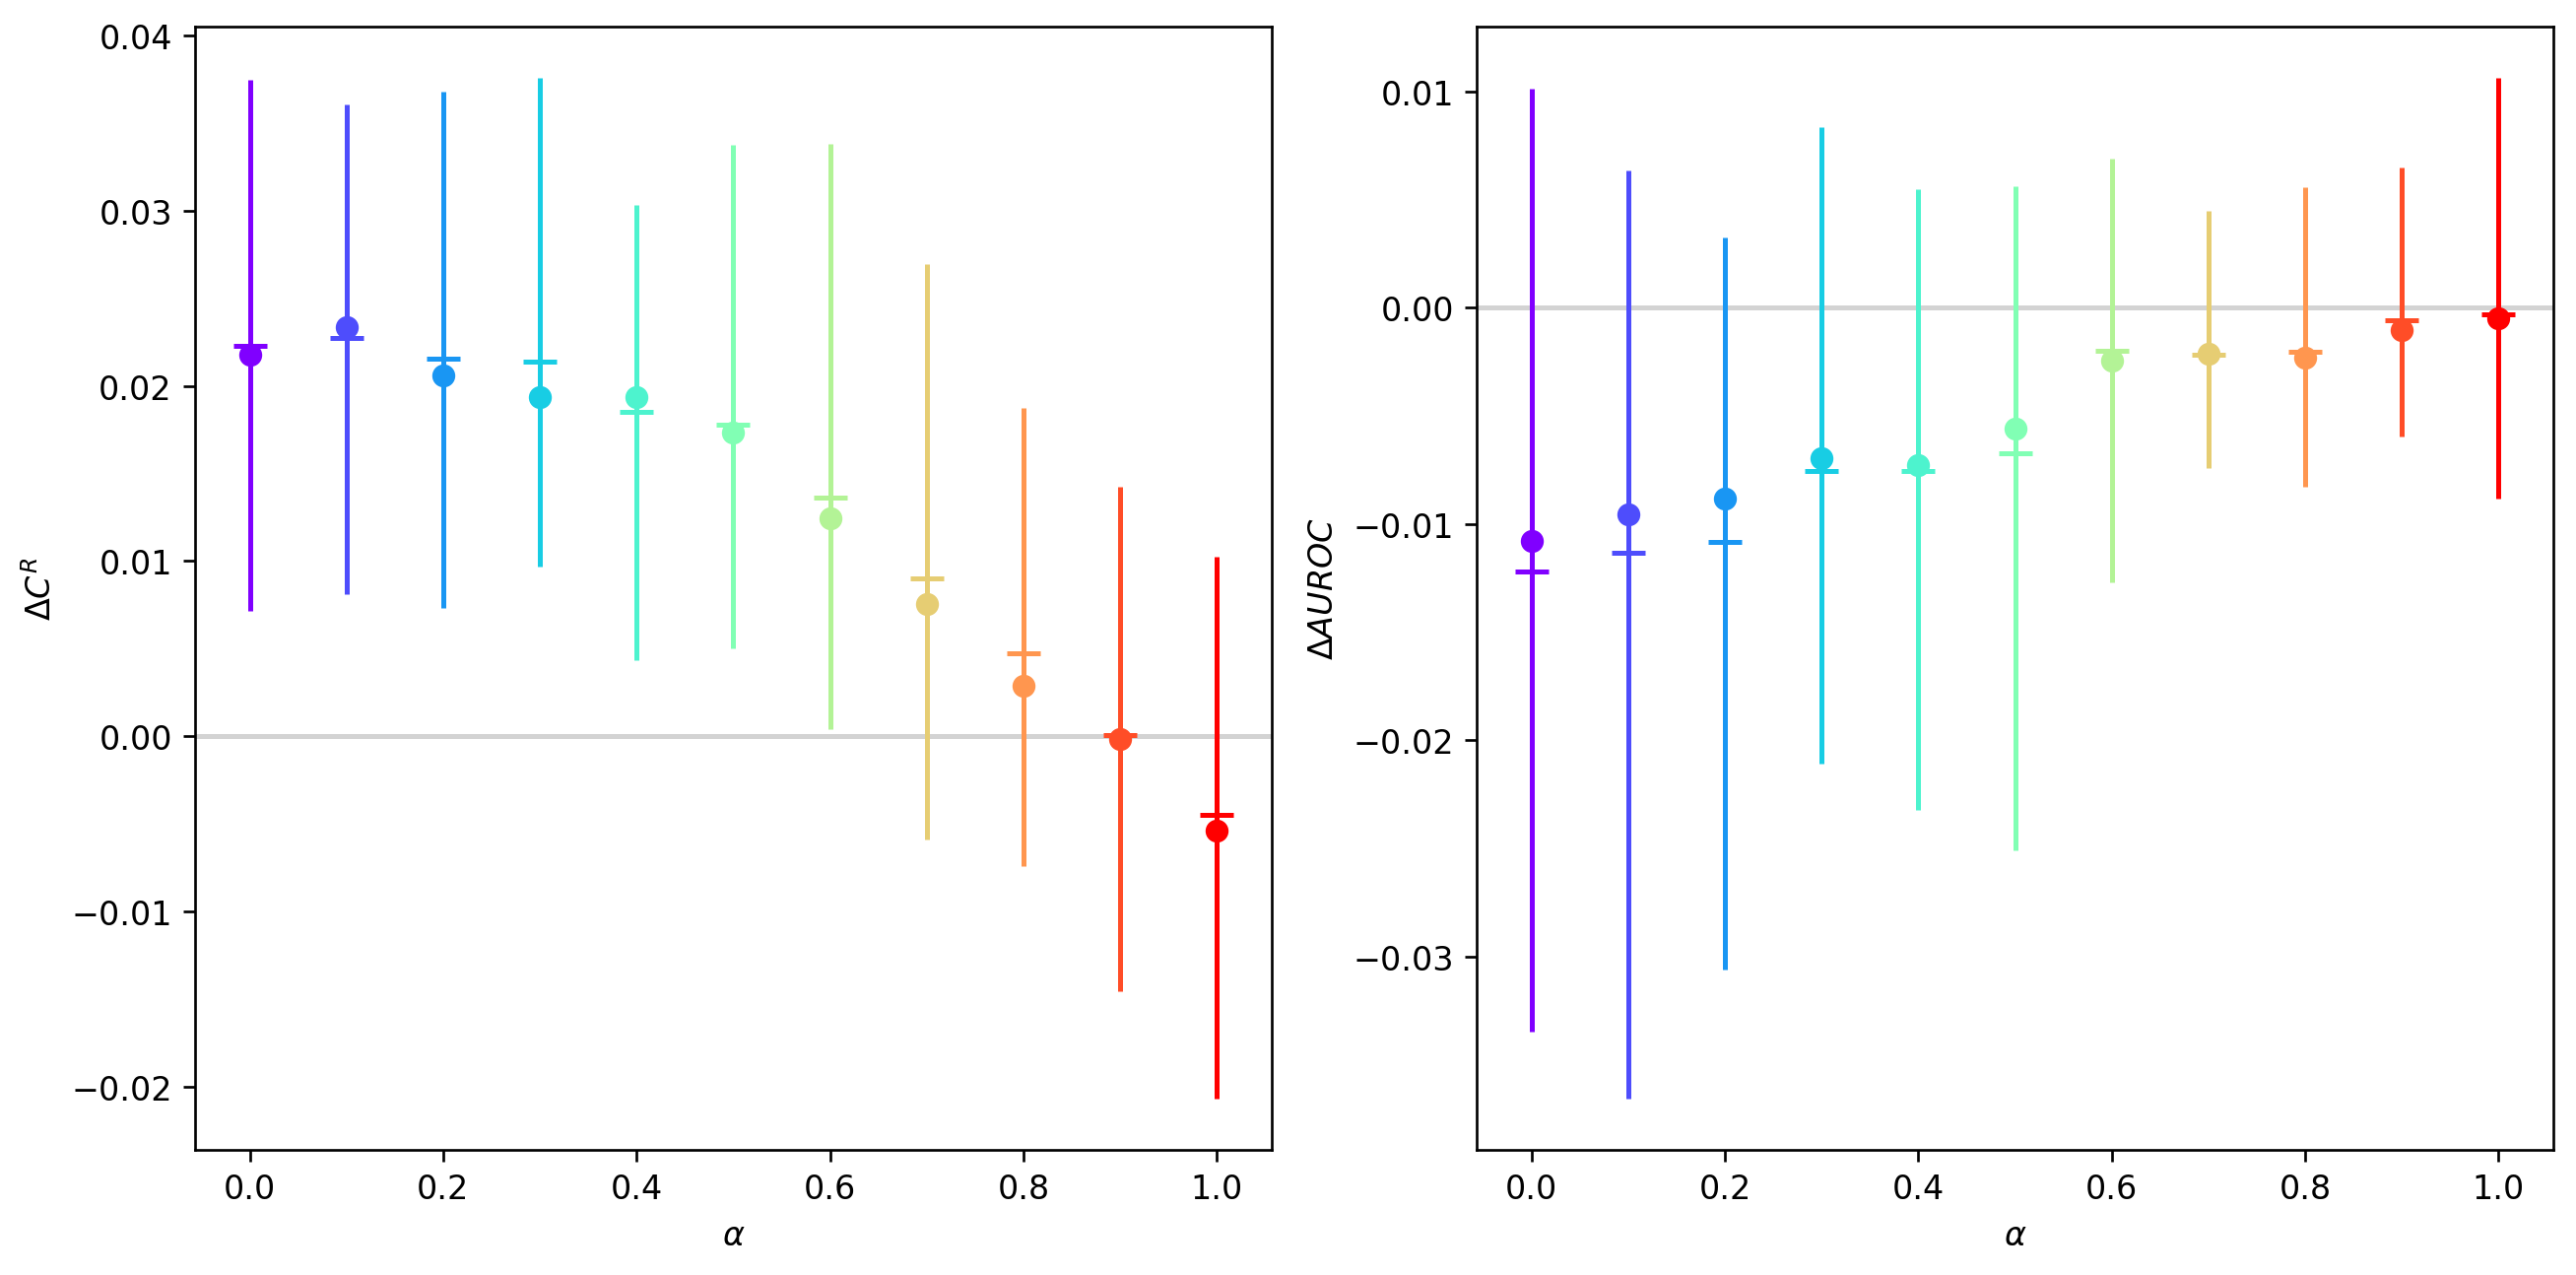

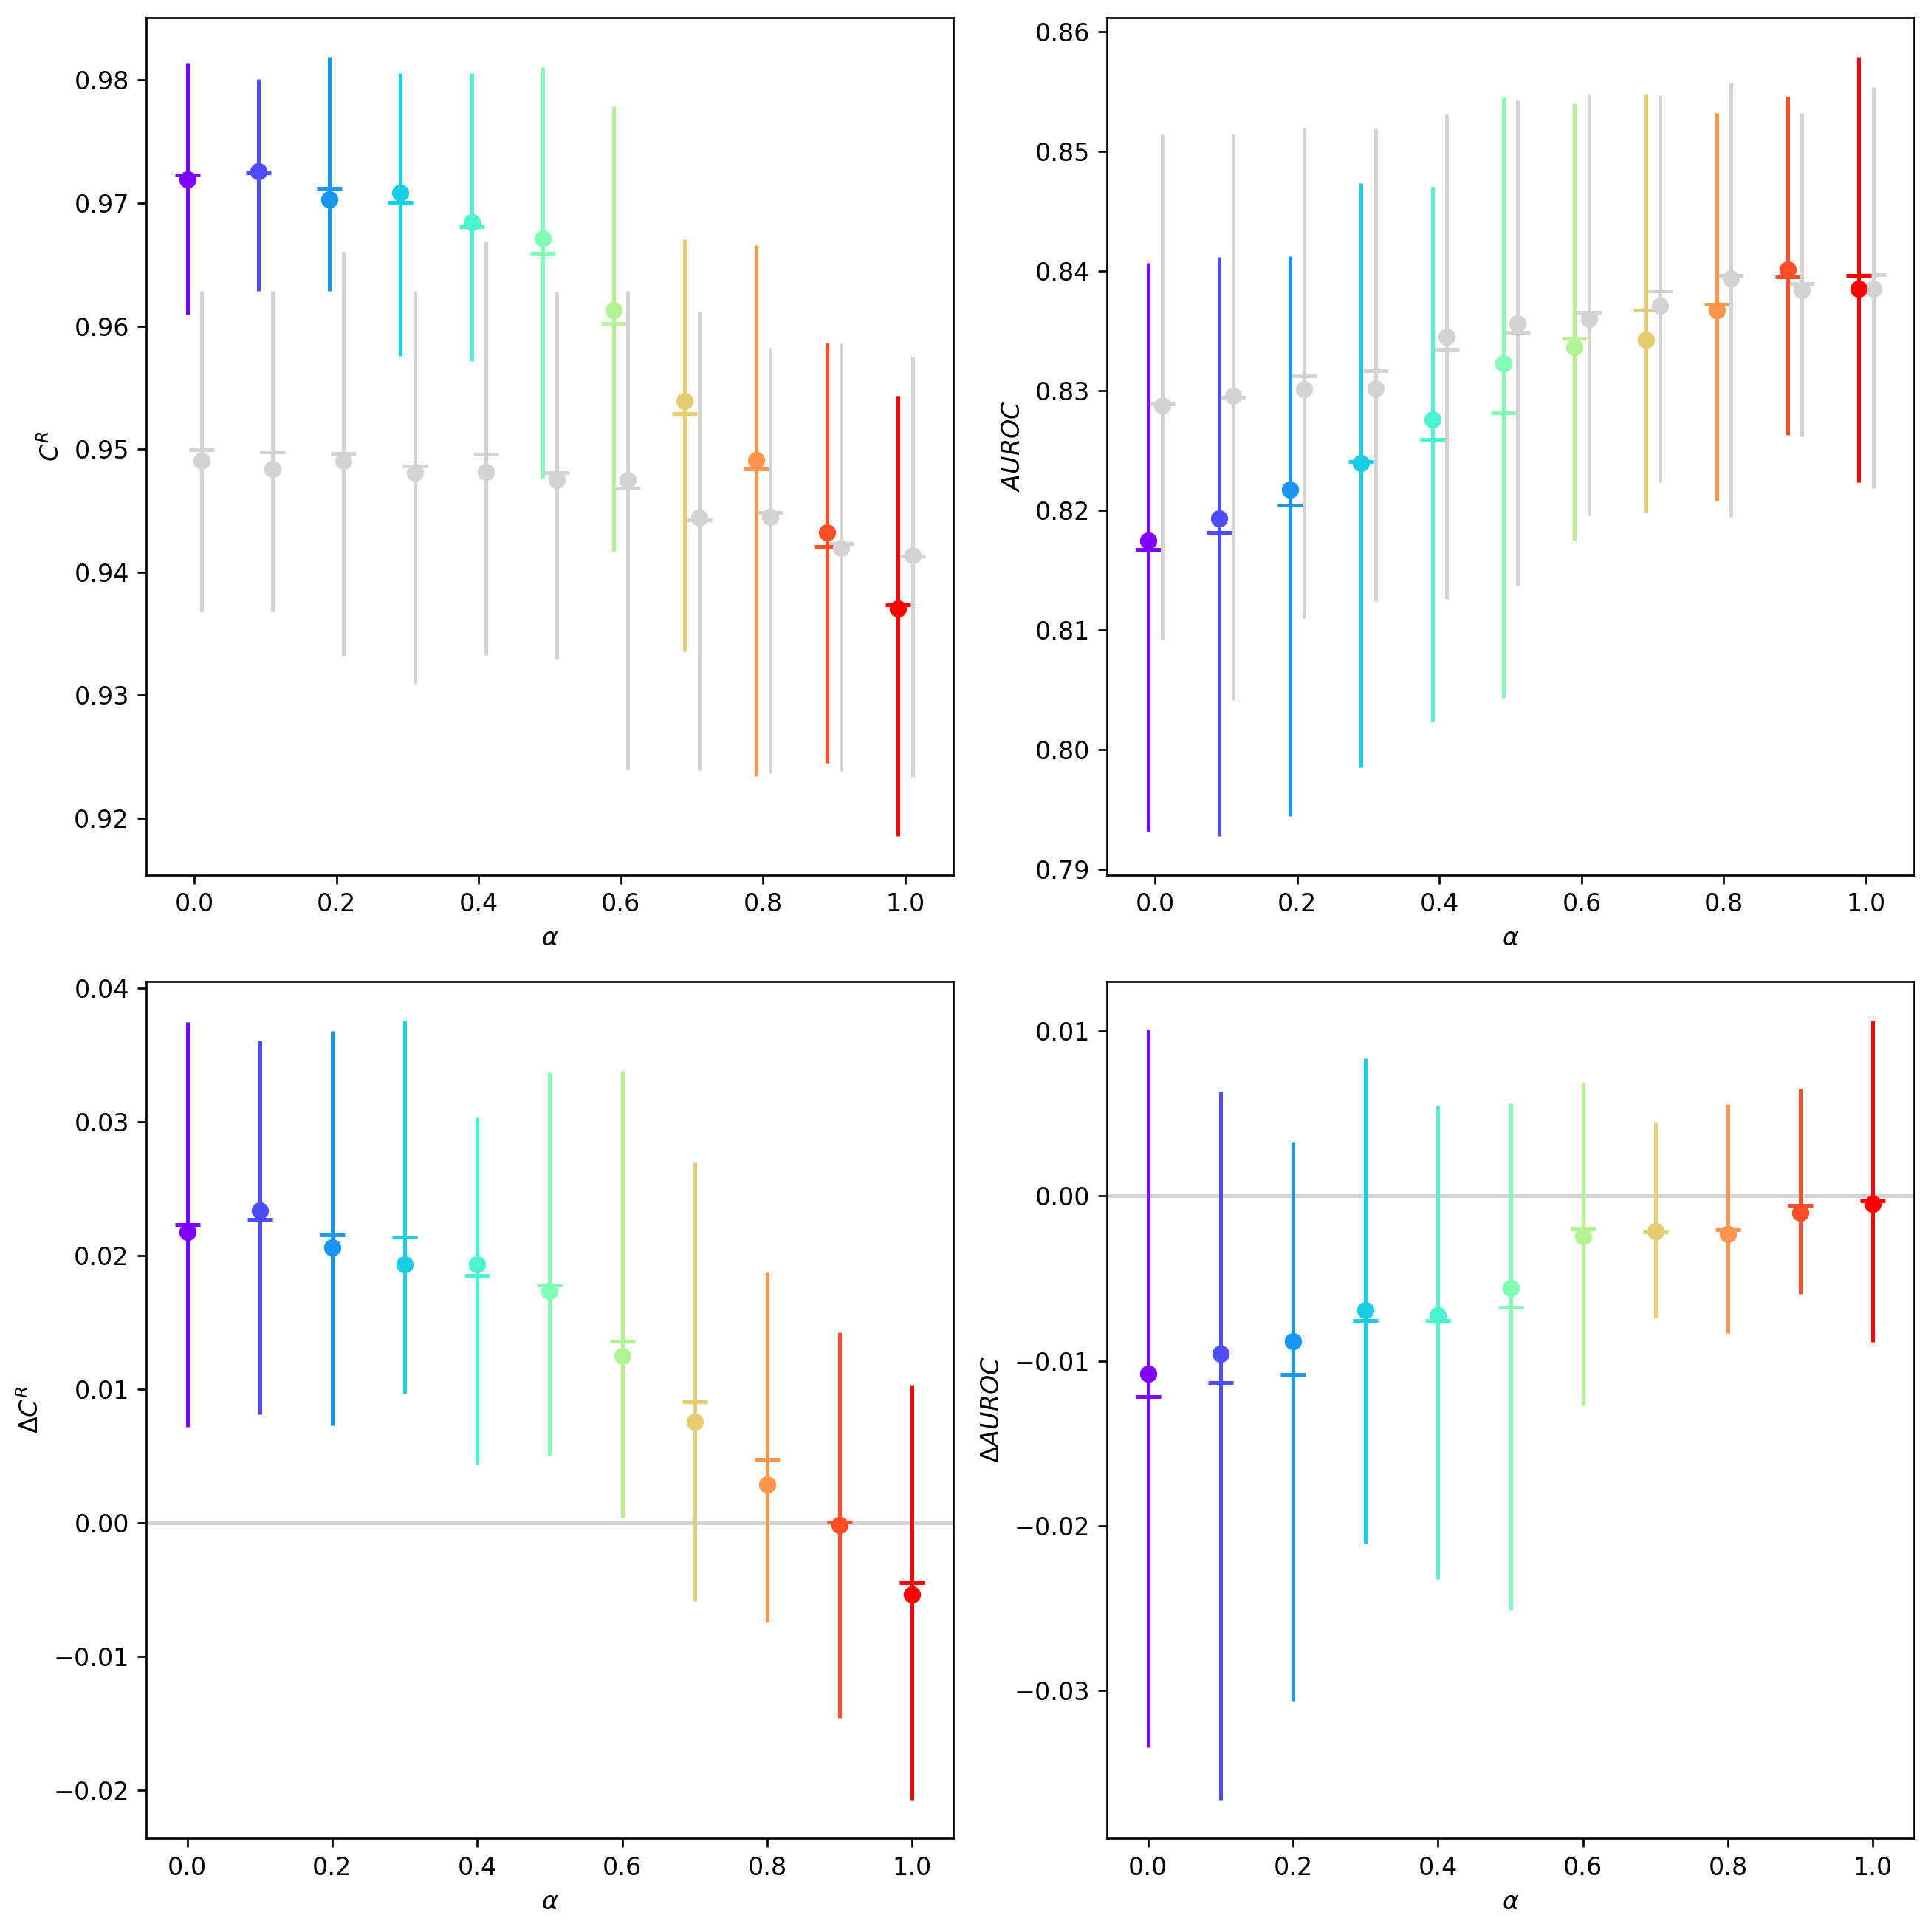

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(5.5*2,5.5*1), dpi=240)
for ax, column, display_name in zip(axs, ['RBC(e)', 'AUROC(f_u,e)'], [r'$C^R$', r'$AUROC$']):
    optimization_column = '{}_optimization'.format(column)
    selection_column = '{}_selection'.format(column)
    ua.get_ci_df(comparison_res_df, column=selection_column, ax=ax, x_eps=0.01, color_value=None, display_df=False)
    ua.get_ci_df(comparison_res_df, column=optimization_column, ax=ax, x_eps=-0.01, display_df=False)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(5.5*2,5.5*1), dpi=240)
for ax, column, display_name in zip(axs, ['ΔRBC(e)', 'ΔAUROC(f_u,e)'], [r'$\Delta C^R$', r'$\Delta AUROC$']):
    ua.get_ci_df(comparison_res_df, column=column, ax=ax)
    ax.set_ylabel(display_name)
    ax.axhline(0, color='lightgray', zorder=-1)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()


fig, axs = plt.subplots(2, 2, figsize=(5.5*2,5.5*2), dpi=240)
for ax, column, display_name in zip(axs[0], 
                                    ['RBC(e)', 'AUROC(f_u,e)'], 
                                    [r'$C^R$', r'$AUROC$']):
    
    optimization_column = '{}_optimization'.format(column)
    selection_column = '{}_selection'.format(column)
    ua.get_ci_df(comparison_res_df, column=selection_column, ax=ax, x_eps=0.01, color_value=None, display_df=False)
    ua.get_ci_df(comparison_res_df, column=optimization_column, ax=ax, x_eps=-0.01, display_df=False)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')


for ax, column, display_name in zip(axs[1], ['ΔRBC(e)', 'ΔAUROC(f_u,e)'], [r'$\Delta C^R$', r'$\Delta AUROC$']):
    ua.get_ci_df(comparison_res_df, column=column, ax=ax, display_df=False)
    ax.axhline(0, color='lightgray', zorder=-1)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()

# Bi-Level Comparison - Always Pull Biggest AUROC

In [55]:
sel_res = []
sel_res_idx = []

for idx, row in optimization_res_df.iterrows():
    f_o_rep, f_u_alpha = idx
    f_u_auroc = row['AUROC(f_u,ue)']
    
    fosor = selection_options_res_df[selection_options_res_df['f_o_rep']==f_o_rep]
    fosor_auroc = fosor[fosor['AUROC(f_u,ue)']>=f_u_auroc]
    
    if len(fosor_auroc)>1:
        sel_idx = fosor_auroc['RBC(ue)'].idxmax()
        sel = fosor.loc[sel_idx]
        
    else:
        sel_idx = fosor['AUROC(f_u,ue)'].idxmax()
        sel = fosor.loc[sel_idx]
    
    sel_res.append(sel)
    sel_res_idx.append(idx)
    
selection_res_df = pd.DataFrame(sel_res, index=pd.MultiIndex.from_tuples(sel_res_idx, names=['f_o_rep', 'f_u_alpha']))
selection_res_df = selection_res_df.drop(columns='f_o_rep')
selection_res_df

f_o_name  f_o_C  AUROC(f_o,od)  AUROC(f_o,oe)  \
f_o_rep f_u_alpha                                                  
0       0.0               0   0.10       0.998638       0.777045   
        0.1               0   0.10       0.998638       0.777045   
        0.2               0   0.10       0.998638       0.777045   
        0.3               0   0.10       0.998638       0.777045   
        0.4               0   0.10       0.998638       0.777045   
...                     ...    ...            ...            ...   
39      0.6              39   0.01       1.000000       0.813959   
        0.7              39   0.01       1.000000       0.813959   
        0.8              39   0.01       1.000000       0.813959   
        0.9              39   0.01       1.000000       0.813959   
        1.0              39   0.01       1.000000       0.813959   

                   AUROC(f_o,ud)  AUROC(f_o,ue)  AUROC(f_o,e)     f_u_name  \
f_o_rep f_u_alpha                                                            
0       0.0             0.799334       0.782780       0.80381  00008_00001   
        0.1             0.799334       0.782780       0.80381  00008_00001   
        0.2             0.799334       0.782780       0.80381  00008_00001   
        0.3             0.799334       0.782780       0.80381  00008_00001   
        0.4             0.799334       0.782780       0.80381  00008_00001   
...                          ...            ...           ...          ...   
39      0.6             0.785515       0.772631       0.77089  00005_00001   
        0.7             0.785515       0.772631       0.77089  00015_00000   
        0.8             0.785515       0.772631       0.77089  00002_00000   
        0.9             0.785515       0.772631       0.77089  00002_00000   
        1.0             0.785515       0.772631       0.77089  00002_00000   

                   f_u_C  f_u_type  AUROC(f_u,ud)  AUROC(f_u,ue)  \
f_o_rep f_u_alpha                                                  
0       0.0        0.010  standard       0.968715       0.836676   
        0.1        0.010  standard       0.968715       0.836676   
        0.2        0.010  standard       0.968715       0.836676   
        0.3        0.010  standard       0.968715       0.836676   
        0.4        0.010  standard       0.968715       0.836676   
...                  ...       ...            ...            ...   
39      0.6        0.010  standard       0.990885       0.842738   
        0.7        0.001  standard       0.999768       0.844671   
        0.8        0.001  standard       0.999276       0.846773   
        0.9        0.001  standard       0.999276       0.846773   
        1.0        0.001  standard       0.999276       0.846773   

                   AUROC(f_u,e)   RBC(ud)   RBC(ue)    RBC(e)  
f_o_rep f_u_alpha                                              
0       0.0            0.841298  0.972344  0.965916  0.961526  
        0.1            0.841298  0.972344  0.965916  0.961526  
        0.2            0.841298  0.972344  0.965916  0.961526  
        0.3            0.841298  0.972344  0.965916  0.961526  
        0.4            0.841298  0.972344  0.965916  0.961526  
...                         ...       ...       ...       ...  
39      0.6            0.834196  0.999796  0.954040  0.946972  
        0.7            0.825803  0.999716  0.951426  0.937520  
        0.8            0.831793  0.999998  0.950665  0.938858  
        0.9            0.831793  0.999998  0.950665  0.938858  
        1.0            0.831793  0.999998  0.950665  0.938858  

[440 rows x 16 columns]

In [56]:
comparison_res_df = optimization_res_df.join(selection_res_df, 
                                             lsuffix='_optimization', rsuffix='_selection')
comparison_res_df

f_o_name_optimization  f_o_C_optimization  \
f_o_rep f_u_alpha                                              
0       0.0                            0                0.10   
        0.1                            0                0.10   
        0.2                            0                0.10   
        0.3                            0                0.10   
        0.4                            0                0.10   
...                                  ...                 ...   
39      0.6                           39                0.01   
        0.7                           39                0.01   
        0.8                           39                0.01   
        0.9                           39                0.01   
        1.0                           39                0.01   

                   AUROC(f_o,od)_optimization  AUROC(f_o,oe)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.998638                    0.777045   
        0.1                          0.998638                    0.777045   
        0.2                          0.998638                    0.777045   
        0.3                          0.998638                    0.777045   
        0.4                          0.998638                    0.777045   
...                                       ...                         ...   
39      0.6                          1.000000                    0.813959   
        0.7                          1.000000                    0.813959   
        0.8                          1.000000                    0.813959   
        0.9                          1.000000                    0.813959   
        1.0                          1.000000                    0.813959   

                   AUROC(f_o,ud)_optimization  AUROC(f_o,ue)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.799334                    0.782780   
        0.1                          0.799334                    0.782780   
        0.2                          0.799334                    0.782780   
        0.3                          0.799334                    0.782780   
        0.4                          0.799334                    0.782780   
...                                       ...                         ...   
39      0.6                          0.785515                    0.772631   
        0.7                          0.785515                    0.772631   
        0.8                          0.785515                    0.772631   
        0.9                          0.785515                    0.772631   
        1.0                          0.785515                    0.772631   

                   AUROC(f_o,e)_optimization f_u_name_optimization  \
f_o_rep f_u_alpha                                                    
0       0.0                          0.80381           00000_00011   
        0.1                          0.80381           00000_00001   
        0.2                          0.80381           00000_00002   
        0.3                          0.80381           00000_00014   
        0.4                          0.80381           00000_00015   
...                                      ...                   ...   
39      0.6                          0.77089           00000_00006   
        0.7                          0.77089           00000_00007   
        0.8                          0.77089           00000_00008   
        0.9                          0.77089           00000_00009   
        1.0                          0.77089           00000_00010   

                   f_u_C_optimization f_u_type_optimization  ...  \
f_o_rep f_u_alpha                                            ...   
0       0.0                     0.010            engineered  ...   
        0.1                     0.001            engineered  ...   

In [57]:
for c in ['RBC(e)', 'AUROC(f_u,e)']:
    comparison_res_df['Δ{}'.format(c)] = comparison_res_df['{}_optimization'.format(c)] - comparison_res_df['{}_selection'.format(c)]
comparison_res_df

f_o_name_optimization  f_o_C_optimization  \
f_o_rep f_u_alpha                                              
0       0.0                            0                0.10   
        0.1                            0                0.10   
        0.2                            0                0.10   
        0.3                            0                0.10   
        0.4                            0                0.10   
...                                  ...                 ...   
39      0.6                           39                0.01   
        0.7                           39                0.01   
        0.8                           39                0.01   
        0.9                           39                0.01   
        1.0                           39                0.01   

                   AUROC(f_o,od)_optimization  AUROC(f_o,oe)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.998638                    0.777045   
        0.1                          0.998638                    0.777045   
        0.2                          0.998638                    0.777045   
        0.3                          0.998638                    0.777045   
        0.4                          0.998638                    0.777045   
...                                       ...                         ...   
39      0.6                          1.000000                    0.813959   
        0.7                          1.000000                    0.813959   
        0.8                          1.000000                    0.813959   
        0.9                          1.000000                    0.813959   
        1.0                          1.000000                    0.813959   

                   AUROC(f_o,ud)_optimization  AUROC(f_o,ue)_optimization  \
f_o_rep f_u_alpha                                                           
0       0.0                          0.799334                    0.782780   
        0.1                          0.799334                    0.782780   
        0.2                          0.799334                    0.782780   
        0.3                          0.799334                    0.782780   
        0.4                          0.799334                    0.782780   
...                                       ...                         ...   
39      0.6                          0.785515                    0.772631   
        0.7                          0.785515                    0.772631   
        0.8                          0.785515                    0.772631   
        0.9                          0.785515                    0.772631   
        1.0                          0.785515                    0.772631   

                   AUROC(f_o,e)_optimization f_u_name_optimization  \
f_o_rep f_u_alpha                                                    
0       0.0                          0.80381           00000_00011   
        0.1                          0.80381           00000_00001   
        0.2                          0.80381           00000_00002   
        0.3                          0.80381           00000_00014   
        0.4                          0.80381           00000_00015   
...                                      ...                   ...   
39      0.6                          0.77089           00000_00006   
        0.7                          0.77089           00000_00007   
        0.8                          0.77089           00000_00008   
        0.9                          0.77089           00000_00009   
        1.0                          0.77089           00000_00010   

                   f_u_C_optimization f_u_type_optimization  ...  \
f_o_rep f_u_alpha                                            ...   
0       0.0                     0.010            engineered  ...   
        0.1                     0.001            engineered  ...   

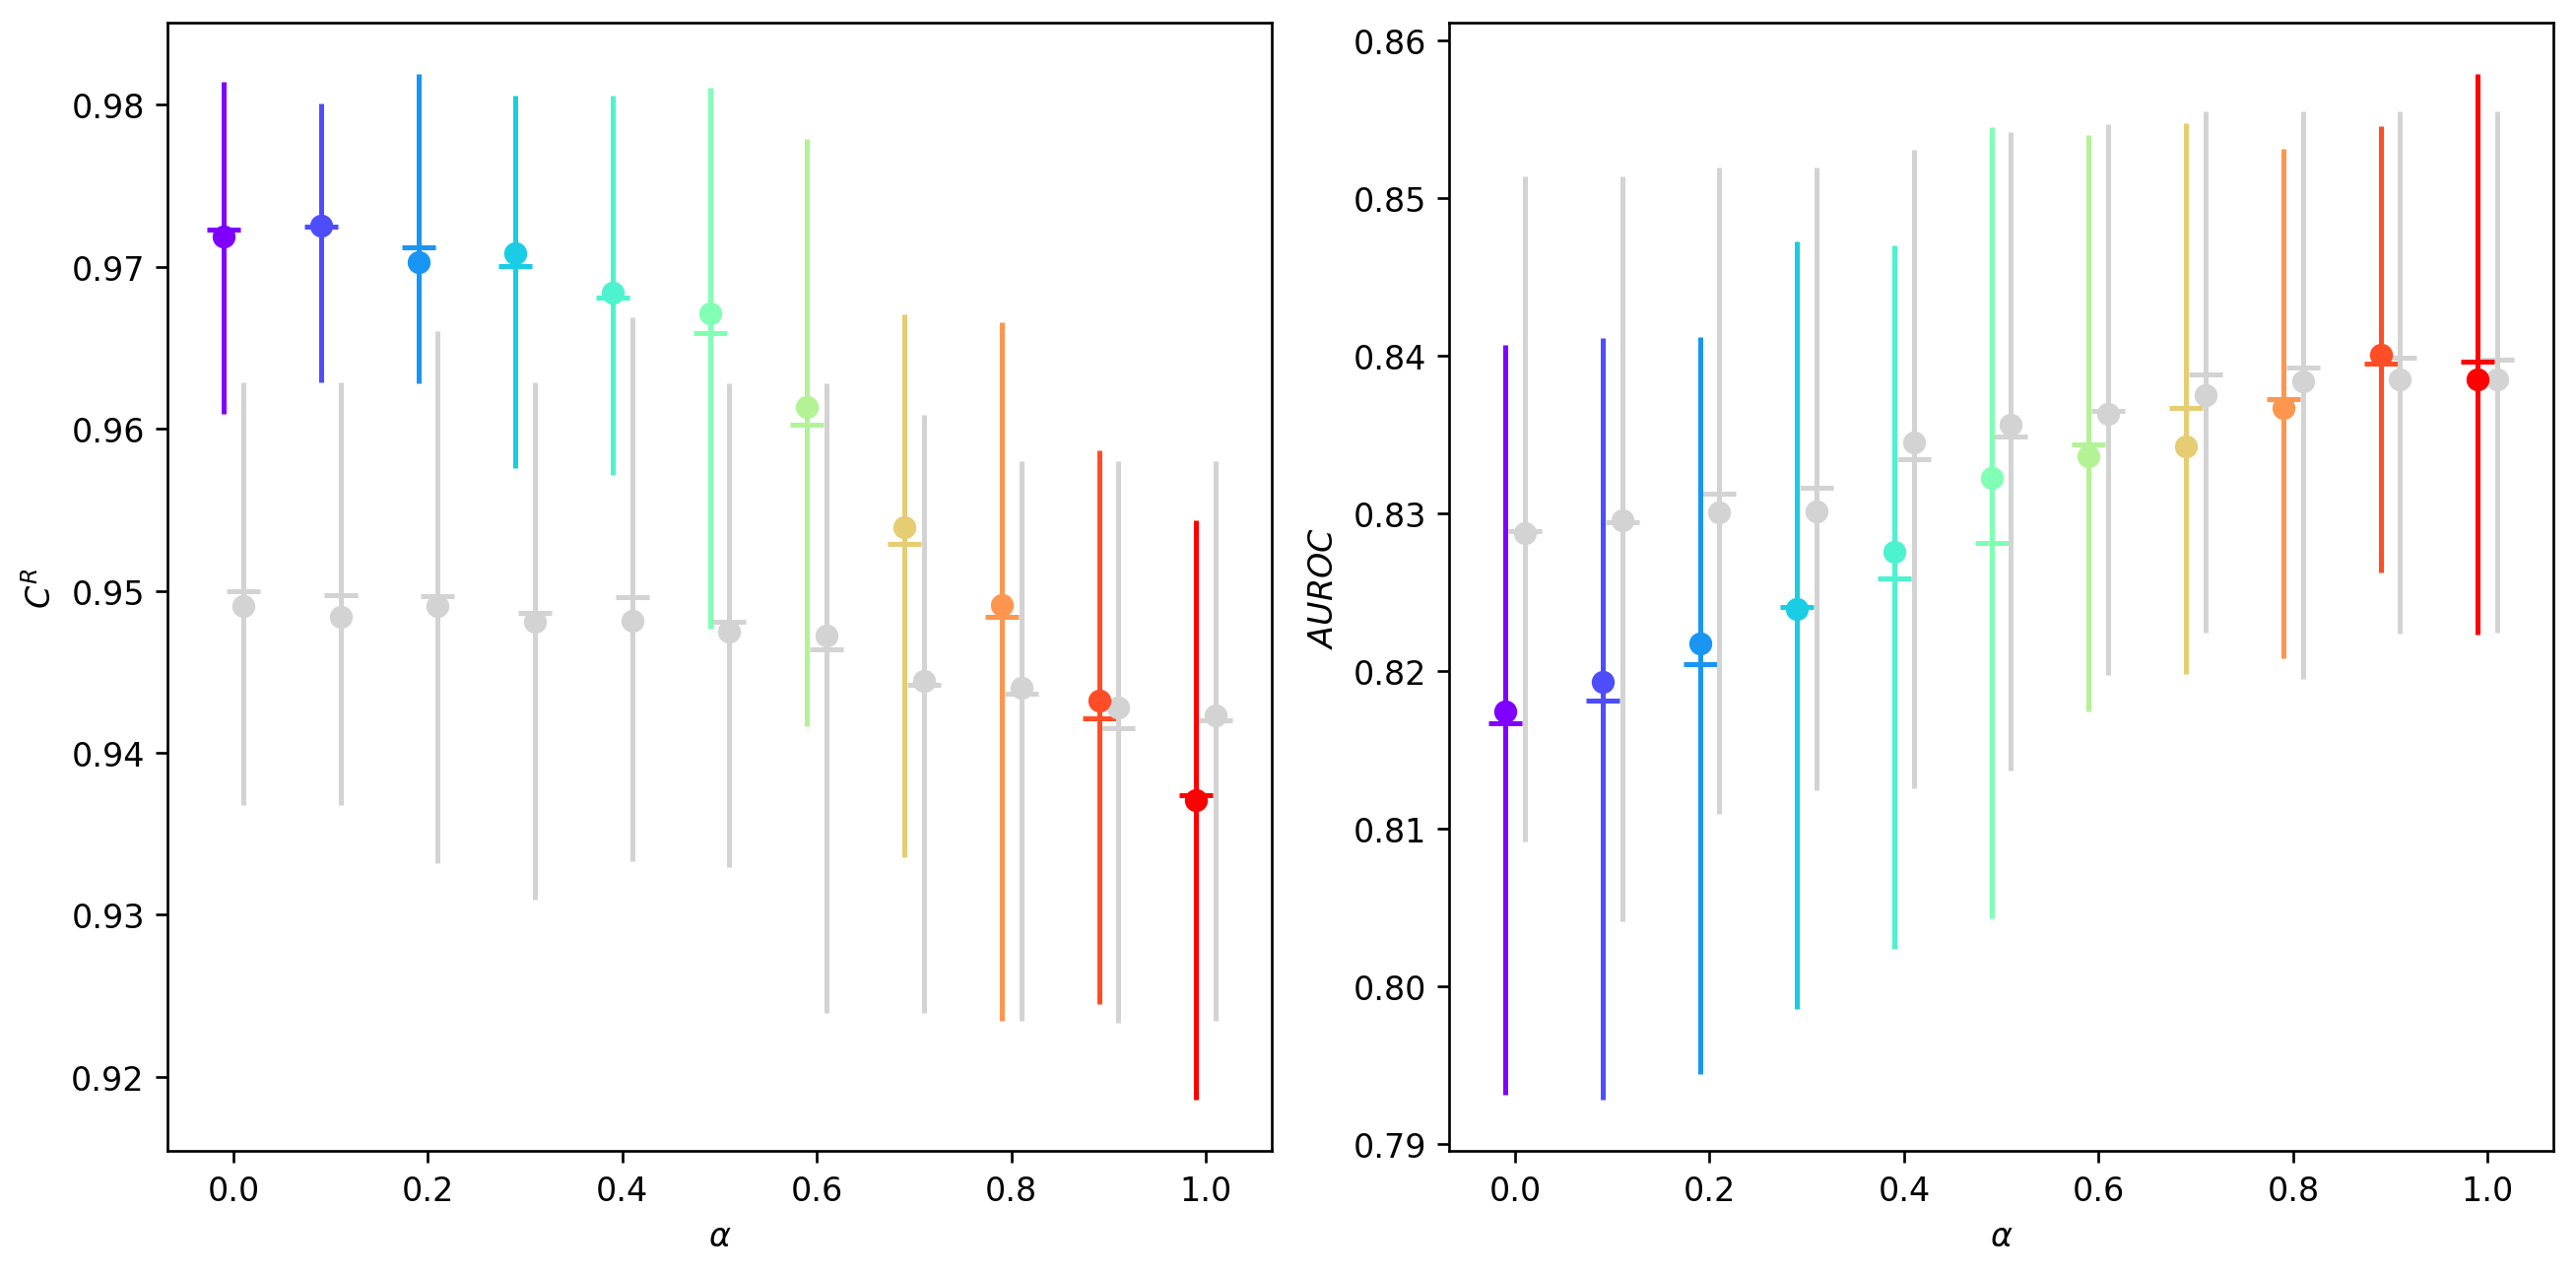

f_u_alpha            0.0        0.1        0.2        0.3        0.4  \
ΔRBC(e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
        mean    0.022301   0.022731   0.021532   0.021385   0.018497   
        std     0.008738   0.007770   0.008199   0.008000   0.007284   
        min     0.006608   0.004398   0.005181   0.009551   0.003892   
        2.5%    0.007156   0.008097   0.007313   0.009694   0.004373   
        50%     0.021778   0.023367   0.020629   0.019366   0.019355   
        97.5%   0.037484   0.036075   0.036822   0.037609   0.030327   
        max     0.046861   0.038244   0.037467   0.041098   0.030813   

f_u_alpha            0.5        0.6        0.7        0.8        0.9  \
ΔRBC(e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
        mean    0.017811   0.013841   0.008707   0.004739   0.000566   
        std     0.007938   0.008092   0.008017   0.007305   0.007159   
        min     0.003208  -0.002592  -0.008539  -0.009642  -0.016008   
        2.5%    0.005035   0.000459  -0.005741  -0.007255  -0.014215   
        50%     0.017332   0.012729   0.007556   0.002604   0.000119   
        97.5%   0.033740   0.033711   0.026560   0.018577   0.013723   
        max     0.034725   0.038459   0.034769   0.020768   0.016230   

f_u_alpha            1.0  
ΔRBC(e) count  40.000000  
        mean   -0.004622  
        std     0.008464  
        min    -0.026151  
        2.5%   -0.019312  
        50%    -0.005486  
        97.5%   0.009876  
        max     0.011740

f_u_alpha                  0.0        0.1        0.2        0.3        0.4  \
ΔAUROC(f_u,e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
              mean   -0.012169  -0.011311  -0.010803  -0.007539  -0.007541   
              std     0.012014   0.011660   0.009995   0.009693   0.008269   
              min    -0.040700  -0.051118  -0.034182  -0.034269  -0.031586   
              2.5%   -0.033449  -0.036591  -0.030621  -0.021056  -0.023212   
              50%    -0.010784  -0.009562  -0.008801  -0.006939  -0.007252   
              97.5%   0.010118   0.006352   0.003270   0.008364   0.005484   
              max     0.010797   0.007792   0.005361   0.008618   0.009349   

f_u_alpha                  0.5        0.6        0.7        0.8        0.9  \
ΔAUROC(f_u,e) count  40.000000  40.000000  40.000000  40.000000  40.000000   
              mean   -0.006724  -0.002149  -0.002111  -0.002014  -0.000388   
              std     0.008403   0.005286   0.003559   0.004106   0.003304   
              min    -0.030131  -0.013096  -0.011684  -0.013777  -0.006039   
              2.5%   -0.025092  -0.012679  -0.007153  -0.007835  -0.005934   
              50%    -0.005567  -0.002940  -0.002133  -0.001890  -0.000768   
              97.5%   0.005619   0.006878   0.004466   0.005544   0.006230   
              max     0.007305   0.007410   0.004750   0.006206   0.007521   

f_u_alpha                  1.0  
ΔAUROC(f_u,e) count  40.000000  
              mean   -0.000144  
              std     0.004755  
              min    -0.013361  
              2.5%   -0.007654  
              50%    -0.000200  
              97.5%   0.010652  
              max     0.010660

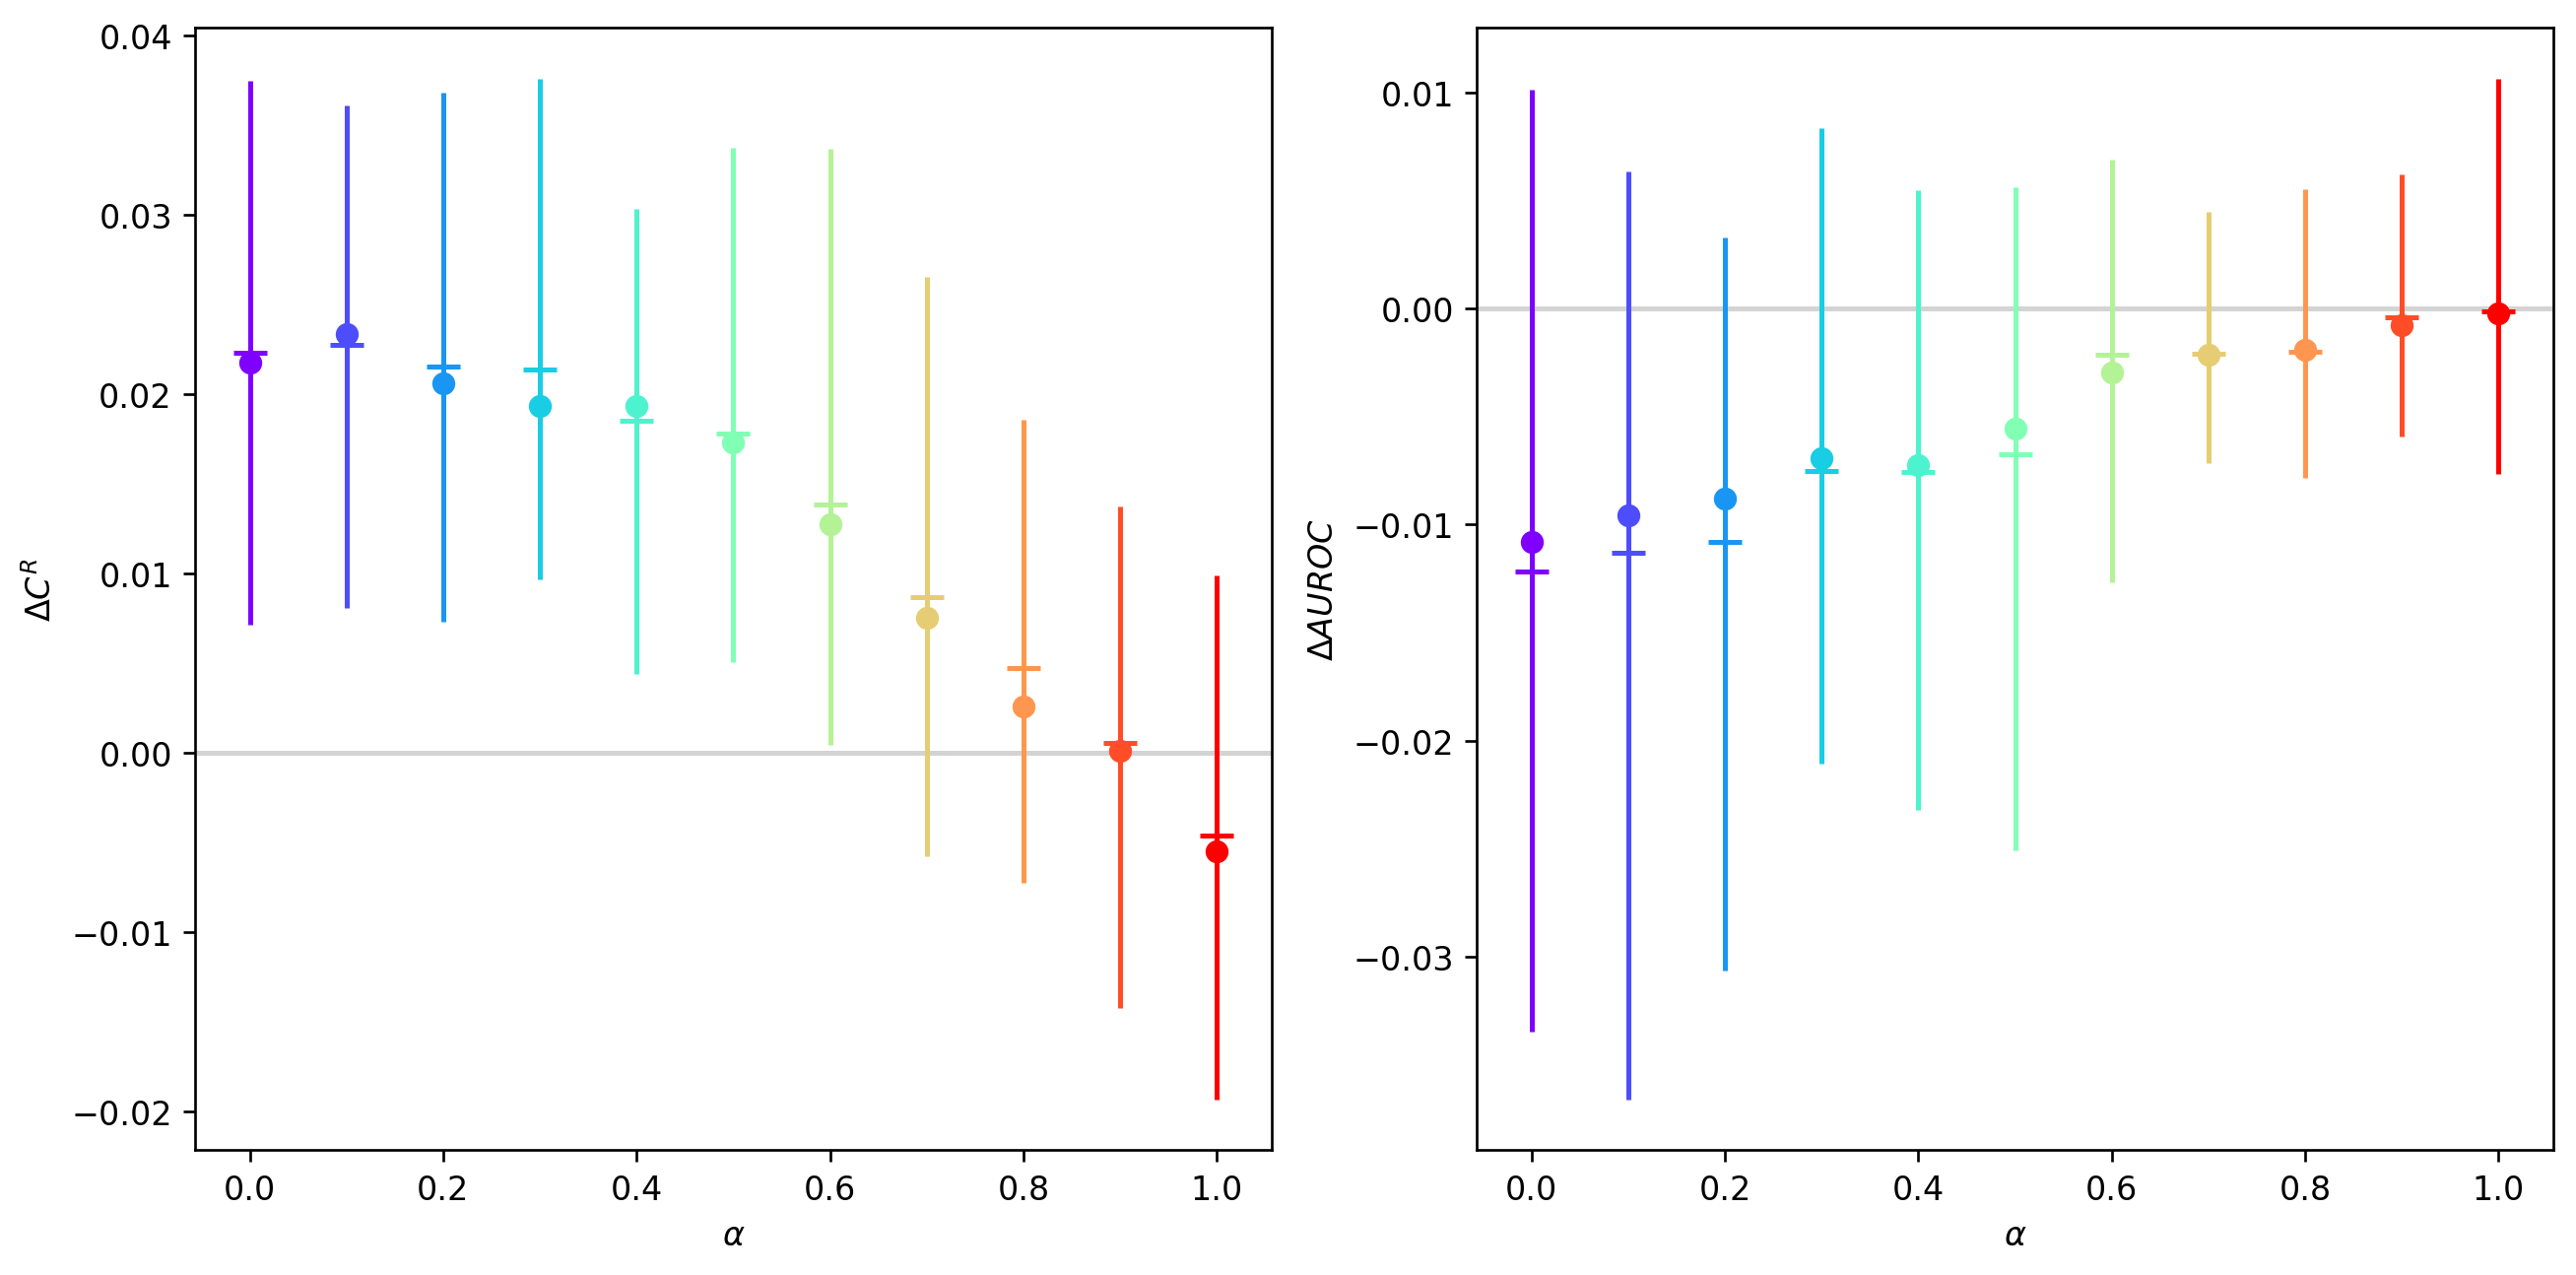

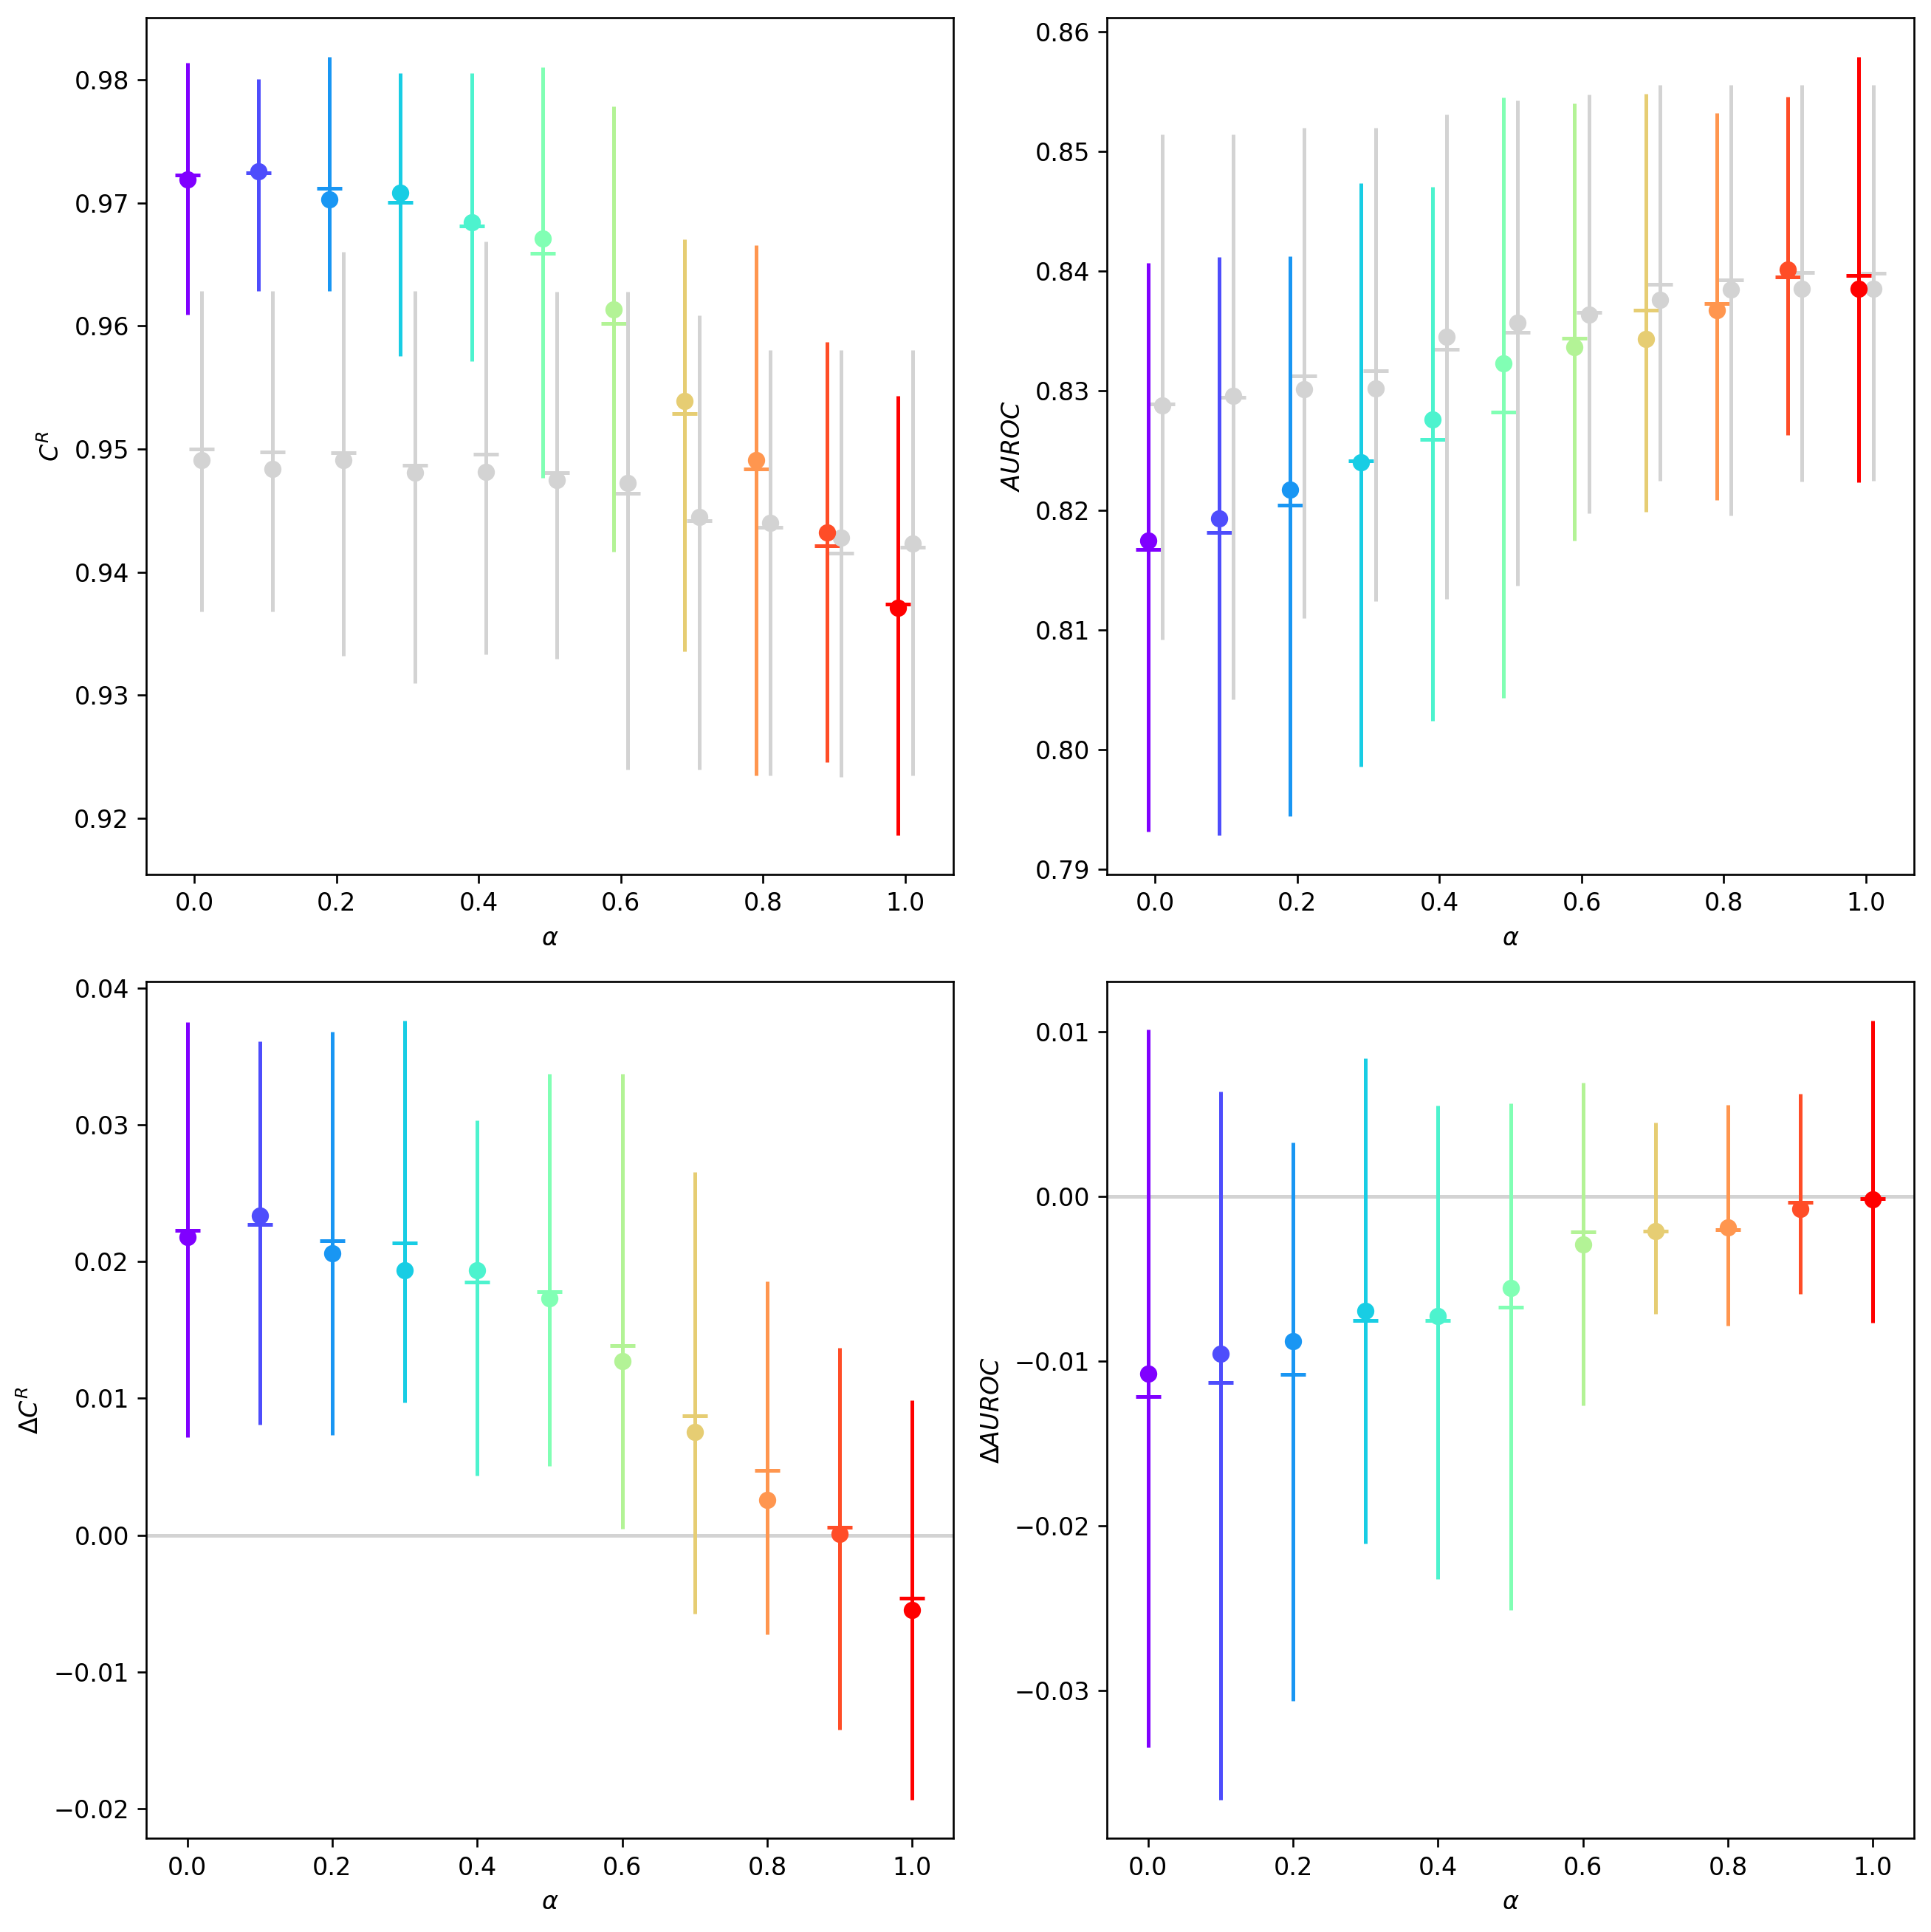

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(5.5*2,5.5*1), dpi=240)
for ax, column, display_name in zip(axs, ['RBC(e)', 'AUROC(f_u,e)'], [r'$C^R$', r'$AUROC$']):
    optimization_column = '{}_optimization'.format(column)
    selection_column = '{}_selection'.format(column)
    ua.get_ci_df(comparison_res_df, column=selection_column, ax=ax, x_eps=0.01, color_value=None, display_df=False)
    ua.get_ci_df(comparison_res_df, column=optimization_column, ax=ax, x_eps=-0.01, display_df=False)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(5.5*2,5.5*1), dpi=240)
for ax, column, display_name in zip(axs, ['ΔRBC(e)', 'ΔAUROC(f_u,e)'], [r'$\Delta C^R$', r'$\Delta AUROC$']):
    ua.get_ci_df(comparison_res_df, column=column, ax=ax)
    ax.set_ylabel(display_name)
    ax.axhline(0, color='lightgray', zorder=-1)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()



fig, axs = plt.subplots(2, 2, figsize=(5.5*2,5.5*2), dpi=240)
for ax, column, display_name in zip(axs[0], 
                                    ['RBC(e)', 'AUROC(f_u,e)'], 
                                    [r'$C^R$', r'$AUROC$']):
    
    optimization_column = '{}_optimization'.format(column)
    selection_column = '{}_selection'.format(column)
    ua.get_ci_df(comparison_res_df, column=selection_column, ax=ax, x_eps=0.01, color_value=None, display_df=False)
    ua.get_ci_df(comparison_res_df, column=optimization_column, ax=ax, x_eps=-0.01, display_df=False)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')


for ax, column, display_name in zip(axs[1], ['ΔRBC(e)', 'ΔAUROC(f_u,e)'], [r'$\Delta C^R$', r'$\Delta AUROC$']):
    ua.get_ci_df(comparison_res_df, column=column, ax=ax, display_df=False)
    ax.axhline(0, color='lightgray', zorder=-1)
    ax.set_ylabel(display_name)
    ax.set_xlabel(r'$\alpha$')
fig.tight_layout()
plt.show()